In [1]:
from rdkit import Chem
import numpy as np
import pandas as pd
from IPython.display import display
import tqdm

# Load simulator data

In [2]:
dataset = pd.read_csv("/home/abhor/Desktop/repos/ReactionRL/datasets/my_uspto/action_dataset.csv", index_col=0)

In [3]:
dataset

reactants  \
0                                  CON(C)C(=O)c1ccc(O)nc1   
8174                      CCc1nc(C(F)(F)F)ccc1C(=O)N(C)OC   
25624                            CON(C)C(=O)c1ccc(Cl)nc1N   
27114                               CON(C)C(=O)c1cccnc1Cl   
68734                             CON(C)C(=O)c1ccc(Cl)nc1   
...                                                   ...   
448267                   O=C1c2ccccc2C(=O)N1CCS(=O)(=O)Cl   
448392                 CCNC(=O)n1nc(N)c2cc(C(F)(F)F)ccc21   
448417  O=P(C(F)(F)C(F)(F)F)(C(F)(F)C(F)(F)F)C(F)(F)C(...   
448458      CCOc1ccc(C(C)(C)COCc2ccc(F)c(Oc3ccccc3)c2)cc1   
448505                                CCCCOS(=O)(=O)OCCCC   

                                         products  \
0                          CC(C)CC(=O)c1ccc(O)nc1   
8174                      CCc1nc(C(F)(F)F)ccc1C=O   
25624          COc1cc(C)c(F)cc1C(=O)c1ccc(Cl)nc1N   
27114                            CC(=O)c1cccnc1Cl   
68734                 COc1ccccc1C(=O)c1ccc(Cl)nc1   
...                                           ...   
448267                      CCN1C(=O)c2ccccc2C1=O   
448392                                    CCN=C=O   
448417  O=P([O-])(C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)F   
448458                     CCOc1ccc(C(C)(C)CO)cc1   
448505                         CCCC[P+](CC)(CC)CC   

                                                     rsig  \
0       [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
8174    [cH:0]1[n:1][cH:2][cH:3][cH:4][c:5]1[C:6](=[O:...   
25624   [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
27114   [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
68734   [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
...                                                   ...   
448267          [CH3:0][CH2:1][S:2](=[O:3])(=[O:4])[Cl:5]   
448392  [CH3:0][NH:1][C:2](=[O:3])[n:4]1[n:5][c:6]([NH...   
448417  [O:0]=[P:1]([CH3:2])([CH3:3])[C:4]([F:5])([F:6...   
448458  [CH3:0][O:1][CH2:2][c:3]1[cH:4][cH:5][c:6]([F:...   
448505  [CH3:0][CH2:1][O:2][S:3](=[O:4])(=[O:5])[O:6][...   

                                                     psig  \
0       [CH3:0][CH:1]([CH3:2])[CH2:3][C:4](=[O:5])[c:6...   
8174                                                [H:0]   
25624   [CH3:0][O:1][c:2]1[cH:3][c:4]([CH3:5])[c:6]([F...   
27114   [CH3:0][C:1](=[O:2])[c:3]1[cH:4][cH:5][cH:6][n...   
68734   [CH3:0][O:1][c:2]1[cH:3][cH:4][cH:5][cH:6][c:7...   
...                                                   ...   
448267                                              [H:0]   
448392                           [CH3:0][N:1]=[C:2]=[O:3]   
448417                [O:0]=[P:1]([O-:2])([CH3:3])[CH3:4]   
448458                                              [H:0]   
448505  [CH3:0][CH2:1][P+:2]([CH2:3][CH3:4])([CH2:5][C...   

                                                     rsub  \
0                               [CH3:0][O:1][NH:2][CH3:3]   
8174                        [NH:8]([CH3:9])[O:10][CH3:11]   
25624                           [CH3:0][O:1][NH:2][CH3:3]   
27114                           [CH3:0][O:1][NH:2][CH3:3]   
68734                           [CH3:0][O:1][NH:2][CH3:3]   
...                                                   ...   
448267                       [SH:2](=[O:3])(=[O:4])[Cl:5]   
448392  [CH:2](=[O:3])[n:4]1[n:5][c:6]([NH2:7])[c:8]2[...   
448417      [CH:4]([F:5])([F:6])[C:7]([F:8])([F:9])[F:10]   
448458  [CH3:2][c:3]1[cH:4][cH:5][c:6]([F:7])[c:8]([O:...   
448505  [OH:2][S:3](=[O:4])(=[O:5])[O:6][CH2:7][CH2:8]...   

                                                     psub  rcen  pcen  \
0                           [CH3:0][CH:1]([CH3:2])[CH3:3]     2     3   
8174                                                [H:0]     8     0   
25624   [CH3:0][O:1][c:2]1[cH:3][c:4]([CH3:5])[c:6]([F...     2     9   
27114                                             [CH4:0]     2     0   
68734   [CH3:0][O:1][c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1     2     7   
...                                      

In [4]:
# I had done this before but some are still there somehow
dataset = dataset[dataset["rbond"]!="[[]]"]
dataset = dataset[dataset["pbond"]!="[[]]"]

In [5]:
dataset

reactants  \
0                                  CON(C)C(=O)c1ccc(O)nc1   
8174                      CCc1nc(C(F)(F)F)ccc1C(=O)N(C)OC   
25624                            CON(C)C(=O)c1ccc(Cl)nc1N   
27114                               CON(C)C(=O)c1cccnc1Cl   
68734                             CON(C)C(=O)c1ccc(Cl)nc1   
...                                                   ...   
448267                   O=C1c2ccccc2C(=O)N1CCS(=O)(=O)Cl   
448392                 CCNC(=O)n1nc(N)c2cc(C(F)(F)F)ccc21   
448417  O=P(C(F)(F)C(F)(F)F)(C(F)(F)C(F)(F)F)C(F)(F)C(...   
448458      CCOc1ccc(C(C)(C)COCc2ccc(F)c(Oc3ccccc3)c2)cc1   
448505                                CCCCOS(=O)(=O)OCCCC   

                                         products  \
0                          CC(C)CC(=O)c1ccc(O)nc1   
8174                      CCc1nc(C(F)(F)F)ccc1C=O   
25624          COc1cc(C)c(F)cc1C(=O)c1ccc(Cl)nc1N   
27114                            CC(=O)c1cccnc1Cl   
68734                 COc1ccccc1C(=O)c1ccc(Cl)nc1   
...                                           ...   
448267                      CCN1C(=O)c2ccccc2C1=O   
448392                                    CCN=C=O   
448417  O=P([O-])(C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)F   
448458                     CCOc1ccc(C(C)(C)CO)cc1   
448505                         CCCC[P+](CC)(CC)CC   

                                                     rsig  \
0       [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
8174    [cH:0]1[n:1][cH:2][cH:3][cH:4][c:5]1[C:6](=[O:...   
25624   [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
27114   [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
68734   [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
...                                                   ...   
448267          [CH3:0][CH2:1][S:2](=[O:3])(=[O:4])[Cl:5]   
448392  [CH3:0][NH:1][C:2](=[O:3])[n:4]1[n:5][c:6]([NH...   
448417  [O:0]=[P:1]([CH3:2])([CH3:3])[C:4]([F:5])([F:6...   
448458  [CH3:0][O:1][CH2:2][c:3]1[cH:4][cH:5][c:6]([F:...   
448505  [CH3:0][CH2:1][O:2][S:3](=[O:4])(=[O:5])[O:6][...   

                                                     psig  \
0       [CH3:0][CH:1]([CH3:2])[CH2:3][C:4](=[O:5])[c:6...   
8174                                                [H:0]   
25624   [CH3:0][O:1][c:2]1[cH:3][c:4]([CH3:5])[c:6]([F...   
27114   [CH3:0][C:1](=[O:2])[c:3]1[cH:4][cH:5][cH:6][n...   
68734   [CH3:0][O:1][c:2]1[cH:3][cH:4][cH:5][cH:6][c:7...   
...                                                   ...   
448267                                              [H:0]   
448392                           [CH3:0][N:1]=[C:2]=[O:3]   
448417                [O:0]=[P:1]([O-:2])([CH3:3])[CH3:4]   
448458                                              [H:0]   
448505  [CH3:0][CH2:1][P+:2]([CH2:3][CH3:4])([CH2:5][C...   

                                                     rsub  \
0                               [CH3:0][O:1][NH:2][CH3:3]   
8174                        [NH:8]([CH3:9])[O:10][CH3:11]   
25624                           [CH3:0][O:1][NH:2][CH3:3]   
27114                           [CH3:0][O:1][NH:2][CH3:3]   
68734                           [CH3:0][O:1][NH:2][CH3:3]   
...                                                   ...   
448267                       [SH:2](=[O:3])(=[O:4])[Cl:5]   
448392  [CH:2](=[O:3])[n:4]1[n:5][c:6]([NH2:7])[c:8]2[...   
448417      [CH:4]([F:5])([F:6])[C:7]([F:8])([F:9])[F:10]   
448458  [CH3:2][c:3]1[cH:4][cH:5][c:6]([F:7])[c:8]([O:...   
448505  [OH:2][S:3](=[O:4])(=[O:5])[O:6][CH2:7][CH2:8]...   

                                                     psub  rcen  pcen  \
0                           [CH3:0][CH:1]([CH3:2])[CH3:3]     2     3   
8174                                                [H:0]     8     0   
25624   [CH3:0][O:1][c:2]1[cH:3][c:4]([CH3:5])[c:6]([F...     2     9   
27114                                             [CH4:0]     2     0   
68734   [CH3:0][O:1][c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1     2     7   
...                                      

In [6]:
from rdkit.Chem import rdFMCS

def mol_with_atom_index( mol ):
    '''
    draw molecule with index
    '''
    colored = False
    if hasattr(mol, "__sssAtoms"):
        sss = mol.__sssAtoms
        colored = True
    mol = Chem.Mol(mol)
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    if colored:
        mol.__sssAtoms = sss
    return mol

def smiles_without_atom_index( smiles ):
    '''
    Convert smiles with numbers to smiles without numbers
    '''
    mol = Chem.MolFromSmiles(smiles)
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).ClearProp( 'molAtomMapNumber' )
    return Chem.MolToSmiles(mol)

def mol_without_atom_index(mol):
    '''
    Convert smiles with numbers to smiles without numbers
    '''
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).ClearProp( 'molAtomMapNumber' )
    return mol


def find_connecting_atoms_not_in_sig(mol, sig_indices, centre):
    cen_atom = mol.GetAtomWithIdx(centre)
    neighbors_indices = list(map(lambda x: x.GetIdx(), cen_atom.GetNeighbors()))
    return set(neighbors_indices) - set(sig_indices)

def GetAtomWithAtomMapNum(mol, num):
    for atom in mol.GetAtoms():
        if atom.GetAtomMapNum() == num:
            return atom
    return None

def get_cs_indices(input_mol, psig, rsig_match, rcen, pcen, debug=False):
    '''
    Find mcs between mol1 and mol2 and get indices in mol1 and mol2 corresponding to the cs 
    Returns (mol1 indices), (mol2 indices)
    '''
    # find mcs
    mcs = rdFMCS.FindMCS([input_mol, psig])
    cs = Chem.MolFromSmarts(mcs.smartsString)
    
    if debug:
        print("cs")
        display(cs)
        
    # Get initial cs indices
    input_mol_cs_indices = np.array(rsig_match)[list(Chem.Mol(rsig).GetSubstructMatch(cs))].tolist()
    if not input_mol_cs_indices:
        input_mol_cs_indices = np.array(rsig_match)[list(Chem.Mol(rsig).GetSubstructMatch(cs))].tolist()
    psig_cs_indices = Chem.Mol(psig).GetSubstructMatches(cs)
    
    if debug:
        print("psig_cs_indices(before)", psig_cs_indices)
    
    # if there's more than 1 match, choose the one which has one 1 neighbor
    if len(psig_cs_indices) == 1:
        psig_cs_indices = psig_cs_indices[0]
    else:
        if debug:
            print(list(map(lambda x: (set(add_immediate_neighbors(psig, x, add_aromatic_cycles=False)), set(x)), psig_cs_indices)))
        psig_cs_indices = list(filter(lambda x: len(set(add_immediate_neighbors(psig, x, add_aromatic_cycles=False)) - set(x))==1, psig_cs_indices))[0]
    
    if debug:
        print("psig_cs_indices(after)", psig_cs_indices)
    
    if debug:
        display(mol_with_atom_index(input_mol))
    
    # If CS is only a benzene ring, the substructure matching can give a wrong ordering due to the symmetric nature of benzene. 
    # So I find the atom connecting to the centre and rotate one of the indices to match the other
    if Chem.MolToSmarts(cs) == '[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1':
        if debug:
            print("CS is benzene. Doing extra calculations for index matching...")
        def connecting_atom_idx_in_indices(mol, cen, indices):
            cen_atom = mol.GetAtomWithIdx(int(cen))
            cen_neighbors = list(map(lambda x: x.GetIdx(), cen_atom.GetNeighbors()))
            connecting_atoms = set(cen_neighbors).intersection(set(indices))
            assert len(connecting_atoms) == 1, f"Expecting 1 connecting atom. Found {len(connecting_atoms)}"
            return list(connecting_atoms)[0]
        
        in_mol_connecting_idx = connecting_atom_idx_in_indices(input_mol, rsig_match[rcen], input_mol_cs_indices)
        psig_connecting_idx = connecting_atom_idx_in_indices(psig, pcen, psig_cs_indices)
        
        a = np.argmin(np.abs(np.array(input_mol_cs_indices) - in_mol_connecting_idx))
        b = np.argmin(np.abs(np.array(psig_cs_indices) - psig_connecting_idx))
        
        if debug:
            print(in_mol_connecting_idx, "<--->", psig_connecting_idx)
            print("Rotating....")
            print(f"a={a}, b={b}")
            print("Before")
            print(input_mol_cs_indices)
            print(psig_cs_indices)

        if a < b:
            # left rotate psig idx
            psig_cs_indices = psig_cs_indices[b-a:] + psig_cs_indices[:b-a]
        elif b < a:
            # left rotate in_mol idx
            input_mol_cs_indices = input_mol_cs_indices[a-b:] + input_mol_cs_indices[:a-b]
        
        if debug:
            print("After")
            print(input_mol_cs_indices)
            print(psig_cs_indices)
    
    return input_mol_cs_indices, psig_cs_indices
    

# Dump the cs indices for rsig and psig in database so that we don't have to compute again for each state

# For psig="[H:0]", MCS doesn't work. So for now, I'm removing all such actions
# The easiest way to deal with these actions is to have another routine for "apply_action" which removes rsub (there's nothing to add since psub is Hydrogen)
dataset = dataset[dataset["psig"]!="[H:0]"]

dataset.loc[:, "rsig_cs_indices"] = [-1] * dataset.shape[0]
dataset.loc[:, "psig_cs_indices"] = [-1] * dataset.shape[0]

# Store cs indices in dataset so that we don't have to compute every time
for i in tqdm.tqdm(range(0, dataset.shape[0])):
    rsig = Chem.MolFromSmiles(dataset.iloc[i]["rsig"])
    psig = Chem.MolFromSmiles(dataset.iloc[i]["psig"])
    rsig_match = list(range(rsig.GetNumAtoms()))
    rcen = dataset.iloc[i]["rcen"]
    pcen = dataset.iloc[i]["pcen"]
    
    try:
        r_cs, p_cs = get_cs_indices(rsig, psig, rsig_match, rcen, pcen)
        dataset["rsig_cs_indices"].iloc[i] = ".".join(list(map(str, r_cs)))
        dataset["psig_cs_indices"].iloc[i] = ".".join(list(map(str, p_cs)))
    except Exception as e:
        pass

dataset = dataset[dataset["rsig_cs_indices"] != -1]
print("New shape for dataset:", dataset.shape)
print("Dumping...")
dataset.to_csv("/home/abhor/Desktop/repos/ReactionRL/datasets/my_uspto/action_dataset-updated.csv")

In [11]:
dataset = pd.read_csv("/home/abhor/Desktop/repos/ReactionRL/datasets/my_uspto/action_dataset-updated.csv", index_col=0)

In [12]:
dataset

reactants  \
0                                  CON(C)C(=O)c1ccc(O)nc1   
25624                            CON(C)C(=O)c1ccc(Cl)nc1N   
27114                               CON(C)C(=O)c1cccnc1Cl   
68734                             CON(C)C(=O)c1ccc(Cl)nc1   
103109                           CON(C)C(=O)c1cc(Br)cnc1N   
...                                                   ...   
447992  CCN(CC)C(=O)c1ccc2c(c1)Oc1ccc(F)cc1C2=C1CC2CCC...   
448064  CNC(=O)c1cc2c(Oc3ccc(NC(=S)NC(=O)Cc4cccc(OC)c4...   
448104  CC(O)(CC(=O)O)CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(...   
448392                 CCNC(=O)n1nc(N)c2cc(C(F)(F)F)ccc21   
448417  O=P(C(F)(F)C(F)(F)F)(C(F)(F)C(F)(F)F)C(F)(F)C(...   

                                         products  \
0                          CC(C)CC(=O)c1ccc(O)nc1   
25624          COc1cc(C)c(F)cc1C(=O)c1ccc(Cl)nc1N   
27114                            CC(=O)c1cccnc1Cl   
68734                 COc1ccccc1C(=O)c1ccc(Cl)nc1   
103109        Nc1ncc(Br)cc1C(=O)c1ccccc1OC(F)(F)F   
...                                           ...   
447992                             O=C(O)C(F)(F)F   
448064                    COc1cccc(CC(=O)N=C=S)c1   
448104                       CC(O)(CCO)CC(=O)[O-]   
448392                                    CCN=C=O   
448417  O=P([O-])(C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)F   

                                                     rsig  \
0       [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
25624   [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
27114   [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
68734   [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
103109  [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
...                                                   ...   
447992  [CH3:0][CH2:1][N:2]([CH2:3][CH3:4])[C:5](=[O:6...   
448064  [CH3:0][NH:1][C:2](=[O:3])[c:4]1[cH:5][c:6]2[c...   
448104  [CH3:0][CH2:1][C:2](=[O:3])[S:4][CH2:5][CH2:6]...   
448392  [CH3:0][NH:1][C:2](=[O:3])[n:4]1[n:5][c:6]([NH...   
448417  [O:0]=[P:1]([CH3:2])([CH3:3])[C:4]([F:5])([F:6...   

                                                     psig  \
0       [CH3:0][CH:1]([CH3:2])[CH2:3][C:4](=[O:5])[c:6...   
25624   [CH3:0][O:1][c:2]1[cH:3][c:4]([CH3:5])[c:6]([F...   
27114   [CH3:0][C:1](=[O:2])[c:3]1[cH:4][cH:5][cH:6][n...   
68734   [CH3:0][O:1][c:2]1[cH:3][cH:4][cH:5][cH:6][c:7...   
103109  [cH:0]1[n:1][cH:2][cH:3][cH:4][c:5]1[C:6](=[O:...   
...                                                   ...   
447992                         [O:0]=[C:1]([OH:2])[CH3:3]   
448064                           [CH3:0][N:1]=[C:2]=[S:3]   
448104                        [CH3:0][CH2:1][CH2:2][OH:3]   
448392                           [CH3:0][N:1]=[C:2]=[O:3]   
448417                [O:0]=[P:1]([O-:2])([CH3:3])[CH3:4]   

                                                     rsub  \
0                               [CH3:0][O:1][NH:2][CH3:3]   
25624                           [CH3:0][O:1][NH:2][CH3:3]   
27114                           [CH3:0][O:1][NH:2][CH3:3]   
68734                           [CH3:0][O:1][NH:2][CH3:3]   
103109                          [CH3:0][O:1][NH:2][CH3:3]   
...                                                   ...   
447992  [CH3:0][CH2:1][N:2]([CH2:3][CH3:4])[C:5](=[O:6...   
448064  [CH3:0][NH:1][C:2](=[O:3])[c:4]1[cH:5][c:6]2[c...   
448104  [CH:2](=[O:3])[S:4][CH2:5][CH2:6][NH:7][C:8](=...   
448392  [CH:2](=[O:3])[n:4]1[n:5][c:6]([NH2:7])[c:8]2[...   
448417      [CH:4]([F:5])([F:6])[C:7]([F:8])([F:9])[F:10]   

                                                     psub  rcen  pcen  \
0                           [CH3:0][CH:1]([CH3:2])[CH3:3]     2     3   
25624   [CH3:0][O:1][c:2]1[cH:3][c:4]([CH3:5])[c:6]([F...     2     9   
27114                                             [CH4:0]     2     0   
68734   [CH3:0][O:1][c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1     2     7   
103109  [cH:8]1[cH:9][cH:10][cH:11][cH:12][c:13]1[O:14...     2     8   
...                                      

# Indexing 

First, we create index for rsub to make for faster searching.

Searching will be based on rsub because the action searching algorithm cannot create rsigs. rsigs will be used for substructure matching.

In [13]:
import networkx as nx

In [14]:
# Fetch the rsigs using the clusters
rsig_cluster_to_rsig_d = {}
for cluster_id in dataset["rsig_clusters"].unique():
    cluster_df = dataset[dataset["rsig_clusters"] == cluster_id]
    rsig  = Chem.MolFromSmiles(cluster_df.iloc[0]["rsig"])
    rsig_cluster_to_rsig_d[cluster_id] = rsig
    
print(f"There are {len(rsig_cluster_to_rsig_d)} unique (rsigs)rsigs.")

There are 27829 unique (rsigs)rsigs.


In [15]:
from rdkit.Chem import AllChem

def get_mol_certificate(mol):
    return AllChem.GetMorganFingerprintAsBitVect(mol, 2).ToBase64()

In [16]:
certificate_to_cluster_id_dict = {}
for _id in tqdm.tqdm(rsig_cluster_to_rsig_d):
    C = get_mol_certificate(rsig_cluster_to_rsig_d[_id])
    if C in certificate_to_cluster_id_dict:
        certificate_to_cluster_id_dict[C].append(_id)
    else:
        certificate_to_cluster_id_dict[C] = [_id]

print("Len of dict =", len(certificate_to_cluster_id_dict))

100%|███████████████████████████████████████████████████████| 27829/27829 [00:00<00:00, 33931.05it/s]

Len of dict = 25719


# Action searching

The action searching algorithm has following steps:  
1. Find cut vertices
2. For each connected component + cut vertex, do index search on rsub
3. If MatchFound(), do substructure match on rsig

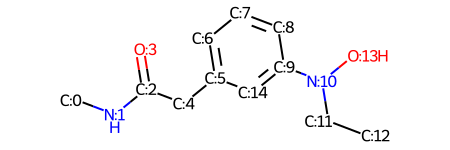

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 14])

In [17]:
def add_immediate_neighbors(mol, indices, add_aromatic_cycles=True):
    def _add_neighbors(idx_list):
        atoms = list(map(lambda x: mol.GetAtomWithIdx(int(x)), idx_list))
        neighbors = []
        for atom in atoms:
            neighbors.extend(list(map(lambda x: x.GetIdx(), atom.GetNeighbors())))
        return np.unique(neighbors).tolist()
    
    # first add immediate neighbors
    new_indices = _add_neighbors(indices)
    
    if set(new_indices) == set(indices): # indices = whole molecule
        return indices
    
    # if added neighbor is aromatic, we have to check for more neighbors (if I do not add this condition, it does neighbor+1)
    if add_aromatic_cycles and mol.GetAtomWithIdx(int(list(set(new_indices) - set(indices))[0])).GetIsAromatic():
        indices = list(new_indices)
        # if any aromtic atoms in neighbors, add them as well
        repeat = True
        while repeat:
            repeat = False
            for n in set(_add_neighbors(indices)) - set(indices):
                if mol.GetAtomWithIdx(int(n)).GetIsAromatic():
                    indices.append(n)
                    repeat = True
    else:
        indices = new_indices
    
    return np.unique(indices)
    
mol = Chem.MolFromSmiles("CNC(=O)Cc1cccc(N(CC)O)c1")
display(mol_with_atom_index(mol))
add_immediate_neighbors(mol, [0, 1, 2, 3, 4])

In [18]:
def verify_action_applicability(mol, r_indices, cluster_id, debug=False):
    mol = Chem.Mol(mol)
    rsig = Chem.MolFromSmiles(dataset[dataset["rsig_clusters"]==cluster_id].iloc[0]["rsig"])
    rsub = Chem.MolFromSmiles(dataset[dataset["rsig_clusters"]==cluster_id].iloc[0]["rsub"])
    rcen = dataset[dataset["rsig_clusters"]==cluster_id].iloc[0]["rcen"]
    rbond = dataset[dataset["rsig_clusters"]==cluster_id].iloc[0]["rbond"]
    rbond = list(map(float, rbond.replace("[", "").replace("]", "").replace(" ", "").split(",")))
            
    if debug:
        print("#"*100)
        print(cluster_id, rbond)
        print("\n\n\n")
        display(mol_with_atom_index(mol))
        display(rsig)
        display(rsub)
        print("r_idx, rcen", r_indices, rcen)
    # Get the correct rsig_match
    rsig_matches = mol.GetSubstructMatches(rsig)
    if not rsig_matches:
        rsig_match = ()
    else:
        for rsig_match in rsig_matches:
            if not (set(rsig_match) - set(r_indices)):
                break
    
    if debug:
        print("rsig_match", rsig_match)
    
    # Get the correct rsub_match(s)
#     temp_rsub_matches = mol.GetSubstructMatches(rsub)
    
    atm_map_nums = []
    for i in range(rsub.GetNumAtoms()):
        atm_map_nums.append(rsub.GetAtomWithIdx(i).GetAtomMapNum())
    if debug:
        print("atm_map_nums", atm_map_nums)
        
    rsub_match = np.array(rsig_match)[atm_map_nums].tolist()
    if debug:
        print("rsub_match", rsub_match)
    
#     print("temp_rsub_matches", temp_rsub_matches)
#     rsub_matches = []    
#     for rsub_match in temp_rsub_matches:
#         if not (set(rsub_match) - set(r_indices)):
#             print("inside")
#             atoms = list(map(lambda x: mol.GetAtomWithIdx(int(x)), rsub_match))
#             neighbors = []
#             bonds = []
#             for atom in atoms:
#                 _n = list(map(lambda x: x.GetIdx(), atom.GetNeighbors()))
#                 neighbors.extend(_n)
#                 bonds.extend(list(map(lambda x: mol.GetBondBetweenAtoms(atom.GetIdx(), int(x)).GetBondTypeAsDouble(), list(set(_n).intersection(set(r_indices))-set(rsub_match)))))
#             # neighbors should be in r_indices
#             if set(neighbors) - set(r_indices):
#                 print("neighbors, r_indices", neighbors, r_indices)
#                 continue
            
#             # Connecting bond(s) should be correct
#             if not set(rbond) == set(bonds):
#                 print("rbond, bonds", rbond, bonds)
#                 continue
            
#             rsub_matches.append(rsub_match)
    
    # is there is a rsub whose neighbors are in rsig_match, we're good
#     result = False
#     for rsub_match in rsub_matches:
    # get neighbors
    atoms = list(map(lambda x: mol.GetAtomWithIdx(x), rsub_match))
    neighbors = []
    for atom in atoms:
        neighbors.extend(list(map(lambda x: x.GetIdx(), atom.GetNeighbors())))
    neighbors = np.unique(neighbors)
    if debug:
        print("neighbors", neighbors)
    if not set(neighbors) - set(rsig_match):
        if debug:
            print(True)
        return True
    if debug:
        print(False)
    return False
    if debug:
        print("#"*100)
    return result
    
def get_mol_from_index_list(mol, indices):
    rw = Chem.RWMol(mol)
    rw.BeginBatchEdit()
    for idx in set(list(range(mol.GetNumAtoms()))) - set(indices):
        rw.RemoveAtom(idx)
    rw.CommitBatchEdit()
    return Chem.Mol(rw)

### For a new molecule, let's find all possible actions applicable

In [64]:
%%time
def get_applicable_rsig_clusters(in_mol):
    # For each cut vertex, we find two disconnected components and search the smaller one in our index
    G = nx.from_numpy_matrix(Chem.GetAdjacencyMatrix(in_mol))
    applicable_actions = []

    for x in nx.articulation_points(G):
        # Remove atom (not directly, otherwise the index resets)
        # First remove bonds to x
        mw = Chem.RWMol(in_mol)
        Chem.Kekulize(mw, clearAromaticFlags=True)
        for n in mw.GetAtomWithIdx(x).GetNeighbors():
            mw.RemoveBond(x, n.GetIdx())

        # Find fragments
        mol_frags = list(Chem.rdmolops.GetMolFrags(mw))

        # Remove x from fragments
        mol_frags.remove((x,))

        # For each fragment except the biggest, add x and extract sub-molecule and search
        for frag in sorted(mol_frags, key=lambda x: len(x))[:-1]:
            indices = [x] + list(frag)

            for _ in range(2):
                # we add neighbors twice to rsub and then search for rsig
                indices = add_immediate_neighbors(in_mol, indices)
                candidate = get_mol_from_index_list(in_mol, indices)
#                 Chem.Kekulize(candidate)
                try:
                    Chem.SanitizeMol(candidate)
                except Exception as e:
                    pass
                if _debug:
                    print(Chem.MolToSmiles(candidate))
                    display(mol_with_atom_index(candidate))

                # get certificate and search in rsig
                cand_certi = get_mol_certificate(candidate)
                if _debug:
                    print(cand_certi)

                if cand_certi in certificate_to_cluster_id_dict:
                    # Verify rsig
                    for cluster_id in certificate_to_cluster_id_dict[cand_certi]:
                        if _debug:
                            print(cluster_id)
                        if cluster_id != my_ultimate_cluster:
                            continue
                        if _debug:
                            print("Verification...", cluster_id)
                        if verify_action_applicability(in_mol, indices, cluster_id, _debug):
                            if cluster_id not in applicable_actions:
#                                 row = dataset[dataset["rsig_clusters"]==cluster_id].iloc[0]
#                                 print(row)
#                                 print(indices, x)
#                                 display(mol_with_atom_index(Chem.MolFromSmiles(row["reactants"])))
#                                 display(mol_with_atom_index(Chem.MolFromSmiles(row["products"])))
#                                 display(mol_with_atom_index(Chem.MolFromSmiles((row["rsig"]))))
#                                 display(mol_with_atom_index(candidate))
                                applicable_actions.append(cluster_id)
    return applicable_actions
                
    
not_working = []
error_cases = []
x = 0
_debug = False
for i in tqdm.tqdm(range(x, dataset.shape[0])):
    row = dataset.iloc[i]
    in_mol = Chem.MolFromSmiles(row["reactants"])
    my_ultimate_cluster = row["rsig_clusters"]
    
    try:
        rsig_clusters = get_applicable_rsig_clusters(in_mol)

        if my_ultimate_cluster not in rsig_clusters:  
        #         _debug = True
        #         print(i)
        #         print(row)
        #         print("in mol")
        #         display(in_mol)
        #         print("rsig")
        #         display(Chem.MolFromSmiles(row["rsig"]))
        #         print("original certi")
        #         print(get_mol_certificate(Chem.MolFromSmiles(row["rsig"])))
        #         print(row["rsig"])
        #         get_applicable_rsig_clusters(in_mol)
        #         break
            not_working.append(i)
#             print(i, my_ultimate_cluster, rsig_clusters)
#             print(i, len(not_working), len(error_cases))
            
    except Exception as e:
        error_cases.append(i)


100%|███████████████████████████████████████████████████████| 122448/122448 [17:37<00:00, 115.78it/s]

CPU times: user 17min 41s, sys: 2.9 s, total: 17min 44s
Wall time: 17min 37s


16063
in mol


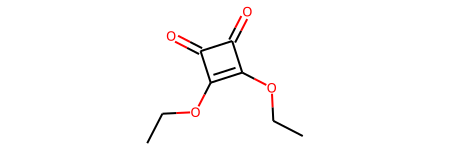

product mol


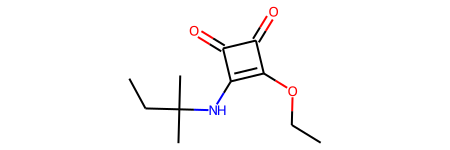

rsig


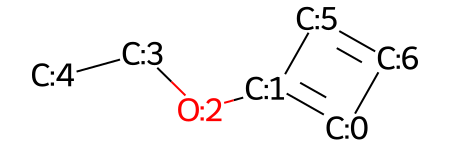

4P///wAIAAARAAAAhhhxAHBkJQFyMn6ZAIUAQNEAFAkAjpEEuQA=
rcen
2
rsub


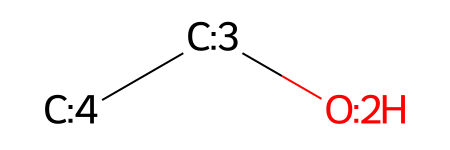


$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
CCO


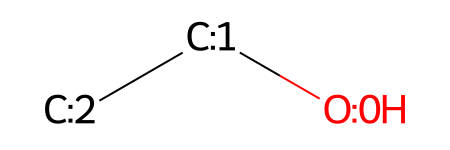

4P///wAIAAAGAAAAoDUAjgEG5QGBA/UH
52
2281
396812
CCOC1=CC=C1


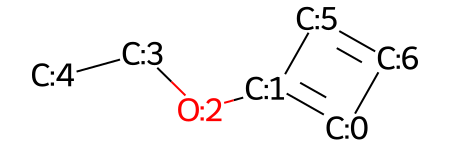

4P///wAIAAARAAAAhhhxAHBkJQFyMn6ZAIUAQNEAFAkAjpEEuQA=
230
Verification... 230
####################################################################################################
230 [1.0]






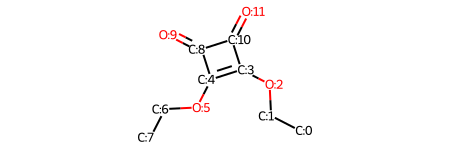

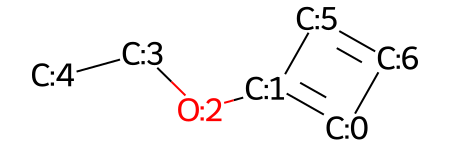

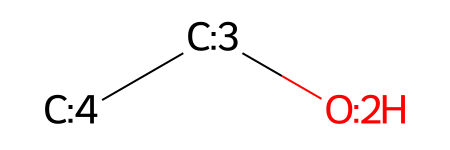

r_idx, rcen [ 3  4  5  6  7  8 10] 2
rsig_match ()
atm_map_nums [2, 3, 4]


IndexError: index 2 is out of bounds for axis 0 with size 0

In [69]:
i = error_cases[10]
_debug = True

row = dataset.iloc[i]
in_mol = Chem.MolFromSmiles(row["reactants"])
my_ultimate_cluster = row["rsig_clusters"]

print(i)
print("in mol")
display(in_mol)
print("product mol")
display(Chem.MolFromSmiles(row["products"]))
rsig = Chem.MolFromSmiles(row["rsig"])
print("rsig")
display(rsig)
print(get_mol_certificate(rsig))
print("rcen")
print(row["rcen"])
print("rsub")
display(Chem.MolFromSmiles(row["rsub"]))
print()


print("$"*150)
print(my_ultimate_cluster, get_applicable_rsig_clusters(in_mol))

In [65]:
len(not_working), len(error_cases)

(17605, 708)

# Some stats for the action searching
count = 0
cluster_count = 0
action_count = 0
time_taken = 0

import time
for i in tqdm.tqdm(range(50000)):
    t = time.time()
    clusters = get_applicable_rsig_clusters(Chem.MolFromSmiles(dataset.iloc[i]["reactants"]))
    cluster_count += len(clusters)
    action_count += len(dataset[dataset["rsig_clusters"].isin(clusters)])
    time_taken += (time.time() - t)
    count += 1
#     break
    
print(f"Avg cluster count = {cluster_count/count}")
print(f"Avg action count = {action_count/count}")
print(f"Avg time taken = {time_taken/count}")

# Applying actions

In [15]:
import re
def clean_smiles(smiles):
    '''
    Some clean-ups Idk how to do in molecule. So I do it in smiles after conversion.
    1. Remove extra hydrogens for even sized rings
    '''
    return re.sub("\[([a-zA-Z])H[0-9]\]", r"\1", smiles)
    
clean_smiles("O=C(NN1CCCN(c2ccc(Cl)cc2)C1=O)[cH3]1c(F)ccc(NS(=O)(=O)CCCF)c1F")

'O=C(NN1CCCN(c2ccc(Cl)cc2)C1=O)c1c(F)ccc(NS(=O)(=O)CCCF)c1F'

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Input molecule (i = 562), (j = 361)


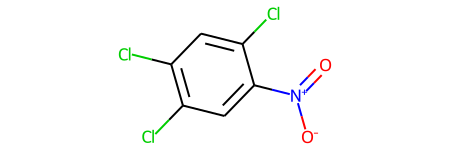

Random rsig chosen (rcen = 2)


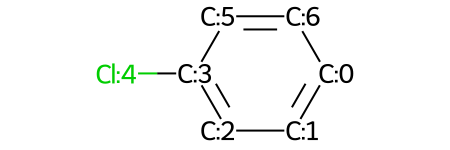

Random psig chosen (pcen = 2)


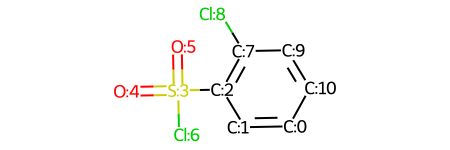

----------------------------------------------------------------------------------------------------
Original reactant


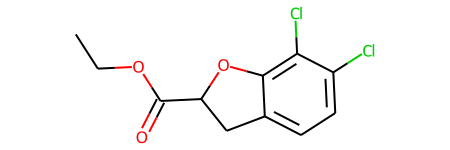

Original product


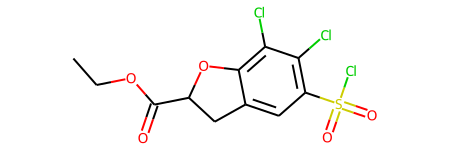

----------------------------------------------------------------------------------------------------
rcen= 2
rsub


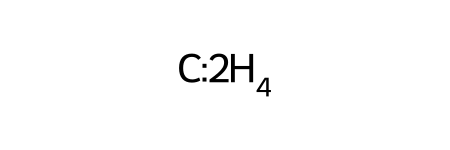

rsig


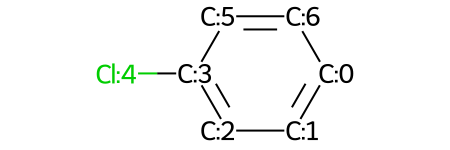

pcen= 2
psub


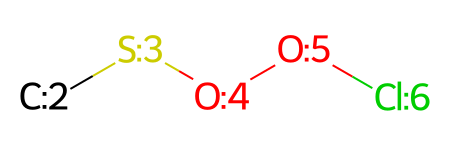

psig


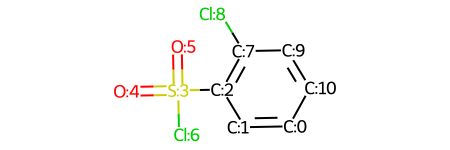

((3, 4, 5, 7, 8, 9, 10), (5, 4, 3, 10, 11, 9, 7), (10, 9, 7, 5, 6, 4, 3))
Input mol


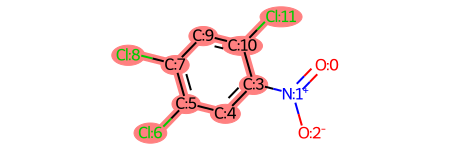

IndexError: list index out of range

In [16]:
def filter_sensible_rsig_matches(mol, rsig_matches, rsig, rsub, rcen):
    '''
    Checks if the rsub in given rsig only has neighbors within rsig (if there are neighbors outside rsig, then this is not a valid rsub by definition of its creation (rsig = rsub + 2 neighbors))
    '''
    # Get the atoms in rsig corresponding to rsub
    rsub_atom_indices = []
    for atom in rsub.GetAtoms():
        rsub_atom_indices.append(atom.GetAtomMapNum())#GetAtomWithIdx( idx ).GetProp( 'molAtomMapNumber'))
    rsig_atom_indices_in_rsub = list(map(lambda x: GetAtomWithAtomMapNum(rsig, x).GetIdx(), rsub_atom_indices))
    
    # Corresponding atoms in mol should have neighbors inside rsig_matches
    def verify(match):
        neighbors = []
        for idx in rsig_atom_indices_in_rsub:
            corr_idx = match[idx]
            atom = mol.GetAtomWithIdx(corr_idx)
            neighbors.extend(list(map(lambda x: x.GetIdx(), atom.GetNeighbors())))
        if not set(neighbors) - set(match):
            return True
        return False
        
    rsig_matches = list(filter(verify, rsig_matches))
    return rsig_matches

def apply_action(input_mol, rsub, rcen, rsig, rsig_cs_indices, psub, pcen, psig, psig_cs_indices, debug=False):
    # Some basic conversions acc. to dataset format
    input_mol = Chem.Mol(input_mol)
    rsig = Chem.MolFromSmiles(rsig)
    psig = Chem.MolFromSmiles(psig)
    rsig_cs_indices = list(map(int, rsig_cs_indices.split(".")))
    psig_cs_indices = list(map(int, psig_cs_indices.split(".")))
    
    if debug:
        print("rcen=",rcen)
        print("rsub")
        display(Chem.MolFromSmiles(rsub))
        print("rsig")
        display(rsig)
        print("pcen=", pcen)
        print("psub")
        display(Chem.MolFromSmiles(psub))
        print("psig")
        display(psig)
    
    
    # Find rsig in input_mol
    rsig_matches = input_mol.GetSubstructMatches(rsig)
    if debug:
        print(rsig_matches)
    # If multiple matches, choose one where rsub/rcen makes sense
    if len(rsig_matches) > 1:
        rsig_matches = filter_sensible_rsig_matches(input_mol, rsig_matches, rsig, Chem.MolFromSmiles(rsub), rcen)
    
    if debug:
        print("Input mol")
        display(mol_with_atom_index(input_mol))
    # FIXME: Provide option to use more than just the first match
    rsig_match = rsig_matches[0]
    if debug:
        print("rsig_match", rsig_match)

    
    
    # Find indices to be exchanged
    if debug:
        print("rsig_cs_indices", rsig_cs_indices)
    input_mol_cs_indices = np.array(rsig_match)[rsig_cs_indices].tolist()
#     input_mol_cs_indices, psig_cs_indices = get_cs_indices(input_mol, psig, rsig_match, rcen, pcen, debug=True)
    if debug:
        print("input_mol_cs_indices", input_mol_cs_indices)
        print("psig_cs_indices", psig_cs_indices)
    
    # Exchange indices (replace bonds for atoms at given indices)
    rwmol = Chem.RWMol(mol_with_atom_index(input_mol))
    num_atoms = input_mol.GetNumAtoms()
    new_psig = Chem.Mol(psig)
    for atom in new_psig.GetAtoms():
        atom.SetAtomMapNum(atom.GetAtomMapNum() + num_atoms)
    rwmol.InsertMol(Chem.Mol(new_psig))
    if debug:
        print("rwmol with atom map nums")
        display(rwmol)
        print("rwmol with indices")
        display(rwmol)
    
        print("cs indices:", input_mol_cs_indices, psig_cs_indices)
    
    # TODO: FIND A BETTER WAY TO FIND THE INDICES OF THE TWO CONNECTED COMPONENTS
    rsig_cs_atom_map_num = list(input_mol_cs_indices)
    psig_cs_atom_map_num = (np.array(psig_cs_indices)+num_atoms).tolist()
    
    if debug:
        print("atom map nums:", rsig_cs_atom_map_num, psig_cs_atom_map_num)
    for r_an, p_an in zip(rsig_cs_atom_map_num, psig_cs_atom_map_num):
        r_idx = GetAtomWithAtomMapNum(rwmol, r_an).GetIdx()
        p_idx = GetAtomWithAtomMapNum(rwmol, p_an).GetIdx()
        if debug:
            print(r_an, p_an, r_idx, p_idx)
            print(find_connecting_atoms_not_in_sig(in_mol, rsig_match, r_idx))
        for conn in find_connecting_atoms_not_in_sig(in_mol, rsig_match, r_idx):
            if debug:
                print(r_idx, p_idx, conn)
            rwmol.AddBond(p_idx, conn, input_mol.GetBondBetweenAtoms(r_idx, conn).GetBondType())
            rwmol.RemoveBond(r_idx, conn)
            if debug:
                display(rwmol)
            
    # Remove the atoms from rsig
    for atm_num in rsig_match:
        rwmol.RemoveAtom(GetAtomWithAtomMapNum(rwmol, atm_num).GetIdx())
    
    if debug:
        print("After removal")
        display(rwmol)
    
    mol = mol_without_atom_index(Chem.Mol(rwmol)) # with atom number, the molecule ends up invalid after conversion to non-editable(Chem.Mol)
    if debug:
        print("Pre-cleaning smiles:", Chem.MolToSmiles(mol))
    if Chem.MolFromSmiles(Chem.MolToSmiles(mol)) is None:
        mol = Chem.MolFromSmiles(clean_smiles(Chem.MolToSmiles(mol)))
    if debug:
        print("Final mol")
        print(Chem.MolToSmiles(mol))
        display(mol)
    assert Chem.MolFromSmiles(Chem.MolToSmiles(mol)) is not None, "Final mol is not valid"
    assert "." not in Chem.MolToSmiles(mol), "More than 1 molecule in result"
    return mol
    

# for _ in range(10):
i = np.random.randint(0, dataset.shape[0])
i = 562
in_mol = Chem.MolFromSmiles(dataset.iloc[i]["reactants"])

# Pick a random action from all the possible ones
temp_df = dataset[dataset["rsig_clusters"].isin(get_applicable_rsig_clusters(in_mol))]
if temp_df.shape[0] == 0:
    print("NO ACTIONS APPLICABLE!")
j = int(np.random.random()*temp_df.shape[0])
j = 361
random_action = temp_df.iloc[j]

print("-"*100)
print("-"*100)
print(f"Input molecule (i = {i}), (j = {j})")
display(in_mol)
print(f"Random rsig chosen (rcen = {random_action['rcen']})")
display(Chem.MolFromSmiles(random_action["rsig"]))
print(f"Random psig chosen (pcen = {random_action['pcen']})")
display(Chem.MolFromSmiles(random_action["psig"]))

# # Original reaction
print("-"*100)
print("Original reactant")
display(Chem.MolFromSmiles(random_action["reactants"]))
print("Original product")
display(Chem.MolFromSmiles(random_action["products"]))
print("-"*100)


apply_action(in_mol, random_action["rsub"], random_action["rcen"], random_action["rsig"], random_action["rsig_cs_indices"],
                     random_action["psub"], random_action["pcen"], random_action["psig"], random_action["psig_cs_indices"], debug=True)
print("-"*100)
print("-"*100)

# Filter actions based on whether they work for some sample cases

In [27]:
dataset.reset_index(inplace=True)

In [40]:
dataset = dataset.drop(columns=["index"])

In [41]:
dataset

reactants  \
0                                  CON(C)C(=O)c1ccc(O)nc1   
1                                CON(C)C(=O)c1ccc(Cl)nc1N   
2                                   CON(C)C(=O)c1cccnc1Cl   
3                                 CON(C)C(=O)c1ccc(Cl)nc1   
4                                CON(C)C(=O)c1cc(Br)cnc1N   
...                                                   ...   
129025  CCN(CC)C(=O)c1ccc2c(c1)Oc1ccc(F)cc1C2=C1CC2CCC...   
129026  CNC(=O)c1cc2c(Oc3ccc(NC(=S)NC(=O)Cc4cccc(OC)c4...   
129027  CC(O)(CC(=O)O)CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(...   
129028                 CCNC(=O)n1nc(N)c2cc(C(F)(F)F)ccc21   
129029  O=P(C(F)(F)C(F)(F)F)(C(F)(F)C(F)(F)F)C(F)(F)C(...   

                                         products  \
0                          CC(C)CC(=O)c1ccc(O)nc1   
1              COc1cc(C)c(F)cc1C(=O)c1ccc(Cl)nc1N   
2                                CC(=O)c1cccnc1Cl   
3                     COc1ccccc1C(=O)c1ccc(Cl)nc1   
4             Nc1ncc(Br)cc1C(=O)c1ccccc1OC(F)(F)F   
...                                           ...   
129025                             O=C(O)C(F)(F)F   
129026                    COc1cccc(CC(=O)N=C=S)c1   
129027                       CC(O)(CCO)CC(=O)[O-]   
129028                                    CCN=C=O   
129029  O=P([O-])(C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)F   

                                                     rsig  \
0       [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
1       [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
2       [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
3       [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
4       [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...   
...                                                   ...   
129025  [CH3:0][CH2:1][N:2]([CH2:3][CH3:4])[C:5](=[O:6...   
129026  [CH3:0][NH:1][C:2](=[O:3])[c:4]1[cH:5][c:6]2[c...   
129027  [CH3:0][CH2:1][C:2](=[O:3])[S:4][CH2:5][CH2:6]...   
129028  [CH3:0][NH:1][C:2](=[O:3])[n:4]1[n:5][c:6]([NH...   
129029  [O:0]=[P:1]([CH3:2])([CH3:3])[C:4]([F:5])([F:6...   

                                                     psig  \
0       [CH3:0][CH:1]([CH3:2])[CH2:3][C:4](=[O:5])[c:6...   
1       [CH3:0][O:1][c:2]1[cH:3][c:4]([CH3:5])[c:6]([F...   
2       [CH3:0][C:1](=[O:2])[c:3]1[cH:4][cH:5][cH:6][n...   
3       [CH3:0][O:1][c:2]1[cH:3][cH:4][cH:5][cH:6][c:7...   
4       [cH:0]1[n:1][cH:2][cH:3][cH:4][c:5]1[C:6](=[O:...   
...                                                   ...   
129025                         [O:0]=[C:1]([OH:2])[CH3:3]   
129026                           [CH3:0][N:1]=[C:2]=[S:3]   
129027                        [CH3:0][CH2:1][CH2:2][OH:3]   
129028                           [CH3:0][N:1]=[C:2]=[O:3]   
129029                [O:0]=[P:1]([O-:2])([CH3:3])[CH3:4]   

                                                     rsub  \
0                               [CH3:0][O:1][NH:2][CH3:3]   
1                               [CH3:0][O:1][NH:2][CH3:3]   
2                               [CH3:0][O:1][NH:2][CH3:3]   
3                               [CH3:0][O:1][NH:2][CH3:3]   
4                               [CH3:0][O:1][NH:2][CH3:3]   
...                                                   ...   
129025  [CH3:0][CH2:1][N:2]([CH2:3][CH3:4])[C:5](=[O:6...   
129026  [CH3:0][NH:1][C:2](=[O:3])[c:4]1[cH:5][c:6]2[c...   
129027  [CH:2](=[O:3])[S:4][CH2:5][CH2:6][NH:7][C:8](=...   
129028  [CH:2](=[O:3])[n:4]1[n:5][c:6]([NH2:7])[c:8]2[...   
129029      [CH:4]([F:5])([F:6])[C:7]([F:8])([F:9])[F:10]   

                                                     psub  rcen  pcen  \
0                           [CH3:0][CH:1]([CH3:2])[CH3:3]     2     3   
1       [CH3:0][O:1][c:2]1[cH:3][c:4]([CH3:5])[c:6]([F...     2     9   
2                                                 [CH4:0]     2     0   
3       [CH3:0][O:1][c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1     2     7   
4       [cH:8]1[cH:9][cH:10][cH:11][cH:12][c:13]1[O:14...     2     8   
...                                      

In [74]:
import time

# Init/Reset these columns
dataset["reactant_works"] = [True]*dataset.shape[0]
dataset["reactant_tested"] = [False]*dataset.shape[0]

dataset["action_works"] = [True] * dataset.shape[0]
dataset["action_tested"] = [False] * dataset.shape[0]


count = 0
t = time.time()
error_list = []
# while not dataset["action_tested"].all() or not dataset["reactant_tested"].all():
for i in range(dataset.shape[0]):
    in_mol = Chem.MolFromSmiles(my_df.iloc[i]["reactants"])
    dataset["reactant_tested"].iat[i] = True

    # Try out all the actions
    temp_df = dataset[dataset["rsig_clusters"].isin(get_applicable_rsig_clusters(in_mol))]
    if temp_df.shape[0] == 0:
        dataset["reactant_works"].iat[i] = False
    else:
        for j in range(temp_df.shape[0]):
            random_action = temp_df.iloc[j]
            dataset["action_tested"].at[random_action.name] = True
        
            # Try to apply action/
            try:
                apply_action(in_mol, random_action["rsub"], random_action["rcen"], random_action["rsig"], random_action["rsig_cs_indices"],
                                     random_action["psub"], random_action["pcen"], random_action["psig"], random_action["psig_cs_indices"])
            except Exception as e:
                error_list.append(type(e))
                dataset["action_works"].at[random_action.name] = False
            count += 1
            if count % 1000 == 0:
                print(count, time.time()-t, f"{dataset['reactant_tested'].sum()}({dataset.loc[dataset['reactant_tested']]['reactant_works'].sum()})", 
                                            f"{dataset['action_tested'].sum()}({dataset.loc[dataset['action_tested']]['action_works'].sum()})")
                t = time.time()
#         break


1000 1.882556676864624 2(2) 958(670)
2000 1.804455280303955 3(3) 1154(853)
3000 1.800569772720337 5(5) 1222(895)
4000 1.8262317180633545 6(6) 1694(1257)
5000 1.8069748878479004 7(7) 1694(1257)
6000 1.8540384769439697 8(8) 1694(1257)
7000 1.993330955505371 10(10) 1779(1339)
8000 1.7891545295715332 11(11) 1779(1339)
9000 1.8415513038635254 12(12) 1779(1339)
10000 1.8664453029632568 13(13) 1779(1339)
11000 1.852715015411377 16(16) 1932(1484)
12000 1.865877628326416 17(17) 1932(1484)
13000 1.9655840396881104 18(18) 2030(1505)
14000 1.8202695846557617 19(19) 3011(2290)
15000 1.761481761932373 19(19) 4011(3095)
16000 1.8620474338531494 19(19) 5011(3908)
17000 2.331272840499878 19(19) 6011(4879)
18000 1.852090835571289 20(20) 6103(4971)
19000 1.7744312286376953 20(20) 6103(4971)
20000 1.8526599407196045 20(20) 6103(4971)
21000 2.350541591644287 20(20) 6103(4971)
22000 1.96087646484375 21(21) 6107(4975)
23000 1.9391694068908691 21(21) 6107(4975)
24000 1.9664063453674316 21(21) 6107(4975)
25000

192000 1.9826281070709229 94(94) 7777(6261)
193000 2.3006749153137207 94(94) 7777(6261)
194000 1.4859001636505127 95(95) 7777(6261)
195000 1.3932600021362305 95(95) 7777(6261)
196000 1.5876893997192383 96(96) 7777(6261)
197000 2.114550828933716 96(96) 7777(6261)
198000 1.9270999431610107 96(96) 7777(6261)
199000 1.9304029941558838 96(96) 7777(6261)
200000 2.487381935119629 97(97) 7777(6260)
201000 2.0431909561157227 97(97) 7777(6259)
202000 1.9301879405975342 97(97) 7777(6259)
203000 1.9278919696807861 97(97) 7777(6259)
204000 2.2924752235412598 99(99) 7777(6259)
205000 1.5828866958618164 99(99) 7777(6259)
206000 1.6061005592346191 99(99) 7777(6259)
207000 1.814150333404541 100(100) 7784(6266)
208000 2.022027015686035 100(100) 7784(6266)
209000 2.042891025543213 100(100) 7784(6266)
210000 2.092165231704712 101(101) 7784(6265)
211000 2.0073742866516113 101(101) 7784(6265)
212000 2.000272035598755 101(101) 7784(6265)
213000 1.522230863571167 102(102) 7784(6265)
214000 1.3986890316009521 

372000 1.8149960041046143 238(238) 9830(8081)
373000 1.8161275386810303 238(238) 9830(8081)
374000 2.1069841384887695 238(238) 9830(8081)
375000 1.9521944522857666 239(239) 9830(8081)
376000 1.7605416774749756 239(239) 9830(8081)
377000 1.7482249736785889 239(239) 9830(8081)
378000 2.1787192821502686 240(240) 9830(8081)
379000 1.7616150379180908 240(240) 9830(8081)
380000 1.7645418643951416 240(240) 9830(8081)
381000 2.0638768672943115 240(240) 9830(8081)
382000 1.9232938289642334 244(244) 9850(8099)
383000 1.6798546314239502 244(244) 9850(8099)
384000 1.684885025024414 244(244) 9850(8099)
385000 2.283644914627075 244(244) 9850(8099)
386000 2.110100507736206 245(245) 9850(8099)
387000 2.0149543285369873 245(245) 9850(8099)
388000 2.0220091342926025 245(245) 9850(8099)
389000 2.0304226875305176 246(246) 9858(8099)
390000 2.0190608501434326 246(246) 9858(8099)
391000 2.0328168869018555 246(246) 9858(8099)
392000 2.058321952819824 247(247) 9858(8099)
393000 2.0192086696624756 247(247) 985

547000 1.7059428691864014 373(372) 19078(16692)
548000 1.9067065715789795 374(373) 19093(16706)
549000 1.641113042831421 375(374) 19102(16703)
550000 1.50290846824646 376(375) 19102(16703)
551000 1.5862455368041992 378(377) 19102(16703)
552000 1.6678767204284668 379(378) 19114(16715)
553000 1.6254818439483643 379(378) 19114(16715)
554000 1.4280214309692383 379(378) 19114(16715)
555000 1.3066747188568115 379(378) 19114(16715)
556000 1.3210997581481934 379(378) 19114(16715)
557000 1.7470180988311768 381(380) 19114(16714)
558000 1.6126742362976074 383(382) 19114(16714)
559000 1.7730739116668701 385(384) 19114(16714)
560000 1.6220853328704834 386(385) 19114(16714)
561000 1.732656717300415 386(385) 19114(16714)
562000 1.4438824653625488 386(385) 19114(16714)
563000 1.3727223873138428 386(385) 19114(16714)
564000 1.3694095611572266 386(385) 19114(16714)
565000 2.0539119243621826 389(388) 19116(16716)
566000 1.8900537490844727 391(390) 19116(16716)
567000 1.8764715194702148 392(391) 19116(167

719000 1.3583478927612305 529(528) 19491(16918)
720000 1.6328504085540771 530(529) 19491(16918)
721000 1.5899865627288818 530(529) 19491(16918)
722000 1.622152328491211 533(532) 19491(16918)
723000 1.4907057285308838 535(534) 19491(16918)
724000 1.6634762287139893 536(535) 19491(16918)
725000 2.09250545501709 538(537) 19492(16919)
726000 1.6047017574310303 540(539) 19492(16919)
727000 1.6219360828399658 540(539) 19492(16919)
728000 1.6493189334869385 540(539) 19492(16919)
729000 1.7656445503234863 541(540) 19492(16919)
730000 1.9780359268188477 541(540) 19492(16919)
731000 1.7892868518829346 543(542) 19492(16919)
732000 1.5647084712982178 544(543) 19492(16919)
733000 1.6434409618377686 544(543) 19492(16919)
734000 1.6480777263641357 544(543) 19492(16919)
735000 1.6472539901733398 546(545) 19492(16919)
736000 1.6878273487091064 546(545) 19492(16919)
737000 1.5758442878723145 546(545) 19492(16919)
738000 1.357583999633789 546(545) 19492(16919)
739000 1.3561360836029053 546(545) 19492(169

891000 1.6160237789154053 684(683) 19889(17287)
892000 1.6594288349151611 684(683) 19889(17287)
893000 1.3198199272155762 684(683) 19889(17287)
894000 1.3493382930755615 684(683) 19889(17287)
895000 1.5731124877929688 685(684) 19889(17287)
896000 1.70259428024292 686(685) 19889(17287)
897000 1.620373010635376 686(685) 19889(17287)
898000 1.3583903312683105 686(685) 19889(17287)
899000 1.3083505630493164 686(685) 19889(17287)
900000 1.339555025100708 686(685) 19889(17287)
901000 1.5148351192474365 689(688) 19889(17287)
902000 1.4599964618682861 691(690) 19889(17287)
903000 1.510606288909912 694(693) 19889(17287)
904000 1.5441484451293945 696(695) 19893(17287)
905000 1.3908312320709229 696(695) 19893(17287)
906000 1.823681354522705 697(696) 19893(17286)
907000 1.7935080528259277 699(698) 19893(17286)
908000 1.3413655757904053 699(698) 19893(17286)
909000 1.465320110321045 700(699) 19899(17292)
910000 1.6167645454406738 700(699) 19899(17292)
911000 1.618192434310913 700(699) 19899(17292)


1059000 1.4050586223602295 1044(1035) 22198(18778)
1060000 1.43149733543396 1044(1035) 22198(18778)
1061000 1.6776676177978516 1045(1036) 22198(18778)
1062000 2.7655794620513916 1045(1036) 22198(18778)
1063000 2.622647285461426 1046(1037) 22198(18778)
1064000 1.6736314296722412 1046(1037) 22198(18778)
1065000 1.6357767581939697 1046(1037) 22198(18778)
1066000 1.6330533027648926 1046(1037) 22198(18778)
1067000 1.5234508514404297 1046(1037) 22198(18778)
1068000 1.3471276760101318 1046(1037) 22198(18778)
1069000 1.3328523635864258 1046(1037) 22198(18778)
1070000 1.3968453407287598 1047(1038) 22198(18778)
1071000 1.5738320350646973 1047(1038) 22198(18778)
1072000 1.6486444473266602 1047(1038) 22198(18778)
1073000 1.47609543800354 1047(1038) 22198(18778)
1074000 1.3218660354614258 1047(1038) 22198(18778)
1075000 1.3372998237609863 1047(1038) 22198(18778)
1076000 1.4784224033355713 1048(1039) 22198(18778)
1077000 1.764784336090088 1048(1039) 22198(18778)
1078000 2.140462875366211 1049(1040) 

1221000 2.3086392879486084 1087(1078) 22291(18848)
1222000 2.183957815170288 1087(1078) 22291(18848)
1223000 2.2300209999084473 1088(1079) 22295(18851)
1224000 1.846599817276001 1088(1079) 22295(18851)
1225000 1.7180900573730469 1088(1079) 22295(18851)
1226000 1.500657081604004 1088(1079) 22295(18851)
1227000 1.514857292175293 1088(1079) 22295(18851)
1228000 2.1841628551483154 1089(1080) 22295(18851)
1229000 2.766843557357788 1089(1080) 22295(18851)
1230000 2.9626262187957764 1090(1081) 22295(18851)
1231000 3.2430405616760254 1090(1081) 22295(18851)
1232000 2.2676503658294678 1090(1081) 22295(18851)
1233000 2.293174982070923 1090(1081) 22295(18851)
1234000 2.3370964527130127 1091(1082) 22303(18858)
1235000 2.7705459594726562 1091(1082) 22303(18858)
1236000 2.9175729751586914 1091(1082) 22303(18856)
1237000 2.748634099960327 1092(1083) 22303(18854)
1238000 2.5934112071990967 1093(1084) 22303(18854)
1239000 2.1506521701812744 1093(1084) 22303(18854)
1240000 1.9446864128112793 1093(1084) 

1383000 2.791034698486328 1131(1122) 23037(19431)
1384000 2.6668474674224854 1131(1122) 23037(19431)
1385000 2.242755174636841 1132(1123) 23037(19431)
1386000 2.3447446823120117 1133(1124) 23045(19439)
1387000 2.4154038429260254 1133(1124) 23045(19439)
1388000 2.4530649185180664 1133(1124) 23045(19439)
1389000 2.759962320327759 1134(1125) 23045(19439)
1390000 2.8433175086975098 1134(1125) 23045(19439)
1391000 2.414456844329834 1134(1125) 23045(19439)
1392000 2.239132881164551 1134(1125) 23045(19439)
1393000 2.26041841506958 1134(1125) 23045(19439)
1394000 1.914794683456421 1135(1126) 23045(19439)
1395000 1.7307560443878174 1135(1126) 23045(19439)
1396000 1.460230827331543 1135(1126) 23045(19439)
1397000 1.4761641025543213 1135(1126) 23045(19439)
1398000 1.4781436920166016 1135(1126) 23045(19439)
1399000 1.5812771320343018 1136(1127) 23045(19439)
1400000 2.2063980102539062 1136(1127) 23045(19439)
1401000 1.9851179122924805 1137(1128) 23045(19439)
1402000 1.7344048023223877 1137(1128) 23

1545000 1.3433928489685059 1176(1167) 23199(19567)
1546000 1.3495025634765625 1176(1167) 23199(19567)
1547000 2.1454551219940186 1177(1168) 23199(19567)
1548000 2.9684152603149414 1177(1168) 23199(19567)
1549000 2.9960360527038574 1178(1169) 23199(19567)
1550000 2.9759557247161865 1178(1169) 23199(19567)
1551000 2.031367540359497 1179(1170) 23203(19570)
1552000 2.0413663387298584 1179(1170) 23203(19570)
1553000 1.5769124031066895 1179(1170) 23203(19570)
1554000 1.5442800521850586 1179(1170) 23203(19570)
1555000 1.678647518157959 1180(1171) 23203(19570)
1556000 2.052150249481201 1180(1171) 23203(19570)
1557000 2.0423879623413086 1181(1172) 23213(19580)
1558000 2.8834283351898193 1181(1172) 23213(19580)
1559000 2.5509910583496094 1181(1172) 23222(19583)
1560000 2.2422266006469727 1181(1172) 23222(19583)
1561000 2.264477014541626 1181(1172) 23222(19583)
1562000 2.279614210128784 1182(1173) 23222(19583)
1563000 2.229144811630249 1182(1173) 23222(19583)
1564000 1.9614572525024414 1183(1174)

1707000 2.1979832649230957 1222(1213) 23761(20091)
1708000 2.219247817993164 1222(1213) 23761(20091)
1709000 1.965874433517456 1223(1214) 23762(20092)
1710000 1.793816089630127 1223(1214) 23762(20092)
1711000 1.865699052810669 1224(1215) 23762(20092)
1712000 1.8993098735809326 1224(1215) 23762(20092)
1713000 1.6490797996520996 1224(1215) 23762(20092)
1714000 1.5283229351043701 1224(1215) 23762(20092)
1715000 1.5454633235931396 1224(1215) 23762(20092)
1716000 2.9515228271484375 1225(1216) 23762(20092)
1717000 3.158581495285034 1225(1216) 23762(20092)
1718000 2.4253528118133545 1225(1216) 23762(20092)
1719000 2.4271862506866455 1225(1216) 23762(20092)
1720000 2.4029884338378906 1226(1217) 23785(20115)
1721000 2.236570358276367 1226(1217) 23785(20115)
1722000 2.1031086444854736 1226(1217) 23785(20115)
1723000 2.9271395206451416 1227(1218) 23785(20115)
1724000 3.067901134490967 1228(1219) 23850(20180)
1725000 2.10347580909729 1228(1219) 23850(20180)
1726000 1.8725991249084473 1228(1219) 23

1869000 1.5446228981018066 1266(1257) 24790(21071)
1870000 2.286801338195801 1267(1258) 24790(21071)
1871000 2.0456016063690186 1267(1258) 24790(21071)
1872000 1.6919429302215576 1267(1258) 24790(21071)
1873000 1.7061386108398438 1267(1258) 24790(21071)
1874000 1.866905927658081 1267(1258) 24790(21071)
1875000 2.550107717514038 1268(1259) 24790(21071)
1876000 2.4683241844177246 1268(1259) 24790(21071)
1877000 1.9009625911712646 1268(1259) 24790(21071)
1878000 1.8817081451416016 1268(1259) 24790(21071)
1879000 2.2260687351226807 1269(1260) 24790(21071)
1880000 2.643477439880371 1269(1260) 24790(21071)
1881000 2.450239896774292 1270(1261) 24790(21071)
1882000 2.425654649734497 1270(1261) 24790(21071)
1883000 1.9105756282806396 1270(1261) 24790(21071)
1884000 1.9319653511047363 1270(1261) 24790(21071)
1885000 1.9659993648529053 1271(1262) 24790(21071)
1886000 1.9429237842559814 1271(1262) 24790(21071)
1887000 1.695967435836792 1271(1262) 24790(21071)
1888000 1.476212501525879 1271(1262) 2

2031000 2.150644063949585 1312(1303) 25166(21409)
2032000 2.1043362617492676 1312(1303) 25166(21409)
2033000 2.1576452255249023 1313(1304) 25166(21409)
2034000 2.3685784339904785 1313(1304) 25166(21409)
2035000 2.0319299697875977 1313(1304) 25166(21409)
2036000 1.706376552581787 1313(1304) 25166(21409)
2037000 1.7143330574035645 1313(1304) 25166(21409)
2038000 2.0119311809539795 1313(1304) 25166(21409)
2039000 2.9422190189361572 1314(1305) 25166(21409)
2040000 2.5619451999664307 1314(1305) 25166(21409)
2041000 2.2049992084503174 1315(1306) 25166(21409)
2042000 2.2002670764923096 1316(1307) 25166(21409)
2043000 2.0364861488342285 1316(1307) 25166(21409)
2044000 1.940361738204956 1316(1307) 25166(21409)
2045000 1.56695556640625 1316(1307) 25166(21409)
2046000 1.5841846466064453 1316(1307) 25166(21409)
2047000 1.6466193199157715 1316(1307) 25166(21409)
2048000 1.955305576324463 1317(1308) 25166(21409)
2049000 2.138444662094116 1317(1308) 25166(21409)
2050000 1.8712472915649414 1317(1308) 

2193000 1.8558080196380615 1356(1347) 25646(21878)
2194000 1.8870530128479004 1356(1347) 25646(21878)
2195000 2.675753116607666 1357(1348) 25646(21878)
2196000 2.611532211303711 1357(1348) 25646(21878)
2197000 2.172767162322998 1358(1349) 25646(21878)
2198000 1.9468538761138916 1358(1349) 25646(21878)
2199000 1.8061439990997314 1359(1350) 25646(21878)
2200000 1.7156963348388672 1359(1350) 25646(21878)
2201000 1.7954540252685547 1359(1350) 25646(21878)
2202000 1.6344501972198486 1359(1350) 25646(21878)
2203000 1.4457759857177734 1359(1350) 25646(21878)
2204000 1.3827102184295654 1359(1350) 25646(21878)
2205000 1.3710219860076904 1359(1350) 25646(21878)
2206000 2.234205484390259 1360(1351) 25646(21878)
2207000 2.442399501800537 1360(1351) 25646(21878)
2208000 1.824014663696289 1360(1351) 25646(21878)
2209000 1.839364767074585 1360(1351) 25646(21878)
2210000 1.8336660861968994 1361(1352) 25646(21878)
2211000 1.9587020874023438 1361(1352) 25646(21878)
2212000 1.9581727981567383 1362(1353) 

2355000 1.534001111984253 1398(1389) 25673(21893)
2356000 2.288911819458008 1399(1390) 25673(21893)
2357000 3.338412284851074 1399(1390) 25673(21893)
2358000 2.8819117546081543 1399(1390) 25673(21893)
2359000 2.3381752967834473 1399(1390) 25673(21893)
2360000 2.3484673500061035 1399(1390) 25673(21893)
2361000 2.031777858734131 1400(1391) 25681(21901)
2362000 1.7542266845703125 1400(1391) 25681(21901)
2363000 1.7105512619018555 1400(1391) 25681(21901)
2364000 1.4697318077087402 1400(1391) 25681(21901)
2365000 1.454237461090088 1400(1391) 25681(21901)
2366000 1.5395152568817139 1401(1392) 25681(21901)
2367000 1.771301031112671 1401(1392) 25681(21901)
2368000 1.5968174934387207 1401(1392) 25681(21901)
2369000 1.3996000289916992 1401(1392) 25681(21901)
2370000 1.404003620147705 1401(1392) 25681(21901)
2371000 1.516794204711914 1401(1392) 25681(21901)
2372000 1.743497610092163 1402(1393) 25681(21901)
2373000 1.8839828968048096 1402(1393) 25681(21901)
2374000 1.6601035594940186 1402(1393) 25

2517000 2.0260348320007324 1437(1428) 25740(21944)
2518000 2.0303597450256348 1438(1429) 25740(21944)
2519000 1.8908007144927979 1438(1429) 25740(21944)
2520000 1.858534336090088 1438(1429) 25740(21944)
2521000 1.9299795627593994 1438(1429) 25740(21944)
2522000 1.5637149810791016 1438(1429) 25740(21944)
2523000 1.5426244735717773 1438(1429) 25740(21944)
2524000 1.6138160228729248 1439(1430) 25740(21944)
2525000 2.2303504943847656 1439(1430) 25740(21944)
2526000 2.0661346912384033 1439(1430) 25740(21944)
2527000 1.779590368270874 1439(1430) 25740(21944)
2528000 1.8038628101348877 1439(1430) 25740(21944)
2529000 2.111917495727539 1440(1431) 25740(21944)
2530000 2.345958709716797 1440(1431) 25740(21944)
2531000 1.7759318351745605 1441(1432) 25740(21944)
2532000 1.643648624420166 1441(1432) 25740(21944)
2533000 2.085718870162964 1442(1433) 25740(21944)
2534000 2.4545857906341553 1442(1433) 25740(21944)
2535000 2.0262291431427 1442(1433) 25740(21944)
2536000 2.012457847595215 1442(1433) 257

2679000 2.1111159324645996 1479(1470) 27215(23416)
2680000 2.557785987854004 1480(1471) 27215(23416)
2681000 2.4158668518066406 1480(1471) 27215(23416)
2682000 1.9295485019683838 1480(1471) 27215(23416)
2683000 2.334693431854248 1481(1472) 27215(23416)
2684000 2.3334109783172607 1482(1473) 27215(23416)
2685000 2.1037731170654297 1482(1473) 27215(23416)
2686000 2.0705726146698 1482(1473) 27215(23416)
2687000 1.6880640983581543 1482(1473) 27215(23416)
2688000 1.7035653591156006 1482(1473) 27215(23416)
2689000 1.9336485862731934 1483(1474) 27215(23416)
2690000 2.7974777221679688 1483(1474) 27215(23416)
2691000 2.6252520084381104 1484(1475) 27215(23416)
2692000 1.7194035053253174 1484(1475) 27215(23416)
2693000 1.834125280380249 1485(1476) 27215(23416)
2694000 2.087095260620117 1485(1476) 27215(23416)
2695000 2.126429557800293 1485(1476) 27215(23416)
2696000 1.702111005783081 1485(1476) 27215(23416)
2697000 1.7094979286193848 1485(1476) 27215(23416)
2698000 1.7254581451416016 1486(1477) 27

2841000 1.631401777267456 1524(1515) 27225(23418)
2842000 1.5716195106506348 1524(1515) 27225(23418)
2843000 1.3842716217041016 1524(1515) 27225(23418)
2844000 1.3111228942871094 1524(1515) 27225(23418)
2845000 1.3444786071777344 1524(1515) 27225(23418)
2846000 1.9182028770446777 1525(1516) 27225(23418)
2847000 2.151834726333618 1525(1516) 27225(23418)
2848000 1.7311310768127441 1525(1516) 27225(23418)
2849000 1.748072862625122 1525(1516) 27225(23418)
2850000 1.91664719581604 1526(1517) 27225(23418)
2851000 2.309547185897827 1526(1517) 27225(23418)
2852000 1.991636037826538 1526(1517) 27225(23418)
2853000 1.6893582344055176 1526(1517) 27225(23418)
2854000 1.687220573425293 1526(1517) 27225(23418)
2855000 1.7190985679626465 1527(1518) 27225(23418)
2856000 1.6498916149139404 1527(1518) 27225(23418)
2857000 1.5925605297088623 1527(1518) 27225(23418)
2858000 1.5752599239349365 1527(1518) 27225(23418)
2859000 1.4247729778289795 1527(1518) 27225(23418)
2860000 1.3305995464324951 1527(1518) 2

3003000 1.7121977806091309 1566(1557) 27263(23445)
3004000 1.4189033508300781 1566(1557) 27263(23445)
3005000 1.4516668319702148 1566(1557) 27263(23445)
3006000 1.4884247779846191 1566(1557) 27263(23445)
3007000 1.5386607646942139 1567(1558) 27263(23445)
3008000 1.8255367279052734 1567(1558) 27263(23445)
3009000 2.083332061767578 1568(1559) 27263(23445)
3010000 2.417339563369751 1568(1559) 27263(23445)
3011000 2.128641366958618 1569(1560) 27263(23445)
3012000 2.027296304702759 1569(1560) 27263(23445)
3013000 1.8228251934051514 1570(1561) 27263(23445)
3014000 1.588162899017334 1570(1561) 27263(23445)
3015000 1.5192656517028809 1570(1561) 27263(23445)
3016000 1.319256067276001 1570(1561) 27263(23445)
3017000 1.343712329864502 1570(1561) 27263(23445)
3018000 2.6230106353759766 1571(1562) 27263(23445)
3019000 3.737516164779663 1571(1562) 27263(23445)
3020000 2.320173978805542 1572(1563) 27263(23445)
3021000 2.00738787651062 1572(1563) 27263(23445)
3022000 2.0127480030059814 1573(1564) 2726

3165000 2.3524467945098877 1608(1599) 27292(23280)
3166000 2.3673713207244873 1608(1599) 27292(23280)
3167000 2.537759304046631 1609(1600) 27292(23280)
3168000 2.659212350845337 1609(1600) 27292(23280)
3169000 3.199340581893921 1610(1601) 27292(23272)
3170000 2.9931323528289795 1611(1602) 27292(23272)
3171000 1.9730520248413086 1611(1602) 27292(23272)
3172000 1.786789894104004 1611(1602) 27292(23272)
3173000 1.6641948223114014 1612(1603) 27292(23272)
3174000 1.6395196914672852 1612(1603) 27292(23272)
3175000 1.4558179378509521 1612(1603) 27292(23272)
3176000 1.3358962535858154 1612(1603) 27292(23272)
3177000 1.3415846824645996 1612(1603) 27292(23272)
3178000 2.382809638977051 1613(1604) 27292(23272)
3179000 2.498725652694702 1613(1604) 27292(23272)
3180000 1.9346923828125 1613(1604) 27292(23272)
3181000 1.9739930629730225 1613(1604) 27292(23272)
3182000 1.9960730075836182 1614(1605) 27292(23272)
3183000 2.2150347232818604 1614(1605) 27292(23272)
3184000 2.3133068084716797 1614(1605) 27

3327000 2.305260181427002 1653(1644) 27525(23499)
3328000 1.9357900619506836 1653(1644) 27525(23499)
3329000 2.117180109024048 1654(1645) 27525(23499)
3330000 2.193589925765991 1654(1645) 27525(23499)
3331000 1.8425259590148926 1654(1645) 27525(23499)
3332000 1.8150992393493652 1654(1645) 27525(23499)
3333000 1.8683631420135498 1655(1646) 27525(23499)
3334000 1.734168529510498 1655(1646) 27525(23499)
3335000 1.6864335536956787 1655(1646) 27525(23499)
3336000 1.4892983436584473 1655(1646) 27525(23499)
3337000 1.3941662311553955 1655(1646) 27525(23499)
3338000 1.3987622261047363 1655(1646) 27525(23499)
3339000 1.5116925239562988 1656(1647) 27525(23499)
3340000 1.6201446056365967 1656(1647) 27525(23499)
3341000 1.6024682521820068 1656(1647) 27525(23499)
3342000 1.6187613010406494 1656(1647) 27525(23499)
3343000 1.3366153240203857 1656(1647) 27525(23499)
3344000 1.3294696807861328 1656(1647) 27525(23499)
3345000 1.4088034629821777 1657(1648) 27525(23499)
3346000 1.7709522247314453 1657(164

3489000 2.624422311782837 1698(1689) 27549(23005)
3490000 2.2270026206970215 1698(1689) 27549(23005)
3491000 1.9609973430633545 1698(1689) 27549(23005)
3492000 1.967681646347046 1698(1689) 27549(23005)
3493000 2.2813122272491455 1699(1690) 27549(23005)
3494000 2.2432827949523926 1699(1690) 27549(23005)
3495000 1.6992228031158447 1699(1690) 27549(23005)
3496000 1.7239489555358887 1699(1690) 27549(23005)
3497000 1.8565421104431152 1699(1690) 27549(23005)
3498000 2.0391390323638916 1700(1691) 27549(23005)
3499000 1.9158387184143066 1700(1691) 27549(23005)
3500000 1.4849307537078857 1700(1691) 27549(23005)
3501000 1.5040533542633057 1700(1691) 27549(23005)
3502000 1.5346734523773193 1700(1691) 27549(23005)
3503000 1.9206633567810059 1701(1692) 27549(23005)
3504000 2.1945643424987793 1701(1692) 27549(23005)
3505000 1.9535048007965088 1701(1692) 27549(23005)
3506000 1.727820873260498 1701(1692) 27549(23005)
3507000 1.7368390560150146 1701(1692) 27549(23005)
3508000 2.401012420654297 1702(169

3651000 2.1595475673675537 1742(1733) 27553(22979)
3652000 2.9052557945251465 1742(1733) 27553(22979)
3653000 2.7547926902770996 1742(1733) 27553(22979)
3654000 2.276648998260498 1742(1733) 27553(22979)
3655000 2.275726079940796 1742(1733) 27553(22979)
3656000 2.4987239837646484 1743(1734) 27553(22979)
3657000 2.685330390930176 1743(1734) 27553(22979)
3658000 2.972005844116211 1743(1734) 27553(22978)
3659000 3.2042338848114014 1743(1734) 27553(22978)
3660000 2.117459535598755 1744(1735) 27554(22979)
3661000 1.679861307144165 1744(1735) 27554(22979)
3662000 1.4110233783721924 1744(1735) 27554(22979)
3663000 1.436021089553833 1744(1735) 27554(22979)
3664000 1.611701250076294 1745(1736) 27554(22979)
3665000 2.0640461444854736 1745(1736) 27554(22979)
3666000 1.7558777332305908 1745(1736) 27554(22979)
3667000 1.5623624324798584 1745(1736) 27554(22979)
3668000 1.5755622386932373 1745(1736) 27554(22979)
3669000 1.885693073272705 1746(1737) 27554(22979)
3670000 1.8584301471710205 1746(1737) 27

3813000 2.5101263523101807 1786(1777) 27573(22995)
3814000 2.448678970336914 1787(1778) 27573(22968)
3815000 2.9589898586273193 1787(1778) 27573(22968)
3816000 2.4818828105926514 1787(1778) 27573(22968)
3817000 2.197935104370117 1787(1778) 27573(22968)
3818000 2.18957257270813 1787(1778) 27573(22968)
3819000 2.137586832046509 1788(1779) 27573(22968)
3820000 2.021199941635132 1788(1779) 27573(22968)
3821000 1.5787274837493896 1788(1779) 27573(22968)
3822000 1.5917003154754639 1788(1779) 27573(22968)
3823000 1.673520803451538 1788(1779) 27573(22968)
3824000 2.088916063308716 1788(1779) 27573(22968)
3825000 2.6913511753082275 1789(1780) 27573(22968)
3826000 2.326239824295044 1790(1781) 27573(22968)
3827000 1.6915547847747803 1790(1781) 27573(22968)
3828000 1.4803869724273682 1790(1781) 27573(22968)
3829000 1.3514177799224854 1790(1781) 27573(22968)
3830000 1.3726425170898438 1790(1781) 27573(22968)
3831000 2.3070015907287598 1791(1782) 27573(22968)
3832000 2.475933790206909 1791(1782) 275

3975000 1.5699710845947266 1834(1825) 27784(23176)
3976000 1.844045639038086 1835(1826) 27784(23176)
3977000 2.2310280799865723 1835(1826) 27784(23176)
3978000 2.0978810787200928 1835(1826) 27784(23176)
3979000 1.8237850666046143 1835(1826) 27784(23176)
3980000 1.746335744857788 1835(1826) 27784(23176)
3981000 1.7547764778137207 1835(1826) 27784(23176)
3982000 2.0343728065490723 1836(1827) 27784(23176)
3983000 1.9583353996276855 1836(1827) 27784(23176)
3984000 1.6494603157043457 1836(1827) 27784(23176)
3985000 1.6480176448822021 1836(1827) 27784(23176)
3986000 1.9193227291107178 1837(1828) 27785(23177)
3987000 2.2449724674224854 1837(1828) 27785(23177)
3988000 1.8577055931091309 1837(1828) 27785(23177)
3989000 1.7545044422149658 1837(1828) 27785(23177)
3990000 1.7602221965789795 1837(1828) 27785(23177)
3991000 2.109225034713745 1838(1829) 27785(23177)
3992000 2.245544672012329 1838(1829) 27785(23177)
3993000 1.8693616390228271 1839(1830) 27785(23177)
3994000 1.7263035774230957 1839(183

4137000 1.9499139785766602 1875(1866) 27803(23194)
4138000 1.9536449909210205 1875(1866) 27803(23194)
4139000 1.8109867572784424 1876(1867) 27803(23194)
4140000 1.6374175548553467 1876(1867) 27803(23194)
4141000 1.5256423950195312 1876(1867) 27803(23194)
4142000 1.3004653453826904 1876(1867) 27803(23194)
4143000 1.3188283443450928 1876(1867) 27803(23194)
4144000 1.3912885189056396 1876(1867) 27803(23194)
4145000 1.8590893745422363 1877(1868) 27803(23194)
4146000 1.7701210975646973 1877(1868) 27803(23194)
4147000 1.5118069648742676 1877(1868) 27803(23194)
4148000 1.5289924144744873 1877(1868) 27803(23194)
4149000 1.6101605892181396 1877(1868) 27803(23194)
4150000 2.4282188415527344 1878(1869) 27803(23194)
4151000 2.882441759109497 1878(1869) 27803(23194)
4152000 2.4639482498168945 1879(1870) 27803(23194)
4153000 2.190542459487915 1879(1870) 27803(23194)
4154000 1.6825380325317383 1880(1871) 27803(23194)
4155000 1.584313154220581 1880(1871) 27803(23194)
4156000 1.5180268287658691 1881(18

4299000 1.9316282272338867 1919(1910) 27803(23194)
4300000 1.965641736984253 1920(1911) 27803(23194)
4301000 1.8967523574829102 1920(1911) 27803(23194)
4302000 2.374236822128296 1921(1912) 27803(23194)
4303000 2.955653429031372 1921(1912) 27803(23194)
4304000 2.2970221042633057 1921(1912) 27803(23194)
4305000 2.16825795173645 1921(1912) 27803(23194)
4306000 2.1990647315979004 1921(1912) 27803(23194)
4307000 2.055119037628174 1922(1913) 27803(23194)
4308000 2.0223536491394043 1923(1914) 27803(23194)
4309000 1.8484487533569336 1923(1914) 27803(23194)
4310000 1.7305324077606201 1923(1914) 27803(23194)
4311000 1.5390043258666992 1923(1914) 27803(23194)
4312000 1.527374029159546 1923(1914) 27803(23194)
4313000 1.651573657989502 1923(1914) 27803(23194)
4314000 1.7583966255187988 1924(1915) 27803(23194)
4315000 1.6945462226867676 1924(1915) 27803(23194)
4316000 1.7010900974273682 1925(1916) 27803(23194)
4317000 2.317214250564575 1925(1916) 27803(23194)
4318000 2.0633819103240967 1925(1916) 27

4461000 1.4732964038848877 1965(1956) 27912(23292)
4462000 1.324714183807373 1965(1956) 27912(23292)
4463000 1.3446505069732666 1965(1956) 27912(23292)
4464000 1.378800868988037 1965(1956) 27912(23292)
4465000 2.737755537033081 1966(1957) 27912(23292)
4466000 3.574908971786499 1966(1957) 27912(23292)
4467000 2.6047909259796143 1967(1958) 27914(23288)
4468000 2.910045623779297 1967(1958) 27914(23288)
4469000 2.1571528911590576 1968(1959) 27914(23288)
4470000 1.7232613563537598 1968(1959) 27914(23288)
4471000 1.3751273155212402 1968(1959) 27914(23288)
4472000 1.397460699081421 1968(1959) 27914(23288)
4473000 1.831033706665039 1969(1960) 27914(23288)
4474000 3.353961229324341 1969(1960) 27914(23288)
4475000 2.7522454261779785 1970(1961) 27914(23288)
4476000 1.8284292221069336 1970(1961) 27914(23288)
4477000 1.6084094047546387 1970(1961) 27914(23288)
4478000 3.3365654945373535 1971(1962) 27914(23288)
4479000 3.407437801361084 1972(1963) 27914(23288)
4480000 2.7754437923431396 1972(1963) 27

4623000 1.5477123260498047 2005(1996) 28179(23545)
4624000 1.707909107208252 2006(1997) 28179(23545)
4625000 2.55405855178833 2006(1997) 28179(23545)
4626000 2.445478677749634 2007(1998) 28179(23545)
4627000 2.429950714111328 2007(1998) 28179(23545)
4628000 2.2730350494384766 2007(1998) 28179(23545)
4629000 1.8101670742034912 2007(1998) 28179(23545)
4630000 1.8099043369293213 2007(1998) 28179(23545)
4631000 1.9876928329467773 2008(1999) 28179(23545)
4632000 2.032784938812256 2008(1999) 28179(23545)
4633000 1.6668288707733154 2008(1999) 28179(23545)
4634000 1.6020867824554443 2008(1999) 28179(23545)
4635000 1.6047441959381104 2008(1999) 28179(23545)
4636000 2.020735502243042 2008(1999) 28179(23545)
4637000 2.598489999771118 2009(2000) 28179(23545)
4638000 2.894716262817383 2009(2000) 28179(23545)
4639000 2.414938449859619 2010(2001) 28179(23545)
4640000 2.3626456260681152 2010(2001) 28179(23545)
4641000 1.8964369297027588 2011(2002) 28179(23545)
4642000 1.722837209701538 2011(2002) 2817

4785000 1.9303805828094482 2047(2038) 28202(23542)
4786000 1.5613114833831787 2047(2038) 28202(23542)
4787000 1.4985277652740479 2047(2038) 28202(23542)
4788000 1.5445160865783691 2048(2039) 28202(23542)
4789000 1.886141061782837 2048(2039) 28202(23542)
4790000 2.086484909057617 2049(2040) 28202(23542)
4791000 2.334455728530884 2049(2040) 28202(23542)
4792000 1.9381451606750488 2049(2040) 28202(23542)
4793000 1.7611420154571533 2049(2040) 28202(23542)
4794000 1.7759466171264648 2049(2040) 28202(23542)
4795000 1.9503233432769775 2050(2041) 28214(23549)
4796000 1.8954007625579834 2050(2041) 28214(23549)
4797000 1.5219061374664307 2050(2041) 28214(23549)
4798000 1.5234332084655762 2050(2041) 28214(23549)
4799000 1.8262345790863037 2051(2042) 28214(23549)
4800000 2.3552510738372803 2051(2042) 28214(23549)
4801000 1.9024159908294678 2051(2042) 28214(23549)
4802000 1.6961216926574707 2051(2042) 28214(23549)
4803000 1.7039761543273926 2051(2042) 28214(23549)
4804000 2.0878517627716064 2052(20

4947000 3.866307497024536 2095(2086) 28548(23822)
4948000 3.2712810039520264 2096(2087) 28548(23822)
4949000 3.3256072998046875 2096(2087) 28548(23822)
4950000 2.772907257080078 2097(2088) 28549(23822)
4951000 2.2143921852111816 2097(2088) 28549(23822)
4952000 1.7368004322052002 2098(2089) 28549(23822)
4953000 1.6413233280181885 2098(2089) 28549(23822)
4954000 1.637073278427124 2098(2089) 28549(23822)
4955000 1.5463013648986816 2098(2089) 28549(23822)
4956000 1.3967759609222412 2098(2089) 28549(23822)
4957000 1.3353948593139648 2098(2089) 28549(23822)
4958000 1.3421034812927246 2098(2089) 28549(23822)
4959000 1.6648147106170654 2099(2090) 28549(23822)
4960000 1.855527639389038 2099(2090) 28549(23822)
4961000 1.7270045280456543 2099(2090) 28549(23822)
4962000 1.692884922027588 2099(2090) 28549(23822)
4963000 1.6494331359863281 2099(2090) 28549(23822)
4964000 1.538987398147583 2099(2090) 28549(23822)
4965000 1.5398368835449219 2099(2090) 28549(23822)
4966000 2.210432291030884 2100(2091) 

5109000 1.8219327926635742 2139(2130) 28575(23837)
5110000 1.6141798496246338 2139(2130) 28575(23837)
5111000 1.648294448852539 2139(2130) 28575(23837)
5112000 2.8016819953918457 2140(2131) 28575(23837)
5113000 2.263711452484131 2140(2131) 28575(23837)
5114000 1.8747305870056152 2140(2131) 28575(23837)
5115000 1.9498050212860107 2140(2131) 28575(23837)
5116000 2.4420711994171143 2141(2132) 28586(23848)
5117000 2.4959936141967773 2141(2132) 28586(23848)
5118000 1.8655943870544434 2141(2132) 28586(23848)
5119000 1.8007404804229736 2141(2132) 28586(23848)
5120000 1.833559274673462 2142(2133) 28586(23848)
5121000 2.0842537879943848 2142(2133) 28586(23848)
5122000 2.086555004119873 2142(2133) 28586(23848)
5123000 1.9975082874298096 2143(2134) 28586(23848)
5124000 1.9669175148010254 2143(2134) 28586(23848)
5125000 1.6689331531524658 2144(2135) 28586(23848)
5126000 1.5121166706085205 2144(2135) 28586(23848)
5127000 1.2589550018310547 2144(2135) 28586(23848)
5128000 1.2905707359313965 2144(213

5271000 3.5010883808135986 2182(2173) 28599(23861)
5272000 4.42393946647644 2182(2173) 28599(23861)
5273000 3.8670847415924072 2183(2174) 28599(23861)
5274000 3.5997071266174316 2183(2174) 28599(23861)
5275000 2.885622024536133 2183(2174) 28599(23861)
5276000 2.58148193359375 2183(2174) 28599(23861)
5277000 2.6192803382873535 2183(2174) 28599(23861)
5278000 2.4702107906341553 2184(2175) 28599(23861)
5279000 2.5825767517089844 2184(2175) 28599(23861)
5280000 2.6679728031158447 2184(2175) 28599(23861)
5281000 2.1977357864379883 2184(2175) 28599(23861)
5282000 2.5512373447418213 2184(2175) 28599(23861)
5283000 3.4018051624298096 2185(2176) 28599(23861)
5284000 3.779890298843384 2185(2176) 28599(23861)
5285000 3.8831024169921875 2186(2177) 28599(23861)
5286000 3.562714099884033 2187(2178) 28613(23862)
5287000 3.2031540870666504 2187(2178) 28613(23862)
5288000 2.8513312339782715 2188(2179) 28613(23862)
5289000 3.175077438354492 2188(2179) 28613(23862)
5290000 3.1064252853393555 2188(2179) 2

5433000 4.547021865844727 2226(2217) 28622(23871)
5434000 3.6015303134918213 2226(2217) 28622(23871)
5435000 3.5012309551239014 2226(2217) 28622(23871)
5436000 3.2187695503234863 2227(2218) 28622(23871)
5437000 2.2875020503997803 2227(2218) 28622(23871)
5438000 1.9129292964935303 2227(2218) 28622(23871)
5439000 3.1555042266845703 2228(2219) 28622(23871)
5440000 3.5783803462982178 2229(2220) 28622(23871)
5441000 3.4832470417022705 2229(2220) 28622(23871)
5442000 3.8790576457977295 2230(2221) 28622(23871)
5443000 5.328141689300537 2230(2221) 28622(23871)
5444000 4.665645599365234 2230(2221) 28622(23871)
5445000 3.8510944843292236 2230(2221) 28622(23871)
5446000 3.875330924987793 2230(2221) 28622(23871)
5447000 5.39690375328064 2231(2222) 28622(23871)
5448000 4.635446786880493 2231(2222) 28622(23871)
5449000 3.0127367973327637 2231(2222) 28622(23871)
5450000 3.0765883922576904 2231(2222) 28622(23871)
5451000 3.1257996559143066 2231(2222) 28622(23871)
5452000 4.8060832023620605 2232(2223) 

5596000 3.2854597568511963 2280(2271) 28633(23880)
5597000 2.536766767501831 2280(2271) 28633(23880)
5598000 1.7070260047912598 2280(2271) 28633(23880)
5599000 1.485809564590454 2280(2271) 28633(23880)
5600000 1.4172594547271729 2280(2271) 28633(23880)
5601000 1.6835322380065918 2281(2272) 28633(23880)
5602000 1.7342982292175293 2281(2272) 28633(23880)
5603000 1.6379961967468262 2281(2272) 28633(23880)
5604000 1.5959951877593994 2281(2272) 28633(23880)
5605000 1.3601648807525635 2281(2272) 28633(23880)
5606000 1.381084680557251 2281(2272) 28633(23880)
5607000 1.6288533210754395 2282(2273) 28633(23880)
5608000 1.9760043621063232 2282(2273) 28633(23880)
5609000 1.6591520309448242 2282(2273) 28633(23880)
5610000 1.5306758880615234 2282(2273) 28633(23880)
5611000 1.5725901126861572 2282(2273) 28633(23880)
5612000 2.9644155502319336 2283(2274) 28633(23880)
5613000 2.706852436065674 2283(2274) 28633(23880)
5614000 2.2002618312835693 2283(2274) 28633(23880)
5615000 2.196859836578369 2283(2274

5759000 2.7247495651245117 2324(2315) 28636(23882)
5760000 2.735036611557007 2324(2315) 28636(23882)
5761000 2.2838633060455322 2324(2315) 28636(23882)
5762000 2.3026554584503174 2324(2315) 28636(23882)
5763000 2.590557813644409 2325(2316) 28636(23882)
5764000 3.812037944793701 2325(2316) 28636(23882)
5765000 3.0653090476989746 2325(2316) 28636(23882)
5766000 2.603614568710327 2325(2316) 28636(23882)
5767000 3.137230157852173 2325(2316) 28636(23882)
5768000 4.385270118713379 2326(2317) 28636(23882)
5769000 4.535572052001953 2326(2317) 28636(23882)
5770000 5.006246566772461 2327(2318) 28636(23882)
5771000 5.635550260543823 2327(2318) 28636(23882)
5772000 3.886093854904175 2328(2319) 28647(23882)
5773000 4.661532163619995 2328(2319) 28647(23882)
5774000 4.160298109054565 2329(2320) 28647(23882)
5775000 2.9619081020355225 2329(2320) 28647(23882)
5776000 3.147371530532837 2330(2321) 28647(23882)
5777000 3.586442232131958 2330(2321) 28647(23882)
5778000 3.5309834480285645 2331(2322) 28647(2

5922000 3.7220003604888916 2370(2361) 28652(23884)
5923000 3.747789144515991 2371(2362) 28652(23884)
5924000 4.159104824066162 2371(2362) 28652(23884)
5925000 3.720147132873535 2371(2362) 28652(23884)
5926000 4.172107934951782 2372(2363) 28652(23884)
5927000 4.5602192878723145 2372(2363) 28652(23884)
5928000 4.555006980895996 2373(2364) 28652(23884)
5929000 4.908681154251099 2373(2364) 28652(23884)
5930000 3.7628557682037354 2373(2364) 28652(23884)
5931000 3.6587960720062256 2373(2364) 28652(23884)
5932000 3.463994264602661 2373(2364) 28652(23884)
5933000 3.732583999633789 2374(2365) 28652(23884)
5934000 3.80283784866333 2374(2365) 28652(23884)
5935000 2.935034990310669 2374(2365) 28652(23884)
5936000 2.795086145401001 2374(2365) 28652(23884)
5937000 2.863783836364746 2375(2366) 28652(23884)
5938000 2.791428565979004 2375(2366) 28652(23884)
5939000 2.7108418941497803 2375(2366) 28652(23884)
5940000 2.615079641342163 2375(2366) 28652(23884)
5941000 2.2837636470794678 2375(2366) 28652(23

6085000 3.1272666454315186 2415(2406) 28654(23885)
6086000 2.3103227615356445 2415(2406) 28654(23885)
6087000 2.3298251628875732 2415(2406) 28654(23885)
6088000 2.675089120864868 2415(2406) 28654(23885)
6089000 1.8311207294464111 2416(2407) 28654(23885)
6090000 1.797555923461914 2416(2407) 28654(23885)
6091000 1.7210423946380615 2416(2407) 28654(23885)
6092000 1.7262747287750244 2416(2407) 28654(23885)
6093000 1.4064066410064697 2416(2407) 28654(23885)
6094000 1.4304580688476562 2416(2407) 28654(23885)
6095000 1.676480770111084 2417(2408) 28654(23885)
6096000 2.023742198944092 2417(2408) 28654(23885)
6097000 1.7437589168548584 2417(2408) 28654(23885)
6098000 1.6401047706604004 2417(2408) 28654(23885)
6099000 1.6385667324066162 2417(2408) 28654(23885)
6100000 2.0978572368621826 2418(2409) 28654(23885)
6101000 2.252901554107666 2418(2409) 28654(23885)
6102000 1.825192928314209 2418(2409) 28654(23885)
6103000 1.693589687347412 2418(2409) 28654(23885)
6104000 1.7103006839752197 2418(2409) 

6247000 1.9096333980560303 2456(2447) 28706(23937)
6248000 1.83133864402771 2456(2447) 28706(23937)
6249000 1.9386367797851562 2457(2448) 28706(23937)
6250000 3.8301374912261963 2457(2448) 28706(23937)
6251000 3.6301140785217285 2458(2449) 28706(23937)
6252000 2.2724409103393555 2458(2449) 28706(23937)
6253000 2.147286891937256 2458(2449) 28706(23937)
6254000 2.0275778770446777 2458(2449) 28706(23937)
6255000 2.048308849334717 2458(2449) 28706(23937)
6256000 2.1603968143463135 2459(2450) 28706(23937)
6257000 2.2423717975616455 2459(2450) 28706(23937)
6258000 2.758962631225586 2460(2451) 28706(23937)
6259000 3.137192964553833 2460(2451) 28706(23937)
6260000 2.452106237411499 2460(2451) 28706(23937)
6261000 2.1567952632904053 2460(2451) 28706(23937)
6262000 2.1392769813537598 2461(2452) 28706(23937)
6263000 2.596879720687866 2461(2452) 28706(23937)
6264000 2.2654714584350586 2461(2452) 28706(23937)
6265000 1.9119834899902344 2461(2452) 28706(23937)
6266000 1.9420251846313477 2461(2452) 2

6409000 2.3108041286468506 2504(2495) 28716(23875)
6410000 2.0753352642059326 2504(2495) 28716(23875)
6411000 1.7660632133483887 2504(2495) 28716(23875)
6412000 1.6321461200714111 2504(2495) 28716(23875)
6413000 1.637061357498169 2504(2495) 28716(23875)
6414000 2.8677055835723877 2505(2496) 28716(23875)
6415000 3.0488831996917725 2506(2497) 28716(23875)
6416000 2.872391939163208 2506(2497) 28716(23875)
6417000 2.534531831741333 2506(2497) 28716(23875)
6418000 2.5728793144226074 2507(2498) 28716(23875)
6419000 2.3205883502960205 2508(2499) 28716(23875)
6420000 2.8311870098114014 2508(2499) 28716(23875)
6421000 2.6499619483947754 2509(2500) 28716(23875)
6422000 2.223489761352539 2509(2500) 28716(23875)
6423000 1.8322882652282715 2509(2500) 28716(23875)
6424000 1.8280518054962158 2509(2500) 28716(23875)
6425000 1.7599821090698242 2509(2500) 28716(23875)
6426000 2.173459768295288 2510(2501) 28716(23875)
6427000 2.1323158740997314 2510(2501) 28716(23875)
6428000 1.724494457244873 2510(2501)

6571000 2.3157050609588623 2548(2539) 28741(23888)
6572000 1.795478105545044 2548(2539) 28741(23888)
6573000 1.803398847579956 2548(2539) 28741(23888)
6574000 1.80769681930542 2548(2539) 28741(23888)
6575000 1.9223735332489014 2549(2540) 28741(23888)
6576000 1.9761934280395508 2549(2540) 28741(23888)
6577000 2.4655468463897705 2550(2541) 28741(23888)
6578000 2.620361328125 2550(2541) 28741(23888)
6579000 1.8044779300689697 2551(2542) 28741(23888)
6580000 1.748849630355835 2551(2542) 28741(23888)
6581000 1.685025930404663 2552(2543) 28741(23888)
6582000 1.9679348468780518 2552(2543) 28741(23888)
6583000 2.260841131210327 2553(2544) 28741(23888)
6584000 2.216907262802124 2553(2544) 28741(23888)
6585000 1.7213678359985352 2553(2544) 28741(23888)
6586000 1.7272510528564453 2553(2544) 28741(23888)
6587000 2.1125385761260986 2554(2545) 28741(23888)
6588000 3.163494825363159 2554(2545) 28741(23888)
6589000 2.8948280811309814 2554(2545) 28741(23888)
6590000 2.2765953540802 2554(2545) 28741(238

6733000 2.649595022201538 2590(2581) 28751(23898)
6734000 3.086853504180908 2590(2581) 28751(23898)
6735000 2.555800437927246 2590(2581) 28751(23898)
6736000 2.284911632537842 2590(2581) 28751(23898)
6737000 2.3074703216552734 2590(2581) 28751(23898)
6738000 2.6030759811401367 2591(2582) 28753(23900)
6739000 2.660452127456665 2591(2582) 28753(23900)
6740000 1.9608654975891113 2592(2583) 28753(23900)
6741000 1.7941477298736572 2592(2583) 28753(23900)
6742000 1.5610995292663574 2592(2583) 28753(23900)
6743000 1.5478825569152832 2592(2583) 28753(23900)
6744000 1.6552472114562988 2592(2583) 28753(23900)
6745000 2.987126588821411 2593(2584) 28753(23900)
6746000 3.1541593074798584 2593(2584) 28753(23900)
6747000 2.764523506164551 2594(2585) 28753(23900)
6748000 2.9199278354644775 2594(2585) 28753(23900)
6749000 2.3498318195343018 2595(2586) 28753(23900)
6750000 2.425062656402588 2595(2586) 28753(23900)
6751000 1.88934326171875 2595(2586) 28753(23900)
6752000 1.8961412906646729 2595(2586) 287

6895000 2.25410532951355 2637(2628) 28880(24016)
6896000 1.968259572982788 2637(2628) 28880(24016)
6897000 2.0123541355133057 2637(2628) 28880(24016)
6898000 2.138127326965332 2638(2629) 28887(24023)
6899000 2.1554455757141113 2638(2629) 28887(24023)
6900000 1.6047074794769287 2638(2629) 28887(24023)
6901000 1.7040472030639648 2638(2629) 28887(24023)
6902000 1.7488086223602295 2639(2630) 28887(24023)
6903000 1.97407865524292 2639(2630) 28887(24023)
6904000 1.7720770835876465 2639(2630) 28887(24023)
6905000 1.5461947917938232 2639(2630) 28887(24023)
6906000 1.5455827713012695 2639(2630) 28887(24023)
6907000 1.9963798522949219 2640(2631) 28887(24023)
6908000 2.139617681503296 2640(2631) 28887(24023)
6909000 1.7190070152282715 2640(2631) 28887(24023)
6910000 1.7485344409942627 2640(2631) 28887(24023)
6911000 1.9422318935394287 2641(2632) 28887(24023)
6912000 2.614488124847412 2641(2632) 28887(24023)
6913000 2.3319790363311768 2642(2633) 28887(24023)
6914000 2.075591564178467 2642(2633) 28

7057000 1.3237338066101074 2687(2678) 28889(24023)
7058000 1.4992468357086182 2688(2679) 28889(24023)
7059000 1.4916794300079346 2688(2679) 28889(24023)
7060000 1.2620935440063477 2688(2679) 28889(24023)
7061000 1.281848430633545 2688(2679) 28889(24023)
7062000 1.4043879508972168 2689(2680) 28889(24023)
7063000 1.5997517108917236 2689(2680) 28889(24023)
7064000 1.5574536323547363 2689(2680) 28889(24023)
7065000 1.5781323909759521 2689(2680) 28889(24023)
7066000 1.3200621604919434 2689(2680) 28889(24023)
7067000 1.3188352584838867 2689(2680) 28889(24023)
7068000 1.62400221824646 2690(2681) 28889(24023)
7069000 2.707655191421509 2690(2681) 28889(24023)
7070000 2.4774372577667236 2691(2682) 28889(24023)
7071000 2.121828556060791 2691(2682) 28889(24023)
7072000 2.0378897190093994 2692(2683) 28889(24023)
7073000 2.383944272994995 2692(2683) 28889(24023)
7074000 2.120481491088867 2692(2683) 28889(24023)
7075000 1.7404019832611084 2692(2683) 28889(24023)
7076000 1.632718563079834 2692(2683) 2

7219000 2.564979076385498 3033(3003) 31823(26684)
7220000 1.9091613292694092 3034(3004) 31823(26684)
7221000 2.3789420127868652 3038(3007) 31825(26684)
7222000 2.391615867614746 3041(3010) 31827(26685)
7223000 3.2495124340057373 3043(3012) 31852(26688)
7224000 2.6966798305511475 3044(3013) 31852(26688)
7225000 2.204871654510498 3045(3014) 31852(26688)
7226000 2.1398534774780273 3047(3016) 31852(26688)
7227000 2.66813063621521 3049(3018) 31852(26688)
7228000 1.9876909255981445 3050(3019) 31852(26688)
7229000 2.1783857345581055 3052(3021) 31852(26688)
7230000 2.3240609169006348 3055(3024) 31876(26702)
7231000 2.323662519454956 3059(3028) 31876(26702)
7232000 2.029815673828125 3062(3031) 31876(26701)
7233000 2.4150772094726562 3064(3033) 31876(26701)
7234000 2.0244343280792236 3065(3034) 31876(26701)
7235000 2.016165256500244 3067(3036) 31876(26701)
7236000 2.1911637783050537 3069(3038) 31876(26701)
7237000 2.6304917335510254 3071(3040) 31877(26701)
7238000 2.677330732345581 3072(3041) 31

7382000 2.064593553543091 3435(3399) 33622(28388)
7383000 1.9135608673095703 3435(3399) 33622(28388)
7384000 2.1035499572753906 3436(3400) 33622(28388)
7385000 1.9244530200958252 3436(3400) 33622(28388)
7386000 2.1036417484283447 3438(3402) 33622(28388)
7387000 2.451962947845459 3439(3403) 33622(28388)
7388000 2.905580997467041 3439(3403) 33622(28388)
7389000 3.0619194507598877 3439(3403) 33624(28388)
7390000 2.181483507156372 3443(3407) 33628(28389)
7391000 2.1982126235961914 3443(3407) 33628(28389)
7392000 2.267302989959717 3443(3407) 33628(28389)
7393000 2.147902011871338 3444(3408) 33628(28389)
7394000 2.3117103576660156 3444(3408) 33628(28389)
7395000 2.203742027282715 3444(3408) 33628(28389)
7396000 2.131376266479492 3448(3412) 33639(28400)
7397000 2.8309438228607178 3458(3422) 33661(28417)
7398000 1.8511624336242676 3462(3426) 33662(28418)
7399000 2.257392406463623 3464(3428) 33662(28418)
7400000 1.9421920776367188 3465(3429) 33662(28418)
7401000 1.7058489322662354 3465(3429) 33

7544000 2.6032261848449707 3615(3570) 34149(28870)
7545000 2.1394898891448975 3615(3570) 34149(28870)
7546000 2.0934619903564453 3615(3570) 34149(28870)
7547000 2.3350019454956055 3616(3571) 34149(28870)
7548000 3.0266733169555664 3616(3571) 34149(28870)
7549000 2.4106605052948 3616(3571) 34149(28870)
7550000 2.420299768447876 3616(3571) 34149(28870)
7551000 2.33457350730896 3617(3572) 34149(28870)
7552000 1.726041555404663 3617(3572) 34149(28869)
7553000 1.6956729888916016 3617(3572) 34149(28869)
7554000 1.6610746383666992 3617(3572) 34149(28869)
7555000 1.6615183353424072 3617(3572) 34149(28869)
7556000 1.7079601287841797 3618(3573) 34149(28869)
7557000 1.6365389823913574 3618(3573) 34149(28869)
7558000 1.6401147842407227 3618(3573) 34149(28869)
7559000 1.9506466388702393 3619(3574) 34149(28869)
7560000 1.7046897411346436 3619(3574) 34150(28869)
7561000 1.702378749847412 3619(3574) 34150(28869)
7562000 2.4630324840545654 3620(3575) 34150(28869)
7563000 4.343756675720215 3620(3575) 34

7707000 1.9855237007141113 3661(3616) 34171(28883)
7708000 1.684586763381958 3661(3616) 34171(28883)
7709000 1.70512056350708 3661(3616) 34171(28883)
7710000 1.8390448093414307 3662(3617) 34171(28883)
7711000 1.9115428924560547 3662(3617) 34171(28883)
7712000 1.9263811111450195 3662(3617) 34171(28883)
7713000 2.410459280014038 3663(3618) 34171(28883)
7714000 2.166651725769043 3663(3618) 34171(28883)
7715000 2.150808095932007 3663(3618) 34171(28883)
7716000 2.2424283027648926 3663(3618) 34171(28883)
7717000 2.6754720211029053 3664(3619) 34171(28883)
7718000 2.156475305557251 3664(3619) 34171(28883)
7719000 2.188549041748047 3664(3619) 34171(28883)
7720000 2.1539719104766846 3665(3620) 34171(28883)
7721000 1.7781429290771484 3665(3620) 34171(28883)
7722000 1.5378470420837402 3665(3620) 34171(28883)
7723000 1.5725116729736328 3665(3620) 34171(28883)
7724000 2.162278652191162 3666(3621) 34171(28883)
7725000 1.964787244796753 3666(3621) 34171(28883)
7726000 1.7434062957763672 3666(3621) 341

7869000 1.8967301845550537 3704(3659) 34173(28804)
7870000 1.7372972965240479 3705(3660) 34173(28804)
7871000 1.4287598133087158 3705(3660) 34173(28804)
7872000 1.4005355834960938 3705(3660) 34173(28804)
7873000 1.6110589504241943 3706(3661) 34173(28804)
7874000 1.7964015007019043 3706(3661) 34173(28804)
7875000 1.7613704204559326 3706(3661) 34173(28804)
7876000 1.9711332321166992 3707(3662) 34173(28804)
7877000 2.1156954765319824 3707(3662) 34173(28804)
7878000 2.1451222896575928 3707(3662) 34173(28804)
7879000 2.7213070392608643 3708(3663) 34340(28956)
7880000 2.928446054458618 3708(3663) 34340(28956)
7881000 2.7608938217163086 3708(3663) 34340(28956)
7882000 2.4017128944396973 3708(3663) 34340(28956)
7883000 2.6165430545806885 3709(3664) 34340(28956)
7884000 2.7316038608551025 3709(3664) 34340(28956)
7885000 2.7310903072357178 3709(3664) 34340(28956)
7886000 2.496354341506958 3710(3665) 34340(28956)
7887000 2.1476502418518066 3710(3665) 34340(28956)
7888000 2.1951889991760254 3710(3

8031000 1.7762744426727295 3753(3708) 34342(28956)
8032000 1.6769518852233887 3753(3708) 34342(28956)
8033000 1.4641528129577637 3753(3708) 34342(28956)
8034000 1.4812772274017334 3753(3708) 34342(28956)
8035000 2.0651724338531494 3754(3709) 34342(28956)
8036000 2.0611400604248047 3754(3709) 34342(28956)
8037000 1.9795417785644531 3754(3709) 34342(28956)
8038000 1.9932050704956055 3754(3709) 34342(28956)
8039000 1.8642985820770264 3755(3710) 34342(28956)
8040000 1.8366203308105469 3755(3710) 34342(28956)
8041000 1.5526552200317383 3755(3710) 34342(28956)
8042000 1.5339133739471436 3755(3710) 34342(28956)
8043000 1.9484703540802002 3756(3711) 34342(28956)
8044000 1.9734916687011719 3756(3711) 34342(28956)
8045000 1.7554855346679688 3756(3711) 34342(28956)
8046000 1.738450288772583 3756(3711) 34342(28956)
8047000 3.23217511177063 3757(3712) 34342(28956)
8048000 2.6458139419555664 3757(3712) 34342(28956)
8049000 2.5620768070220947 3757(3712) 34342(28956)
8050000 2.542052984237671 3758(371

8193000 1.9063785076141357 3800(3755) 34344(28955)
8194000 2.0636990070343018 3801(3756) 34344(28955)
8195000 1.7209136486053467 3801(3756) 34344(28955)
8196000 1.6686487197875977 3801(3756) 34344(28955)
8197000 2.1521661281585693 3802(3757) 34344(28955)
8198000 2.589759349822998 3802(3757) 34344(28955)
8199000 2.5688071250915527 3802(3757) 34344(28955)
8200000 2.2543132305145264 3803(3758) 34344(28955)
8201000 1.8560020923614502 3803(3758) 34344(28955)
8202000 1.8614439964294434 3803(3758) 34344(28955)
8203000 2.241081714630127 3804(3759) 34344(28955)
8204000 2.201054573059082 3804(3759) 34344(28955)
8205000 1.754894733428955 3804(3759) 34344(28955)
8206000 1.6938738822937012 3805(3760) 34344(28955)
8207000 1.5941543579101562 3805(3760) 34344(28955)
8208000 1.6167957782745361 3805(3760) 34344(28955)
8209000 1.7697477340698242 3805(3760) 34344(28955)
8210000 2.4169960021972656 3806(3761) 34344(28955)
8211000 1.799295425415039 3806(3761) 34344(28955)
8212000 1.819232702255249 3806(3761)

8355000 2.8892688751220703 3848(3803) 34400(28990)
8356000 2.2074453830718994 3848(3803) 34400(28990)
8357000 2.232767343521118 3848(3803) 34400(28990)
8358000 2.40857195854187 3849(3804) 34400(28990)
8359000 2.7350013256073 3849(3804) 34400(28990)
8360000 2.795142650604248 3849(3804) 34400(28990)
8361000 3.0409159660339355 3850(3805) 34400(28990)
8362000 2.8029189109802246 3850(3805) 34400(28990)
8363000 2.2812435626983643 3850(3805) 34400(28990)
8364000 2.359339714050293 3850(3805) 34400(28990)
8365000 2.0936708450317383 3851(3806) 34400(28990)
8366000 1.5078132152557373 3851(3806) 34400(28990)
8367000 1.5013067722320557 3851(3806) 34400(28990)
8368000 1.7284891605377197 3852(3807) 34400(28990)
8369000 2.6889901161193848 3852(3807) 34400(28990)
8370000 2.260408639907837 3852(3807) 34400(28990)
8371000 2.3498916625976562 3852(3807) 34400(28990)
8372000 2.156809091567993 3853(3808) 34400(28990)
8373000 1.814405918121338 3853(3808) 34400(28990)
8374000 1.8490006923675537 3853(3808) 3440

8517000 2.316652536392212 3895(3850) 34403(28993)
8518000 1.7928392887115479 3896(3851) 34403(28993)
8519000 1.726386547088623 3896(3851) 34403(28993)
8520000 1.7346563339233398 3897(3852) 34403(28993)
8521000 1.7778549194335938 3897(3852) 34403(28993)
8522000 1.7837145328521729 3897(3852) 34403(28993)
8523000 1.9836108684539795 3898(3853) 34403(28993)
8524000 2.0602428913116455 3898(3853) 34403(28993)
8525000 2.0677781105041504 3898(3853) 34403(28993)
8526000 2.1763765811920166 3899(3854) 34403(28993)
8527000 2.39802622795105 3899(3854) 34403(28993)
8528000 1.8598785400390625 3899(3854) 34403(28993)
8529000 1.8487813472747803 3899(3854) 34403(28993)
8530000 2.056765556335449 3900(3855) 34403(28993)
8531000 1.7026820182800293 3900(3855) 34403(28993)
8532000 1.7021381855010986 3900(3855) 34403(28993)
8533000 1.7161266803741455 3901(3856) 34403(28993)
8534000 1.798858880996704 3901(3856) 34403(28993)
8535000 1.4318575859069824 3901(3856) 34403(28993)
8536000 1.4918127059936523 3901(3856)

8679000 1.6685972213745117 3944(3899) 34406(28994)
8680000 1.5760114192962646 3944(3899) 34406(28994)
8681000 1.5819487571716309 3944(3899) 34406(28994)
8682000 1.703324317932129 3944(3899) 34406(28994)
8683000 2.7825655937194824 3945(3900) 34406(28994)
8684000 2.2208597660064697 3945(3900) 34406(28994)
8685000 2.17158579826355 3945(3900) 34406(28994)
8686000 2.2458932399749756 3946(3901) 34406(28994)
8687000 1.7925739288330078 3946(3901) 34406(28994)
8688000 1.5269055366516113 3946(3901) 34406(28994)
8689000 1.5639278888702393 3946(3901) 34406(28994)
8690000 1.711364507675171 3947(3902) 34406(28994)
8691000 1.429274082183838 3947(3902) 34406(28994)
8692000 1.3810510635375977 3947(3902) 34406(28994)
8693000 1.380661964416504 3947(3902) 34406(28994)
8694000 1.7394368648529053 3948(3903) 34406(28994)
8695000 1.703556776046753 3948(3903) 34406(28994)
8696000 1.909712314605713 3949(3904) 34406(28994)
8697000 2.1483657360076904 3949(3904) 34406(28994)
8698000 1.903202772140503 3949(3904) 34

8841000 2.1837782859802246 3991(3946) 34456(29043)
8842000 1.7082512378692627 3992(3947) 34456(29043)
8843000 1.3606867790222168 3992(3947) 34456(29043)
8844000 1.3792357444763184 3992(3947) 34456(29043)
8845000 2.037459373474121 3993(3948) 34456(29043)
8846000 2.231274366378784 3993(3948) 34456(29043)
8847000 2.0217082500457764 3993(3948) 34456(29043)
8848000 2.036073923110962 3993(3948) 34456(29043)
8849000 2.0804343223571777 3994(3949) 34456(29043)
8850000 1.9606506824493408 3994(3949) 34456(29043)
8851000 1.952958345413208 3994(3949) 34456(29043)
8852000 2.717097043991089 3995(3950) 34456(29043)
8853000 2.0835938453674316 3995(3950) 34456(29043)
8854000 2.045447826385498 3995(3950) 34456(29043)
8855000 2.001323699951172 3996(3951) 34456(29043)
8856000 1.596416711807251 3996(3951) 34456(29043)
8857000 1.6112756729125977 3996(3951) 34456(29043)
8858000 1.7024707794189453 3997(3952) 34456(29043)
8859000 1.78059720993042 3997(3952) 34456(29043)
8860000 1.411365032196045 3997(3952) 3445

9003000 1.6698415279388428 4037(3992) 34457(29044)
9004000 2.8880527019500732 4038(3993) 34457(29044)
9005000 2.152337074279785 4038(3993) 34457(29044)
9006000 2.1709063053131104 4038(3993) 34457(29044)
9007000 2.1225109100341797 4039(3994) 34457(29044)
9008000 1.983560562133789 4039(3994) 34457(29044)
9009000 2.000425338745117 4039(3994) 34457(29044)
9010000 2.4870235919952393 4040(3995) 34457(29044)
9011000 2.536763906478882 4040(3995) 34457(29044)
9012000 2.262401819229126 4040(3995) 34457(29044)
9013000 2.251075267791748 4040(3995) 34457(29044)
9014000 2.2609148025512695 4041(3996) 34457(29044)
9015000 2.063553810119629 4041(3996) 34457(29044)
9016000 2.1130151748657227 4041(3996) 34457(29044)
9017000 2.038329839706421 4042(3997) 34457(29044)
9018000 1.4762351512908936 4042(3997) 34457(29044)
9019000 1.5411486625671387 4042(3997) 34457(29044)
9020000 1.8910341262817383 4043(3998) 34457(29044)
9021000 2.7155797481536865 4043(3998) 34457(29044)
9022000 2.722430467605591 4043(3998) 34

9165000 2.1069300174713135 4085(4040) 34458(29045)
9166000 1.7398226261138916 4085(4040) 34458(29045)
9167000 1.7457184791564941 4085(4040) 34458(29045)
9168000 2.32892107963562 4086(4041) 34458(29045)
9169000 2.078887462615967 4086(4041) 34458(29045)
9170000 2.15193772315979 4086(4041) 34458(29045)
9171000 2.240363359451294 4086(4041) 34458(29045)
9172000 2.069854736328125 4087(4042) 34458(29045)
9173000 1.6642842292785645 4087(4042) 34458(29045)
9174000 1.6624236106872559 4087(4042) 34458(29045)
9175000 1.6796073913574219 4088(4043) 34458(29045)
9176000 1.5921521186828613 4088(4043) 34458(29045)
9177000 1.609971046447754 4088(4043) 34458(29045)
9178000 2.054659843444824 4089(4044) 34458(29045)
9179000 1.9976184368133545 4089(4044) 34458(29045)
9180000 2.006308078765869 4089(4044) 34458(29045)
9181000 2.282763719558716 4090(4045) 34458(29045)
9182000 2.258882522583008 4090(4045) 34458(29045)
9183000 2.5192441940307617 4090(4045) 34458(29045)
9184000 2.2417922019958496 4091(4046) 34485

9327000 1.764314889907837 4132(4087) 34491(29050)
9328000 1.698838710784912 4132(4087) 34491(29050)
9329000 1.6463713645935059 4132(4087) 34491(29050)
9330000 1.3720526695251465 4132(4087) 34491(29050)
9331000 1.7271833419799805 4133(4088) 34491(29050)
9332000 1.8025200366973877 4133(4088) 34491(29050)
9333000 1.8670878410339355 4133(4088) 34491(29050)
9334000 2.214301347732544 4134(4089) 34491(29050)
9335000 1.8510732650756836 4134(4089) 34491(29050)
9336000 1.9167461395263672 4134(4089) 34491(29050)
9337000 2.2318050861358643 4135(4090) 34491(29050)
9338000 2.2390780448913574 4135(4090) 34491(29050)
9339000 2.049358367919922 4135(4090) 34491(29050)
9340000 2.1915690898895264 4136(4091) 34491(29050)
9341000 2.063558340072632 4136(4091) 34491(29050)
9342000 1.9667556285858154 4136(4091) 34491(29050)
9343000 1.9471168518066406 4136(4091) 34491(29050)
9344000 1.9078779220581055 4137(4092) 34491(29050)
9345000 1.864450454711914 4137(4092) 34491(29050)
9346000 1.4436216354370117 4137(4092)

9489000 1.6396238803863525 4178(4133) 34747(29293)
9490000 1.4822125434875488 4178(4133) 34747(29293)
9491000 1.5058860778808594 4178(4133) 34747(29293)
9492000 2.5378150939941406 4179(4134) 34747(29293)
9493000 2.028799295425415 4179(4134) 34747(29293)
9494000 2.032135248184204 4179(4134) 34747(29293)
9495000 2.077261209487915 4180(4135) 34747(29293)
9496000 2.0989980697631836 4180(4135) 34747(29293)
9497000 2.217334747314453 4180(4135) 34747(29293)
9498000 2.007155418395996 4180(4135) 34747(29293)
9499000 1.7845346927642822 4181(4136) 34747(29293)
9500000 1.5688879489898682 4181(4136) 34747(29293)
9501000 1.4220690727233887 4181(4136) 34747(29293)
9502000 1.3794305324554443 4181(4136) 34747(29293)
9503000 1.7452888488769531 4182(4137) 34747(29293)
9504000 2.2578158378601074 4182(4137) 34747(29293)
9505000 2.3349857330322266 4182(4137) 34747(29293)
9506000 2.262260675430298 4183(4138) 34747(29293)
9507000 1.4608736038208008 4183(4138) 34747(29293)
9508000 1.6507384777069092 4183(4138)

9651000 2.57098126411438 4225(4180) 34749(29295)
9652000 4.864761829376221 4225(4180) 34749(29295)
9653000 4.933263301849365 4225(4180) 34749(29295)
9654000 4.710568189620972 4226(4181) 34749(29295)
9655000 3.716766119003296 4226(4181) 34749(29295)
9656000 2.9841136932373047 4226(4181) 34749(29295)
9657000 3.6721272468566895 4226(4181) 34749(29295)
9658000 4.378681659698486 4227(4182) 34749(29295)
9659000 3.5801925659179688 4227(4182) 34749(29295)
9660000 2.7509264945983887 4227(4182) 34749(29295)
9661000 2.5111002922058105 4228(4183) 34749(29295)
9662000 2.7278826236724854 4228(4183) 34749(29295)
9663000 2.671011447906494 4228(4183) 34749(29295)
9664000 2.189199924468994 4229(4184) 34749(29295)
9665000 2.065375566482544 4229(4184) 34749(29295)
9666000 1.972228765487671 4229(4184) 34749(29295)
9667000 4.092408895492554 4229(4184) 34749(29295)
9668000 4.1829376220703125 4230(4185) 34749(29295)
9669000 3.6923882961273193 4230(4185) 34749(29295)
9670000 3.7953765392303467 4230(4185) 34749

9814000 2.2687227725982666 4269(4224) 34794(29339)
9815000 3.073775053024292 4270(4225) 34794(29339)
9816000 2.383467435836792 4270(4225) 34794(29339)
9817000 2.4666554927825928 4270(4225) 34794(29339)
9818000 2.4883182048797607 4270(4225) 34794(29339)
9819000 3.1659791469573975 4272(4227) 34794(29339)
9820000 3.621936559677124 4273(4228) 34794(29339)
9821000 3.0360963344573975 4274(4229) 34794(29339)
9822000 3.502680778503418 4275(4230) 34794(29339)
9823000 3.195782423019409 4277(4232) 34794(29339)
9824000 3.426335096359253 4277(4232) 34794(29339)
9825000 2.692559242248535 4277(4232) 34794(29339)
9826000 2.9916229248046875 4277(4232) 34794(29339)
9827000 2.367701530456543 4279(4234) 34794(29339)
9828000 1.8950145244598389 4282(4237) 34794(29339)
9829000 1.7379021644592285 4284(4239) 34794(29339)
9830000 1.7402186393737793 4285(4240) 34794(29339)
9831000 1.8589715957641602 4287(4242) 34794(29339)
9832000 2.0532593727111816 4288(4243) 34794(29339)
9833000 1.7236413955688477 4289(4244) 3

9977000 2.251370906829834 4365(4320) 34795(29339)
9978000 2.9545111656188965 4366(4321) 34795(29339)
9979000 2.4041380882263184 4366(4321) 34795(29339)
9980000 2.1818723678588867 4366(4321) 34795(29339)
9981000 2.3982129096984863 4366(4321) 34795(29339)
9982000 3.579223871231079 4367(4322) 34795(29339)
9983000 2.9792401790618896 4367(4322) 34795(29339)
9984000 2.7840840816497803 4367(4322) 34795(29339)
9985000 3.2104907035827637 4367(4322) 34795(29339)
9986000 3.113612413406372 4368(4323) 34795(29339)
9987000 2.4836113452911377 4368(4323) 34795(29339)
9988000 2.114513635635376 4368(4323) 34795(29339)
9989000 2.067680597305298 4368(4323) 34795(29339)
9990000 3.957026720046997 4369(4324) 34795(29339)
9991000 2.8807826042175293 4369(4324) 34795(29339)
9992000 3.2661232948303223 4369(4324) 34795(29339)
9993000 3.144270420074463 4369(4324) 34795(29339)
9994000 3.804835557937622 4370(4325) 34795(29339)
9995000 3.075222969055176 4370(4325) 34795(29339)
9996000 2.830003261566162 4370(4325) 347

10137000 1.712925672531128 4528(4483) 34958(29438)
10138000 1.6763243675231934 4530(4485) 34958(29438)
10139000 1.8153369426727295 4532(4487) 34958(29438)
10140000 1.7029967308044434 4533(4488) 34958(29438)
10141000 1.9003868103027344 4537(4492) 34958(29438)
10142000 2.499239683151245 4541(4496) 34966(29442)
10143000 2.2005412578582764 4546(4501) 34966(29442)
10144000 2.258498191833496 4550(4505) 34966(29442)
10145000 1.7114601135253906 4551(4506) 34966(29442)
10146000 1.995898962020874 4560(4515) 34966(29442)
10147000 1.9939587116241455 4561(4516) 34966(29442)
10148000 2.01170015335083 4568(4523) 34967(29443)
10149000 1.7673718929290771 4574(4529) 35000(29470)
10150000 2.2489259243011475 4579(4534) 35001(29469)
10151000 1.661470890045166 4583(4538) 35003(29471)
10152000 1.6320891380310059 4587(4542) 35004(29472)
10153000 2.412736654281616 4589(4544) 35009(29477)
10154000 2.775573492050171 4593(4548) 35010(29478)
10155000 2.058541774749756 4598(4553) 35010(29478)
10156000 2.66199970245

10296000 1.7298705577850342 4887(4838) 35682(30045)
10297000 2.3082218170166016 4888(4839) 35682(30045)
10298000 2.1285245418548584 4889(4840) 35682(30045)
10299000 2.0478408336639404 4890(4841) 35682(30045)
10300000 2.272977352142334 4891(4842) 35682(30045)
10301000 1.7222607135772705 4891(4842) 35682(30045)
10302000 2.184602975845337 4892(4843) 35683(30046)
10303000 2.3565926551818848 4893(4844) 35683(30046)
10304000 2.036283016204834 4894(4845) 35683(30046)
10305000 1.486656904220581 4894(4845) 35683(30046)
10306000 1.4567780494689941 4895(4846) 35683(30046)
10307000 1.3711068630218506 4896(4847) 35683(30046)
10308000 1.606156587600708 4896(4847) 35683(30046)
10309000 1.5219149589538574 4896(4847) 35683(30046)
10310000 1.452254056930542 4897(4848) 35684(30047)
10311000 1.5140748023986816 4898(4849) 35684(30047)
10312000 1.3953394889831543 4898(4849) 35684(30047)
10313000 1.880683183670044 4899(4850) 35684(30047)
10314000 2.5127785205841064 4899(4850) 35684(30047)
10315000 2.43012213

10455000 2.6661465167999268 4999(4950) 35698(30061)
10456000 1.9691767692565918 5000(4951) 35698(30061)
10457000 1.3766062259674072 5000(4951) 35698(30061)
10458000 1.573737382888794 5001(4952) 35698(30061)
10459000 1.5727958679199219 5001(4952) 35698(30061)
10460000 1.6788480281829834 5002(4953) 35698(30061)
10461000 1.516862154006958 5002(4953) 35698(30061)
10462000 1.6394131183624268 5003(4954) 35698(30061)
10463000 1.7535736560821533 5003(4954) 35698(30061)
10464000 1.6194214820861816 5004(4955) 35698(30061)
10465000 1.5159294605255127 5004(4955) 35698(30061)
10466000 1.678422451019287 5005(4956) 35698(30061)
10467000 1.4046056270599365 5005(4956) 35698(30061)
10468000 1.4535889625549316 5005(4956) 35698(30061)
10469000 1.990051507949829 5006(4957) 35698(30061)
10470000 2.425128936767578 5008(4959) 35698(30061)
10471000 2.677084445953369 5008(4959) 35698(30061)
10472000 2.074025869369507 5009(4960) 35698(30061)
10473000 1.4999353885650635 5009(4960) 35698(30061)
10474000 1.59348726

10614000 1.5859644412994385 5105(5056) 35730(30093)
10615000 1.600691795349121 5106(5057) 35730(30093)
10616000 1.8689332008361816 5107(5058) 35730(30093)
10617000 1.7974343299865723 5108(5059) 35730(30093)
10618000 1.3907444477081299 5108(5059) 35730(30093)
10619000 1.494385004043579 5109(5060) 35730(30093)
10620000 1.3709778785705566 5109(5060) 35730(30093)
10621000 1.597400426864624 5110(5061) 35730(30093)
10622000 1.4757142066955566 5110(5061) 35730(30093)
10623000 1.676539659500122 5111(5062) 35730(30093)
10624000 1.3363990783691406 5111(5062) 35730(30093)
10625000 2.2279176712036133 5112(5063) 35730(30093)
10626000 1.6522157192230225 5113(5064) 35730(30093)
10627000 1.4335100650787354 5114(5065) 35730(30093)
10628000 2.4441659450531006 5115(5066) 35730(30093)
10629000 2.8386433124542236 5115(5066) 35730(30093)
10630000 2.178206205368042 5116(5067) 35730(30093)
10631000 1.4737882614135742 5117(5068) 35730(30093)
10632000 1.807992935180664 5119(5070) 35730(30093)
10633000 1.7326824

10773000 1.7134513854980469 5257(5208) 35756(30114)
10774000 2.039856433868408 5262(5213) 35756(30114)
10775000 1.9698002338409424 5266(5217) 35756(30114)
10776000 1.8380610942840576 5267(5218) 35756(30114)
10777000 1.9189274311065674 5270(5221) 35756(30114)
10778000 1.75099778175354 5274(5225) 35756(30114)
10779000 1.8341481685638428 5276(5227) 35756(30114)
10780000 1.7588160037994385 5279(5230) 35756(30114)
10781000 1.783675193786621 5282(5233) 35756(30114)
10782000 1.886472463607788 5286(5237) 35756(30114)
10783000 1.918513536453247 5289(5240) 35756(30114)
10784000 1.7279438972473145 5290(5241) 35756(30114)
10785000 1.7988903522491455 5293(5244) 35756(30114)
10786000 2.0355122089385986 5295(5246) 35756(30114)
10787000 2.658137321472168 5298(5249) 35756(30114)
10788000 2.583845376968384 5301(5252) 35756(30114)
10789000 1.9647479057312012 5303(5254) 35756(30114)
10790000 1.9231195449829102 5306(5257) 35756(30114)
10791000 1.8371021747589111 5306(5257) 35756(30114)
10792000 1.754498958

10932000 1.9661202430725098 5544(5486) 36183(30458)
10933000 1.8334531784057617 5544(5486) 36183(30458)
10934000 2.011162519454956 5545(5487) 36183(30458)
10935000 2.295815944671631 5546(5488) 36183(30458)
10936000 2.0904178619384766 5548(5490) 36183(30458)
10937000 2.2604100704193115 5550(5492) 36183(30458)
10938000 1.988513708114624 5551(5493) 36183(30458)
10939000 1.7538437843322754 5552(5494) 36183(30458)
10940000 2.1000468730926514 5554(5496) 36183(30458)
10941000 2.0070865154266357 5555(5497) 36183(30458)
10942000 2.4220893383026123 5556(5498) 36183(30458)
10943000 2.4924778938293457 5557(5499) 36183(30458)
10944000 2.2608325481414795 5558(5500) 36184(30458)
10945000 2.121485948562622 5558(5500) 36184(30458)
10946000 2.4377129077911377 5559(5501) 36184(30458)
10947000 1.9900007247924805 5560(5502) 36184(30458)
10948000 2.298229694366455 5562(5504) 36184(30458)
10949000 1.9172353744506836 5564(5506) 36184(30458)
10950000 2.2584753036499023 5566(5508) 36184(30458)
10951000 3.425633

11091000 1.6443607807159424 5723(5665) 36197(30464)
11092000 1.9904420375823975 5724(5666) 36197(30464)
11093000 1.7471466064453125 5725(5667) 36197(30464)
11094000 1.889047384262085 5727(5669) 36197(30464)
11095000 1.8907451629638672 5728(5670) 36197(30464)
11096000 2.2556869983673096 5729(5671) 36197(30464)
11097000 2.315540075302124 5730(5672) 36197(30464)
11098000 2.1073596477508545 5732(5674) 36204(30471)
11099000 1.7013604640960693 5733(5675) 36204(30471)
11100000 1.9006836414337158 5735(5677) 36204(30471)
11101000 1.7672734260559082 5736(5678) 36204(30471)
11102000 1.8347148895263672 5738(5680) 36204(30471)
11103000 2.283889055252075 5739(5681) 36204(30471)
11104000 2.6722328662872314 5739(5681) 36204(30471)
11105000 2.372648000717163 5740(5682) 36204(30471)
11106000 2.4706852436065674 5742(5684) 36204(30471)
11107000 2.0176451206207275 5743(5685) 36204(30471)
11108000 1.9267351627349854 5744(5686) 36204(30471)
11109000 1.743086814880371 5745(5687) 36204(30471)
11110000 1.823455

11250000 1.8861370086669922 6152(6045) 38105(32041)
11251000 1.9468801021575928 6153(6046) 38105(32041)
11252000 2.2330660820007324 6160(6053) 38133(32067)
11253000 3.539846658706665 6165(6058) 38271(32205)
11254000 2.748936414718628 6167(6060) 38272(32204)
11255000 2.839400053024292 6170(6063) 38272(32204)
11256000 3.339115619659424 6174(6067) 38384(32312)
11257000 3.230320453643799 6179(6072) 38384(32312)
11258000 3.7533175945281982 6182(6075) 38384(32312)
11259000 3.2462551593780518 6185(6078) 38384(32311)
11260000 3.821678876876831 6190(6083) 38384(32311)
11261000 3.4856221675872803 6193(6086) 38384(32311)
11262000 3.0119848251342773 6197(6090) 38384(32311)
11263000 2.7681405544281006 6200(6093) 38384(32311)
11264000 3.8101420402526855 6203(6096) 38389(32316)
11265000 3.3184187412261963 6206(6099) 38392(32319)
11266000 3.7095980644226074 6210(6103) 38392(32319)
11267000 3.5265297889709473 6213(6106) 38515(32437)
11268000 3.188506841659546 6217(6110) 38532(32454)
11269000 3.19999909

11410000 1.7040188312530518 6637(6528) 39040(32867)
11411000 2.3016111850738525 6642(6533) 39040(32867)
11412000 2.7603418827056885 6643(6534) 39040(32867)
11413000 2.7788233757019043 6643(6534) 39040(32867)
11414000 2.3138272762298584 6647(6538) 39040(32867)
11415000 2.6273043155670166 6647(6538) 39040(32867)
11416000 2.4317097663879395 6652(6543) 39040(32866)
11417000 1.865098237991333 6653(6544) 39040(32862)
11418000 2.1112964153289795 6656(6547) 39040(32862)
11419000 2.4117417335510254 6657(6548) 39040(32861)
11420000 1.6169531345367432 6661(6552) 39040(32861)
11421000 2.0252201557159424 6667(6558) 39090(32858)
11422000 1.7664175033569336 6669(6560) 39098(32866)
11423000 1.4550838470458984 6669(6560) 39098(32866)
11424000 1.5088441371917725 6669(6560) 39098(32866)
11425000 1.4841389656066895 6669(6560) 39098(32866)
11426000 1.827744722366333 6673(6564) 39233(32959)
11427000 3.311413288116455 6677(6568) 39233(32958)
11428000 2.51643443107605 6680(6571) 39263(32988)
11429000 2.081975

11569000 1.4612762928009033 7040(6929) 40475(33483)
11570000 1.4705429077148438 7040(6929) 40475(33483)
11571000 1.4265174865722656 7042(6931) 40488(33496)
11572000 1.3715426921844482 7042(6931) 40488(33496)
11573000 1.3944320678710938 7042(6931) 40488(33496)
11574000 1.4003210067749023 7043(6932) 40488(33496)
11575000 1.382413625717163 7043(6932) 40488(33496)
11576000 1.3697786331176758 7043(6932) 40488(33496)
11577000 1.4025702476501465 7044(6933) 40488(33496)
11578000 1.5326743125915527 7044(6933) 40488(33496)
11579000 1.7062842845916748 7044(6933) 40488(33496)
11580000 1.6550421714782715 7046(6935) 40488(33496)
11581000 1.5844223499298096 7046(6935) 40488(33496)
11582000 1.528167486190796 7046(6935) 40488(33496)
11583000 1.4239773750305176 7048(6937) 40488(33496)
11584000 1.5892558097839355 7052(6941) 40488(33496)
11585000 1.3789610862731934 7055(6944) 40488(33496)
11586000 1.5166256427764893 7060(6949) 40489(33497)
11587000 2.08235239982605 7065(6954) 40492(33497)
11588000 2.29245

11728000 2.2225797176361084 7280(7161) 40622(33593)
11729000 2.505950689315796 7281(7162) 40622(33593)
11730000 2.464857578277588 7282(7163) 40622(33593)
11731000 2.310091018676758 7283(7164) 40622(33593)
11732000 1.6751158237457275 7283(7164) 40622(33593)
11733000 1.8801748752593994 7284(7165) 40622(33593)
11734000 2.4694385528564453 7285(7166) 40622(33593)
11735000 2.483044385910034 7286(7167) 40622(33593)
11736000 2.5594124794006348 7287(7168) 40622(33593)
11737000 2.8209333419799805 7288(7169) 40622(33593)
11738000 2.5894041061401367 7288(7169) 40622(33593)
11739000 2.248786449432373 7289(7170) 40622(33593)
11740000 2.249048948287964 7290(7171) 40622(33593)
11741000 2.0790116786956787 7291(7172) 40622(33593)
11742000 1.934617042541504 7292(7173) 40622(33593)
11743000 2.613292694091797 7293(7174) 40622(33593)
11744000 3.137108087539673 7294(7175) 40622(33593)
11745000 2.2173869609832764 7294(7175) 40622(33593)
11746000 2.5363824367523193 7295(7176) 40622(33593)
11747000 2.6341357231

11887000 1.8350963592529297 7395(7276) 40660(33594)
11888000 1.8757424354553223 7396(7277) 40660(33594)
11889000 1.7013516426086426 7396(7277) 40660(33594)
11890000 2.0064315795898438 7396(7277) 40660(33594)
11891000 1.6517956256866455 7396(7277) 40660(33594)
11892000 2.0590288639068604 7397(7278) 40660(33594)
11893000 2.037571668624878 7398(7279) 40660(33594)
11894000 1.567976951599121 7398(7279) 40660(33594)
11895000 2.002509117126465 7399(7280) 40660(33594)
11896000 1.949230432510376 7400(7281) 40660(33594)
11897000 1.7074084281921387 7401(7282) 40660(33594)
11898000 1.5603203773498535 7401(7282) 40660(33594)
11899000 1.499779224395752 7402(7283) 40660(33594)
11900000 1.6067452430725098 7403(7284) 40660(33594)
11901000 2.2868878841400146 7403(7284) 40660(33594)
11902000 1.7976882457733154 7404(7285) 40660(33594)
11903000 1.470963478088379 7404(7285) 40660(33594)
11904000 1.4525911808013916 7405(7286) 40660(33594)
11905000 1.4085140228271484 7405(7286) 40660(33594)
11906000 1.5387787

12046000 1.926943302154541 7488(7369) 40665(33598)
12047000 1.7887539863586426 7488(7369) 40665(33598)
12048000 1.897308349609375 7488(7369) 40665(33598)
12049000 1.736266851425171 7489(7370) 40665(33598)
12050000 1.5537385940551758 7490(7371) 40665(33598)
12051000 1.9087817668914795 7491(7372) 40665(33598)
12052000 2.3493576049804688 7492(7373) 40665(33598)
12053000 1.9942803382873535 7493(7374) 40665(33598)
12054000 1.4284350872039795 7493(7374) 40665(33598)
12055000 1.459566593170166 7494(7375) 40665(33598)
12056000 1.468247413635254 7494(7375) 40665(33598)
12057000 2.4117889404296875 7495(7376) 40665(33598)
12058000 2.3530478477478027 7496(7377) 40665(33598)
12059000 1.5473453998565674 7497(7378) 40665(33598)
12060000 1.5303874015808105 7497(7378) 40665(33598)
12061000 1.4583117961883545 7498(7379) 40665(33598)
12062000 2.1257922649383545 7499(7380) 40665(33598)
12063000 2.7598860263824463 7499(7380) 40665(33598)
12064000 2.8338518142700195 7500(7381) 40665(33598)
12065000 1.749937

12205000 1.456070899963379 7586(7467) 40668(33601)
12206000 1.423525333404541 7586(7467) 40668(33601)
12207000 1.3992764949798584 7586(7467) 40668(33601)
12208000 1.9274921417236328 7587(7468) 40668(33601)
12209000 3.1162798404693604 7588(7469) 40668(33601)
12210000 1.8849706649780273 7589(7470) 40668(33601)
12211000 2.065478801727295 7589(7470) 40668(33601)
12212000 1.820812702178955 7589(7470) 40668(33601)
12213000 1.5642266273498535 7589(7470) 40668(33601)
12214000 2.375293016433716 7590(7471) 40668(33601)
12215000 1.8864197731018066 7591(7472) 40668(33601)
12216000 1.7516086101531982 7591(7472) 40668(33601)
12217000 1.903705358505249 7591(7472) 40668(33601)
12218000 1.4031715393066406 7592(7473) 40668(33601)
12219000 1.7518527507781982 7593(7474) 40668(33601)
12220000 1.997349739074707 7594(7475) 40668(33601)
12221000 1.9537336826324463 7594(7475) 40668(33601)
12222000 1.9663515090942383 7595(7476) 40668(33601)
12223000 1.3607511520385742 7595(7476) 40668(33601)
12224000 1.74770665

12364000 1.7804863452911377 7697(7578) 40670(33603)
12365000 2.0909857749938965 7698(7579) 40670(33603)
12366000 2.1602272987365723 7699(7580) 40670(33603)
12367000 2.2416272163391113 7700(7581) 40670(33603)
12368000 1.7235682010650635 7701(7582) 40670(33603)
12369000 1.9641509056091309 7701(7582) 40670(33603)
12370000 2.11226749420166 7702(7583) 40670(33603)
12371000 2.0045435428619385 7703(7584) 40670(33603)
12372000 1.7643566131591797 7704(7585) 40670(33603)
12373000 1.57173752784729 7705(7586) 40670(33603)
12374000 1.5665223598480225 7706(7587) 40670(33603)
12375000 1.618884563446045 7706(7587) 40670(33603)
12376000 2.080997943878174 7707(7588) 40670(33603)
12377000 2.5031867027282715 7708(7589) 40670(33603)
12378000 2.6424407958984375 7708(7589) 40670(33603)
12379000 3.698728084564209 7709(7590) 40670(33603)
12380000 2.865722417831421 7710(7591) 40670(33603)
12381000 2.3345468044281006 7711(7592) 40670(33603)
12382000 1.9569134712219238 7712(7593) 40670(33603)
12383000 1.587661981

12523000 1.6346497535705566 7805(7686) 40672(33604)
12524000 1.4382481575012207 7805(7686) 40672(33604)
12525000 2.094573974609375 7806(7687) 40672(33604)
12526000 2.418632984161377 7806(7687) 40672(33604)
12527000 2.968597888946533 7806(7687) 40672(33604)
12528000 3.038158416748047 7807(7688) 40672(33604)
12529000 3.258527994155884 7808(7689) 40672(33604)
12530000 1.9209375381469727 7809(7690) 40672(33604)
12531000 1.7308149337768555 7810(7691) 40672(33604)
12532000 1.8772523403167725 7810(7691) 40672(33604)
12533000 2.2334065437316895 7811(7692) 40672(33604)
12534000 2.190875291824341 7812(7693) 40672(33604)
12535000 1.8419451713562012 7812(7693) 40672(33604)
12536000 1.7638442516326904 7813(7694) 40672(33604)
12537000 1.7255685329437256 7814(7695) 40672(33604)
12538000 1.7624292373657227 7814(7695) 40672(33604)
12539000 1.9082694053649902 7814(7695) 40672(33604)
12540000 1.9242148399353027 7815(7696) 40672(33604)
12541000 2.0746142864227295 7816(7697) 40672(33604)
12542000 1.6358261

12682000 2.8172600269317627 7910(7791) 40676(33605)
12683000 3.1193313598632812 7911(7792) 40676(33605)
12684000 2.621934413909912 7912(7793) 40676(33605)
12685000 2.888364553451538 7913(7794) 40676(33605)
12686000 3.123582601547241 7914(7795) 40676(33605)
12687000 2.8334555625915527 7914(7795) 40676(33605)
12688000 2.6562159061431885 7914(7795) 40676(33605)
12689000 2.768324851989746 7915(7796) 40676(33605)
12690000 2.7901320457458496 7915(7796) 40676(33605)
12691000 2.8811235427856445 7915(7796) 40676(33605)
12692000 2.517221450805664 7916(7797) 40676(33605)
12693000 1.9350578784942627 7917(7798) 40676(33605)
12694000 1.5720255374908447 7917(7798) 40676(33605)
12695000 1.677527666091919 7918(7799) 40676(33605)
12696000 1.6092007160186768 7919(7800) 40676(33605)
12697000 1.5757951736450195 7920(7801) 40676(33605)
12698000 1.722750186920166 7921(7802) 40676(33605)
12699000 1.8412928581237793 7921(7802) 40676(33605)
12700000 1.69931960105896 7921(7802) 40676(33605)
12701000 2.1015648841

12841000 2.1024720668792725 8011(7892) 40717(33634)
12842000 2.2224955558776855 8012(7893) 40717(33634)
12843000 2.1126978397369385 8013(7894) 40717(33634)
12844000 1.966695785522461 8014(7895) 40717(33634)
12845000 1.7604823112487793 8015(7896) 40717(33634)
12846000 1.525747537612915 8016(7897) 40717(33634)
12847000 1.5505290031433105 8017(7898) 40717(33634)
12848000 1.568723201751709 8018(7899) 40717(33634)
12849000 1.4806394577026367 8018(7899) 40717(33634)
12850000 1.453627586364746 8019(7900) 40717(33634)
12851000 1.7305858135223389 8020(7901) 40717(33634)
12852000 2.437687397003174 8021(7902) 40717(33634)
12853000 2.4829859733581543 8022(7903) 40717(33634)
12854000 1.755892276763916 8023(7904) 40717(33634)
12855000 1.7104442119598389 8024(7905) 40717(33634)
12856000 1.9080476760864258 8025(7906) 40717(33634)
12857000 2.8189094066619873 8026(7907) 40717(33634)
12858000 2.221383571624756 8026(7907) 40717(33634)
12859000 1.4494023323059082 8027(7908) 40717(33634)
12860000 1.68992090

13000000 2.4190471172332764 8118(7999) 40725(33641)
13001000 2.4642155170440674 8118(7999) 40725(33641)
13002000 2.244614601135254 8119(8000) 40725(33641)
13003000 1.6024861335754395 8120(8001) 40725(33641)
13004000 1.6181631088256836 8121(8002) 40725(33641)
13005000 1.644984245300293 8121(8002) 40725(33641)
13006000 1.6921734809875488 8122(8003) 40725(33641)
13007000 1.744051456451416 8123(8004) 40725(33641)
13008000 2.0584657192230225 8124(8005) 40725(33641)
13009000 2.24246883392334 8124(8005) 40725(33641)
13010000 1.4733917713165283 8125(8006) 40725(33641)
13011000 1.6926288604736328 8126(8007) 40725(33641)
13012000 1.8439221382141113 8127(8008) 40725(33641)
13013000 1.60646653175354 8127(8008) 40725(33641)
13014000 1.7990837097167969 8128(8009) 40725(33641)
13015000 1.9656879901885986 8129(8010) 40725(33641)
13016000 1.7532591819763184 8130(8011) 40725(33641)
13017000 1.5256075859069824 8131(8012) 40725(33641)
13018000 1.6346461772918701 8131(8012) 40725(33641)
13019000 1.60441160

13159000 2.045173168182373 8222(8103) 40788(33701)
13160000 1.707655906677246 8223(8104) 40788(33701)
13161000 1.5253067016601562 8224(8105) 40788(33701)
13162000 1.5182266235351562 8224(8105) 40788(33701)
13163000 1.555152177810669 8225(8106) 40788(33701)
13164000 1.4794483184814453 8225(8106) 40788(33701)
13165000 1.4626140594482422 8226(8107) 40788(33701)
13166000 1.5311577320098877 8226(8107) 40788(33701)
13167000 1.568221092224121 8227(8108) 40788(33701)
13168000 1.5214958190917969 8227(8108) 40788(33701)
13169000 1.5964608192443848 8228(8109) 40788(33701)
13170000 2.0437426567077637 8229(8110) 40788(33701)
13171000 1.8554551601409912 8229(8110) 40788(33701)
13172000 1.6365439891815186 8230(8111) 40788(33701)
13173000 3.4164366722106934 8231(8112) 40788(33701)
13174000 1.8967225551605225 8232(8113) 40788(33701)
13175000 1.5200634002685547 8233(8114) 40788(33701)
13176000 1.4549622535705566 8233(8114) 40788(33701)
13177000 1.8470678329467773 8234(8115) 40788(33701)
13178000 1.69904

13318000 2.82490873336792 8336(8217) 40795(33708)
13319000 2.1374619007110596 8338(8219) 40795(33708)
13320000 2.5211708545684814 8340(8221) 40795(33708)
13321000 2.2148725986480713 8340(8221) 40795(33708)
13322000 1.70597243309021 8340(8221) 40795(33708)
13323000 1.7889926433563232 8340(8221) 40795(33708)
13324000 2.157270908355713 8342(8223) 40795(33708)
13325000 2.6708760261535645 8343(8224) 40795(33708)
13326000 3.0228662490844727 8343(8224) 40795(33708)
13327000 2.987448215484619 8343(8224) 40795(33708)
13328000 2.6614151000976562 8345(8226) 40795(33708)
13329000 2.302330732345581 8349(8230) 40795(33708)
13330000 1.9715797901153564 8351(8232) 40797(33710)
13331000 2.477125644683838 8353(8234) 40797(33710)
13332000 2.1922824382781982 8354(8235) 40797(33710)
13333000 2.2386345863342285 8357(8238) 40797(33710)
13334000 2.161506175994873 8357(8238) 40797(33710)
13335000 1.8570098876953125 8358(8239) 40797(33710)
13336000 2.082691192626953 8360(8241) 40797(33710)
13337000 3.27913665771

13477000 2.1171391010284424 8557(8438) 40828(33717)
13478000 1.896373987197876 8559(8440) 40828(33717)
13479000 2.6486001014709473 8561(8442) 40828(33717)
13480000 2.1633994579315186 8563(8444) 40828(33717)
13481000 1.6202752590179443 8565(8446) 40828(33717)
13482000 1.6840298175811768 8566(8447) 40828(33717)
13483000 1.8416719436645508 8568(8449) 40828(33717)
13484000 2.4701361656188965 8570(8451) 40831(33720)
13485000 2.0526976585388184 8571(8452) 40831(33720)
13486000 4.39038610458374 8572(8453) 40831(33720)
13487000 2.1201107501983643 8574(8455) 40831(33720)
13488000 2.3660616874694824 8576(8457) 40831(33720)
13489000 2.3656256198883057 8577(8458) 40831(33720)
13490000 1.610779047012329 8581(8462) 40831(33720)
13491000 1.6924042701721191 8581(8462) 40831(33720)
13492000 1.7672171592712402 8582(8463) 40831(33720)
13493000 1.8386552333831787 8582(8463) 40831(33720)
13494000 1.67964768409729 8582(8463) 40831(33720)
13495000 1.4723854064941406 8582(8463) 40831(33720)
13496000 1.4446835

13636000 1.911938190460205 8754(8634) 41037(33912)
13637000 1.6257109642028809 8755(8635) 41037(33912)
13638000 1.5386121273040771 8755(8635) 41037(33912)
13639000 1.5362272262573242 8755(8635) 41037(33912)
13640000 1.621687889099121 8756(8636) 41037(33912)
13641000 1.5460131168365479 8756(8636) 41037(33912)
13642000 1.5880248546600342 8757(8637) 41037(33912)
13643000 1.5703463554382324 8757(8637) 41037(33912)
13644000 1.5613877773284912 8757(8637) 41037(33912)
13645000 1.678431510925293 8758(8638) 41037(33912)
13646000 1.684828519821167 8758(8638) 41037(33912)
13647000 1.685842514038086 8758(8638) 41037(33912)
13648000 1.754187822341919 8759(8639) 41037(33912)
13649000 1.6439871788024902 8759(8639) 41037(33912)
13650000 1.5715882778167725 8759(8639) 41037(33912)
13651000 1.711075782775879 8760(8640) 41037(33912)
13652000 1.6623523235321045 8760(8640) 41037(33912)
13653000 1.545410394668579 8760(8640) 41037(33912)
13654000 1.9326705932617188 8762(8642) 41037(33912)
13655000 1.603167533

13795000 1.6363348960876465 8822(8702) 41042(33917)
13796000 1.6240170001983643 8822(8702) 41042(33917)
13797000 1.688009262084961 8823(8703) 41042(33917)
13798000 1.5028438568115234 8823(8703) 41042(33917)
13799000 1.510695219039917 8823(8703) 41042(33917)
13800000 1.7737574577331543 8824(8704) 41042(33917)
13801000 2.1305670738220215 8825(8705) 41042(33917)
13802000 1.9708471298217773 8825(8705) 41042(33917)
13803000 2.0219407081604004 8826(8706) 41042(33917)
13804000 1.9997196197509766 8827(8707) 41042(33917)
13805000 1.709575891494751 8827(8707) 41042(33917)
13806000 1.7149169445037842 8827(8707) 41042(33917)
13807000 2.1968207359313965 8828(8708) 41042(33917)
13808000 2.030252695083618 8828(8708) 41042(33917)
13809000 2.1004700660705566 8829(8709) 41042(33917)
13810000 1.9760704040527344 8830(8710) 41042(33917)
13811000 1.6779425144195557 8830(8710) 41042(33917)
13812000 1.5545573234558105 8830(8710) 41042(33917)
13813000 1.6126503944396973 8831(8711) 41042(33917)
13814000 1.50163

13954000 1.5487353801727295 8917(8797) 41111(33986)
13955000 1.5372962951660156 8917(8797) 41111(33986)
13956000 1.64825439453125 8918(8798) 41111(33986)
13957000 1.6084051132202148 8918(8798) 41111(33986)
13958000 1.6563398838043213 8918(8798) 41111(33986)
13959000 1.6947696208953857 8919(8799) 41111(33986)
13960000 1.7723276615142822 8919(8799) 41111(33986)
13961000 1.9826998710632324 8919(8799) 41111(33986)
13962000 1.692690372467041 8921(8801) 41111(33986)
13963000 1.7864396572113037 8921(8801) 41111(33986)
13964000 1.9153692722320557 8921(8801) 41111(33986)
13965000 1.727997064590454 8922(8802) 41111(33986)
13966000 1.6465866565704346 8922(8802) 41111(33986)
13967000 1.978302001953125 8923(8803) 41111(33986)
13968000 1.601689338684082 8923(8803) 41111(33986)
13969000 1.6713783740997314 8923(8803) 41111(33986)
13970000 1.6026959419250488 8924(8804) 41111(33986)
13971000 1.459810495376587 8924(8804) 41111(33986)
13972000 1.471092939376831 8924(8804) 41111(33986)
13973000 1.580502271

14113000 1.4709019660949707 9049(8928) 41241(34090)
14114000 1.7702369689941406 9049(8928) 41241(34090)
14115000 1.8781557083129883 9051(8930) 41242(34090)
14116000 2.257873058319092 9055(8934) 41242(34090)
14117000 1.9439880847930908 9057(8936) 41243(34091)
14118000 1.9509873390197754 9060(8939) 41245(34093)
14119000 1.9126865863800049 9062(8941) 41249(34097)
14120000 1.6165764331817627 9062(8941) 41249(34097)
14121000 1.6489920616149902 9064(8943) 41249(34097)
14122000 2.2845373153686523 9067(8946) 41249(34097)
14123000 2.45589542388916 9068(8947) 41249(34097)
14124000 2.4618406295776367 9068(8947) 41249(34097)
14125000 2.3531627655029297 9068(8947) 41249(34097)
14126000 2.599616527557373 9072(8951) 41249(34097)
14127000 2.6126372814178467 9082(8961) 41260(34107)
14128000 2.1489064693450928 9088(8967) 41262(34109)
14129000 1.8488821983337402 9093(8972) 41262(34109)
14130000 2.5197792053222656 9094(8973) 41273(34120)
14131000 2.0144543647766113 9094(8973) 41273(34120)
14132000 2.10996

14272000 2.3358256816864014 9307(9186) 41520(34342)
14273000 2.044363498687744 9308(9187) 41520(34342)
14274000 2.127472162246704 9308(9187) 41783(34603)
14275000 2.4346933364868164 9309(9188) 42178(34993)
14276000 2.181107521057129 9309(9188) 42178(34993)
14277000 2.1790847778320312 9310(9189) 42178(34993)
14278000 2.009222984313965 9310(9189) 42178(34993)
14279000 2.3403453826904297 9310(9189) 42178(34993)
14280000 1.898967981338501 9311(9190) 42224(35039)
14281000 2.2302238941192627 9311(9190) 42224(35039)
14282000 2.591120481491089 9312(9191) 42224(35039)
14283000 2.307933807373047 9312(9191) 42224(35039)
14284000 2.1143839359283447 9313(9192) 42224(35039)
14285000 2.0534868240356445 9314(9193) 42224(35039)
14286000 1.945946455001831 9314(9193) 42224(35039)
14287000 2.3514139652252197 9314(9193) 42224(35039)
14288000 2.0064613819122314 9315(9194) 42224(35039)
14289000 2.338533639907837 9315(9194) 42224(35039)
14290000 1.9944961071014404 9316(9195) 42224(35039)
14291000 2.3253064155

14431000 1.9269776344299316 9447(9326) 42426(35238)
14432000 2.5916762351989746 9450(9329) 42426(35238)
14433000 2.6868691444396973 9450(9329) 42426(35238)
14434000 2.6479246616363525 9453(9332) 42426(35238)
14435000 2.5746188163757324 9456(9335) 42426(35238)
14436000 1.6728837490081787 9456(9335) 42426(35238)
14437000 2.0658018589019775 9460(9339) 42430(35242)
14438000 2.5468690395355225 9469(9348) 42435(35245)
14439000 2.319411516189575 9473(9352) 42436(35246)
14440000 2.065002202987671 9474(9353) 42436(35246)
14441000 2.2183897495269775 9476(9355) 42446(35256)
14442000 2.2641098499298096 9478(9357) 42446(35256)
14443000 2.182999849319458 9479(9358) 42446(35256)
14444000 2.3663816452026367 9482(9361) 42446(35256)
14445000 1.93562912940979 9485(9364) 42446(35256)
14446000 1.620211124420166 9485(9364) 42446(35256)
14447000 1.6399097442626953 9485(9364) 42446(35256)
14448000 1.633631706237793 9485(9364) 42446(35256)
14449000 1.7183938026428223 9486(9365) 42447(35257)
14450000 1.62837409

14590000 2.0551295280456543 9831(9706) 43209(35964)
14591000 1.868072509765625 9831(9706) 43209(35964)
14592000 1.8771603107452393 9831(9706) 43209(35964)
14593000 1.8451423645019531 9832(9707) 43209(35964)
14594000 1.769317388534546 9833(9708) 43209(35964)
14595000 1.7754004001617432 9833(9708) 43209(35964)
14596000 2.4720096588134766 9834(9709) 43216(35964)
14597000 2.185272455215454 9835(9710) 43217(35963)
14598000 1.8539235591888428 9836(9711) 43217(35963)
14599000 1.6846716403961182 9837(9712) 43217(35963)
14600000 1.7432136535644531 9838(9713) 43217(35963)
14601000 1.724860429763794 9838(9713) 43217(35963)
14602000 1.7030713558197021 9839(9714) 43217(35963)
14603000 1.8188862800598145 9840(9715) 43217(35963)
14604000 1.8030571937561035 9840(9715) 43217(35963)
14605000 2.806368827819824 9841(9716) 43229(35975)
14606000 2.7675583362579346 9841(9716) 43229(35975)
14607000 2.124375104904175 9842(9717) 43229(35974)
14608000 1.99688720703125 9843(9718) 43241(35986)
14609000 2.151478767

14749000 2.6185927391052246 9942(9817) 43705(36129)
14750000 2.392354726791382 9943(9818) 43705(36129)
14751000 1.991997241973877 9944(9819) 43705(36129)
14752000 1.8612489700317383 9945(9820) 43705(36129)
14753000 1.8111388683319092 9946(9821) 43705(36129)
14754000 2.1324188709259033 9947(9822) 43705(36129)
14755000 1.9328246116638184 9947(9822) 43705(36129)
14756000 2.3811025619506836 9947(9822) 43705(36129)
14757000 2.7168967723846436 9947(9822) 43705(36129)
14758000 1.4316048622131348 9948(9823) 43705(36124)
14759000 1.6590850353240967 9949(9824) 43705(36124)
14760000 2.0838472843170166 9950(9825) 43705(36124)
14761000 2.042902708053589 9950(9825) 43741(36160)
14762000 1.517418622970581 9951(9826) 43753(36172)
14763000 2.1481049060821533 9952(9827) 43753(36172)
14764000 1.7666215896606445 9953(9828) 43753(36172)
14765000 1.6322050094604492 9954(9829) 43753(36172)
14766000 2.211339235305786 9955(9830) 43753(36172)
14767000 2.8994736671447754 9955(9830) 43753(36172)
14768000 2.500264

14907000 2.1026227474212646 10048(9923) 43765(36182)
14908000 2.5898280143737793 10049(9924) 43765(36182)
14909000 3.367049217224121 10049(9924) 43765(36182)
14910000 1.9096720218658447 10050(9925) 43765(36182)
14911000 2.349067449569702 10050(9925) 43765(36182)
14912000 2.4336726665496826 10051(9926) 43765(36182)
14913000 2.9917685985565186 10052(9927) 43765(36182)
14914000 3.087587356567383 10053(9928) 43765(36182)
14915000 3.2210748195648193 10053(9928) 43765(36182)
14916000 2.388963222503662 10054(9929) 43765(36182)
14917000 2.227057456970215 10055(9930) 43765(36182)
14918000 1.9918220043182373 10055(9930) 43765(36182)
14919000 2.7395756244659424 10056(9931) 43765(36182)
14920000 2.1480302810668945 10057(9932) 43765(36182)
14921000 1.9891867637634277 10058(9933) 43765(36182)
14922000 2.0761237144470215 10059(9934) 43765(36182)
14923000 1.984182596206665 10059(9934) 43765(36182)
14924000 1.9583678245544434 10060(9935) 43765(36182)
14925000 1.999347448348999 10061(9936) 43765(36182)


15063000 2.4208006858825684 10154(10029) 43860(36216)
15064000 2.823948860168457 10154(10029) 43860(36216)
15065000 1.7243189811706543 10155(10030) 43860(36216)
15066000 1.5550942420959473 10156(10031) 43860(36216)
15067000 1.760263442993164 10157(10032) 43860(36216)
15068000 1.9618682861328125 10157(10032) 43860(36216)
15069000 2.0987634658813477 10158(10033) 43860(36216)
15070000 1.978508710861206 10159(10034) 43860(36216)
15071000 1.7832629680633545 10159(10034) 43860(36216)
15072000 1.8468551635742188 10159(10034) 43860(36216)
15073000 1.8626782894134521 10159(10034) 43860(36216)
15074000 2.2890453338623047 10160(10035) 43860(36216)
15075000 2.340373992919922 10161(10036) 43860(36216)
15076000 1.7891907691955566 10162(10037) 43860(36216)
15077000 2.0292177200317383 10162(10037) 43860(36216)
15078000 1.5963184833526611 10163(10038) 43860(36216)
15079000 1.8677079677581787 10164(10039) 43860(36216)
15080000 2.035271167755127 10165(10040) 43860(36216)
15081000 1.9328842163085938 10166

15216000 2.017732858657837 10264(10139) 43867(36222)
15217000 2.091341257095337 10265(10140) 43867(36222)
15218000 2.0161428451538086 10265(10140) 43867(36222)
15219000 2.812720537185669 10266(10141) 43867(36222)
15220000 3.0398151874542236 10266(10141) 43867(36222)
15221000 2.0232186317443848 10267(10142) 43867(36222)
15222000 1.769557237625122 10268(10143) 43867(36222)
15223000 1.5864408016204834 10269(10144) 43867(36222)
15224000 1.5074355602264404 10269(10144) 43867(36222)
15225000 2.7682833671569824 10270(10145) 43867(36222)
15226000 2.1120829582214355 10271(10146) 43867(36222)
15227000 2.318983554840088 10272(10147) 43867(36222)
15228000 3.3637502193450928 10273(10148) 43867(36222)
15229000 1.7460668087005615 10273(10148) 43867(36222)
15230000 2.1502482891082764 10274(10149) 43867(36222)
15231000 2.1896281242370605 10274(10149) 43867(36222)
15232000 2.227841854095459 10275(10150) 43867(36222)
15233000 2.5534727573394775 10276(10151) 43867(36222)
15234000 2.5491809844970703 10276(

15369000 1.8677785396575928 10373(10248) 43908(36262)
15370000 1.8395686149597168 10374(10249) 43908(36262)
15371000 2.3792619705200195 10374(10249) 43908(36262)
15372000 2.6851561069488525 10374(10249) 43908(36262)
15373000 2.268918514251709 10375(10250) 43908(36262)
15374000 1.914626121520996 10375(10250) 43908(36262)
15375000 1.9481563568115234 10376(10251) 43908(36262)
15376000 1.7264139652252197 10377(10252) 43908(36262)
15377000 2.092474937438965 10378(10253) 43908(36262)
15378000 3.907175064086914 10378(10253) 43908(36262)
15379000 1.736368179321289 10379(10254) 43908(36262)
15380000 1.7381296157836914 10380(10255) 44063(36417)
15381000 1.791698932647705 10381(10256) 44074(36428)
15382000 1.6715948581695557 10382(10257) 44074(36428)
15383000 1.6845057010650635 10382(10257) 44074(36428)
15384000 1.9539878368377686 10383(10258) 44074(36428)
15385000 1.850719690322876 10384(10259) 44074(36428)
15386000 1.845750093460083 10385(10260) 44074(36428)
15387000 2.0123751163482666 10385(10

15522000 1.8336524963378906 10473(10348) 44074(36426)
15523000 1.7652246952056885 10474(10349) 44074(36426)
15524000 1.968677043914795 10475(10350) 44074(36426)
15525000 2.0350446701049805 10476(10351) 44074(36426)
15526000 3.310694694519043 10476(10351) 44074(36426)
15527000 2.078699827194214 10477(10352) 44074(36426)
15528000 2.694139003753662 10478(10353) 44074(36426)
15529000 2.752549886703491 10479(10354) 44074(36426)
15530000 2.059396743774414 10479(10354) 44074(36426)
15531000 2.965426445007324 10480(10355) 44172(36522)
15532000 2.7086760997772217 10480(10355) 44172(36522)
15533000 1.6928396224975586 10481(10356) 44172(36522)
15534000 1.698889970779419 10482(10357) 44172(36522)
15535000 1.8704464435577393 10483(10358) 44172(36522)
15536000 2.0842671394348145 10484(10359) 44172(36522)
15537000 2.214280366897583 10485(10360) 44172(36522)
15538000 1.85483980178833 10485(10360) 44172(36522)
15539000 2.108799934387207 10486(10361) 44172(36522)
15540000 2.1569886207580566 10487(10362)

15675000 3.6301631927490234 10577(10452) 44756(37105)
15676000 2.6627707481384277 10577(10452) 44756(37105)
15677000 2.5210459232330322 10577(10452) 44756(37105)
15678000 2.7265625 10577(10452) 44756(37105)
15679000 3.1534759998321533 10578(10453) 44756(37105)
15680000 1.9053704738616943 10579(10454) 44756(37105)
15681000 2.2045490741729736 10579(10454) 44756(37105)
15682000 1.572007417678833 10580(10455) 44756(37105)
15683000 1.5879812240600586 10581(10456) 44756(37105)
15684000 2.0307486057281494 10582(10457) 44756(37105)
15685000 1.9436097145080566 10582(10457) 44756(37105)
15686000 2.0323057174682617 10583(10458) 44756(37105)
15687000 2.086059331893921 10584(10459) 44756(37105)
15688000 1.9176676273345947 10584(10459) 44756(37105)
15689000 2.3369534015655518 10584(10459) 44756(37105)
15690000 2.093942642211914 10584(10459) 44756(37105)
15691000 2.069074869155884 10584(10459) 44756(37105)
15692000 1.5961353778839111 10585(10460) 44756(37105)
15693000 1.5822007656097412 10586(10461) 

15828000 2.039099931716919 10673(10548) 44767(37116)
15829000 2.086120843887329 10674(10549) 44767(37116)
15830000 2.1865663528442383 10675(10550) 44767(37116)
15831000 2.003387212753296 10676(10551) 44767(37116)
15832000 1.5809595584869385 10676(10551) 44767(37116)
15833000 2.118525981903076 10677(10552) 44767(37116)
15834000 2.150341749191284 10678(10553) 44767(37116)
15835000 2.306584119796753 10679(10554) 44767(37116)
15836000 2.554049253463745 10680(10555) 44767(37116)
15837000 2.481297254562378 10681(10556) 44767(37116)
15838000 1.8904025554656982 10681(10556) 44767(37116)
15839000 2.125505208969116 10682(10557) 44767(37116)
15840000 2.0822606086730957 10683(10558) 44767(37116)
15841000 1.9160115718841553 10684(10559) 44767(37116)
15842000 2.5587124824523926 10685(10560) 44767(37116)
15843000 1.7797582149505615 10685(10560) 44767(37116)
15844000 1.7006199359893799 10686(10561) 44767(37116)
15845000 2.2488420009613037 10687(10562) 44767(37116)
15846000 2.381650447845459 10688(1056

15982000 2.10064697265625 10780(10655) 44780(37129)
15983000 2.0274617671966553 10781(10656) 44780(37129)
15984000 2.187314987182617 10781(10656) 44780(37129)
15985000 2.4094409942626953 10782(10657) 44780(37129)
15986000 2.0035321712493896 10783(10658) 44780(37129)
15987000 1.986755132675171 10784(10659) 44780(37129)
15988000 2.277909278869629 10785(10660) 44780(37129)
15989000 2.20538592338562 10786(10661) 44780(37129)
15990000 1.7864346504211426 10786(10661) 44780(37129)
15991000 1.8079259395599365 10787(10662) 44780(37129)
15992000 1.7736892700195312 10788(10663) 44780(37129)
15993000 1.7174403667449951 10789(10664) 44780(37129)
15994000 2.201230764389038 10789(10664) 44780(37129)
15995000 1.3815405368804932 10790(10665) 44780(37129)
15996000 2.0619454383850098 10791(10666) 44780(37129)
15997000 2.197042942047119 10792(10667) 44780(37129)
15998000 1.679959774017334 10793(10668) 44780(37129)
15999000 2.232797622680664 10793(10668) 44780(37129)
16000000 2.0943729877471924 10793(10668

16136000 2.849388599395752 10874(10749) 44798(37146)
16137000 2.5788025856018066 10875(10750) 44798(37146)
16138000 2.195984363555908 10876(10751) 44798(37146)
16139000 3.0583419799804688 10876(10751) 44798(37146)
16140000 3.595686197280884 10877(10752) 44798(37146)
16141000 1.8706252574920654 10878(10753) 44798(37146)
16142000 2.388190984725952 10879(10754) 44798(37146)
16143000 2.5631515979766846 10880(10755) 44798(37146)
16144000 2.303717851638794 10880(10755) 44798(37146)
16145000 1.7879700660705566 10881(10756) 44798(37146)
16146000 1.9606871604919434 10882(10757) 44798(37146)
16147000 2.364664077758789 10883(10758) 44798(37146)
16148000 2.1907052993774414 10884(10759) 44798(37146)
16149000 2.257504940032959 10884(10759) 44798(37146)
16150000 2.9105236530303955 10885(10760) 44798(37146)
16151000 2.893894910812378 10886(10761) 44799(37147)
16152000 1.818345546722412 10886(10761) 44799(37147)
16153000 2.0007002353668213 10887(10762) 44799(37147)
16154000 2.170915126800537 10888(1076

16290000 2.466364860534668 10981(10856) 44832(37176)
16291000 2.5494508743286133 10982(10857) 44832(37176)
16292000 2.1712610721588135 10982(10857) 44832(37176)
16293000 2.062091827392578 10982(10857) 44832(37176)
16294000 2.100501775741577 10982(10857) 44832(37176)
16295000 2.37469482421875 10982(10857) 44832(37176)
16296000 1.9589805603027344 10982(10857) 44832(37176)
16297000 2.3393731117248535 10982(10857) 44832(37176)
16298000 1.7049009799957275 10983(10858) 44832(37176)
16299000 2.2524161338806152 10984(10859) 44832(37176)
16300000 2.559197187423706 10985(10860) 44832(37176)
16301000 2.2420480251312256 10985(10860) 44832(37176)
16302000 2.357938289642334 10989(10864) 44832(37176)
16303000 2.749504566192627 10995(10870) 44832(37176)
16304000 2.9139513969421387 11000(10875) 44834(37177)
16305000 2.8858065605163574 11016(10891) 44834(37177)
16306000 2.8459770679473877 11021(10896) 44835(37178)
16307000 1.3897583484649658 11021(10896) 44835(37178)
16308000 1.4892842769622803 11021(10

16443000 1.6942710876464844 11559(11431) 45602(37629)
16444000 1.7212960720062256 11559(11431) 45602(37629)
16445000 1.6177492141723633 11559(11431) 45602(37629)
16446000 1.9618163108825684 11561(11433) 45602(37629)
16447000 2.0310657024383545 11561(11433) 45602(37629)
16448000 1.8731598854064941 11562(11434) 45602(37629)
16449000 1.9272513389587402 11562(11434) 45602(37629)
16450000 1.9617674350738525 11562(11434) 45602(37629)
16451000 1.8736333847045898 11563(11435) 45602(37629)
16452000 1.9600715637207031 11563(11435) 45602(37629)
16453000 2.2525243759155273 11564(11436) 45602(37629)
16454000 1.674743413925171 11564(11436) 45602(37629)
16455000 1.9562389850616455 11565(11437) 45602(37629)
16456000 3.1157636642456055 11565(11437) 45602(37629)
16457000 2.139728307723999 11566(11438) 45602(37629)
16458000 1.8615524768829346 11566(11438) 45602(37629)
16459000 2.1098456382751465 11568(11440) 45602(37629)
16460000 2.1671619415283203 11569(11441) 45602(37629)
16461000 2.2081964015960693 11

16596000 2.000980854034424 11633(11505) 45608(37625)
16597000 3.3346824645996094 11633(11505) 45608(37625)
16598000 3.0055601596832275 11634(11506) 45613(37628)
16599000 2.882159471511841 11634(11506) 45613(37628)
16600000 2.9637362957000732 11634(11506) 45613(37628)
16601000 2.4393715858459473 11635(11507) 45613(37628)
16602000 2.1911211013793945 11635(11507) 45613(37628)
16603000 2.701694965362549 11636(11508) 45613(37628)
16604000 3.2435953617095947 11636(11508) 45613(37628)
16605000 3.1597089767456055 11637(11509) 45613(37628)
16606000 3.463597059249878 11637(11509) 45613(37628)
16607000 3.0655555725097656 11638(11510) 45613(37628)
16608000 1.9053051471710205 11638(11510) 45613(37628)
16609000 1.9164230823516846 11639(11511) 45613(37628)
16610000 1.930710792541504 11639(11511) 45613(37628)
16611000 1.9952502250671387 11640(11512) 45613(37628)
16612000 2.004016637802124 11640(11512) 45613(37628)
16613000 1.9037971496582031 11640(11512) 45613(37628)
16614000 2.0749502182006836 11641(

16749000 1.748558521270752 11701(11573) 45662(37610)
16750000 1.7036612033843994 11701(11573) 45662(37610)
16751000 1.971367359161377 11702(11574) 45662(37610)
16752000 3.719967842102051 11702(11574) 45662(37610)
16753000 3.2789530754089355 11703(11575) 45662(37610)
16754000 2.0083072185516357 11703(11575) 45662(37610)
16755000 2.1205849647521973 11704(11576) 45662(37610)
16756000 2.594017267227173 11704(11576) 45662(37610)
16757000 2.218609094619751 11705(11577) 45662(37610)
16758000 1.6826159954071045 11705(11577) 45662(37610)
16759000 1.53505277633667 11705(11577) 45662(37610)
16760000 2.8612236976623535 11706(11578) 45662(37610)
16761000 3.279104471206665 11706(11578) 45662(37610)
16762000 2.513361692428589 11707(11579) 45662(37610)
16763000 2.345906972885132 11707(11579) 45662(37610)
16764000 2.976095676422119 11708(11580) 45662(37610)
16765000 3.6033804416656494 11708(11580) 45662(37610)
16766000 3.155303716659546 11708(11580) 45662(37610)
16767000 2.036144495010376 11709(11581) 

16903000 2.318128824234009 11774(11646) 45681(37608)
16904000 3.570873737335205 11775(11647) 45681(37608)
16905000 3.4390833377838135 11776(11648) 45681(37608)
16906000 3.9954235553741455 11776(11648) 45681(37608)
16907000 3.997269868850708 11777(11649) 45681(37608)
16908000 3.6883151531219482 11777(11649) 45681(37608)
16909000 3.0398313999176025 11778(11650) 45681(37608)
16910000 2.811781644821167 11778(11650) 45681(37608)
16911000 3.2380034923553467 11779(11651) 45681(37608)
16912000 2.968334197998047 11779(11651) 45681(37608)
16913000 2.424286127090454 11780(11652) 45681(37608)
16914000 2.608935832977295 11781(11653) 45681(37608)
16915000 2.2768542766571045 11781(11653) 45681(37608)
16916000 2.510978937149048 11782(11654) 45681(37608)
16917000 2.5800552368164062 11782(11654) 45681(37608)
16918000 2.6048009395599365 11783(11655) 45681(37608)
16919000 2.2800493240356445 11783(11655) 45681(37608)
16920000 2.3103928565979004 11784(11656) 45681(37608)
16921000 2.3917407989501953 11784(11

17056000 2.6229419708251953 11847(11719) 45688(37615)
17057000 2.312467336654663 11847(11719) 45688(37615)
17058000 2.832300901412964 11848(11720) 45688(37615)
17059000 2.86116623878479 11848(11720) 45688(37615)
17060000 2.4216699600219727 11849(11721) 45688(37615)
17061000 2.440761089324951 11849(11721) 45688(37615)
17062000 2.5864624977111816 11849(11721) 45688(37615)
17063000 3.005156993865967 11850(11722) 45688(37615)
17064000 2.935473680496216 11850(11722) 45688(37615)
17065000 2.31691575050354 11851(11723) 45688(37615)
17066000 2.3804755210876465 11851(11723) 45688(37615)
17067000 2.591403007507324 11852(11724) 45688(37615)
17068000 3.2110886573791504 11852(11724) 45688(37615)
17069000 3.109060049057007 11853(11725) 45688(37615)
17070000 2.6787986755371094 11853(11725) 45688(37615)
17071000 2.4525275230407715 11854(11726) 45688(37615)
17072000 3.015674114227295 11854(11726) 45688(37615)
17073000 3.0650153160095215 11854(11726) 45688(37615)
17074000 2.634446144104004 11855(11727) 

17210000 2.540414333343506 11920(11792) 45835(37754)
17211000 2.8285655975341797 11921(11793) 45835(37754)
17212000 2.6538100242614746 11922(11794) 45866(37785)
17213000 2.2983546257019043 11922(11794) 45866(37785)
17214000 2.8869121074676514 11923(11795) 45866(37785)
17215000 3.5209717750549316 11923(11795) 45866(37785)
17216000 3.101752281188965 11923(11795) 45866(37785)
17217000 3.062617063522339 11924(11796) 45866(37785)
17218000 2.777204751968384 11924(11796) 45866(37785)
17219000 2.012240409851074 11925(11797) 45866(37785)
17220000 2.0961496829986572 11925(11797) 45866(37785)
17221000 2.8887510299682617 11926(11798) 45866(37785)
17222000 3.5349345207214355 11926(11798) 45866(37785)
17223000 3.0104377269744873 11927(11799) 45866(37785)
17224000 3.700345516204834 11927(11799) 45866(37785)
17225000 3.1964855194091797 11928(11800) 45866(37785)
17226000 2.4942119121551514 11928(11800) 45866(37785)
17227000 2.170596122741699 11929(11801) 45866(37785)
17228000 1.9851136207580566 11929(1

17363000 2.67376971244812 11994(11866) 45882(37800)
17364000 2.3479506969451904 11995(11867) 45882(37800)
17365000 2.493129253387451 11996(11868) 45882(37800)
17366000 3.931260585784912 11996(11868) 45882(37800)
17367000 3.463902235031128 11997(11869) 45882(37800)
17368000 3.121204376220703 11997(11869) 45882(37800)
17369000 3.9133141040802 11998(11870) 45882(37800)
17370000 4.360075235366821 11998(11870) 45882(37800)
17371000 3.533153533935547 11999(11871) 45882(37800)
17372000 3.34855580329895 11999(11871) 45882(37800)
17373000 3.2313284873962402 12000(11872) 45882(37800)
17374000 3.2253453731536865 12000(11872) 45882(37800)
17375000 3.174405336380005 12000(11872) 45882(37800)
17376000 4.158533573150635 12001(11873) 45882(37800)
17377000 5.147902965545654 12001(11873) 45882(37800)
17378000 2.680570363998413 12002(11874) 45883(37800)
17379000 3.4283199310302734 12003(11875) 45883(37800)
17380000 2.2667500972747803 12003(11875) 45883(37800)
17381000 2.626070499420166 12003(11875) 45883

17517000 1.9727745056152344 12065(11937) 45892(37808)
17518000 3.1443631649017334 12066(11938) 45892(37808)
17519000 3.3306703567504883 12066(11938) 45892(37808)
17520000 2.880859851837158 12067(11939) 45892(37808)
17521000 2.958390235900879 12067(11939) 45892(37808)
17522000 2.968474864959717 12067(11939) 45892(37808)
17523000 2.1648330688476562 12068(11940) 45892(37808)
17524000 2.191962242126465 12068(11940) 45892(37808)
17525000 2.9976401329040527 12069(11941) 45892(37808)
17526000 3.609886884689331 12069(11941) 45892(37808)
17527000 2.446265697479248 12070(11942) 45892(37808)
17528000 2.2669429779052734 12070(11942) 45892(37808)
17529000 2.8400917053222656 12071(11943) 45892(37808)
17530000 2.7260963916778564 12071(11943) 45892(37808)
17531000 2.188234329223633 12072(11944) 45892(37808)
17532000 2.3481085300445557 12072(11944) 45892(37808)
17533000 1.9652915000915527 12073(11945) 45892(37808)
17534000 2.0042316913604736 12073(11945) 45892(37808)
17535000 2.2807672023773193 12074(1

17671000 1.8447511196136475 12137(12009) 45896(37811)
17672000 1.9868080615997314 12138(12010) 45896(37811)
17673000 2.0467469692230225 12138(12010) 45896(37811)
17674000 2.208120822906494 12139(12011) 45896(37811)
17675000 2.5383784770965576 12139(12011) 45896(37811)
17676000 2.6724298000335693 12140(12012) 45896(37811)
17677000 2.2626476287841797 12140(12012) 45896(37811)
17678000 2.228689670562744 12141(12013) 45896(37811)
17679000 2.3307974338531494 12141(12013) 45896(37811)
17680000 2.1388638019561768 12141(12013) 45896(37811)
17681000 2.238062620162964 12142(12014) 45896(37811)
17682000 3.1647727489471436 12142(12014) 45896(37811)
17683000 3.30692982673645 12143(12015) 45896(37811)
17684000 4.135816335678101 12143(12015) 45896(37811)
17685000 3.763151168823242 12144(12016) 45896(37811)
17686000 3.26138973236084 12144(12016) 45896(37811)
17687000 3.343820333480835 12145(12017) 45896(37811)
17688000 4.299528121948242 12145(12017) 45896(37811)
17689000 2.6532108783721924 12146(12018

17825000 2.6507034301757812 12211(12083) 46041(37953)
17826000 2.697537660598755 12212(12084) 46041(37953)
17827000 1.9513540267944336 12212(12084) 46041(37953)
17828000 2.3374087810516357 12213(12085) 46041(37953)
17829000 3.349350929260254 12213(12085) 46041(37953)
17830000 2.9176390171051025 12214(12086) 46041(37953)
17831000 2.689883232116699 12214(12086) 46041(37953)
17832000 2.3285250663757324 12215(12087) 46041(37953)
17833000 2.216318368911743 12215(12087) 46041(37953)
17834000 2.2220685482025146 12216(12088) 46041(37953)
17835000 3.012345790863037 12216(12088) 46041(37953)
17836000 2.41933012008667 12217(12089) 46041(37953)
17837000 2.572653293609619 12217(12089) 46041(37953)
17838000 2.1347029209136963 12218(12090) 46041(37953)
17839000 1.652282476425171 12218(12090) 46041(37953)
17840000 1.7274384498596191 12218(12090) 46041(37953)
17841000 2.727050542831421 12219(12091) 46041(37953)
17842000 3.5966553688049316 12219(12091) 46041(37953)
17843000 2.541074514389038 12220(12092

17979000 3.460240125656128 12285(12157) 46322(38230)
17980000 1.848651647567749 12285(12157) 46322(38230)
17981000 1.9009854793548584 12285(12157) 46322(38230)
17982000 2.8333539962768555 12286(12158) 46322(38230)
17983000 2.904080867767334 12287(12159) 46322(38230)
17984000 2.5505239963531494 12287(12159) 46322(38230)
17985000 2.4873905181884766 12288(12160) 46322(38230)
17986000 1.9232831001281738 12288(12160) 46322(38230)
17987000 2.262375593185425 12288(12160) 46322(38230)
17988000 2.128387212753296 12288(12160) 46322(38230)
17989000 1.7087681293487549 12288(12160) 46322(38230)
17990000 1.6814157962799072 12288(12160) 46322(38230)
17991000 1.9166922569274902 12288(12160) 46322(38230)
17992000 2.1761579513549805 12289(12161) 46322(38230)
17993000 2.1108739376068115 12289(12161) 46322(38230)
17994000 2.347723960876465 12290(12162) 46322(38230)
17995000 3.128035306930542 12290(12162) 46322(38230)
17996000 3.040334939956665 12290(12162) 46322(38230)
17997000 2.6844334602355957 12291(12

18133000 2.460808515548706 12351(12223) 46349(38257)
18134000 3.4135515689849854 12351(12223) 46349(38257)
18135000 2.08487868309021 12352(12224) 46349(38257)
18136000 2.090109348297119 12353(12225) 46349(38257)
18137000 2.6581602096557617 12353(12225) 46349(38257)
18138000 2.7123727798461914 12354(12226) 46349(38257)
18139000 2.4684009552001953 12354(12226) 46349(38257)
18140000 2.553938865661621 12355(12227) 46349(38257)
18141000 2.6089560985565186 12355(12227) 46349(38257)
18142000 2.7143020629882812 12356(12228) 46349(38257)
18143000 2.9928812980651855 12356(12228) 46349(38257)
18144000 2.9657366275787354 12356(12228) 46349(38257)
18145000 2.0977675914764404 12357(12229) 46368(38257)
18146000 2.4269587993621826 12358(12230) 46368(38257)
18147000 3.844498872756958 12358(12230) 46368(38257)
18148000 3.2094383239746094 12358(12230) 46368(38257)
18149000 3.109638214111328 12359(12231) 46369(38257)
18150000 3.0214223861694336 12359(12231) 46369(38257)
18151000 2.3711204528808594 12360(1

18287000 2.531771659851074 12426(12298) 46514(38399)
18288000 2.947399616241455 12426(12298) 46514(38399)
18289000 1.987205982208252 12427(12299) 46514(38399)
18290000 2.0456297397613525 12427(12299) 46514(38399)
18291000 1.970592737197876 12428(12300) 46514(38399)
18292000 1.801792860031128 12428(12300) 46514(38399)
18293000 1.7207374572753906 12428(12300) 46514(38399)
18294000 1.7944164276123047 12429(12301) 46514(38399)
18295000 1.8571250438690186 12429(12301) 46514(38399)
18296000 2.5841450691223145 12430(12302) 46514(38399)
18297000 3.107004404067993 12430(12302) 46514(38399)
18298000 2.8507421016693115 12431(12303) 46514(38399)
18299000 2.7959296703338623 12432(12304) 46514(38399)
18300000 1.6674935817718506 12432(12304) 46514(38399)
18301000 1.6356408596038818 12432(12304) 46514(38399)
18302000 1.6186847686767578 12433(12305) 46514(38399)
18303000 2.467750072479248 12433(12305) 46514(38399)
18304000 2.7666261196136475 12434(12306) 46514(38399)
18305000 3.175724983215332 12434(12

18440000 2.6489968299865723 12496(12368) 46518(38402)
18441000 2.704963207244873 12496(12368) 46518(38402)
18442000 2.4678518772125244 12497(12369) 46518(38402)
18443000 2.8592121601104736 12498(12370) 46518(38402)
18444000 3.244985580444336 12498(12370) 46518(38402)
18445000 3.4026694297790527 12499(12371) 46518(38402)
18446000 3.144897222518921 12499(12371) 46518(38402)
18447000 2.736924648284912 12500(12372) 46518(38402)
18448000 2.149595260620117 12500(12372) 46518(38402)
18449000 2.0234603881835938 12501(12373) 46519(38402)
18450000 2.260514259338379 12501(12373) 46519(38402)
18451000 2.2089083194732666 12502(12374) 46519(38402)
18452000 2.7619378566741943 12502(12374) 46519(38402)
18453000 3.4720959663391113 12503(12375) 46519(38402)
18454000 3.739903450012207 12503(12375) 46519(38402)
18455000 2.3962631225585938 12504(12376) 46519(38402)
18456000 2.051480531692505 12504(12376) 46519(38402)
18457000 2.6441919803619385 12505(12377) 46519(38402)
18458000 2.9406397342681885 12505(12

18594000 2.4161040782928467 12569(12441) 46522(38404)
18595000 2.2343013286590576 12570(12442) 46522(38404)
18596000 1.782608985900879 12570(12442) 46522(38404)
18597000 1.9385478496551514 12570(12442) 46522(38404)
18598000 1.9666237831115723 12571(12443) 46522(38404)
18599000 2.92500376701355 12571(12443) 46522(38404)
18600000 3.6834187507629395 12572(12444) 46522(38404)
18601000 4.709593057632446 12572(12444) 46522(38404)
18602000 3.156820297241211 12573(12445) 46522(38404)
18603000 2.476829767227173 12573(12445) 46522(38404)
18604000 2.401517391204834 12574(12446) 46522(38403)
18605000 2.244072675704956 12575(12447) 46522(38403)
18606000 1.954993486404419 12575(12447) 46522(38403)
18607000 2.5153145790100098 12576(12448) 46522(38403)
18608000 3.1860127449035645 12576(12448) 46522(38403)
18609000 2.848743200302124 12576(12448) 46522(38403)
18610000 2.5898613929748535 12577(12449) 46522(38403)
18611000 2.9507081508636475 12577(12449) 46522(38403)
18612000 1.940397024154663 12578(12450

18747000 1.5921735763549805 12642(12514) 46700(38575)
18748000 1.4205303192138672 12642(12514) 46700(38575)
18749000 1.3988258838653564 12643(12515) 46700(38575)
18750000 1.739572286605835 12643(12515) 46700(38575)
18751000 1.8774898052215576 12643(12515) 46700(38575)
18752000 1.8238182067871094 12643(12515) 46700(38575)
18753000 1.6442959308624268 12644(12516) 46700(38575)
18754000 1.6793913841247559 12644(12516) 46700(38575)
18755000 1.7896161079406738 12644(12516) 46700(38575)
18756000 1.8842453956604004 12644(12516) 46700(38575)
18757000 1.642538070678711 12644(12516) 46700(38575)
18758000 1.42305326461792 12644(12516) 46700(38575)
18759000 1.4749479293823242 12644(12516) 46700(38575)
18760000 2.1492691040039062 12645(12517) 46700(38575)
18761000 2.5461843013763428 12645(12517) 46700(38575)
18762000 2.0926177501678467 12646(12518) 46700(38575)
18763000 2.248340606689453 12647(12519) 46700(38575)
18764000 2.1991567611694336 12647(12519) 46700(38575)
18765000 2.3810625076293945 12648

18900000 1.8552420139312744 12710(12582) 46702(38547)
18901000 1.6464848518371582 12710(12582) 46702(38547)
18902000 2.4090404510498047 12711(12583) 46702(38547)
18903000 3.426515817642212 12711(12583) 46702(38547)
18904000 2.0894012451171875 12712(12584) 46702(38547)
18905000 1.7465994358062744 12712(12584) 46702(38547)
18906000 2.868140697479248 12713(12585) 46702(38547)
18907000 2.76350998878479 12713(12585) 46702(38547)
18908000 1.6444673538208008 12714(12586) 46702(38547)
18909000 1.6207125186920166 12714(12586) 46702(38547)
18910000 2.3076839447021484 12715(12587) 46702(38547)
18911000 2.428133010864258 12715(12587) 46702(38547)
18912000 1.9341392517089844 12716(12588) 46702(38547)
18913000 1.9997992515563965 12717(12589) 46702(38547)
18914000 2.1486916542053223 12717(12589) 46702(38547)
18915000 1.8248188495635986 12718(12590) 46702(38547)
18916000 1.453282117843628 12718(12590) 46702(38547)
18917000 1.3976671695709229 12718(12590) 46702(38547)
18918000 1.4558727741241455 12719(

19053000 1.4692471027374268 12785(12657) 46703(38548)
19054000 2.4143221378326416 12786(12658) 46703(38548)
19055000 2.725484609603882 12787(12659) 46703(38548)
19056000 3.1250717639923096 12787(12659) 46703(38548)
19057000 2.7511422634124756 12788(12660) 46703(38548)
19058000 1.641833782196045 12788(12660) 46703(38548)
19059000 1.6938393115997314 12788(12660) 46703(38548)
19060000 1.9308693408966064 12789(12661) 46703(38548)
19061000 2.4132332801818848 12789(12661) 46703(38548)
19062000 2.292792797088623 12790(12662) 46703(38548)
19063000 2.2881364822387695 12790(12662) 46703(38548)
19064000 2.0692434310913086 12791(12663) 46703(38548)
19065000 1.9650628566741943 12792(12664) 46703(38548)
19066000 1.641263484954834 12792(12664) 46703(38548)
19067000 1.7290427684783936 12793(12665) 46703(38548)
19068000 1.868757963180542 12793(12665) 46703(38548)
19069000 2.1836233139038086 12794(12666) 46703(38548)
19070000 2.3103599548339844 12794(12666) 46703(38548)
19071000 1.912707805633545 12795(

19206000 2.5381991863250732 12861(12733) 46704(38549)
19207000 1.8447058200836182 12862(12734) 46704(38549)
19208000 1.5707130432128906 12862(12734) 46704(38549)
19209000 1.5944116115570068 12862(12734) 46704(38549)
19210000 1.4606263637542725 12862(12734) 46704(38549)
19211000 1.7073049545288086 12863(12735) 46704(38549)
19212000 1.694579839706421 12863(12735) 46704(38549)
19213000 1.6227622032165527 12864(12736) 46704(38549)
19214000 1.6561579704284668 12864(12736) 46704(38549)
19215000 2.139835834503174 12865(12737) 46704(38549)
19216000 2.427048921585083 12865(12737) 46704(38549)
19217000 1.7457547187805176 12866(12738) 46704(38549)
19218000 1.457392692565918 12866(12738) 46704(38549)
19219000 1.3974981307983398 12866(12738) 46704(38549)
19220000 2.000570297241211 12867(12739) 46704(38549)
19221000 2.3888609409332275 12867(12739) 46704(38549)
19222000 1.7462859153747559 12868(12740) 46704(38549)
19223000 1.652435064315796 12868(12740) 46704(38549)
19224000 1.7906310558319092 12869(

19359000 3.5243425369262695 12932(12804) 46708(38550)
19360000 3.163646936416626 12933(12805) 46709(38551)
19361000 2.0842831134796143 12933(12805) 46709(38551)
19362000 2.1863300800323486 12934(12806) 46709(38551)
19363000 3.146313190460205 12934(12806) 46709(38551)
19364000 2.4972541332244873 12935(12807) 46709(38551)
19365000 1.6854474544525146 12935(12807) 46709(38551)
19366000 1.7263224124908447 12936(12808) 46709(38551)
19367000 1.8020703792572021 12937(12809) 46709(38551)
19368000 2.080312728881836 12937(12809) 46709(38551)
19369000 2.099471092224121 12938(12810) 46709(38551)
19370000 2.96061110496521 12938(12810) 46709(38551)
19371000 2.703688144683838 12938(12810) 46709(38551)
19372000 1.9444406032562256 12939(12811) 46709(38551)
19373000 1.8164072036743164 12939(12811) 46709(38551)
19374000 1.6014223098754883 12939(12811) 46709(38551)
19375000 2.403831720352173 12940(12812) 46709(38551)
19376000 2.9627573490142822 12940(12812) 46709(38551)
19377000 2.354872226715088 12941(128

19512000 2.0450942516326904 13006(12878) 46713(38555)
19513000 2.098579168319702 13006(12878) 46713(38555)
19514000 1.9705593585968018 13006(12878) 46713(38555)
19515000 1.7805407047271729 13007(12879) 46713(38555)
19516000 1.746483325958252 13008(12880) 46713(38555)
19517000 1.675194501876831 13008(12880) 46713(38555)
19518000 1.7870070934295654 13009(12881) 46713(38555)
19519000 1.8072576522827148 13009(12881) 46713(38555)
19520000 1.667320966720581 13010(12882) 46713(38555)
19521000 1.5760014057159424 13010(12882) 46713(38555)
19522000 1.5688047409057617 13010(12882) 46713(38555)
19523000 2.0395381450653076 13011(12883) 46713(38555)
19524000 2.421415090560913 13011(12883) 46713(38555)
19525000 3.7496447563171387 13012(12884) 46713(38555)
19526000 3.701035499572754 13012(12884) 46713(38555)
19527000 2.0909411907196045 13013(12885) 46713(38555)
19528000 1.8554933071136475 13014(12886) 46713(38555)
19529000 1.3887522220611572 13014(12886) 46713(38555)
19530000 1.3615341186523438 13014(

19665000 1.9041039943695068 13077(12949) 46713(38554)
19666000 1.3984026908874512 13077(12949) 46713(38554)
19667000 1.3160288333892822 13077(12949) 46713(38554)
19668000 2.6290323734283447 13078(12950) 46713(38554)
19669000 2.711221694946289 13078(12950) 46713(38554)
19670000 1.8936834335327148 13079(12951) 46713(38554)
19671000 1.6391088962554932 13079(12951) 46713(38554)
19672000 1.5395934581756592 13079(12951) 46713(38554)
19673000 1.6434898376464844 13080(12952) 46713(38554)
19674000 3.01863956451416 13080(12952) 46713(38554)
19675000 2.9833052158355713 13081(12953) 46713(38554)
19676000 2.601266860961914 13081(12953) 46713(38554)
19677000 2.5811753273010254 13082(12954) 46713(38554)
19678000 2.8759043216705322 13082(12954) 46713(38554)
19679000 2.8466923236846924 13083(12955) 46713(38554)
19680000 2.4682488441467285 13083(12955) 46713(38554)
19681000 2.722886800765991 13084(12956) 46713(38554)
19682000 3.1470820903778076 13084(12956) 46713(38554)
19683000 2.4374210834503174 13085

19818000 1.8113739490509033 13148(13020) 46728(38567)
19819000 2.003265142440796 13149(13021) 46728(38567)
19820000 2.6082000732421875 13149(13021) 46728(38567)
19821000 2.6895389556884766 13150(13022) 46728(38567)
19822000 2.3484814167022705 13150(13022) 46728(38567)
19823000 2.1353507041931152 13151(13023) 46728(38567)
19824000 1.8067197799682617 13151(13023) 46728(38567)
19825000 1.5265278816223145 13152(13024) 46728(38567)
19826000 1.5873386859893799 13152(13024) 46728(38567)
19827000 1.7058846950531006 13153(13025) 46728(38567)
19828000 1.977630615234375 13153(13025) 46728(38567)
19829000 1.9602792263031006 13153(13025) 46728(38567)
19830000 2.1531200408935547 13154(13026) 46728(38567)
19831000 2.4059057235717773 13154(13026) 46728(38567)
19832000 1.8419888019561768 13155(13027) 46728(38567)
19833000 1.6785664558410645 13156(13028) 46728(38567)
19834000 1.6734614372253418 13156(13028) 46728(38567)
19835000 1.627617359161377 13156(13028) 46728(38567)
19836000 1.5445563793182373 131

19971000 1.963667631149292 13234(13106) 46817(38653)
19972000 2.1486191749572754 13234(13106) 46817(38653)
19973000 2.1242945194244385 13235(13107) 46817(38653)
19974000 2.0558509826660156 13235(13107) 46817(38653)
19975000 1.833711862564087 13238(13110) 46817(38653)
19976000 2.294001579284668 13238(13110) 46817(38653)
19977000 1.9134035110473633 13239(13111) 46817(38653)
19978000 1.9472177028656006 13240(13112) 46817(38653)
19979000 2.300124406814575 13242(13114) 46817(38653)
19980000 2.385417938232422 13242(13114) 46817(38653)
19981000 2.0733323097229004 13243(13115) 46817(38653)
19982000 1.9826200008392334 13245(13117) 46817(38653)
19983000 1.976496934890747 13245(13117) 46817(38653)
19984000 2.025744915008545 13246(13118) 46817(38653)
19985000 2.090423107147217 13246(13118) 46817(38653)
19986000 2.0043814182281494 13248(13120) 46817(38653)
19987000 1.9770112037658691 13248(13120) 46817(38653)
19988000 1.9641780853271484 13249(13121) 46817(38653)
19989000 2.0113446712493896 13251(13

20124000 1.7012391090393066 13500(13366) 47215(38656)
20125000 1.3616399765014648 13501(13367) 47215(38656)
20126000 1.4375123977661133 13502(13368) 47215(38656)
20127000 1.4547181129455566 13504(13370) 47215(38656)
20128000 1.5632867813110352 13506(13372) 47215(38656)
20129000 2.2354753017425537 13506(13372) 47215(38656)
20130000 1.9240269660949707 13506(13372) 47215(38656)
20131000 1.593184232711792 13508(13374) 47215(38656)
20132000 1.5071277618408203 13509(13375) 47215(38656)
20133000 1.4269351959228516 13509(13375) 47215(38656)
20134000 1.244415521621704 13511(13377) 47215(38656)
20135000 1.4737474918365479 13513(13379) 47215(38656)
20136000 1.7005584239959717 13515(13381) 47215(38656)
20137000 1.5750329494476318 13515(13381) 47215(38656)
20138000 1.4969851970672607 13517(13383) 47215(38656)
20139000 1.4348230361938477 13517(13383) 47215(38656)
20140000 1.4659042358398438 13519(13385) 47215(38656)
20141000 1.6027684211730957 13521(13387) 47215(38656)
20142000 1.525810718536377 135

20277000 1.7675905227661133 13682(13548) 47329(38769)
20278000 1.6818089485168457 13684(13550) 47329(38769)
20279000 1.3415796756744385 13685(13551) 47329(38769)
20280000 1.3600943088531494 13685(13551) 47329(38769)
20281000 1.3698227405548096 13685(13551) 47329(38769)
20282000 1.772599220275879 13686(13552) 47329(38769)
20283000 1.567366361618042 13688(13554) 47329(38769)
20284000 1.8200585842132568 13689(13555) 47329(38769)
20285000 1.7140836715698242 13691(13557) 47329(38769)
20286000 1.5650103092193604 13693(13559) 47329(38769)
20287000 1.715810775756836 13694(13560) 47329(38769)
20288000 1.793762445449829 13694(13560) 47329(38769)
20289000 1.8069281578063965 13694(13560) 47329(38769)
20290000 1.82527494430542 13696(13562) 47329(38769)
20291000 1.8839952945709229 13698(13564) 47329(38769)
20292000 1.8760077953338623 13699(13565) 47329(38769)
20293000 1.7205140590667725 13701(13567) 47329(38769)
20294000 1.365339994430542 13701(13567) 47329(38769)
20295000 1.376272439956665 13701(13

20430000 2.7397289276123047 13841(13706) 47375(38808)
20431000 2.1205790042877197 13842(13707) 47375(38808)
20432000 1.9997467994689941 13842(13707) 47375(38808)
20433000 2.1448729038238525 13843(13708) 47375(38808)
20434000 2.86141037940979 13843(13708) 47375(38808)
20435000 2.019191265106201 13843(13708) 47375(38808)
20436000 1.8119454383850098 13843(13708) 47375(38808)
20437000 1.8357982635498047 13843(13708) 47375(38808)
20438000 1.893944263458252 13843(13708) 47375(38808)
20439000 1.8833208084106445 13843(13708) 47375(38808)
20440000 2.304321050643921 13844(13709) 47375(38808)
20441000 3.0585944652557373 13844(13709) 47375(38808)
20442000 3.0635008811950684 13844(13709) 47375(38808)
20443000 2.3041961193084717 13845(13710) 47377(38808)
20444000 2.0985701084136963 13845(13710) 47377(38808)
20445000 2.0679867267608643 13845(13710) 47377(38808)
20446000 2.9171040058135986 13846(13711) 47377(38808)
20447000 2.85994553565979 13846(13711) 47377(38808)
20448000 2.586918354034424 13846(13

20584000 2.3266425132751465 13893(13758) 47426(38847)
20585000 1.6232876777648926 13894(13759) 47426(38847)
20586000 1.5165915489196777 13894(13759) 47426(38847)
20587000 1.5442962646484375 13895(13760) 47426(38847)
20588000 1.5080020427703857 13895(13760) 47426(38847)
20589000 1.5338935852050781 13895(13760) 47426(38847)
20590000 2.053215980529785 13896(13761) 47426(38847)
20591000 2.355881452560425 13896(13761) 47426(38847)
20592000 2.47436261177063 13897(13762) 47426(38847)
20593000 2.5840814113616943 13897(13762) 47426(38847)
20594000 2.618180990219116 13897(13762) 47426(38847)
20595000 2.3361282348632812 13898(13763) 47426(38847)
20596000 2.159513235092163 13898(13763) 47426(38847)
20597000 2.1820645332336426 13899(13764) 47426(38847)
20598000 2.314338207244873 13899(13764) 47426(38847)
20599000 2.307742118835449 13899(13764) 47426(38847)
20600000 2.342167377471924 13900(13765) 47426(38847)
20601000 2.3870105743408203 13900(13765) 47426(38847)
20602000 2.4628803730010986 13901(137

20737000 1.6501271724700928 13946(13811) 47485(38903)
20738000 2.0128889083862305 13947(13812) 47485(38903)
20739000 2.150059938430786 13947(13812) 47485(38903)
20740000 2.17244291305542 13948(13813) 47485(38903)
20741000 2.093870162963867 13948(13813) 47485(38903)
20742000 2.108830451965332 13948(13813) 47485(38903)
20743000 2.0590293407440186 13949(13814) 47485(38903)
20744000 1.4664630889892578 13949(13814) 47485(38903)
20745000 1.5003795623779297 13949(13814) 47485(38903)
20746000 1.5847389698028564 13950(13815) 47485(38903)
20747000 2.3502793312072754 13950(13815) 47485(38903)
20748000 2.374969482421875 13950(13815) 47485(38903)
20749000 2.2996599674224854 13950(13815) 47485(38903)
20750000 2.5860185623168945 13951(13816) 47485(38903)
20751000 2.572277545928955 13951(13816) 47485(38903)
20752000 2.1790387630462646 13952(13817) 47485(38903)
20753000 1.6476695537567139 13952(13817) 47485(38903)
20754000 1.6831130981445312 13952(13817) 47485(38903)
20755000 1.8730988502502441 13953(1

20890000 2.441628932952881 13999(13864) 47492(38910)
20891000 2.2975385189056396 14000(13865) 47492(38910)
20892000 1.464637279510498 14000(13865) 47492(38910)
20893000 1.4864468574523926 14000(13865) 47492(38910)
20894000 1.5085582733154297 14000(13865) 47492(38910)
20895000 1.773169755935669 14001(13866) 47492(38910)
20896000 1.8148252964019775 14001(13866) 47492(38910)
20897000 1.7919206619262695 14001(13866) 47492(38910)
20898000 1.6791529655456543 14002(13867) 47492(38910)
20899000 1.6720271110534668 14002(13867) 47492(38910)
20900000 1.7811610698699951 14002(13867) 47492(38910)
20901000 1.7807929515838623 14002(13867) 47492(38910)
20902000 1.872934341430664 14003(13868) 47492(38910)
20903000 2.1584644317626953 14003(13868) 47492(38910)
20904000 2.0980658531188965 14003(13868) 47492(38910)
20905000 2.9196536540985107 14004(13869) 47509(38912)
20906000 3.053110122680664 14004(13869) 47509(38912)
20907000 2.5381996631622314 14005(13870) 47509(38912)
20908000 1.8413584232330322 14005

21043000 2.0223090648651123 14047(13912) 47510(38913)
21044000 2.1389055252075195 14048(13913) 47510(38913)
21045000 2.176140785217285 14048(13913) 47510(38913)
21046000 2.096759557723999 14048(13913) 47510(38913)
21047000 2.025057554244995 14049(13914) 47510(38913)
21048000 2.6810617446899414 14049(13914) 47510(38913)
21049000 2.7212929725646973 14049(13914) 47510(38913)
21050000 1.955146312713623 14050(13915) 47510(38913)
21051000 1.5503957271575928 14050(13915) 47510(38913)
21052000 1.6700060367584229 14051(13916) 47510(38913)
21053000 2.3324403762817383 14051(13916) 47510(38913)
21054000 2.391162395477295 14051(13916) 47510(38913)
21055000 2.2438433170318604 14052(13917) 47510(38913)
21056000 2.104731559753418 14052(13917) 47510(38913)
21057000 2.118234395980835 14052(13917) 47510(38913)
21058000 2.123612642288208 14052(13917) 47510(38913)
21059000 2.5494608879089355 14053(13918) 47510(38913)
21060000 2.6509666442871094 14053(13918) 47510(38913)
21061000 2.6485278606414795 14053(13

21196000 2.2075626850128174 14101(13966) 47521(38924)
21197000 2.1685640811920166 14102(13967) 47521(38924)
21198000 2.1195688247680664 14102(13967) 47521(38924)
21199000 2.1181414127349854 14102(13967) 47521(38924)
21200000 2.3126354217529297 14103(13968) 47521(38924)
21201000 2.248445987701416 14103(13968) 47521(38924)
21202000 2.125396728515625 14104(13969) 47521(38924)
21203000 1.833543062210083 14104(13969) 47521(38924)
21204000 1.8481647968292236 14104(13969) 47521(38924)
21205000 1.8511168956756592 14105(13970) 47521(38924)
21206000 1.773425579071045 14105(13970) 47521(38924)
21207000 1.720172643661499 14106(13971) 47521(38924)
21208000 1.5309455394744873 14106(13971) 47521(38924)
21209000 1.5419354438781738 14106(13971) 47521(38924)
21210000 1.700035810470581 14107(13972) 47521(38924)
21211000 1.770768404006958 14107(13972) 47521(38924)
21212000 1.8519294261932373 14108(13973) 47521(38924)
21213000 1.9085979461669922 14108(13973) 47521(38924)
21214000 1.9177277088165283 14108(1

21349000 2.1711721420288086 14156(14021) 47624(39027)
21350000 2.2002108097076416 14156(14021) 47624(39027)
21351000 1.8155102729797363 14157(14022) 47624(39027)
21352000 1.7649257183074951 14157(14022) 47624(39027)
21353000 1.8169100284576416 14158(14023) 47624(39027)
21354000 2.281830072402954 14158(14023) 47624(39027)
21355000 2.362185001373291 14158(14023) 47624(39027)
21356000 2.248661994934082 14159(14024) 47624(39027)
21357000 1.8797180652618408 14159(14024) 47624(39027)
21358000 1.895388126373291 14159(14024) 47624(39027)
21359000 1.7613563537597656 14160(14025) 47624(39027)
21360000 1.7380213737487793 14160(14025) 47624(39027)
21361000 1.6680691242218018 14160(14025) 47624(39027)
21362000 1.6914327144622803 14160(14025) 47624(39027)
21363000 1.8019556999206543 14161(14026) 47624(39027)
21364000 1.8754339218139648 14161(14026) 47624(39027)
21365000 1.9103641510009766 14161(14026) 47624(39027)
21366000 1.928483247756958 14162(14027) 47624(39027)
21367000 2.419581890106201 14162(

21502000 2.0842278003692627 14209(14074) 47625(39026)
21503000 1.7968297004699707 14209(14074) 47625(39026)
21504000 1.828972339630127 14209(14074) 47625(39026)
21505000 2.0016093254089355 14209(14074) 48224(39625)
21506000 1.9864349365234375 14209(14074) 48768(40169)
21507000 1.5138542652130127 14210(14075) 48768(40169)
21508000 1.4467506408691406 14210(14075) 48768(40169)
21509000 1.4858229160308838 14211(14076) 48768(40169)
21510000 1.3817410469055176 14211(14076) 48768(40169)
21511000 1.4275505542755127 14211(14076) 48768(40169)
21512000 1.3731303215026855 14211(14076) 48768(40169)
21513000 1.7702205181121826 14212(14077) 48768(40169)
21514000 1.8467204570770264 14212(14077) 48768(40169)
21515000 2.0278375148773193 14212(14077) 48768(40169)
21516000 1.662790060043335 14213(14078) 48768(40169)
21517000 1.6990330219268799 14213(14078) 48768(40169)
21518000 1.9128949642181396 14214(14079) 48768(40169)
21519000 2.0949413776397705 14214(14079) 48768(40169)
21520000 2.1011548042297363 14

21655000 2.3895223140716553 14259(14124) 48793(40192)
21656000 2.1647377014160156 14260(14125) 48793(40192)
21657000 2.113050937652588 14260(14125) 48793(40192)
21658000 2.5176994800567627 14260(14125) 48793(40192)
21659000 2.064870595932007 14261(14126) 48793(40192)
21660000 1.8101918697357178 14261(14126) 48793(40192)
21661000 1.8613801002502441 14261(14126) 48793(40192)
21662000 1.5455777645111084 14262(14127) 48805(40204)
21663000 1.5332386493682861 14262(14127) 48805(40204)
21664000 1.470012903213501 14262(14127) 48805(40204)
21665000 2.1346893310546875 14263(14128) 48805(40204)
21666000 2.351728916168213 14263(14128) 48805(40204)
21667000 2.3220577239990234 14264(14129) 48805(40204)
21668000 2.3114516735076904 14264(14129) 48805(40204)
21669000 2.362057685852051 14264(14129) 48805(40204)
21670000 2.1326510906219482 14265(14130) 48805(40204)
21671000 1.9384281635284424 14265(14130) 48805(40204)
21672000 2.0314273834228516 14266(14131) 48805(40204)
21673000 2.689089775085449 14266(

21808000 1.6892814636230469 14314(14179) 48808(40207)
21809000 2.403904914855957 14315(14180) 48808(40207)
21810000 2.8575661182403564 14315(14180) 48808(40207)
21811000 2.8543357849121094 14315(14180) 48808(40207)
21812000 2.0882647037506104 14316(14181) 48808(40207)
21813000 1.4361450672149658 14316(14181) 48808(40207)
21814000 1.4517123699188232 14316(14181) 48808(40207)
21815000 2.1127707958221436 14317(14182) 48808(40207)
21816000 2.564375400543213 14317(14182) 48808(40207)
21817000 2.5408132076263428 14317(14182) 48808(40207)
21818000 2.250225782394409 14318(14183) 48808(40207)
21819000 1.9351990222930908 14318(14183) 48808(40207)
21820000 1.9649934768676758 14318(14183) 48808(40207)
21821000 1.5339412689208984 14319(14184) 48808(40207)
21822000 1.471548080444336 14319(14184) 48808(40207)
21823000 1.4831900596618652 14319(14184) 48808(40207)
21824000 2.1212921142578125 14320(14185) 48808(40207)
21825000 2.3164970874786377 14320(14185) 48808(40207)
21826000 2.2528927326202393 1432

21962000 2.160482406616211 14365(14230) 48808(40207)
21963000 1.9855232238769531 14366(14231) 48808(40207)
21964000 1.6896576881408691 14366(14231) 48808(40207)
21965000 1.7048680782318115 14366(14231) 48808(40207)
21966000 2.217158555984497 14367(14232) 48822(40221)
21967000 2.3241512775421143 14367(14232) 48822(40221)
21968000 2.1162045001983643 14368(14233) 48822(40221)
21969000 1.6579935550689697 14368(14233) 48822(40221)
21970000 1.710298776626587 14368(14233) 48822(40221)
21971000 1.6423273086547852 14369(14234) 48822(40221)
21972000 1.795656681060791 14369(14234) 48822(40221)
21973000 1.8375294208526611 14369(14234) 48822(40221)
21974000 2.083150625228882 14370(14235) 48822(40221)
21975000 2.390665292739868 14370(14235) 48822(40221)
21976000 2.394258737564087 14370(14235) 48822(40221)
21977000 2.3684988021850586 14371(14236) 48822(40221)
21978000 2.344524621963501 14371(14236) 48822(40221)
21979000 2.3587424755096436 14372(14237) 48822(40221)
21980000 2.3730361461639404 14372(14

22115000 2.494460105895996 14419(14284) 48822(40221)
22116000 2.526768684387207 14419(14284) 48822(40221)
22117000 1.5696437358856201 14420(14285) 48823(40222)
22118000 1.407801628112793 14420(14285) 48823(40222)
22119000 1.3628795146942139 14420(14285) 48823(40222)
22120000 2.229947566986084 14421(14286) 48823(40222)
22121000 2.4728338718414307 14421(14286) 48823(40222)
22122000 2.2323660850524902 14422(14287) 48823(40222)
22123000 1.4269351959228516 14422(14287) 48823(40222)
22124000 1.4752936363220215 14422(14287) 48823(40222)
22125000 1.6008164882659912 14423(14288) 48823(40222)
22126000 2.1013214588165283 14423(14288) 48823(40222)
22127000 2.0580105781555176 14423(14288) 48823(40222)
22128000 2.407550573348999 14424(14289) 48823(40222)
22129000 2.9901833534240723 14424(14289) 48823(40222)
22130000 2.967602491378784 14424(14289) 48823(40222)
22131000 2.0592129230499268 14425(14290) 48823(40222)
22132000 2.034154176712036 14425(14290) 48823(40222)
22133000 2.1307411193847656 14426(1

22268000 1.8942127227783203 14472(14337) 48824(40222)
22269000 2.3654866218566895 14473(14338) 48824(40222)
22270000 2.469444513320923 14473(14338) 48824(40222)
22271000 2.5539979934692383 14474(14339) 48824(40222)
22272000 2.505143880844116 14474(14339) 48824(40222)
22273000 2.5348334312438965 14474(14339) 48824(40222)
22274000 2.0593152046203613 14474(14339) 48824(40222)
22275000 2.0982577800750732 14474(14339) 48824(40222)
22276000 2.1386451721191406 14475(14340) 48824(40222)
22277000 2.385007381439209 14475(14340) 48824(40222)
22278000 2.393399953842163 14475(14340) 48824(40222)
22279000 2.317777156829834 14475(14340) 48824(40222)
22280000 1.5074307918548584 14476(14341) 48824(40222)
22281000 1.5221490859985352 14476(14341) 48824(40222)
22282000 1.6779441833496094 14477(14342) 48824(40222)
22283000 1.9662790298461914 14477(14342) 48824(40222)
22284000 2.0022876262664795 14477(14342) 48824(40222)
22285000 2.206944704055786 14478(14343) 48824(40222)
22286000 2.4343748092651367 14478(

22421000 2.4079067707061768 14525(14390) 48826(40217)
22422000 2.4208199977874756 14526(14391) 48826(40217)
22423000 1.5685691833496094 14526(14391) 48826(40217)
22424000 1.601102352142334 14526(14391) 48826(40217)
22425000 2.0430328845977783 14527(14392) 48826(40217)
22426000 2.3680531978607178 14527(14392) 48826(40217)
22427000 2.321054220199585 14527(14392) 48826(40217)
22428000 2.156153678894043 14528(14393) 48826(40217)
22429000 2.1793291568756104 14528(14393) 48826(40217)
22430000 2.2716004848480225 14529(14394) 48826(40217)
22431000 2.2078051567077637 14529(14394) 48826(40217)
22432000 2.2126710414886475 14529(14394) 48826(40217)
22433000 1.962982177734375 14530(14395) 48826(40217)
22434000 1.8705263137817383 14530(14395) 48826(40217)
22435000 1.8154213428497314 14530(14395) 48826(40217)
22436000 1.8186287879943848 14530(14395) 48826(40217)
22437000 1.9290008544921875 14531(14396) 48826(40217)
22438000 2.122729778289795 14531(14396) 48826(40217)
22439000 2.1457951068878174 14531

22574000 2.1232008934020996 14577(14442) 48842(40231)
22575000 2.4100255966186523 14577(14442) 48842(40231)
22576000 2.4279844760894775 14577(14442) 48842(40231)
22577000 2.5422415733337402 14578(14443) 48842(40231)
22578000 2.5730443000793457 14578(14443) 48842(40231)
22579000 2.8876070976257324 14578(14443) 48842(40231)
22580000 2.7471933364868164 14579(14444) 48842(40231)
22581000 2.5665204524993896 14579(14444) 48842(40231)
22582000 2.4183921813964844 14579(14444) 48842(40231)
22583000 1.9937033653259277 14580(14445) 48842(40231)
22584000 2.0402565002441406 14580(14445) 48842(40231)
22585000 2.0738649368286133 14580(14445) 48842(40231)
22586000 2.4466817378997803 14581(14446) 48842(40231)
22587000 2.4463069438934326 14581(14446) 48842(40231)
22588000 2.386795997619629 14582(14447) 48842(40231)
22589000 2.349675178527832 14582(14447) 48842(40231)
22590000 2.3773446083068848 14582(14447) 48842(40231)
22591000 2.3145551681518555 14583(14448) 48842(40231)
22592000 2.378556728363037 145

22727000 2.859367609024048 14629(14494) 48845(40234)
22728000 3.056929588317871 14629(14494) 48845(40234)
22729000 2.8822004795074463 14629(14494) 48845(40234)
22730000 2.9284508228302 14629(14494) 48845(40234)
22731000 2.5675618648529053 14630(14495) 48845(40234)
22732000 2.15972900390625 14630(14495) 48845(40234)
22733000 2.160517692565918 14630(14495) 48845(40234)
22734000 2.432439088821411 14631(14496) 48845(40234)
22735000 2.494847536087036 14631(14496) 48845(40234)
22736000 2.3902599811553955 14631(14496) 48845(40234)
22737000 2.0317294597625732 14632(14497) 48845(40234)
22738000 1.965522289276123 14632(14497) 48845(40234)
22739000 2.0342607498168945 14633(14498) 48845(40234)
22740000 2.1439170837402344 14633(14498) 48845(40234)
22741000 2.1288557052612305 14633(14498) 48845(40234)
22742000 2.1350622177124023 14633(14498) 48845(40234)
22743000 2.129153251647949 14634(14499) 48845(40234)
22744000 1.501300573348999 14634(14499) 48845(40234)
22745000 1.5306458473205566 14634(14499) 

22880000 5.062056303024292 14679(14544) 48845(40234)
22881000 2.762802839279175 14680(14545) 48845(40234)
22882000 2.551206588745117 14680(14545) 48845(40234)
22883000 2.326563596725464 14681(14546) 48845(40234)
22884000 1.7085766792297363 14681(14546) 48845(40234)
22885000 1.7341008186340332 14681(14546) 48845(40234)
22886000 1.7145464420318604 14682(14547) 48845(40234)
22887000 2.09428071975708 14682(14547) 48845(40234)
22888000 2.1271514892578125 14682(14547) 48845(40234)
22889000 2.3230905532836914 14683(14548) 48845(40234)
22890000 2.331718921661377 14683(14548) 48845(40234)
22891000 2.38380765914917 14683(14548) 48845(40234)
22892000 2.6493496894836426 14683(14548) 48845(40234)
22893000 3.3231217861175537 14684(14549) 48845(40234)
22894000 3.5132272243499756 14684(14549) 48845(40234)
22895000 3.0380241870880127 14685(14550) 48847(40236)
22896000 2.287471294403076 14685(14550) 48847(40236)
22897000 2.2961342334747314 14685(14550) 48847(40236)
22898000 1.7956647872924805 14686(1455

23033000 1.7348287105560303 14734(14599) 48847(40236)
23034000 1.8779516220092773 14734(14599) 48847(40236)
23035000 1.9402110576629639 14735(14600) 48847(40236)
23036000 2.1963837146759033 14735(14600) 48847(40236)
23037000 2.212447166442871 14735(14600) 48847(40236)
23038000 2.628894090652466 14736(14601) 48847(40236)
23039000 2.635408878326416 14736(14601) 48847(40236)
23040000 2.855785369873047 14736(14601) 48847(40236)
23041000 2.709177017211914 14736(14601) 48847(40236)
23042000 2.189263105392456 14737(14602) 48847(40236)
23043000 1.7654187679290771 14737(14602) 48847(40236)
23044000 1.7991325855255127 14737(14602) 48847(40236)
23045000 1.7129461765289307 14738(14603) 48847(40236)
23046000 1.8290932178497314 14738(14603) 48847(40236)
23047000 1.8625316619873047 14738(14603) 48847(40236)
23048000 2.1708264350891113 14739(14604) 48847(40236)
23049000 2.3402159214019775 14739(14604) 48847(40236)
23050000 2.2318756580352783 14740(14605) 48847(40236)
23051000 1.4153189659118652 14740(

23186000 1.7784981727600098 14787(14652) 48852(40236)
23187000 1.4768035411834717 14788(14653) 48852(40236)
23188000 1.955078363418579 14788(14653) 48852(40236)
23189000 1.988072395324707 14788(14653) 48852(40236)
23190000 2.208918571472168 14789(14654) 48852(40236)
23191000 2.2792139053344727 14789(14654) 48852(40236)
23192000 2.311565399169922 14790(14655) 48852(40236)
23193000 2.2608020305633545 14790(14655) 48852(40236)
23194000 2.2733421325683594 14790(14655) 48852(40236)
23195000 2.3565778732299805 14791(14656) 48852(40236)
23196000 1.849827527999878 14791(14656) 48852(40236)
23197000 1.891627550125122 14791(14656) 48852(40236)
23198000 1.6158673763275146 14792(14657) 48852(40236)
23199000 1.5087926387786865 14792(14657) 48852(40236)
23200000 1.5653800964355469 14792(14657) 48852(40236)
23201000 2.2081997394561768 14793(14658) 48852(40236)
23202000 2.7799057960510254 14793(14658) 48852(40236)
23203000 2.7728030681610107 14793(14658) 48852(40236)
23204000 3.2407166957855225 14794(

23339000 2.2963812351226807 14841(14706) 48852(40236)
23340000 2.404996871948242 14841(14706) 48852(40236)
23341000 2.4315900802612305 14841(14706) 48852(40236)
23342000 2.2169198989868164 14842(14707) 48852(40236)
23343000 1.889289140701294 14842(14707) 48852(40236)
23344000 1.9285011291503906 14842(14707) 48852(40236)
23345000 2.2555091381073 14843(14708) 48852(40236)
23346000 2.51583194732666 14843(14708) 48852(40236)
23347000 2.39338755607605 14843(14708) 48852(40236)
23348000 2.39782452583313 14844(14709) 48852(40236)
23349000 2.4074599742889404 14844(14709) 48852(40236)
23350000 3.319262981414795 14845(14710) 48852(40236)
23351000 4.816863775253296 14845(14710) 48852(40236)
23352000 4.842394590377808 14845(14710) 48852(40236)
23353000 2.679530620574951 14846(14711) 48852(40236)
23354000 2.039607524871826 14846(14711) 48852(40236)
23355000 1.880946159362793 14846(14711) 48852(40236)
23356000 1.9221100807189941 14847(14712) 48852(40236)
23357000 1.6990995407104492 14847(14712) 4885

23492000 2.768531322479248 14894(14759) 48860(40244)
23493000 2.8042995929718018 14894(14759) 48860(40244)
23494000 2.4520652294158936 14895(14760) 48860(40244)
23495000 2.178290367126465 14895(14760) 48860(40244)
23496000 2.155256986618042 14896(14761) 48860(40244)
23497000 1.51123046875 14896(14761) 48860(40244)
23498000 1.5395543575286865 14896(14761) 48860(40244)
23499000 1.883188247680664 14897(14762) 48860(40244)
23500000 2.274362087249756 14897(14762) 48860(40244)
23501000 2.306539535522461 14897(14762) 48860(40244)
23502000 1.9501242637634277 14898(14763) 48860(40244)
23503000 1.9008796215057373 14898(14763) 48860(40244)
23504000 1.9003551006317139 14899(14764) 48860(40244)
23505000 2.489459753036499 14899(14764) 48860(40244)
23506000 2.490797996520996 14899(14764) 48860(40244)
23507000 2.036511182785034 14900(14765) 48860(40244)
23508000 1.7901597023010254 14900(14765) 48860(40244)
23509000 1.7336490154266357 14900(14765) 48860(40244)
23510000 1.5909833908081055 14901(14766) 4

23645000 2.0742738246917725 14944(14809) 48860(40244)
23646000 2.036222219467163 14945(14810) 48860(40244)
23647000 2.1265318393707275 14945(14810) 48860(40244)
23648000 2.1619322299957275 14945(14810) 48860(40244)
23649000 2.7283923625946045 14946(14811) 48860(40244)
23650000 2.7966525554656982 14946(14811) 48860(40244)
23651000 2.5269405841827393 14947(14812) 48860(40243)
23652000 2.8485820293426514 14947(14812) 48860(40243)
23653000 3.089125156402588 14947(14812) 48860(40243)
23654000 3.500765085220337 14948(14813) 48860(40243)
23655000 2.2075369358062744 14948(14813) 48860(40243)
23656000 2.24392032623291 14948(14813) 48860(40243)
23657000 2.2319328784942627 14949(14814) 48860(40243)
23658000 2.1729040145874023 14949(14814) 48860(40243)
23659000 2.321568727493286 14950(14815) 48860(40243)
23660000 2.403390884399414 14950(14815) 48860(40243)
23661000 2.4298155307769775 14950(14815) 48860(40243)
23662000 1.925487756729126 14951(14816) 48860(40243)
23663000 1.6936743259429932 14951(14

23798000 1.903994083404541 14995(14860) 48860(40243)
23799000 1.9020118713378906 14995(14860) 48860(40243)
23800000 1.8099656105041504 14996(14861) 48860(40243)
23801000 1.7864181995391846 14996(14861) 48860(40243)
23802000 1.7748618125915527 14996(14861) 48860(40243)
23803000 2.45930814743042 14997(14862) 48860(40243)
23804000 2.5266144275665283 14997(14862) 48860(40243)
23805000 2.2258822917938232 14998(14863) 48860(40243)
23806000 1.7571532726287842 14998(14863) 48860(40243)
23807000 1.782294511795044 14998(14863) 48860(40243)
23808000 1.491389513015747 14999(14864) 48860(40243)
23809000 1.492356777191162 14999(14864) 48860(40243)
23810000 1.4223299026489258 14999(14864) 48860(40243)
23811000 1.363633394241333 14999(14864) 48860(40243)
23812000 1.776045322418213 15000(14865) 48860(40243)
23813000 1.8908543586730957 15000(14865) 48860(40243)
23814000 1.846329689025879 15001(14866) 48860(40243)
23815000 2.021939277648926 15001(14866) 48860(40243)
23816000 2.0646495819091797 15001(1486

23951000 2.6850244998931885 15049(14914) 48905(40288)
23952000 2.3177483081817627 15050(14915) 48905(40288)
23953000 1.8723785877227783 15050(14915) 48905(40288)
23954000 1.9092354774475098 15050(14915) 48905(40288)
23955000 1.7691597938537598 15051(14916) 48905(40288)
23956000 1.6356873512268066 15051(14916) 48905(40288)
23957000 1.668409824371338 15051(14916) 48905(40288)
23958000 2.1092121601104736 15052(14917) 48905(40288)
23959000 2.3109772205352783 15052(14917) 48905(40288)
23960000 2.2498388290405273 15052(14917) 48905(40288)
23961000 1.4411463737487793 15053(14918) 48905(40288)
23962000 1.4890947341918945 15053(14918) 48905(40288)
23963000 1.531355857849121 15054(14919) 48905(40288)
23964000 2.2576889991760254 15054(14919) 48905(40288)
23965000 2.29815673828125 15054(14919) 48905(40288)
23966000 2.217162847518921 15055(14920) 48905(40288)
23967000 2.2380173206329346 15055(14920) 48905(40288)
23968000 2.246631145477295 15055(14920) 48905(40288)
23969000 1.9855830669403076 15056(

24104000 2.4255619049072266 15102(14967) 48907(40290)
24105000 2.411262273788452 15102(14967) 48907(40290)
24106000 1.8651111125946045 15103(14968) 48907(40290)
24107000 1.4417622089385986 15103(14968) 48907(40290)
24108000 1.6186635494232178 15103(14968) 48907(40290)
24109000 1.707716941833496 15103(14968) 48907(40290)
24110000 1.7338743209838867 15104(14969) 48907(40290)
24111000 1.7914197444915771 15104(14969) 48907(40290)
24112000 1.9814109802246094 15105(14970) 48907(40290)
24113000 2.357175827026367 15105(14970) 48907(40290)
24114000 2.597038507461548 15105(14970) 48907(40290)
24115000 2.3011159896850586 15105(14970) 48907(40290)
24116000 2.1895902156829834 15106(14971) 48907(40290)
24117000 2.129274606704712 15106(14971) 48907(40290)
24118000 2.0850980281829834 15107(14972) 48907(40290)
24119000 2.408911943435669 15107(14972) 48907(40290)
24120000 2.441235303878784 15107(14972) 48907(40290)
24121000 1.6152713298797607 15108(14973) 48907(40290)
24122000 1.4168627262115479 15108(1

24257000 1.605379343032837 15155(15020) 48907(40290)
24258000 1.6062681674957275 15155(15020) 48907(40290)
24259000 1.4116036891937256 15156(15021) 48907(40290)
24260000 1.3884413242340088 15156(15021) 48907(40290)
24261000 1.8014984130859375 15157(15022) 48907(40290)
24262000 2.481196880340576 15157(15022) 48907(40290)
24263000 2.485177755355835 15157(15022) 48907(40290)
24264000 2.3917300701141357 15158(15023) 48907(40290)
24265000 2.374227523803711 15158(15023) 48907(40290)
24266000 2.2552762031555176 15159(15024) 48907(40290)
24267000 1.9680728912353516 15159(15024) 48907(40290)
24268000 1.978947639465332 15159(15024) 48907(40290)
24269000 2.647554636001587 15160(15025) 48907(40290)
24270000 3.002941608428955 15160(15025) 48907(40290)
24271000 2.8997318744659424 15161(15026) 48907(40290)
24272000 1.7716693878173828 15161(15026) 48907(40290)
24273000 1.810133457183838 15161(15026) 48907(40290)
24274000 1.7487292289733887 15162(15027) 48907(40290)
24275000 1.4706532955169678 15162(15

24410000 1.7178921699523926 15209(15074) 48909(40292)
24411000 1.7541210651397705 15209(15074) 48909(40292)
24412000 1.944305658340454 15210(15075) 48909(40292)
24413000 2.0504274368286133 15210(15075) 48909(40292)
24414000 2.0051605701446533 15211(15076) 48914(40297)
24415000 1.4808754920959473 15211(15076) 48914(40297)
24416000 1.5351474285125732 15211(15076) 48914(40297)
24417000 1.671339511871338 15212(15077) 48914(40297)
24418000 2.235487699508667 15212(15077) 48914(40297)
24419000 1.8486533164978027 15213(15078) 48914(40297)
24420000 1.4954376220703125 15213(15078) 48914(40297)
24421000 1.55069899559021 15213(15078) 48914(40297)
24422000 1.8911018371582031 15214(15079) 48914(40297)
24423000 2.2137882709503174 15214(15079) 48914(40297)
24424000 2.2423150539398193 15214(15079) 48914(40297)
24425000 2.4040586948394775 15215(15080) 48914(40297)
24426000 2.374220848083496 15215(15080) 48914(40297)
24427000 2.254931926727295 15216(15081) 48914(40297)
24428000 2.2064082622528076 15216(1

24563000 1.4760253429412842 15263(15128) 48915(40298)
24564000 1.3996126651763916 15263(15128) 48915(40298)
24565000 1.904435396194458 15264(15129) 48915(40298)
24566000 2.4217514991760254 15264(15129) 48915(40298)
24567000 2.469968557357788 15265(15130) 48915(40298)
24568000 2.371093988418579 15265(15130) 48915(40298)
24569000 2.401041269302368 15265(15130) 48915(40298)
24570000 2.2353904247283936 15266(15131) 48915(40298)
24571000 2.05435848236084 15266(15131) 48915(40298)
24572000 2.127136468887329 15267(15132) 48917(40300)
24573000 2.63360333442688 15267(15132) 48917(40300)
24574000 2.6635241508483887 15267(15132) 48917(40300)
24575000 2.1942827701568604 15268(15133) 48917(40300)
24576000 1.6522800922393799 15268(15133) 48917(40300)
24577000 1.6979918479919434 15268(15133) 48917(40300)
24578000 1.7310309410095215 15269(15134) 48917(40300)
24579000 1.764916181564331 15269(15134) 48917(40300)
24580000 1.8557250499725342 15270(15135) 48917(40300)
24581000 2.1407227516174316 15270(1513

24717000 2.1442041397094727 15316(15181) 48919(40301)
24718000 2.737739086151123 15316(15181) 48919(40301)
24719000 2.7404863834381104 15316(15181) 48919(40301)
24720000 2.1539652347564697 15317(15182) 48919(40301)
24721000 1.8801634311676025 15317(15182) 48919(40301)
24722000 1.8959696292877197 15317(15182) 48919(40301)
24723000 1.813356876373291 15318(15183) 48919(40301)
24724000 2.3943803310394287 15318(15183) 48919(40301)
24725000 2.417339324951172 15318(15183) 48919(40301)
24726000 2.251802682876587 15319(15184) 48919(40301)
24727000 1.5993623733520508 15319(15184) 48919(40301)
24728000 1.6514382362365723 15319(15184) 48919(40301)
24729000 1.610107421875 15320(15185) 48919(40301)
24730000 1.5920863151550293 15320(15185) 48919(40301)
24731000 1.661888599395752 15321(15186) 48919(40301)
24732000 2.4047391414642334 15321(15186) 48919(40301)
24733000 2.411550998687744 15321(15186) 48919(40301)
24734000 1.9742236137390137 15322(15187) 48919(40301)
24735000 1.5761992931365967 15322(1518

24871000 1.9462385177612305 15367(15232) 48919(40296)
24872000 1.9759485721588135 15367(15232) 48919(40296)
24873000 2.000065326690674 15367(15232) 48919(40296)
24874000 2.2119948863983154 15368(15233) 48919(40296)
24875000 2.2480831146240234 15368(15233) 48919(40296)
24876000 2.1613776683807373 15369(15234) 48919(40296)
24877000 1.8658387660980225 15369(15234) 48919(40296)
24878000 1.9054439067840576 15369(15234) 48919(40296)
24879000 1.9325623512268066 15370(15235) 48919(40296)
24880000 1.8753557205200195 15370(15235) 48919(40296)
24881000 1.6741752624511719 15370(15235) 48919(40296)
24882000 1.6635396480560303 15370(15235) 48919(40296)
24883000 1.6648428440093994 15370(15235) 48919(40296)
24884000 1.6885185241699219 15370(15235) 48919(40296)
24885000 1.708491325378418 15370(15235) 48919(40296)
24886000 2.2018930912017822 15371(15236) 48919(40296)
24887000 2.262871026992798 15371(15236) 48919(40296)
24888000 2.3106536865234375 15372(15237) 48919(40296)
24889000 2.3500306606292725 153

25024000 2.2961266040802 15418(15283) 48919(40296)
25025000 2.3061580657958984 15418(15283) 48919(40296)
25026000 2.2487428188323975 15419(15284) 48919(40296)
25027000 2.2932705879211426 15419(15284) 48919(40296)
25028000 2.2336785793304443 15420(15285) 48919(40296)
25029000 1.7375621795654297 15420(15285) 48919(40296)
25030000 1.776794672012329 15420(15285) 48919(40296)
25031000 1.6825919151306152 15420(15285) 48919(40296)
25032000 2.673119068145752 15421(15286) 48919(40296)
25033000 2.66375732421875 15421(15286) 48919(40296)
25034000 2.2959814071655273 15422(15287) 48919(40296)
25035000 1.8888194561004639 15422(15287) 48919(40296)
25036000 2.335216999053955 15422(15287) 48919(40296)
25037000 1.9052064418792725 15423(15288) 48919(40296)
25038000 1.8850319385528564 15423(15288) 48919(40296)
25039000 2.5783960819244385 15424(15289) 48919(40296)
25040000 2.5721030235290527 15424(15289) 48919(40296)
25041000 2.944967269897461 15424(15289) 48919(40296)
25042000 2.312021017074585 15425(1529

25177000 2.282020330429077 15471(15336) 48920(40297)
25178000 1.881183385848999 15471(15336) 48920(40297)
25179000 1.8656399250030518 15471(15336) 48920(40297)
25180000 2.089404821395874 15472(15337) 48920(40297)
25181000 2.2896478176116943 15472(15337) 48920(40297)
25182000 2.2858176231384277 15472(15337) 48920(40297)
25183000 2.3523623943328857 15473(15338) 48920(40297)
25184000 2.526606321334839 15473(15338) 48920(40297)
25185000 2.4591281414031982 15474(15339) 48920(40297)
25186000 1.9359557628631592 15474(15339) 48920(40297)
25187000 1.9870855808258057 15474(15339) 48920(40297)
25188000 1.724170207977295 15475(15340) 48920(40297)
25189000 1.6035711765289307 15475(15340) 48920(40297)
25190000 1.8023765087127686 15476(15341) 48926(40302)
25191000 2.4629344940185547 15476(15341) 48926(40302)
25192000 2.481766700744629 15476(15341) 48926(40302)
25193000 2.3721261024475098 15476(15341) 48926(40302)
25194000 1.9472835063934326 15477(15342) 48926(40302)
25195000 2.018646240234375 15477(1

25330000 1.9150235652923584 15524(15389) 48926(40302)
25331000 1.8624646663665771 15525(15390) 48926(40302)
25332000 2.1724166870117188 15525(15390) 48926(40302)
25333000 2.189469814300537 15525(15390) 48926(40302)
25334000 1.7737531661987305 15526(15391) 48926(40302)
25335000 1.6550681591033936 15526(15391) 48926(40302)
25336000 1.814572811126709 15527(15392) 48926(40302)
25337000 2.0584564208984375 15527(15392) 48926(40302)
25338000 2.08162522315979 15527(15392) 48926(40302)
25339000 2.3307013511657715 15528(15393) 48926(40302)
25340000 2.7010233402252197 15528(15393) 48926(40302)
25341000 2.694110155105591 15528(15393) 48926(40302)
25342000 2.321054220199585 15529(15394) 48926(40302)
25343000 1.9511351585388184 15529(15394) 48926(40302)
25344000 1.9736683368682861 15529(15394) 48926(40302)
25345000 1.860919713973999 15530(15395) 48926(40302)
25346000 1.7742371559143066 15530(15395) 48926(40302)
25347000 1.4984104633331299 15530(15395) 48926(40302)
25348000 1.5327403545379639 15530(1

25483000 2.493157148361206 15576(15441) 48926(40302)
25484000 2.5194058418273926 15576(15441) 48926(40302)
25485000 2.1190850734710693 15577(15442) 48926(40302)
25486000 1.763700008392334 15577(15442) 48926(40302)
25487000 1.8346443176269531 15578(15443) 48926(40302)
25488000 2.4297163486480713 15578(15443) 48926(40302)
25489000 2.504704236984253 15578(15443) 48926(40302)
25490000 2.4397895336151123 15579(15444) 48926(40302)
25491000 2.3691794872283936 15579(15444) 48926(40302)
25492000 2.385133743286133 15579(15444) 48926(40302)
25493000 2.076124906539917 15580(15445) 48926(40302)
25494000 1.776853084564209 15580(15445) 48926(40302)
25495000 1.8022973537445068 15580(15445) 48926(40302)
25496000 2.411050796508789 15581(15446) 48926(40302)
25497000 2.9052329063415527 15581(15446) 48926(40302)
25498000 2.873786211013794 15582(15447) 48926(40302)
25499000 2.1253952980041504 15582(15447) 48926(40302)
25500000 2.186795473098755 15582(15447) 48926(40302)
25501000 2.3631529808044434 15583(154

25636000 1.663785696029663 15632(15497) 48929(40303)
25637000 1.6713550090789795 15632(15497) 48929(40303)
25638000 1.7568576335906982 15633(15498) 48929(40303)
25639000 1.761171817779541 15633(15498) 48929(40303)
25640000 1.6888315677642822 15633(15498) 48929(40303)
25641000 2.7914395332336426 15634(15499) 48929(40303)
25642000 2.961001396179199 15634(15499) 48929(40303)
25643000 2.883631706237793 15634(15499) 48929(40303)
25644000 2.160521984100342 15635(15500) 48929(40303)
25645000 2.059859037399292 15635(15500) 48929(40303)
25646000 2.122304677963257 15635(15500) 48929(40303)
25647000 1.9628238677978516 15636(15501) 48929(40303)
25648000 1.9602868556976318 15636(15501) 48929(40303)
25649000 2.0271852016448975 15636(15501) 48929(40303)
25650000 2.214326858520508 15637(15502) 48929(40303)
25651000 2.1891045570373535 15637(15502) 48929(40303)
25652000 2.4197065830230713 15638(15503) 48929(40303)
25653000 2.6904215812683105 15638(15503) 48929(40303)
25654000 2.684112310409546 15638(155

25790000 1.7511463165283203 15689(15554) 48935(40309)
25791000 1.7581100463867188 15689(15554) 48935(40309)
25792000 1.962116003036499 15690(15555) 48935(40309)
25793000 2.00936222076416 15690(15555) 48935(40309)
25794000 1.910722255706787 15691(15556) 48935(40309)
25795000 1.7659502029418945 15691(15556) 48935(40309)
25796000 1.7909858226776123 15691(15556) 48935(40309)
25797000 2.4551379680633545 15692(15557) 48935(40309)
25798000 2.5945940017700195 15692(15557) 48935(40309)
25799000 2.31630539894104 15693(15558) 48935(40309)
25800000 1.6617109775543213 15693(15558) 48935(40309)
25801000 1.693272590637207 15693(15558) 48935(40309)
25802000 1.8336400985717773 15694(15559) 48935(40309)
25803000 1.889390468597412 15694(15559) 48935(40309)
25804000 1.8501408100128174 15694(15559) 48935(40309)
25805000 1.8889551162719727 15695(15560) 48935(40309)
25806000 1.9997456073760986 15695(15560) 48935(40309)
25807000 2.087575674057007 15696(15561) 48935(40309)
25808000 2.2943661212921143 15696(155

25943000 3.2044503688812256 15743(15608) 48935(40309)
25944000 3.2012507915496826 15743(15608) 48935(40309)
25945000 2.796708345413208 15743(15608) 48935(40309)
25946000 1.998121976852417 15744(15609) 48935(40309)
25947000 1.8966395854949951 15744(15609) 48935(40309)
25948000 2.0516257286071777 15745(15610) 48935(40309)
25949000 2.3507018089294434 15745(15610) 48935(40309)
25950000 2.4289443492889404 15745(15610) 48935(40309)
25951000 1.9975848197937012 15746(15611) 48935(40309)
25952000 1.347421646118164 15746(15611) 48935(40309)
25953000 1.3687822818756104 15746(15611) 48935(40309)
25954000 2.0002071857452393 15747(15612) 48935(40309)
25955000 2.1644444465637207 15747(15612) 48935(40309)
25956000 2.2858388423919678 15748(15613) 48935(40309)
25957000 2.444100856781006 15748(15613) 48935(40309)
25958000 2.4780471324920654 15748(15613) 48935(40309)
25959000 1.889819860458374 15749(15614) 48935(40309)
25960000 1.766669750213623 15749(15614) 48935(40309)
25961000 1.987159013748169 15750(1

26096000 1.5935437679290771 15796(15661) 48935(40309)
26097000 1.6445744037628174 15797(15662) 48935(40309)
26098000 1.462238073348999 15797(15662) 48935(40309)
26099000 1.4878740310668945 15797(15662) 48935(40309)
26100000 1.468407154083252 15798(15663) 48935(40309)
26101000 1.4358406066894531 15798(15663) 48935(40309)
26102000 1.4676218032836914 15798(15663) 48935(40309)
26103000 1.330763816833496 15798(15663) 48935(40309)
26104000 2.5791432857513428 15799(15664) 48935(40309)
26105000 2.8904056549072266 15799(15664) 48935(40309)
26106000 2.555805206298828 15799(15664) 48935(40309)
26107000 1.7370872497558594 15800(15665) 48935(40309)
26108000 1.6942646503448486 15800(15665) 48935(40309)
26109000 1.7207295894622803 15800(15665) 48935(40309)
26110000 1.746490716934204 15801(15666) 48935(40309)
26111000 1.7997219562530518 15801(15666) 48935(40309)
26112000 2.31587815284729 15802(15667) 48935(40309)
26113000 2.8317272663116455 15802(15667) 48935(40309)
26114000 2.855700969696045 15802(15

26249000 1.7776358127593994 15850(15715) 48935(40309)
26250000 1.8117992877960205 15850(15715) 48935(40309)
26251000 2.074558734893799 15851(15716) 48935(40309)
26252000 3.508047342300415 15851(15716) 48935(40309)
26253000 3.7491207122802734 15851(15716) 48935(40309)
26254000 2.0857808589935303 15852(15717) 48935(40309)
26255000 1.4945785999298096 15852(15717) 48935(40309)
26256000 1.4893403053283691 15852(15717) 48935(40309)
26257000 1.8513267040252686 15853(15718) 48935(40309)
26258000 2.397907257080078 15853(15718) 48935(40309)
26259000 2.4036777019500732 15853(15718) 48935(40309)
26260000 1.8844423294067383 15854(15719) 48935(40309)
26261000 1.8795545101165771 15854(15719) 48935(40309)
26262000 1.8334622383117676 15854(15719) 48935(40309)
26263000 1.9897868633270264 15855(15720) 48935(40309)
26264000 2.0217387676239014 15855(15720) 48935(40309)
26265000 2.077852487564087 15856(15721) 48935(40309)
26266000 2.613354206085205 15856(15721) 48935(40309)
26267000 2.615203857421875 15856(

26402000 2.0354716777801514 15904(15769) 48937(40304)
26403000 2.3256795406341553 15904(15769) 48937(40304)
26404000 2.357091188430786 15904(15769) 48937(40304)
26405000 2.511321783065796 15905(15770) 48937(40304)
26406000 2.620087146759033 15905(15770) 48937(40304)
26407000 2.6273672580718994 15905(15770) 48937(40304)
26408000 2.3270037174224854 15906(15771) 48937(40304)
26409000 2.399567127227783 15906(15771) 48937(40304)
26410000 2.051572561264038 15907(15772) 48937(40304)
26411000 1.4324805736541748 15907(15772) 48937(40304)
26412000 1.455965518951416 15907(15772) 48937(40304)
26413000 1.344421625137329 15907(15772) 48937(40304)
26414000 1.6016573905944824 15908(15773) 48937(40304)
26415000 1.6184818744659424 15908(15773) 48937(40304)
26416000 1.6891212463378906 15908(15773) 48937(40304)
26417000 1.7253766059875488 15908(15773) 48937(40304)
26418000 1.7670502662658691 15909(15774) 48937(40304)
26419000 1.815722942352295 15909(15774) 48937(40304)
26420000 1.820946455001831 15910(157

26555000 2.258944272994995 15957(15822) 48938(40305)
26556000 2.0376460552215576 15957(15822) 48938(40305)
26557000 2.086259365081787 15957(15822) 48938(40305)
26558000 1.6976954936981201 15958(15823) 48938(40305)
26559000 1.583627700805664 15958(15823) 48938(40305)
26560000 1.620316743850708 15958(15823) 48938(40305)
26561000 1.9316637516021729 15959(15824) 48938(40305)
26562000 2.13927960395813 15959(15824) 48938(40305)
26563000 2.0880563259124756 15959(15824) 48938(40305)
26564000 2.1425082683563232 15960(15825) 48938(40305)
26565000 2.168727397918701 15960(15825) 48938(40305)
26566000 1.9728758335113525 15960(15825) 48938(40305)
26567000 2.00895619392395 15960(15825) 48938(40305)
26568000 2.25329852104187 15961(15826) 48938(40305)
26569000 2.3370792865753174 15961(15826) 48938(40305)
26570000 2.36629319190979 15961(15826) 48938(40305)
26571000 2.5036251544952393 15961(15826) 48938(40305)
26572000 1.735217571258545 15962(15827) 48938(40305)
26573000 1.7703633308410645 15962(15827) 4

26709000 1.514974594116211 16007(15872) 48938(40305)
26710000 1.5428898334503174 16007(15872) 48938(40305)
26711000 1.479984998703003 16007(15872) 48938(40305)
26712000 1.5216901302337646 16007(15872) 48938(40305)
26713000 1.7811284065246582 16008(15873) 48938(40305)
26714000 1.8108446598052979 16008(15873) 48938(40305)
26715000 1.8078253269195557 16009(15874) 48938(40305)
26716000 1.3564708232879639 16009(15874) 48938(40305)
26717000 1.398585319519043 16009(15874) 48938(40305)
26718000 2.6066691875457764 16010(15875) 48938(40305)
26719000 2.6982147693634033 16010(15875) 48938(40305)
26720000 2.691345691680908 16011(15876) 48938(40305)
26721000 2.9936513900756836 16011(15876) 48938(40305)
26722000 3.0362966060638428 16011(15876) 48938(40305)
26723000 2.7334494590759277 16012(15877) 48938(40305)
26724000 2.6181530952453613 16012(15877) 48938(40305)
26725000 2.7806813716888428 16013(15878) 48938(40305)
26726000 3.1918790340423584 16013(15878) 48938(40305)
26727000 3.2358224391937256 1601

26862000 1.4416837692260742 16059(15924) 48939(40305)
26863000 1.5727689266204834 16060(15925) 48939(40305)
26864000 1.6945712566375732 16060(15925) 48939(40305)
26865000 1.7108573913574219 16060(15925) 48939(40305)
26866000 2.1275341510772705 16061(15926) 48939(40305)
26867000 1.935703992843628 16061(15926) 48939(40305)
26868000 1.8552803993225098 16061(15926) 48939(40305)
26869000 2.683490037918091 16062(15927) 48939(40305)
26870000 2.828277111053467 16062(15927) 48939(40305)
26871000 2.810523748397827 16063(15928) 48939(40305)
26872000 2.817821741104126 16063(15928) 48939(40305)
26873000 2.86631441116333 16063(15928) 48939(40305)
26874000 2.199327230453491 16064(15929) 48939(40305)
26875000 2.199475049972534 16064(15929) 48939(40305)
26876000 1.91670560836792 16064(15929) 48939(40305)
26877000 1.8888466358184814 16065(15930) 48939(40305)
26878000 1.8945584297180176 16065(15930) 48939(40305)
26879000 1.6977105140686035 16066(15931) 48939(40305)
26880000 1.360433578491211 16066(15931)

27015000 2.4342777729034424 16114(15979) 48942(40308)
27016000 2.2970056533813477 16114(15979) 48942(40308)
27017000 1.8278357982635498 16115(15980) 48942(40308)
27018000 1.806715965270996 16115(15980) 48942(40308)
27019000 1.9278502464294434 16116(15981) 48942(40308)
27020000 1.9350876808166504 16116(15981) 48942(40308)
27021000 1.8800065517425537 16116(15981) 48942(40308)
27022000 1.9085493087768555 16116(15981) 48942(40308)
27023000 2.03528094291687 16117(15982) 48942(40308)
27024000 2.1231765747070312 16117(15982) 48942(40308)
27025000 2.1482644081115723 16117(15982) 48942(40308)
27026000 2.170405864715576 16118(15983) 48942(40308)
27027000 2.1795849800109863 16118(15983) 48942(40308)
27028000 2.141465425491333 16119(15984) 48942(40308)
27029000 1.8338608741760254 16119(15984) 48942(40308)
27030000 1.877523422241211 16119(15984) 48942(40308)
27031000 1.9609110355377197 16120(15985) 48942(40308)
27032000 2.1425907611846924 16120(15985) 48942(40308)
27033000 2.1741435527801514 16120(

27168000 1.4990828037261963 16168(16033) 48947(40313)
27169000 1.5217406749725342 16168(16033) 48947(40313)
27170000 1.4288604259490967 16168(16033) 48947(40313)
27171000 1.4691073894500732 16169(16034) 48947(40313)
27172000 1.5998587608337402 16169(16034) 48947(40313)
27173000 1.6155471801757812 16169(16034) 48947(40313)
27174000 2.768404245376587 16170(16035) 48947(40313)
27175000 2.7576963901519775 16170(16035) 48947(40313)
27176000 2.2674262523651123 16171(16036) 48947(40313)
27177000 1.4235785007476807 16171(16036) 48947(40313)
27178000 1.3812446594238281 16171(16036) 48947(40313)
27179000 1.423475742340088 16171(16036) 48947(40313)
27180000 1.414027452468872 16171(16036) 48947(40313)
27181000 3.1847786903381348 16172(16037) 48947(40313)
27182000 3.2437584400177 16172(16037) 48947(40313)
27183000 2.854642152786255 16172(16037) 48947(40313)
27184000 1.9561247825622559 16173(16038) 48947(40313)
27185000 1.8706741333007812 16173(16038) 48947(40313)
27186000 1.891118049621582 16173(16

27321000 2.1724789142608643 16220(16085) 48947(40309)
27322000 2.171569585800171 16220(16085) 48947(40309)
27323000 2.183276653289795 16221(16086) 48947(40309)
27324000 2.2523539066314697 16221(16086) 48947(40309)
27325000 2.2871530055999756 16221(16086) 48947(40309)
27326000 2.1745541095733643 16222(16087) 48947(40309)
27327000 2.336191177368164 16222(16087) 48947(40309)
27328000 2.3796088695526123 16222(16087) 48947(40309)
27329000 2.2202937602996826 16223(16088) 48947(40309)
27330000 2.1307735443115234 16223(16088) 48947(40309)
27331000 2.14521861076355 16223(16088) 48947(40309)
27332000 1.6547181606292725 16224(16089) 48947(40309)
27333000 1.6724183559417725 16224(16089) 48947(40309)
27334000 1.7958118915557861 16225(16090) 48947(40309)
27335000 2.0248708724975586 16225(16090) 48947(40309)
27336000 2.1779444217681885 16225(16090) 48947(40309)
27337000 1.6747634410858154 16226(16091) 48951(40313)
27338000 1.5794851779937744 16226(16091) 48951(40313)
27339000 1.6031920909881592 16226

27474000 1.5596668720245361 16271(16136) 48951(40313)
27475000 1.5603814125061035 16271(16136) 48951(40313)
27476000 1.802901268005371 16272(16137) 48951(40313)
27477000 1.907444715499878 16272(16137) 48951(40313)
27478000 1.9393913745880127 16273(16138) 48951(40313)
27479000 1.9205310344696045 16273(16138) 48951(40313)
27480000 2.0199623107910156 16273(16138) 48951(40313)
27481000 2.213571071624756 16273(16138) 48951(40313)
27482000 1.716278076171875 16274(16139) 48951(40313)
27483000 1.6175346374511719 16274(16139) 48951(40313)
27484000 1.5416512489318848 16274(16139) 48951(40313)
27485000 1.3752970695495605 16275(16140) 48951(40313)
27486000 1.3840157985687256 16275(16140) 48951(40313)
27487000 1.5976831912994385 16277(16142) 48951(40313)
27488000 1.774174690246582 16277(16142) 48951(40313)
27489000 1.7912592887878418 16277(16142) 48951(40313)
27490000 1.6969797611236572 16277(16142) 48951(40313)
27491000 1.5085866451263428 16278(16143) 48951(40313)
27492000 1.5344223976135254 16278

27627000 1.7123453617095947 16787(16635) 49442(40713)
27628000 1.389052152633667 16787(16635) 49442(40713)
27629000 1.8353550434112549 16788(16636) 49442(40713)
27630000 2.2566890716552734 16788(16636) 49442(40713)
27631000 1.9381470680236816 16789(16637) 49442(40713)
27632000 1.8428280353546143 16790(16638) 49442(40713)
27633000 2.8106815814971924 16790(16638) 49442(40713)
27634000 1.9744272232055664 16791(16639) 49442(40713)
27635000 1.7722108364105225 16792(16640) 49442(40713)
27636000 1.8110268115997314 16793(16641) 49442(40713)
27637000 2.3180935382843018 16794(16642) 49442(40712)
27638000 2.621868371963501 16795(16643) 49443(40713)
27639000 1.3810255527496338 16795(16643) 49443(40713)
27640000 1.49082350730896 16796(16644) 49443(40713)
27641000 1.5519440174102783 16797(16645) 49443(40713)
27642000 2.053929090499878 16798(16646) 49443(40713)
27643000 2.8651175498962402 16798(16646) 49443(40713)
27644000 2.0101215839385986 16799(16647) 49443(40713)
27645000 2.20137619972229 16800(1

27780000 1.5831503868103027 16904(16752) 49535(40805)
27781000 1.5195667743682861 16905(16753) 49535(40805)
27782000 1.4079136848449707 16905(16753) 49535(40805)
27783000 1.562511682510376 16906(16754) 49535(40805)
27784000 1.678774356842041 16907(16755) 49535(40805)
27785000 2.057316780090332 16908(16756) 49535(40805)
27786000 1.7250380516052246 16909(16757) 49535(40805)
27787000 1.466374397277832 16909(16757) 49535(40805)
27788000 1.6241273880004883 16910(16758) 49535(40805)
27789000 1.5975956916809082 16911(16759) 49535(40805)
27790000 1.591778039932251 16912(16760) 49535(40805)
27791000 1.6608994007110596 16913(16761) 49535(40805)
27792000 2.014533042907715 16913(16761) 49535(40805)
27793000 2.003546714782715 16914(16762) 49535(40805)
27794000 2.2176856994628906 16914(16762) 49535(40805)
27795000 2.4694738388061523 16915(16763) 49535(40805)
27796000 2.4407589435577393 16916(16764) 49535(40805)
27797000 2.2344672679901123 16917(16765) 49535(40805)
27798000 1.9280915260314941 16918(1

27933000 1.4892215728759766 17018(16866) 49541(40209)
27934000 1.5792229175567627 17019(16867) 49541(40209)
27935000 1.4329605102539062 17019(16867) 49541(40209)
27936000 2.114889144897461 17020(16868) 49541(40209)
27937000 2.3497917652130127 17021(16869) 49541(40209)
27938000 2.1152021884918213 17021(16869) 49541(40209)
27939000 1.8590342998504639 17022(16870) 49541(40209)
27940000 1.3792803287506104 17022(16870) 49541(40209)
27941000 1.6087136268615723 17023(16871) 49541(40209)
27942000 1.8134820461273193 17024(16872) 49541(40209)
27943000 1.8162176609039307 17025(16873) 49541(40209)
27944000 1.8351085186004639 17026(16874) 49545(40213)
27945000 1.8543779850006104 17027(16875) 49545(40213)
27946000 1.8448817729949951 17028(16876) 49545(40213)
27947000 2.5387511253356934 17029(16877) 49545(40213)
27948000 2.6401495933532715 17030(16878) 49545(40213)
27949000 2.5296225547790527 17030(16878) 49545(40213)
27950000 1.855963945388794 17031(16879) 49545(40213)
27951000 2.1952123641967773 17

28086000 1.6638596057891846 17134(16982) 49568(40224)
28087000 2.444514513015747 17134(16982) 49568(40224)
28088000 1.949533224105835 17135(16983) 49568(40224)
28089000 2.53194522857666 17136(16984) 49568(40224)
28090000 2.699388027191162 17137(16985) 49568(40224)
28091000 2.7369425296783447 17138(16986) 49568(40224)
28092000 1.7990305423736572 17139(16987) 49568(40224)
28093000 2.019780397415161 17140(16988) 49568(40224)
28094000 1.6930665969848633 17140(16988) 49568(40224)
28095000 1.8504233360290527 17141(16989) 49568(40224)
28096000 2.092813491821289 17141(16989) 49568(40224)
28097000 1.8047592639923096 17142(16990) 49568(40224)
28098000 1.6908059120178223 17143(16991) 49568(40224)
28099000 1.694155216217041 17144(16992) 49568(40224)
28100000 1.9682226181030273 17145(16993) 49568(40224)
28101000 1.973344087600708 17146(16994) 49568(40224)
28102000 1.7781496047973633 17147(16995) 49568(40224)
28103000 1.6769976615905762 17148(16996) 49568(40224)
28104000 1.6838667392730713 17148(169

28239000 1.4514057636260986 17250(17098) 49657(40158)
28240000 1.464554786682129 17251(17099) 49657(40158)
28241000 1.4394519329071045 17251(17099) 49657(40158)
28242000 1.6142823696136475 17252(17100) 49657(40158)
28243000 1.6279487609863281 17253(17101) 49657(40158)
28244000 1.6001806259155273 17254(17102) 49657(40158)
28245000 1.3933932781219482 17254(17102) 49657(40158)
28246000 1.4506800174713135 17255(17103) 49657(40158)
28247000 1.45294189453125 17255(17103) 49657(40158)
28248000 2.283609390258789 17256(17104) 49657(40158)
28249000 2.2814154624938965 17257(17105) 49657(40158)
28250000 1.884964942932129 17258(17106) 49657(40158)
28251000 1.8183019161224365 17259(17107) 49657(40158)
28252000 1.479482650756836 17259(17107) 49657(40158)
28253000 1.4469397068023682 17260(17108) 49657(40158)
28254000 1.3945353031158447 17260(17108) 49657(40158)
28255000 1.538449764251709 17261(17109) 49657(40158)
28256000 1.8691761493682861 17262(17110) 49657(40158)
28257000 1.8912112712860107 17263(1

28392000 1.7812321186065674 17368(17216) 49674(40143)
28393000 1.7922205924987793 17369(17217) 49674(40143)
28394000 1.8606250286102295 17370(17218) 49674(40143)
28395000 2.244788885116577 17371(17219) 49674(40143)
28396000 1.9919371604919434 17372(17220) 49674(40143)
28397000 2.0878989696502686 17373(17221) 49674(40143)
28398000 2.366976737976074 17374(17222) 49674(40143)
28399000 2.2629802227020264 17374(17222) 49674(40143)
28400000 1.8710153102874756 17375(17223) 49674(40143)
28401000 2.0332930088043213 17376(17224) 49674(40143)
28402000 2.2995545864105225 17377(17225) 49674(40143)
28403000 2.533658504486084 17378(17226) 49674(40143)
28404000 2.390286445617676 17379(17227) 49674(40143)
28405000 1.8881809711456299 17379(17227) 49674(40143)
28406000 2.5372347831726074 17380(17228) 49674(40143)
28407000 2.5472776889801025 17381(17229) 49674(40143)
28408000 2.7811052799224854 17382(17230) 49674(40143)
28409000 2.638749361038208 17382(17230) 49674(40143)
28410000 1.9604384899139404 17383

28545000 1.6839563846588135 17491(17339) 49677(40146)
28546000 2.0157787799835205 17492(17340) 49677(40146)
28547000 2.1377780437469482 17492(17340) 49677(40146)
28548000 2.2612695693969727 17493(17341) 49677(40146)
28549000 1.9407634735107422 17494(17342) 49677(40146)
28550000 1.8023042678833008 17495(17343) 49677(40146)
28551000 2.009782552719116 17495(17343) 49677(40146)
28552000 1.7930712699890137 17496(17344) 49677(40146)
28553000 2.0229737758636475 17497(17345) 49677(40146)
28554000 1.8266503810882568 17498(17346) 49677(40146)
28555000 1.685800552368164 17499(17347) 49677(40146)
28556000 1.60361647605896 17500(17348) 49677(40146)
28557000 1.4504449367523193 17500(17348) 49677(40146)
28558000 2.38777756690979 17501(17349) 49677(40146)
28559000 2.137282371520996 17502(17350) 49677(40146)
28560000 1.9949836730957031 17502(17350) 49677(40146)
28561000 1.905282974243164 17503(17351) 49677(40146)
28562000 1.4757280349731445 17504(17352) 49677(40146)
28563000 1.4775416851043701 17505(17

28698000 1.4486348628997803 17603(17451) 49682(40151)
28699000 1.6681342124938965 17604(17452) 49682(40151)
28700000 1.7566845417022705 17605(17453) 49682(40151)
28701000 1.9707579612731934 17606(17454) 49682(40151)
28702000 2.1411867141723633 17607(17455) 49682(40151)
28703000 1.9927887916564941 17607(17455) 49682(40151)
28704000 1.9637725353240967 17608(17456) 49682(40151)
28705000 1.713376760482788 17609(17457) 49682(40151)
28706000 1.598658800125122 17609(17457) 49682(40151)
28707000 3.1199069023132324 17610(17458) 49682(40151)
28708000 2.1177051067352295 17611(17459) 49682(40151)
28709000 2.1340036392211914 17612(17460) 49682(40151)
28710000 2.018770933151245 17612(17460) 49682(40151)
28711000 1.7695388793945312 17613(17461) 49682(40151)
28712000 1.41733717918396 17613(17461) 49682(40151)
28713000 1.8535354137420654 17614(17462) 49682(40151)
28714000 2.053123950958252 17615(17463) 49682(40151)
28715000 1.442681074142456 17615(17463) 49682(40151)
28716000 1.5198769569396973 17616(1

28851000 2.2011919021606445 17716(17564) 49685(40154)
28852000 1.9480326175689697 17717(17565) 49685(40154)
28853000 1.6064679622650146 17718(17566) 49685(40154)
28854000 1.4586944580078125 17718(17566) 49685(40154)
28855000 1.5702931880950928 17719(17567) 49685(40154)
28856000 1.7570061683654785 17720(17568) 49685(40154)
28857000 1.7904653549194336 17721(17569) 49685(40154)
28858000 1.761028528213501 17722(17570) 49685(40154)
28859000 1.763714075088501 17723(17571) 49685(40154)
28860000 1.4577546119689941 17723(17571) 49685(40154)
28861000 1.6491942405700684 17724(17572) 49685(40154)
28862000 1.6544759273529053 17725(17573) 49685(40154)
28863000 1.4629395008087158 17725(17573) 49685(40154)
28864000 1.5687077045440674 17726(17574) 49685(40154)
28865000 1.6741819381713867 17727(17575) 49685(40154)
28866000 1.7088191509246826 17727(17575) 49685(40154)
28867000 1.3667542934417725 17728(17576) 49685(40154)
28868000 2.1028852462768555 17729(17577) 49685(40154)
28869000 2.46307110786438 1773

29004000 1.7361557483673096 17935(17783) 49750(40114)
29005000 1.7625045776367188 17940(17788) 49750(40114)
29006000 1.7180426120758057 17945(17793) 49802(40166)
29007000 2.0252158641815186 17950(17798) 49802(40166)
29008000 3.0185816287994385 17953(17801) 49802(40166)
29009000 2.041158437728882 17957(17805) 49802(40166)
29010000 1.8184404373168945 17962(17810) 49802(40166)
29011000 1.916107416152954 17963(17811) 49804(40168)
29012000 1.7888174057006836 17966(17814) 49804(40168)
29013000 2.1653478145599365 17968(17816) 49804(40168)
29014000 2.205919027328491 17970(17818) 49804(40168)
29015000 2.0928242206573486 17973(17821) 49804(39980)
29016000 2.4737389087677 17975(17823) 49804(39980)
29017000 2.015404462814331 17978(17826) 49823(39998)
29018000 2.0214085578918457 17980(17828) 49824(39999)
29019000 1.9459538459777832 17981(17829) 49824(39999)
29020000 1.326420783996582 17981(17829) 49824(39999)
29021000 1.378413438796997 17981(17829) 49824(39999)
29022000 1.519310474395752 17982(1783

29157000 2.848745346069336 18293(18141) 49879(40042)
29158000 1.5870840549468994 18293(18141) 49879(40042)
29159000 2.2154006958007812 18294(18142) 49879(40042)
29160000 2.7353477478027344 18296(18144) 49879(40042)
29161000 2.1597814559936523 18296(18144) 49879(40042)
29162000 2.023402452468872 18296(18144) 49879(40042)
29163000 2.2085623741149902 18297(18145) 49879(40042)
29164000 1.8518624305725098 18298(18146) 49879(40042)
29165000 1.7817559242248535 18299(18147) 49879(40042)
29166000 2.0421016216278076 18299(18147) 49879(40042)
29167000 2.0246145725250244 18299(18147) 49879(40042)
29168000 2.2015650272369385 18300(18148) 49879(40042)
29169000 2.029442548751831 18301(18149) 49879(40042)
29170000 2.3832437992095947 18302(18150) 49879(40042)
29171000 2.099367141723633 18303(18151) 49879(40042)
29172000 2.002829074859619 18304(18152) 49879(40042)
29173000 1.8634369373321533 18305(18153) 49879(40042)
29174000 2.7228646278381348 18306(18154) 49879(40042)
29175000 2.19343638420105 18308(1

29310000 2.5815935134887695 18457(18305) 49952(39495)
29311000 2.0878918170928955 18458(18306) 49952(39495)
29312000 2.2907183170318604 18460(18308) 49952(39495)
29313000 1.9969167709350586 18461(18309) 49952(39495)
29314000 1.6468541622161865 18461(18309) 49952(39495)
29315000 1.4083349704742432 18463(18311) 49952(39495)
29316000 1.540802240371704 18464(18312) 50016(39559)
29317000 1.8977906703948975 18466(18314) 50039(39582)
29318000 2.2067770957946777 18467(18315) 50039(39582)
29319000 1.6461601257324219 18469(18317) 50039(39582)
29320000 2.2099690437316895 18470(18318) 50039(39582)
29321000 2.14506196975708 18472(18320) 50039(39582)
29322000 2.5082547664642334 18473(18321) 50039(39582)
29323000 2.195659875869751 18474(18322) 50039(39582)
29324000 1.6008374691009521 18475(18323) 50039(39582)
29325000 2.155560255050659 18477(18325) 50039(39582)
29326000 2.3747713565826416 18478(18326) 50039(39582)
29327000 1.7517659664154053 18479(18327) 50039(39582)
29328000 1.5747365951538086 18480

29463000 2.4332854747772217 18627(18475) 50047(39586)
29464000 2.5258657932281494 18627(18475) 50047(39586)
29465000 2.5944817066192627 18629(18477) 50047(39586)
29466000 2.0597422122955322 18630(18478) 50047(39586)
29467000 1.6309406757354736 18632(18480) 50047(39586)
29468000 1.9711081981658936 18633(18481) 50047(39586)
29469000 2.341278314590454 18635(18483) 50047(39586)
29470000 1.9116308689117432 18636(18484) 50047(39586)
29471000 1.773879051208496 18637(18485) 50047(39586)
29472000 1.6908729076385498 18637(18485) 50047(39586)
29473000 2.192063331604004 18638(18486) 50047(39586)
29474000 2.0391383171081543 18639(18487) 50047(39586)
29475000 1.9932162761688232 18641(18489) 50047(39586)
29476000 2.489990711212158 18642(18490) 50047(39586)
29477000 1.6503698825836182 18644(18492) 50047(39586)
29478000 2.7096712589263916 18645(18493) 50047(39586)
29479000 2.3814234733581543 18646(18494) 50047(39586)
29480000 1.863628625869751 18647(18495) 50047(39586)
29481000 1.8614177703857422 18648

29616000 2.137484073638916 18801(18649) 50048(39587)
29617000 1.3881113529205322 18801(18649) 50048(39587)
29618000 1.642991065979004 18802(18650) 50048(39587)
29619000 2.1860299110412598 18803(18651) 50048(39587)
29620000 2.3111345767974854 18805(18653) 50048(39587)
29621000 2.2973129749298096 18806(18654) 50048(39587)
29622000 2.385514259338379 18807(18655) 50048(39587)
29623000 3.3062753677368164 18807(18655) 50048(39587)
29624000 2.359630584716797 18808(18656) 50048(39587)
29625000 2.122697591781616 18809(18657) 50048(39587)
29626000 2.016849994659424 18810(18658) 50048(39587)
29627000 2.3157711029052734 18812(18660) 50048(39587)
29628000 1.8416624069213867 18813(18661) 50051(39590)
29629000 2.1908810138702393 18815(18663) 50051(39590)
29630000 2.2040743827819824 18816(18664) 50051(39590)
29631000 2.2993767261505127 18817(18665) 50051(39590)
29632000 2.1461222171783447 18818(18666) 50051(39590)
29633000 2.473865032196045 18820(18668) 50051(39590)
29634000 2.6200315952301025 18821(1

29769000 1.9588077068328857 19180(19009) 50259(39603)
29770000 2.0022382736206055 19181(19010) 50259(39603)
29771000 2.121960163116455 19183(19012) 50259(39603)
29772000 1.554652214050293 19184(19013) 50259(39603)
29773000 2.070871353149414 19185(19014) 50259(39588)
29774000 2.2529685497283936 19185(19014) 50259(39588)
29775000 1.9670894145965576 19188(19017) 50259(39587)
29776000 2.2548840045928955 19188(19017) 50259(39587)
29777000 2.291356325149536 19188(19017) 50259(39587)
29778000 2.054776430130005 19188(19017) 50259(39587)
29779000 1.9907402992248535 19190(19019) 50259(39587)
29780000 1.821840763092041 19192(19021) 50259(39587)
29781000 1.7023556232452393 19196(19025) 50259(39587)
29782000 1.63690185546875 19199(19028) 50259(39587)
29783000 2.083115816116333 19203(19032) 50259(39587)
29784000 1.6961133480072021 19205(19034) 50259(39587)
29785000 1.4419646263122559 19207(19036) 50270(39598)
29786000 1.485473394393921 19210(19039) 50270(39587)
29787000 1.504462718963623 19214(19043

29922000 1.5110931396484375 19354(19183) 50366(39627)
29923000 1.3256950378417969 19354(19183) 50366(39627)
29924000 1.3600640296936035 19354(19183) 50366(39627)
29925000 1.3967335224151611 19354(19183) 50366(39627)
29926000 1.8486456871032715 19355(19184) 50366(39627)
29927000 1.9185495376586914 19355(19184) 50366(39627)
29928000 1.935795545578003 19355(19184) 50366(39627)
29929000 1.9511075019836426 19356(19185) 50366(39627)
29930000 1.6424756050109863 19356(19185) 50366(39627)
29931000 1.6405894756317139 19356(19185) 50366(39627)
29932000 1.6374998092651367 19357(19186) 50366(39627)
29933000 1.6019351482391357 19359(19188) 50366(39627)
29934000 1.793102502822876 19360(19189) 50366(39627)
29935000 1.7177557945251465 19363(19192) 50366(39627)
29936000 1.4436824321746826 19363(19192) 50366(39627)
29937000 1.4395287036895752 19363(19192) 50366(39627)
29938000 1.603639841079712 19370(19199) 50369(39630)
29939000 1.3947231769561768 19371(19200) 50377(39638)
29940000 1.3986282348632812 193

30075000 2.343600273132324 19498(19326) 50430(39671)
30076000 1.559727668762207 19499(19327) 50430(39671)
30077000 2.0847280025482178 19500(19328) 50430(39671)
30078000 2.369943380355835 19501(19329) 50430(39671)
30079000 1.9726862907409668 19502(19330) 50430(39671)
30080000 1.604463815689087 19503(19331) 50430(39671)
30081000 1.4504311084747314 19503(19331) 50430(39671)
30082000 2.3275864124298096 19504(19332) 50430(39671)
30083000 2.6284830570220947 19505(19333) 50430(39671)
30084000 2.5486807823181152 19506(19334) 50430(39671)
30085000 2.233644723892212 19507(19335) 50430(39671)
30086000 1.8517568111419678 19507(19335) 50430(39671)
30087000 1.6704766750335693 19507(19335) 50430(39671)
30088000 1.5227277278900146 19507(19335) 50430(39671)
30089000 1.5433528423309326 19507(19335) 50430(39671)
30090000 1.559718132019043 19507(19335) 50430(39671)
30091000 1.63331937789917 19508(19336) 50430(39671)
30092000 1.8943545818328857 19509(19337) 50430(39671)
30093000 2.1393778324127197 19509(19

30228000 2.5093488693237305 19600(19428) 50445(39685)
30229000 2.2474966049194336 19601(19429) 50445(39685)
30230000 1.9851737022399902 19601(19429) 50445(39685)
30231000 1.6824216842651367 19602(19430) 50445(39685)
30232000 1.456749439239502 19602(19430) 50445(39685)
30233000 1.6063921451568604 19603(19431) 50445(39685)
30234000 1.4771733283996582 19604(19432) 50445(39685)
30235000 1.4020066261291504 19605(19433) 50445(39685)
30236000 1.5159757137298584 19606(19434) 50445(39685)
30237000 1.8521218299865723 19607(19435) 50446(39686)
30238000 2.070812225341797 19608(19436) 50446(39686)
30239000 2.3683218955993652 19608(19436) 50446(39686)
30240000 1.6739158630371094 19609(19437) 50446(39686)
30241000 1.8294847011566162 19610(19438) 50446(39686)
30242000 2.026378870010376 19610(19438) 50446(39686)
30243000 1.9217884540557861 19611(19439) 50446(39686)
30244000 1.7844009399414062 19612(19440) 50446(39686)
30245000 2.4004619121551514 19613(19441) 50446(39686)
30246000 2.4686973094940186 196

30381000 2.323244333267212 19703(19531) 50456(39694)
30382000 3.1326229572296143 19704(19532) 50456(39694)
30383000 1.6428401470184326 19705(19533) 50456(39694)
30384000 1.4756391048431396 19705(19533) 50456(39694)
30385000 1.5129389762878418 19706(19534) 50456(39694)
30386000 1.5191049575805664 19707(19535) 50456(39694)
30387000 1.548757553100586 19708(19536) 50456(39694)
30388000 1.6008780002593994 19709(19537) 50456(39694)
30389000 2.0603439807891846 19709(19537) 50456(39694)
30390000 2.16965389251709 19710(19538) 50456(39694)
30391000 2.1244776248931885 19711(19539) 50456(39694)
30392000 1.8023474216461182 19712(19540) 50456(39694)
30393000 1.6568939685821533 19713(19541) 50456(39694)
30394000 2.0469677448272705 19714(19542) 50456(39694)
30395000 1.5028610229492188 19714(19542) 50456(39694)
30396000 2.982734441757202 19715(19543) 50456(39694)
30397000 2.068045139312744 19716(19544) 50457(39695)
30398000 1.83608078956604 19717(19545) 50457(39695)
30399000 2.1966640949249268 19718(19

30534000 2.397925615310669 19810(19638) 50478(39702)
30535000 1.8989570140838623 19810(19638) 50478(39702)
30536000 2.138080596923828 19811(19639) 50478(39702)
30537000 1.9765262603759766 19812(19640) 50478(39702)
30538000 1.7651169300079346 19812(19640) 50478(39702)
30539000 1.9027190208435059 19813(19641) 50478(39702)
30540000 2.009456157684326 19814(19642) 50478(39702)
30541000 2.6104698181152344 19814(19642) 50478(39702)
30542000 2.358798027038574 19815(19643) 50478(39702)
30543000 1.9803056716918945 19816(19644) 50478(39702)
30544000 1.7703454494476318 19817(19645) 50478(39702)
30545000 2.3061420917510986 19817(19645) 50478(39702)
30546000 2.175238609313965 19818(19646) 50478(39702)
30547000 1.8052587509155273 19819(19647) 50478(39702)
30548000 1.4765756130218506 19820(19648) 50478(39702)
30549000 1.5905683040618896 19821(19649) 50478(39702)
30550000 1.6821050643920898 19821(19649) 50478(39702)
30551000 2.0017590522766113 19822(19650) 50478(39702)
30552000 2.7528932094573975 19823

30687000 1.857203483581543 19914(19742) 50485(39708)
30688000 2.0374743938446045 19915(19743) 50485(39708)
30689000 2.065535068511963 19916(19744) 50485(39708)
30690000 1.6341402530670166 19916(19744) 50485(39708)
30691000 1.6553006172180176 19917(19745) 50485(39708)
30692000 1.5179553031921387 19918(19746) 50485(39708)
30693000 1.4118525981903076 19919(19747) 50485(39708)
30694000 1.6270310878753662 19919(19747) 50485(39708)
30695000 1.5245146751403809 19919(19747) 50485(39708)
30696000 1.3734056949615479 19919(19747) 50485(39708)
30697000 1.3427860736846924 19919(19747) 50485(39708)
30698000 1.3426599502563477 19919(19747) 50485(39708)
30699000 2.2797393798828125 19920(19748) 50485(39708)
30700000 2.3808112144470215 19920(19748) 50485(39708)
30701000 2.2560765743255615 19920(19748) 50485(39708)
30702000 1.83341646194458 19920(19748) 50485(39708)
30703000 1.8765292167663574 19920(19748) 50485(39708)
30704000 1.6356315612792969 19921(19749) 50485(39708)
30705000 1.5273189544677734 1992

30840000 2.06074857711792 20005(19833) 50487(39709)
30841000 2.6869094371795654 20006(19834) 50487(39709)
30842000 1.826392412185669 20007(19835) 50487(39709)
30843000 1.390028476715088 20008(19836) 50487(39709)
30844000 1.5254619121551514 20009(19837) 50487(39709)
30845000 1.5158376693725586 20010(19838) 50487(39708)
30846000 1.8172602653503418 20011(19839) 50487(39708)
30847000 2.1661250591278076 20012(19840) 50487(39708)
30848000 2.434387445449829 20012(19840) 50487(39708)
30849000 1.851586103439331 20013(19841) 50487(39708)
30850000 1.4535717964172363 20014(19842) 50487(39708)
30851000 1.7927796840667725 20015(19843) 50487(39708)
30852000 2.0411126613616943 20016(19844) 50487(39708)
30853000 1.7801074981689453 20017(19845) 50487(39708)
30854000 2.2554194927215576 20017(19845) 50487(39708)
30855000 1.9959490299224854 20018(19846) 50489(39710)
30856000 1.427642583847046 20018(19846) 50489(39710)
30857000 2.0611095428466797 20019(19847) 50489(39710)
30858000 2.2913007736206055 20019(1

30993000 1.7275652885437012 20115(19943) 50499(39719)
30994000 2.7511022090911865 20116(19944) 50499(39719)
30995000 2.4863760471343994 20117(19945) 50499(39719)
30996000 1.6458444595336914 20118(19946) 50504(39724)
30997000 2.103536605834961 20119(19947) 50504(39724)
30998000 3.159667491912842 20119(19947) 50504(39724)
30999000 2.2039313316345215 20120(19948) 50504(39724)
31000000 2.0729403495788574 20121(19949) 50504(39724)
31001000 1.5748445987701416 20122(19950) 50504(39724)
31002000 1.4790194034576416 20123(19951) 50504(39724)
31003000 2.0599310398101807 20124(19952) 50504(39724)
31004000 2.224592924118042 20124(19952) 50504(39724)
31005000 2.0793986320495605 20125(19953) 50504(39724)
31006000 1.475832462310791 20126(19954) 50504(39724)
31007000 1.2820885181427002 20127(19955) 50504(39724)
31008000 2.297684669494629 20128(19956) 50504(39724)
31009000 1.9166345596313477 20129(19957) 50504(39724)
31010000 1.4480822086334229 20129(19957) 50504(39724)
31011000 1.4308934211730957 20129

31146000 1.5140225887298584 20223(20051) 50504(39724)
31147000 1.515336275100708 20223(20051) 50504(39724)
31148000 1.523775339126587 20223(20051) 50504(39724)
31149000 1.7328743934631348 20224(20052) 50504(39724)
31150000 1.9791011810302734 20225(20053) 50504(39724)
31151000 1.9831953048706055 20226(20054) 50504(39724)
31152000 1.8786211013793945 20227(20055) 50505(39725)
31153000 2.008885145187378 20228(20056) 50505(39725)
31154000 1.4664554595947266 20229(20057) 50505(39725)
31155000 1.4177687168121338 20229(20057) 50505(39725)
31156000 1.5836308002471924 20230(20058) 50505(39725)
31157000 1.9805374145507812 20231(20059) 50505(39725)
31158000 1.8144254684448242 20232(20060) 50505(39725)
31159000 1.3803586959838867 20233(20061) 50505(39725)
31160000 1.4547860622406006 20234(20062) 50505(39725)
31161000 1.469564437866211 20235(20063) 50505(39725)
31162000 1.4400031566619873 20235(20063) 50505(39725)
31163000 1.8228216171264648 20236(20064) 50505(39725)
31164000 2.494096279144287 20237

31299000 1.4562666416168213 20329(20157) 50509(39726)
31300000 1.8714406490325928 20330(20158) 50509(39726)
31301000 1.6811201572418213 20331(20159) 50509(39726)
31302000 2.109358549118042 20332(20160) 50509(39726)
31303000 1.9886610507965088 20333(20161) 50509(39726)
31304000 2.0753066539764404 20334(20162) 50509(39726)
31305000 1.9447855949401855 20335(20163) 50509(39726)
31306000 1.7661726474761963 20336(20164) 50509(39726)
31307000 1.8656752109527588 20336(20164) 50509(39726)
31308000 2.1381001472473145 20337(20165) 50509(39726)
31309000 2.050903558731079 20338(20166) 50509(39726)
31310000 2.345150947570801 20339(20167) 50509(39726)
31311000 2.3805136680603027 20339(20167) 50509(39726)
31312000 2.391456127166748 20339(20167) 50509(39726)
31313000 2.1893680095672607 20339(20167) 50509(39726)
31314000 1.8516781330108643 20339(20167) 50509(39726)
31315000 1.8691415786743164 20339(20167) 50509(39726)
31316000 1.693441390991211 20340(20168) 50509(39726)
31317000 1.5367915630340576 20341

31452000 1.488725185394287 20430(20258) 50649(39855)
31453000 1.7117340564727783 20431(20259) 50649(39855)
31454000 1.659041404724121 20431(20259) 50649(39855)
31455000 1.6575095653533936 20431(20259) 50649(39855)
31456000 1.9607458114624023 20433(20261) 50649(39855)
31457000 1.7128407955169678 20433(20261) 50649(39855)
31458000 1.7116382122039795 20433(20261) 50649(39855)
31459000 1.6167702674865723 20434(20262) 50649(39855)
31460000 1.486168384552002 20434(20262) 50649(39855)
31461000 1.487499475479126 20434(20262) 50649(39855)
31462000 2.609039306640625 20436(20264) 50784(39987)
31463000 1.9493062496185303 20439(20267) 50784(39987)
31464000 1.5020215511322021 20439(20267) 50784(39987)
31465000 1.4931118488311768 20439(20267) 50784(39987)
31466000 1.760298252105713 20441(20269) 50784(39987)
31467000 1.4805679321289062 20441(20269) 50784(39987)
31468000 1.496117353439331 20441(20269) 50784(39987)
31469000 1.6059930324554443 20442(20270) 50784(39987)
31470000 1.488250494003296 20442(20

31605000 2.0238606929779053 20509(20337) 50866(40030)
31606000 2.8263375759124756 20512(20340) 50866(40030)
31607000 1.8163177967071533 20512(20340) 50866(40030)
31608000 1.8243069648742676 20512(20340) 50866(40030)
31609000 2.1436214447021484 20513(20341) 50866(40030)
31610000 2.129767417907715 20513(20341) 50866(40030)
31611000 1.9962894916534424 20513(20341) 50866(40030)
31612000 2.0548834800720215 20514(20342) 50866(40030)
31613000 2.2792742252349854 20515(20343) 50866(40030)
31614000 2.1969895362854004 20515(20343) 50866(40030)
31615000 2.326017379760742 20517(20345) 50866(40030)
31616000 1.9650893211364746 20517(20345) 50866(40030)
31617000 2.037339448928833 20517(20345) 50866(40030)
31618000 1.9771368503570557 20517(20345) 50866(40030)
31619000 2.18611741065979 20519(20347) 50866(40030)
31620000 1.9799120426177979 20519(20347) 50866(40030)
31621000 2.005791187286377 20519(20347) 50866(40030)
31622000 1.655959129333496 20520(20348) 50866(40030)
31623000 1.597001314163208 20520(20

31758000 3.028963327407837 20856(20684) 51344(40423)
31759000 2.0683794021606445 20858(20686) 51344(40423)
31760000 2.9554648399353027 20865(20693) 51347(40426)
31761000 2.364600419998169 20871(20699) 51354(40432)
31762000 2.539940357208252 20872(20700) 51354(40432)
31763000 2.537325859069824 20873(20701) 51354(40432)
31764000 2.538363456726074 20874(20702) 51354(40432)
31765000 2.5154812335968018 20875(20703) 51354(40432)
31766000 2.4609909057617188 20875(20703) 51354(40432)
31767000 2.534836530685425 20876(20704) 51354(40432)
31768000 2.541409492492676 20877(20705) 51354(40432)
31769000 2.533132553100586 20878(20706) 51354(40432)
31770000 2.510241985321045 20879(20707) 51354(40432)
31771000 3.020869493484497 20880(20708) 51354(40432)
31772000 2.6378400325775146 20882(20710) 51354(40432)
31773000 2.479051113128662 20882(20710) 51354(40432)
31774000 2.5934088230133057 20883(20711) 51354(40432)
31775000 2.5346150398254395 20884(20712) 51354(40432)
31776000 2.5547854900360107 20885(20713

31911000 1.578148365020752 21270(21094) 52181(41164)
31912000 1.3335347175598145 21270(21094) 52181(41164)
31913000 1.4724617004394531 21271(21095) 52181(41164)
31914000 1.677483081817627 21271(21095) 52181(41164)
31915000 1.5198025703430176 21272(21096) 52181(41164)
31916000 1.7303245067596436 21272(21096) 52181(41164)
31917000 1.5317330360412598 21273(21097) 52181(41164)
31918000 1.5391392707824707 21273(21097) 52181(41164)
31919000 1.3671269416809082 21273(21097) 52181(41164)
31920000 1.643843173980713 21274(21098) 52181(41164)
31921000 1.441040277481079 21274(21098) 52181(41164)
31922000 1.9469609260559082 21275(21099) 52181(41164)
31923000 2.2877883911132812 21276(21100) 52181(41164)
31924000 2.5206382274627686 21277(21101) 52181(41164)
31925000 3.019629955291748 21277(21101) 52181(41164)
31926000 1.6388108730316162 21278(21102) 52181(41164)
31927000 1.3506550788879395 21278(21102) 52181(41164)
31928000 1.6493229866027832 21279(21103) 52181(41164)
31929000 1.7075293064117432 21279

32064000 1.6183631420135498 21347(21171) 52181(41162)
32065000 1.6815495491027832 21348(21172) 52181(41162)
32066000 1.8338263034820557 21348(21172) 52181(41162)
32067000 1.6861426830291748 21349(21173) 52181(41162)
32068000 1.8511707782745361 21349(21173) 52181(41162)
32069000 2.287238836288452 21350(21174) 52181(41162)
32070000 1.949991226196289 21351(21175) 52181(41162)
32071000 1.5318663120269775 21351(21175) 52181(41162)
32072000 1.728536605834961 21352(21176) 52181(41162)
32073000 1.588897943496704 21352(21176) 52181(41162)
32074000 1.4750654697418213 21353(21177) 52181(41162)
32075000 1.5813093185424805 21353(21177) 52181(41162)
32076000 1.4301743507385254 21354(21178) 52181(41162)
32077000 1.7749738693237305 21354(21178) 52181(41162)
32078000 1.628056287765503 21355(21179) 52181(41162)
32079000 1.7924399375915527 21355(21179) 52181(41162)
32080000 1.5365710258483887 21356(21180) 52181(41162)
32081000 1.5619029998779297 21356(21180) 52181(41162)
32082000 1.4624207019805908 21356

32217000 2.240818738937378 21430(21254) 52181(41162)
32218000 2.051262378692627 21431(21255) 52181(41162)
32219000 1.8085441589355469 21431(21255) 52181(41162)
32220000 2.9895646572113037 21432(21256) 52181(41162)
32221000 2.5675466060638428 21433(21257) 52181(41162)
32222000 2.0364017486572266 21434(21258) 52181(41162)
32223000 1.4588792324066162 21434(21258) 52181(41162)
32224000 1.8391354084014893 21435(21259) 52181(41162)
32225000 1.8109221458435059 21435(21259) 52181(41162)
32226000 1.9598517417907715 21436(21260) 52181(41162)
32227000 1.6932063102722168 21437(21261) 52181(41162)
32228000 1.391054391860962 21437(21261) 52181(41162)
32229000 2.0897789001464844 21438(21262) 52181(41162)
32230000 2.9563534259796143 21438(21262) 52181(41162)
32231000 2.098689317703247 21439(21263) 52181(41162)
32232000 1.5295045375823975 21439(21263) 52181(41162)
32233000 1.3869578838348389 21439(21263) 52181(41162)
32234000 2.500366687774658 21440(21264) 52181(41162)
32235000 1.9417166709899902 21441

32370000 3.0005502700805664 21510(21333) 52181(41160)
32371000 2.00809907913208 21511(21334) 52181(41160)
32372000 1.5779597759246826 21512(21335) 52181(41160)
32373000 1.5359864234924316 21512(21335) 52181(41160)
32374000 1.4097068309783936 21512(21335) 52181(41160)
32375000 1.6812670230865479 21513(21336) 52181(41160)
32376000 1.4895317554473877 21513(21336) 52181(41160)
32377000 1.9464538097381592 21514(21337) 52181(41160)
32378000 1.6637039184570312 21515(21338) 52181(41160)
32379000 1.536257028579712 21515(21338) 52181(41160)
32380000 1.6727392673492432 21516(21339) 52181(41160)
32381000 1.6581392288208008 21516(21339) 52181(41160)
32382000 2.762002944946289 21517(21340) 52181(41160)
32383000 2.056666135787964 21518(21341) 52181(41160)
32384000 1.5037498474121094 21518(21341) 52181(41160)
32385000 1.7341275215148926 21519(21342) 52181(41160)
32386000 1.9750492572784424 21519(21342) 52181(41160)
32387000 1.806283950805664 21520(21343) 52181(41160)
32388000 1.9165334701538086 21521(

32523000 1.531961441040039 21590(21413) 52182(41161)
32524000 1.5447134971618652 21591(21414) 52182(41161)
32525000 1.5244226455688477 21591(21414) 52182(41161)
32526000 1.5772275924682617 21592(21415) 52182(41161)
32527000 1.3723158836364746 21592(21415) 52182(41161)
32528000 1.6270177364349365 21593(21416) 52182(41161)
32529000 1.5559535026550293 21593(21416) 52182(41161)
32530000 1.6660749912261963 21594(21417) 52182(41161)
32531000 1.4674878120422363 21594(21417) 52182(41161)
32532000 1.8503780364990234 21595(21418) 52182(41161)
32533000 1.6295905113220215 21596(21419) 52182(41161)
32534000 1.626861333847046 21596(21419) 52182(41161)
32535000 1.4485278129577637 21596(21419) 52182(41161)
32536000 1.81490159034729 21597(21420) 52182(41161)
32537000 1.5088069438934326 21597(21420) 52182(41161)
32538000 2.216278553009033 21598(21421) 52182(41161)
32539000 2.214962959289551 21598(21421) 52182(41161)
32540000 2.025240898132324 21599(21422) 52182(41161)
32541000 1.8248822689056396 21600(2

32676000 1.52470064163208 21669(21492) 52182(41161)
32677000 1.6647217273712158 21669(21492) 52182(41161)
32678000 1.3944149017333984 21669(21492) 52182(41161)
32679000 1.7328295707702637 21670(21493) 52182(41161)
32680000 1.6977226734161377 21670(21493) 52182(41161)
32681000 1.9520506858825684 21671(21494) 52182(41161)
32682000 1.9379699230194092 21671(21494) 52182(41161)
32683000 1.7505507469177246 21672(21495) 52182(41161)
32684000 1.5029113292694092 21673(21496) 52182(41161)
32685000 1.6006495952606201 21673(21496) 52182(41161)
32686000 1.4026615619659424 21673(21496) 52182(41161)
32687000 1.6245503425598145 21674(21497) 52182(41161)
32688000 1.6282069683074951 21674(21497) 52182(41161)
32689000 1.8097927570343018 21674(21497) 52182(41161)
32690000 1.8355469703674316 21675(21498) 52182(41161)
32691000 1.5291225910186768 21675(21498) 52182(41161)
32692000 1.480351448059082 21676(21499) 52182(41161)
32693000 1.7711060047149658 21676(21499) 52182(41161)
32694000 1.6352038383483887 216

32829000 1.5548977851867676 21748(21571) 52196(41173)
32830000 1.620631456375122 21748(21571) 52196(41173)
32831000 1.945575475692749 21749(21572) 52196(41173)
32832000 2.2099051475524902 21749(21572) 52196(41173)
32833000 1.7472212314605713 21750(21573) 52196(41173)
32834000 1.7965471744537354 21750(21573) 52196(41173)
32835000 1.6537461280822754 21750(21573) 52196(41173)
32836000 1.7551491260528564 21751(21574) 52196(41173)
32837000 1.5061864852905273 21752(21575) 52196(41173)
32838000 1.6321146488189697 21752(21575) 52196(41173)
32839000 1.7245593070983887 21753(21576) 52196(41173)
32840000 1.586683988571167 21753(21576) 52196(41173)
32841000 1.7066569328308105 21754(21577) 52196(41173)
32842000 1.537773609161377 21755(21578) 52196(41173)
32843000 1.5354604721069336 21755(21578) 52196(41173)
32844000 1.4805400371551514 21756(21579) 52196(41173)
32845000 1.828592300415039 21756(21579) 52196(41173)
32846000 1.6694183349609375 21757(21580) 52196(41173)
32847000 1.8557565212249756 21757

32982000 2.1405603885650635 21831(21654) 52196(41173)
32983000 1.6606628894805908 21832(21655) 52196(41173)
32984000 1.5690414905548096 21832(21655) 52196(41173)
32985000 1.4183869361877441 21833(21656) 52196(41173)
32986000 1.5087299346923828 21833(21656) 52196(41173)
32987000 1.6038298606872559 21833(21656) 52196(41173)
32988000 1.5224733352661133 21834(21657) 52196(41173)
32989000 1.6603503227233887 21834(21657) 52196(41173)
32990000 1.5849406719207764 21835(21658) 52196(41173)
32991000 1.6748008728027344 21835(21658) 52196(41173)
32992000 1.4842708110809326 21835(21658) 52196(41173)
32993000 1.7641818523406982 21836(21659) 52196(41173)
32994000 1.5762503147125244 21837(21660) 52228(41205)
32995000 1.917600154876709 21837(21660) 52228(41205)
32996000 1.7635018825531006 21838(21661) 52228(41205)
32997000 1.8346991539001465 21838(21661) 52228(41205)
32998000 1.6369602680206299 21839(21662) 52228(41205)
32999000 1.815680980682373 21839(21662) 52228(41205)
33000000 1.8557233810424805 21

33135000 1.784158706665039 21909(21732) 52228(41205)
33136000 1.885697603225708 21909(21732) 52228(41205)
33137000 1.8457257747650146 21909(21732) 52228(41205)
33138000 1.9339077472686768 21910(21733) 52228(41205)
33139000 1.8331670761108398 21910(21733) 52228(41205)
33140000 1.9478466510772705 21910(21733) 52228(41205)
33141000 2.49737548828125 21910(21733) 52228(41205)
33142000 2.060255289077759 21911(21734) 52228(41205)
33143000 1.423553228378296 21911(21734) 52228(41205)
33144000 1.4874379634857178 21912(21735) 52228(41205)
33145000 1.501377820968628 21912(21735) 52228(41205)
33146000 1.539536714553833 21913(21736) 52228(41205)
33147000 1.5982444286346436 21913(21736) 52228(41205)
33148000 2.015843152999878 21914(21737) 52228(41205)
33149000 1.8315348625183105 21915(21738) 52228(41205)
33150000 2.189124345779419 21915(21738) 52228(41205)
33151000 1.7994987964630127 21916(21739) 52228(41205)
33152000 1.6463310718536377 21916(21739) 52228(41205)
33153000 1.661874771118164 21917(21740

33288000 1.6437346935272217 21989(21812) 52229(41205)
33289000 2.87725830078125 21989(21812) 52229(41205)
33290000 1.988147497177124 21990(21813) 52229(41205)
33291000 1.5000040531158447 21991(21814) 52229(41205)
33292000 1.583256721496582 21991(21814) 52229(41205)
33293000 1.5830938816070557 21991(21814) 52229(41205)
33294000 1.4777178764343262 21991(21814) 52229(41205)
33295000 1.7406032085418701 21992(21815) 52229(41205)
33296000 1.995842695236206 21992(21815) 52229(41205)
33297000 1.6338105201721191 21993(21816) 52229(41205)
33298000 1.4410088062286377 21993(21816) 52229(41205)
33299000 1.7700588703155518 21994(21817) 52229(41205)
33300000 1.6425890922546387 21994(21817) 52229(41205)
33301000 1.6643106937408447 21995(21818) 52229(41205)
33302000 1.879880428314209 21995(21818) 52229(41205)
33303000 1.7444849014282227 21995(21818) 52229(41205)
33304000 1.6678135395050049 21996(21819) 52229(41205)
33305000 1.3844335079193115 21996(21819) 52229(41205)
33306000 1.636258602142334 21997(2

33441000 1.8928682804107666 22068(21891) 52229(41205)
33442000 1.6218383312225342 22068(21891) 52229(41205)
33443000 1.518967628479004 22069(21892) 52229(41205)
33444000 1.5186126232147217 22069(21892) 52229(41205)
33445000 1.4829115867614746 22070(21893) 52229(41205)
33446000 1.4017064571380615 22071(21894) 52229(41205)
33447000 1.748762845993042 22071(21894) 52229(41205)
33448000 1.8518588542938232 22071(21894) 52229(41205)
33449000 1.561452865600586 22072(21895) 52229(41205)
33450000 1.6065504550933838 22072(21895) 52229(41205)
33451000 1.4647533893585205 22073(21896) 52229(41205)
33452000 1.6620464324951172 22073(21896) 52229(41205)
33453000 1.4722418785095215 22073(21896) 52229(41205)
33454000 1.6509177684783936 22074(21897) 52229(41205)
33455000 1.418067216873169 22074(21897) 52229(41205)
33456000 1.5472934246063232 22075(21898) 52229(41205)
33457000 1.449432373046875 22075(21898) 52229(41205)
33458000 1.6518170833587646 22076(21899) 52229(41205)
33459000 1.6170496940612793 22077

33594000 2.9179439544677734 22148(21971) 52230(41206)
33595000 1.630566120147705 22148(21971) 52230(41206)
33596000 1.4658901691436768 22148(21971) 52230(41206)
33597000 1.9955878257751465 22149(21972) 52230(41206)
33598000 1.7677545547485352 22150(21973) 52230(41206)
33599000 1.5100703239440918 22151(21974) 52230(41206)
33600000 1.5941264629364014 22151(21974) 52230(41206)
33601000 1.3324542045593262 22151(21974) 52230(41206)
33602000 1.7110648155212402 22152(21975) 52230(41206)
33603000 1.5502796173095703 22153(21976) 52230(41206)
33604000 1.8703052997589111 22153(21976) 52230(41206)
33605000 1.5690064430236816 22154(21977) 52230(41206)
33606000 1.4887182712554932 22154(21977) 52230(41206)
33607000 1.6964666843414307 22155(21978) 52230(41206)
33608000 1.7195608615875244 22155(21978) 52230(41206)
33609000 1.866495132446289 22156(21979) 52230(41206)
33610000 1.7502353191375732 22157(21980) 52230(41206)
33611000 1.6927011013031006 22157(21980) 52230(41206)
33612000 1.5013434886932373 22

33747000 1.6224091053009033 22228(22051) 52234(41209)
33748000 2.53297758102417 22229(22052) 52234(41209)
33749000 1.9791111946105957 22230(22053) 52234(41209)
33750000 1.7307319641113281 22230(22053) 52234(41209)
33751000 1.5683472156524658 22231(22054) 52234(41209)
33752000 1.7814974784851074 22231(22054) 52234(41209)
33753000 1.4568750858306885 22232(22055) 52234(41209)
33754000 1.5956177711486816 22232(22055) 52234(41209)
33755000 1.5243196487426758 22233(22056) 52234(41209)
33756000 1.8721861839294434 22233(22056) 52234(41209)
33757000 1.5351965427398682 22234(22057) 52234(41209)
33758000 1.4380593299865723 22234(22057) 52234(41209)
33759000 1.610694169998169 22235(22058) 52234(41209)
33760000 1.4736897945404053 22235(22058) 52234(41209)
33761000 1.5260024070739746 22236(22059) 52234(41209)
33762000 1.5983669757843018 22236(22059) 52234(41209)
33763000 1.5577678680419922 22237(22060) 52234(41209)
33764000 2.012415885925293 22238(22061) 52234(41209)
33765000 1.7051937580108643 2223

33900000 2.44596266746521 22309(22132) 52234(41209)
33901000 2.0237510204315186 22309(22132) 52234(41209)
33902000 1.8644614219665527 22310(22133) 52234(41209)
33903000 1.4270758628845215 22310(22133) 52234(41209)
33904000 1.4560058116912842 22311(22134) 52234(41209)
33905000 1.4468257427215576 22311(22134) 52234(41209)
33906000 2.3127081394195557 22312(22135) 52234(41209)
33907000 2.067152738571167 22313(22136) 52234(41209)
33908000 1.9155247211456299 22313(22136) 52234(41209)
33909000 1.77567458152771 22314(22137) 52234(41209)
33910000 1.875626564025879 22314(22137) 52234(41209)
33911000 2.049384593963623 22315(22138) 52234(41209)
33912000 1.9152162075042725 22315(22138) 52234(41209)
33913000 1.7739529609680176 22316(22139) 52234(41209)
33914000 1.8865656852722168 22317(22140) 52234(41209)
33915000 1.6263201236724854 22317(22140) 52234(41209)
33916000 1.4976787567138672 22318(22141) 52234(41209)
33917000 1.7145459651947021 22318(22141) 52234(41209)
33918000 1.5891189575195312 22319(2

34053000 1.8187520503997803 22389(22212) 52234(41209)
34054000 1.673110008239746 22390(22213) 52234(41209)
34055000 2.2067151069641113 22390(22213) 52234(41209)
34056000 1.7718770503997803 22391(22214) 52234(41209)
34057000 2.199875593185425 22391(22214) 52234(41209)
34058000 1.7433967590332031 22392(22215) 52234(41209)
34059000 1.6342332363128662 22392(22215) 52234(41209)
34060000 1.7312920093536377 22393(22216) 52234(41209)
34061000 1.9298534393310547 22393(22216) 52234(41209)
34062000 2.065901041030884 22394(22217) 52234(41209)
34063000 1.7626018524169922 22394(22217) 52234(41209)
34064000 1.6235620975494385 22395(22218) 52234(41209)
34065000 1.5876498222351074 22395(22218) 52234(41209)
34066000 1.8866543769836426 22396(22219) 52234(41209)
34067000 1.9092650413513184 22397(22220) 52234(41209)
34068000 2.5102334022521973 22397(22220) 52234(41209)
34069000 2.17350435256958 22398(22221) 52234(41209)
34070000 2.176877737045288 22398(22221) 52234(41209)
34071000 1.8252785205841064 22398(

34206000 1.5765249729156494 22500(22323) 52337(41238)
34207000 1.7923297882080078 22501(22324) 52337(41238)
34208000 2.22578501701355 22502(22325) 52337(41238)
34209000 1.636352777481079 22503(22326) 52338(41239)
34210000 1.4639878273010254 22503(22326) 52338(41239)
34211000 1.4490962028503418 22503(22326) 52338(41239)
34212000 1.8566594123840332 22504(22327) 52341(41242)
34213000 1.6315369606018066 22504(22327) 52341(41242)
34214000 1.4470233917236328 22504(22327) 52341(41242)
34215000 1.4407198429107666 22505(22328) 52341(41242)
34216000 1.4486289024353027 22505(22328) 52341(41242)
34217000 1.489104986190796 22506(22329) 52341(41242)
34218000 1.6660635471343994 22506(22329) 52341(41242)
34219000 1.6792590618133545 22506(22329) 52341(41242)
34220000 1.9280991554260254 22510(22333) 52343(41213)
34221000 2.7593493461608887 22510(22333) 52343(41213)
34222000 2.7344772815704346 22510(22333) 52343(41213)
34223000 1.920175313949585 22512(22335) 52343(41213)
34224000 1.6836645603179932 22512

34359000 1.8024187088012695 22722(22545) 52488(41048)
34360000 1.8445703983306885 22722(22545) 52488(41048)
34361000 2.181475877761841 22726(22549) 52488(41048)
34362000 1.9231655597686768 22727(22550) 52488(41048)
34363000 1.9718167781829834 22727(22550) 52488(41048)
34364000 2.106781244277954 22728(22551) 52488(41048)
34365000 2.0579724311828613 22730(22553) 52488(41048)
34366000 1.7958691120147705 22730(22553) 52488(41048)
34367000 1.8695487976074219 22730(22553) 52488(41048)
34368000 2.027087926864624 22731(22554) 52488(41048)
34369000 1.9860296249389648 22731(22554) 52488(41048)
34370000 2.1181938648223877 22733(22556) 52488(41048)
34371000 2.4775192737579346 22736(22559) 52488(41048)
34372000 2.385525703430176 22736(22559) 52488(41048)
34373000 2.0856950283050537 22737(22560) 52488(41048)
34374000 1.8642754554748535 22737(22560) 52488(41048)
34375000 2.273815155029297 22738(22561) 52488(41048)
34376000 2.3876278400421143 22738(22561) 52488(41048)
34377000 2.8329195976257324 22744

34512000 1.7665863037109375 23216(23038) 52821(41324)
34513000 1.7621808052062988 23216(23038) 52821(41324)
34514000 1.7540457248687744 23216(23038) 52821(41324)
34515000 1.7669563293457031 23217(23039) 52821(41324)
34516000 1.738924264907837 23217(23039) 52821(41324)
34517000 1.7541017532348633 23217(23039) 52821(41324)
34518000 1.8224115371704102 23218(23040) 52821(41324)
34519000 1.8081388473510742 23218(23040) 52821(41324)
34520000 1.8473243713378906 23219(23041) 52821(41324)
34521000 1.6236798763275146 23219(23041) 52821(41324)
34522000 1.6409711837768555 23219(23041) 52821(41324)
34523000 1.6815085411071777 23220(23042) 52821(41324)
34524000 1.7334351539611816 23220(23042) 52821(41324)
34525000 1.7415812015533447 23220(23042) 52821(41324)
34526000 1.7078444957733154 23221(23043) 52821(41324)
34527000 1.5973899364471436 23221(23043) 52821(41324)
34528000 1.6078038215637207 23221(23043) 52821(41324)
34529000 1.731724739074707 23222(23044) 52825(41328)
34530000 1.7588403224945068 23

34665000 2.3333940505981445 23400(23222) 53101(41543)
34666000 1.9001803398132324 23403(23225) 53102(41544)
34667000 2.042518377304077 23409(23231) 53104(41546)
34668000 1.5341174602508545 23409(23231) 53104(41546)
34669000 1.5347023010253906 23409(23231) 53104(41546)
34670000 1.8785288333892822 23425(23246) 53108(41549)
34671000 2.0879714488983154 23430(23251) 53111(41550)
34672000 2.2774360179901123 23432(23253) 53120(41559)
34673000 2.515232563018799 23441(23262) 53121(41560)
34674000 1.8901958465576172 23442(23263) 53121(41560)
34675000 2.1676688194274902 23451(23272) 53128(41567)
34676000 2.022434711456299 23454(23275) 53128(41567)
34677000 2.122079849243164 23456(23277) 53128(41567)
34678000 2.494814395904541 23459(23280) 53128(41567)
34679000 1.9140450954437256 23468(23285) 53143(41582)
34680000 1.6707839965820312 23468(23285) 53143(41582)
34681000 1.7316410541534424 23474(23287) 53147(41586)
34682000 1.9642839431762695 23475(23288) 53147(41586)
34683000 2.1046395301818848 23476

34818000 2.5630338191986084 23813(23605) 54106(42512)
34819000 1.8981969356536865 23814(23606) 54106(42512)
34820000 2.191218852996826 23815(23607) 54106(42512)
34821000 2.5158402919769287 23816(23608) 54106(42512)
34822000 2.0862600803375244 23817(23609) 54106(42512)
34823000 1.6164848804473877 23818(23610) 54106(42512)
34824000 1.6171321868896484 23820(23612) 54106(42512)
34825000 1.637333869934082 23821(23613) 54111(42517)
34826000 1.6552948951721191 23822(23614) 54111(42517)
34827000 1.5196969509124756 23823(23615) 54111(42517)
34828000 1.6915342807769775 23824(23616) 54111(42517)
34829000 2.156306266784668 23825(23617) 54111(42517)
34830000 1.3624911308288574 23825(23617) 54111(42517)
34831000 1.352581262588501 23825(23617) 54111(42517)
34832000 1.3353400230407715 23825(23617) 54111(42517)
34833000 1.6014957427978516 23826(23618) 54111(42517)
34834000 1.4967005252838135 23827(23619) 54111(42517)
34835000 2.237330913543701 23828(23620) 54111(42517)
34836000 1.6150236129760742 23830

34971000 1.5034658908843994 23945(23737) 54220(42617)
34972000 3.010845899581909 23946(23738) 54220(42617)
34973000 1.7867238521575928 23948(23740) 54220(42617)
34974000 2.0558407306671143 23949(23741) 54220(42617)
34975000 2.0727639198303223 23949(23741) 54220(42617)
34976000 2.7686729431152344 23950(23742) 54220(42617)
34977000 1.754462480545044 23951(23743) 54220(42617)
34978000 2.5935633182525635 23953(23745) 54220(42617)
34979000 2.1689584255218506 23954(23746) 54220(42617)
34980000 1.7561156749725342 23955(23747) 54220(42617)
34981000 1.5872952938079834 23956(23748) 54220(42617)
34982000 1.4922258853912354 23957(23749) 54225(42622)
34983000 1.8886487483978271 23959(23751) 54225(42622)
34984000 2.123960494995117 23960(23752) 54225(42622)
34985000 1.8969776630401611 23960(23752) 54225(42622)
34986000 2.2791712284088135 23961(23753) 54225(42622)
34987000 1.916236400604248 23962(23754) 54225(42622)
34988000 1.5741362571716309 23962(23754) 54225(42622)
34989000 1.7162749767303467 2396

35124000 1.8399631977081299 24075(23867) 54234(42619)
35125000 2.1185996532440186 24075(23867) 54234(42619)
35126000 1.8587806224822998 24076(23868) 54234(42619)
35127000 1.5860681533813477 24077(23869) 54234(42619)
35128000 1.331747055053711 24077(23869) 54234(42619)
35129000 1.3554346561431885 24077(23869) 54234(42619)
35130000 1.4138147830963135 24077(23869) 54234(42619)
35131000 2.4212138652801514 24078(23870) 54234(42619)
35132000 2.3397819995880127 24079(23871) 54234(42619)
35133000 1.6150894165039062 24079(23871) 54234(42619)
35134000 1.3755898475646973 24079(23871) 54234(42619)
35135000 1.3746263980865479 24079(23871) 54234(42619)
35136000 1.5112221240997314 24080(23872) 54234(42619)
35137000 1.6686122417449951 24081(23873) 54234(42619)
35138000 1.6740970611572266 24082(23874) 54234(42619)
35139000 2.0733985900878906 24083(23875) 54234(42619)
35140000 2.3421177864074707 24084(23876) 54234(42619)
35141000 1.4987921714782715 24085(23877) 54234(42619)
35142000 1.9107458591461182 2

35277000 1.376032829284668 24216(24008) 54535(42908)
35278000 1.3175666332244873 24216(24008) 54535(42908)
35279000 1.3336334228515625 24216(24008) 54535(42908)
35280000 1.7609546184539795 24217(24009) 54535(42908)
35281000 2.254417657852173 24218(24010) 54535(42908)
35282000 1.9287056922912598 24219(24011) 54535(42594)
35283000 1.8366835117340088 24220(24012) 54535(42388)
35284000 2.411195993423462 24221(24013) 54535(42388)
35285000 2.2570276260375977 24222(24014) 54535(42388)
35286000 1.8689932823181152 24223(24015) 54535(42388)
35287000 2.0831139087677 24223(24015) 54554(42407)
35288000 1.6844451427459717 24225(24017) 54554(42407)
35289000 2.425816535949707 24225(24017) 54554(42407)
35290000 2.3032288551330566 24226(24018) 54554(42407)
35291000 2.540086269378662 24227(24019) 54554(42407)
35292000 2.477790355682373 24227(24019) 54554(42407)
35293000 2.132258176803589 24227(24019) 54554(42407)
35294000 1.576061725616455 24228(24020) 54554(42407)
35295000 1.637711524963379 24230(24022)

35430000 1.8836774826049805 24344(24136) 54572(42425)
35431000 1.6904242038726807 24345(24137) 54572(42425)
35432000 1.3545000553131104 24345(24137) 54572(42425)
35433000 1.3544273376464844 24345(24137) 54572(42425)
35434000 1.3789405822753906 24345(24137) 54572(42425)
35435000 2.0899200439453125 24346(24138) 54572(42425)
35436000 2.7600200176239014 24347(24139) 54572(42425)
35437000 2.062514305114746 24347(24139) 54572(42425)
35438000 2.928269147872925 24348(24140) 54572(42425)
35439000 1.7063157558441162 24349(24141) 54572(42425)
35440000 1.5771393775939941 24350(24142) 54572(42425)
35441000 1.3891572952270508 24350(24142) 54572(42425)
35442000 1.3488280773162842 24350(24142) 54572(42425)
35443000 1.372192621231079 24350(24142) 54572(42425)
35444000 1.4206724166870117 24351(24143) 54572(42425)
35445000 1.5726604461669922 24352(24144) 54572(42416)
35446000 1.8309016227722168 24353(24145) 54572(42416)
35447000 1.4762063026428223 24353(24145) 54572(42416)
35448000 1.4924631118774414 243

35583000 2.4894535541534424 24470(24262) 54573(42417)
35584000 2.2819600105285645 24470(24262) 54573(42417)
35585000 2.2387800216674805 24471(24263) 54573(42417)
35586000 2.143115520477295 24472(24264) 54573(42417)
35587000 2.9908411502838135 24473(24265) 54573(42417)
35588000 2.049156665802002 24474(24266) 54573(42417)
35589000 2.0213098526000977 24475(24267) 54573(42417)
35590000 2.105370283126831 24475(24267) 54573(42417)
35591000 1.960465669631958 24477(24269) 54573(42417)
35592000 2.4733126163482666 24478(24270) 54573(42417)
35593000 2.8930068016052246 24479(24271) 54573(42417)
35594000 2.9503095149993896 24480(24272) 54573(42417)
35595000 2.0934836864471436 24481(24273) 54573(42417)
35596000 1.7724530696868896 24482(24274) 54573(42417)
35597000 1.7477812767028809 24484(24276) 54573(42417)
35598000 1.6030874252319336 24485(24277) 54573(42417)
35599000 1.6518499851226807 24486(24278) 54573(42417)
35600000 1.8156895637512207 24487(24279) 54573(42417)
35601000 1.6474995613098145 2448

35736000 1.6606674194335938 24617(24409) 54586(42427)
35737000 1.5242583751678467 24618(24410) 54586(42427)
35738000 1.7357850074768066 24621(24413) 54586(42427)
35739000 1.5873963832855225 24623(24415) 54586(42427)
35740000 1.6840410232543945 24625(24417) 54586(42188)
35741000 1.5314879417419434 24626(24418) 54586(42188)
35742000 1.4657764434814453 24628(24420) 54588(42190)
35743000 1.550133228302002 24629(24421) 54588(42190)
35744000 1.765038013458252 24630(24422) 54588(42190)
35745000 1.590221881866455 24632(24424) 54588(42190)
35746000 1.6259057521820068 24633(24425) 54588(42190)
35747000 1.64162278175354 24634(24426) 54588(42190)
35748000 1.8135838508605957 24635(24427) 54588(42190)
35749000 1.5454926490783691 24636(24428) 54588(42190)
35750000 1.5378892421722412 24638(24430) 54588(42190)
35751000 1.490849256515503 24640(24432) 54588(42190)
35752000 1.6437458992004395 24644(24436) 54588(42190)
35753000 2.3076281547546387 24645(24437) 54588(42190)
35754000 1.6523735523223877 24648(

35889000 1.5979413986206055 24943(24710) 54634(41933)
35890000 1.5785179138183594 24946(24713) 54634(41933)
35891000 1.684260368347168 24948(24715) 54634(41933)
35892000 2.0369491577148438 24948(24715) 54634(41933)
35893000 2.0340285301208496 24949(24716) 54634(41933)
35894000 2.243950605392456 24949(24716) 54634(41933)
35895000 1.9087128639221191 24950(24717) 54634(41933)
35896000 1.8908331394195557 24953(24720) 54634(41933)
35897000 2.0130274295806885 24955(24722) 54634(41933)
35898000 1.551530122756958 24955(24722) 54634(41933)
35899000 1.5637521743774414 24955(24722) 54634(41933)
35900000 1.6908092498779297 24956(24723) 54634(41933)
35901000 1.7867014408111572 24956(24723) 54634(41933)
35902000 1.7944495677947998 24956(24723) 54634(41933)
35903000 1.577362298965454 24957(24724) 54634(41933)
35904000 1.4466371536254883 24957(24724) 54634(41933)
35905000 1.439103603363037 24957(24724) 54634(41933)
35906000 1.9473397731781006 24961(24728) 54637(41936)
35907000 1.6110889911651611 24962

36042000 1.5247564315795898 25128(24895) 54696(41981)
36043000 1.6912291049957275 25130(24897) 54696(41981)
36044000 1.922440528869629 25132(24899) 54696(41981)
36045000 1.9834773540496826 25135(24902) 54706(41991)
36046000 2.0424787998199463 25145(24912) 54706(41991)
36047000 1.9585678577423096 25151(24917) 54708(41993)
36048000 2.013552188873291 25151(24917) 54708(41993)
36049000 2.521790027618408 25152(24918) 54708(41993)
36050000 3.0297179222106934 25152(24918) 54708(41993)
36051000 2.0489141941070557 25155(24921) 54712(41997)
36052000 1.8801593780517578 25155(24921) 54712(41997)
36053000 1.889216661453247 25155(24921) 54712(41997)
36054000 1.7330982685089111 25159(24925) 54712(41997)
36055000 1.481400966644287 25161(24927) 54712(41997)
36056000 1.620323896408081 25164(24930) 54712(41997)
36057000 1.5345304012298584 25166(24932) 54712(41997)
36058000 1.5290863513946533 25168(24934) 54712(41997)
36059000 1.6167099475860596 25170(24936) 54712(41997)
36060000 1.623694896697998 25173(2

36195000 1.6811857223510742 25369(25135) 54745(42021)
36196000 1.7627968788146973 25371(25137) 54745(42021)
36197000 1.849550485610962 25372(25138) 54745(42021)
36198000 1.4833762645721436 25373(25139) 54745(42021)
36199000 2.872514009475708 25375(25141) 54745(42021)
36200000 2.3207345008850098 25376(25142) 54745(42021)
36201000 2.480071544647217 25377(25143) 54745(42021)
36202000 2.0241808891296387 25379(25145) 54745(42021)
36203000 2.310103416442871 25380(25146) 54745(42021)
36204000 2.0926740169525146 25380(25146) 54745(42021)
36205000 2.513828754425049 25382(25148) 54745(42021)
36206000 1.8776271343231201 25384(25150) 54745(42021)
36207000 1.705219030380249 25385(25151) 54745(42021)
36208000 1.5912301540374756 25387(25153) 54745(42021)
36209000 1.6848340034484863 25389(25155) 54745(42021)
36210000 2.56758713722229 25389(25155) 54745(42021)
36211000 2.142141103744507 25390(25156) 54745(42021)
36212000 1.6598398685455322 25392(25158) 54745(42021)
36213000 1.5404257774353027 25393(251

36348000 2.007485866546631 25577(25343) 54776(42026)
36349000 2.748302936553955 25578(25344) 54776(42026)
36350000 1.7428476810455322 25579(25345) 54776(42026)
36351000 2.8625032901763916 25581(25347) 54776(42026)
36352000 2.3250086307525635 25583(25349) 54776(42026)
36353000 2.1588449478149414 25584(25350) 54776(42026)
36354000 2.298494577407837 25586(25352) 54776(42026)
36355000 2.738129138946533 25588(25354) 54776(42026)
36356000 1.8262672424316406 25589(25355) 54776(42026)
36357000 1.8649160861968994 25589(25355) 54776(42026)
36358000 1.9004628658294678 25590(25356) 54776(42026)
36359000 1.6665818691253662 25591(25357) 54776(42026)
36360000 2.207787036895752 25592(25358) 54776(42026)
36361000 1.9632866382598877 25593(25359) 54776(42026)
36362000 1.7665491104125977 25595(25361) 54776(42026)
36363000 2.0669918060302734 25596(25362) 54776(42026)
36364000 1.474931240081787 25598(25364) 54776(42026)
36365000 1.5389118194580078 25599(25365) 54776(42026)
36366000 1.570314645767212 25601(2

36501000 2.042813301086426 25778(25540) 54805(42050)
36502000 1.674483060836792 25781(25543) 54805(42050)
36503000 1.8012170791625977 25782(25544) 54805(42050)
36504000 1.9902727603912354 25783(25545) 54805(42050)
36505000 2.044694662094116 25783(25545) 54805(42050)
36506000 1.9199891090393066 25783(25545) 54805(42050)
36507000 1.8517436981201172 25790(25552) 54805(42050)
36508000 2.0392017364501953 25790(25552) 54805(42050)
36509000 2.070466995239258 25790(25552) 54805(42050)
36510000 1.9892187118530273 25791(25553) 54805(42050)
36511000 2.191549777984619 25795(25557) 54805(42050)
36512000 2.3790738582611084 25796(25558) 54805(42050)
36513000 3.1206600666046143 25796(25558) 54805(42050)
36514000 2.8449349403381348 25797(25559) 54805(42050)
36515000 1.9600062370300293 25798(25560) 54805(42050)
36516000 1.8195836544036865 25800(25562) 54805(42050)
36517000 2.193262815475464 25805(25566) 54805(42050)
36518000 1.9323585033416748 25806(25567) 54805(42050)
36519000 2.017425298690796 25809(2

36654000 2.658052921295166 25887(25648) 54809(42047)
36655000 2.4477505683898926 25887(25648) 54809(42047)
36656000 2.027433395385742 25888(25649) 54809(42047)
36657000 1.885777235031128 25889(25650) 54809(42047)
36658000 1.7632715702056885 25890(25651) 54809(42047)
36659000 1.969158411026001 25890(25651) 54809(42047)
36660000 1.6356871128082275 25891(25652) 54809(42047)
36661000 1.6245782375335693 25891(25652) 54809(42047)
36662000 1.7363214492797852 25892(25653) 54809(42047)
36663000 1.952024221420288 25892(25653) 54809(42047)
36664000 1.6250035762786865 25893(25654) 54809(42047)
36665000 1.8505520820617676 25893(25654) 54809(42047)
36666000 1.8781321048736572 25893(25654) 54809(42047)
36667000 2.4690630435943604 25894(25655) 54809(42047)
36668000 2.354426622390747 25894(25655) 54809(42047)
36669000 1.9165747165679932 25895(25656) 54809(42047)
36670000 1.9089462757110596 25895(25656) 54809(42047)
36671000 1.7529466152191162 25895(25656) 54809(42047)
36672000 2.2544846534729004 25896(

36807000 1.5428690910339355 25967(25728) 54810(42046)
36808000 1.886082649230957 25968(25729) 54810(42046)
36809000 2.1573846340179443 25968(25729) 54810(42046)
36810000 2.4195709228515625 25968(25729) 54810(42046)
36811000 1.9886138439178467 25969(25730) 54810(42046)
36812000 2.2194764614105225 25970(25731) 54810(42046)
36813000 2.7282910346984863 25970(25731) 54810(42046)
36814000 2.2641193866729736 25971(25732) 54810(42046)
36815000 1.4756503105163574 25971(25732) 54810(42046)
36816000 1.9818024635314941 25972(25733) 54810(42046)
36817000 2.4483842849731445 25973(25734) 54810(42046)
36818000 2.0686490535736084 25973(25734) 54810(42046)
36819000 2.3649590015411377 25973(25734) 54810(42046)
36820000 1.86387038230896 25974(25735) 54810(42046)
36821000 1.875532865524292 25975(25736) 54810(42046)
36822000 2.3400676250457764 25975(25736) 54810(42046)
36823000 2.6041338443756104 25975(25736) 54810(42046)
36824000 2.2435619831085205 25976(25737) 54810(42046)
36825000 2.1571526527404785 2597

36960000 1.7229313850402832 26046(25807) 54811(42046)
36961000 1.4648466110229492 26046(25807) 54811(42046)
36962000 1.5292398929595947 26046(25807) 54811(42046)
36963000 1.5104992389678955 26046(25807) 54811(42046)
36964000 1.8969309329986572 26047(25808) 54811(42046)
36965000 2.460858106613159 26047(25808) 54811(42046)
36966000 2.167642831802368 26048(25809) 54811(42046)
36967000 1.5141339302062988 26048(25809) 54811(42046)
36968000 2.0398471355438232 26049(25810) 54811(42046)
36969000 3.1278436183929443 26049(25810) 54811(42046)
36970000 2.9368109703063965 26050(25811) 54812(42046)
36971000 2.470794200897217 26050(25811) 54812(42046)
36972000 2.392650842666626 26051(25812) 54812(42046)
36973000 2.3878183364868164 26051(25812) 54812(42046)
36974000 2.4234719276428223 26052(25813) 54812(42046)
36975000 2.065197706222534 26053(25814) 54812(42046)
36976000 2.511672019958496 26053(25814) 54812(42046)
36977000 2.3398680686950684 26054(25815) 54812(42046)
36978000 2.3756861686706543 26055(

37113000 1.5642480850219727 26123(25884) 54814(42047)
37114000 2.1969306468963623 26123(25884) 54814(42047)
37115000 2.3488621711730957 26124(25885) 54814(42047)
37116000 2.3537189960479736 26124(25885) 54814(42047)
37117000 2.32633376121521 26124(25885) 54814(42047)
37118000 2.3801429271698 26124(25885) 54814(42047)
37119000 2.451007843017578 26125(25886) 54814(42047)
37120000 1.998246431350708 26125(25886) 54814(42047)
37121000 1.9402925968170166 26126(25887) 54814(42047)
37122000 2.216742515563965 26127(25888) 54814(42047)
37123000 2.3858091831207275 26127(25888) 54814(42047)
37124000 2.3292198181152344 26127(25888) 54814(42047)
37125000 2.3433778285980225 26127(25888) 54814(42047)
37126000 2.1713151931762695 26128(25889) 54814(42047)
37127000 2.368256092071533 26128(25889) 54814(42047)
37128000 2.030580997467041 26128(25889) 54814(42047)
37129000 1.873201847076416 26128(25889) 54814(42047)
37130000 1.845231056213379 26128(25889) 54814(42047)
37131000 2.8324522972106934 26129(25890)

37266000 2.301280975341797 26195(25956) 54817(42050)
37267000 2.362335205078125 26196(25957) 54817(42050)
37268000 2.380625009536743 26196(25957) 54817(42050)
37269000 2.103910446166992 26197(25958) 54817(42050)
37270000 1.6832857131958008 26197(25958) 54817(42050)
37271000 1.8789410591125488 26198(25959) 54817(42050)
37272000 1.9571921825408936 26198(25959) 54817(42050)
37273000 1.8374605178833008 26199(25960) 54817(42050)
37274000 2.199683666229248 26199(25960) 54817(42050)
37275000 1.9936292171478271 26200(25961) 54817(42050)
37276000 1.613781452178955 26200(25961) 54817(42050)
37277000 1.9717881679534912 26201(25962) 54817(42050)
37278000 2.0624313354492188 26201(25962) 54817(42050)
37279000 2.5070624351501465 26201(25962) 54817(42050)
37280000 1.8845734596252441 26202(25963) 54817(42050)
37281000 1.9151825904846191 26203(25964) 54817(42050)
37282000 1.6514830589294434 26203(25964) 54817(42050)
37283000 1.851024866104126 26204(25965) 54817(42050)
37284000 1.935378074645996 26205(25

37419000 1.802276611328125 26276(26037) 54849(42082)
37420000 1.4959344863891602 26276(26037) 54849(42082)
37421000 2.2798705101013184 26277(26038) 54849(42082)
37422000 2.435516595840454 26278(26039) 54849(42082)
37423000 2.664287805557251 26278(26039) 54849(42082)
37424000 2.7628016471862793 26278(26039) 54849(42082)
37425000 2.274629831314087 26278(26039) 54849(42082)
37426000 1.7601346969604492 26279(26040) 54849(42082)
37427000 1.5646140575408936 26279(26040) 54849(42082)
37428000 1.6896586418151855 26279(26040) 54849(42082)
37429000 1.5405347347259521 26279(26040) 54849(42082)
37430000 1.5404069423675537 26279(26040) 54849(42082)
37431000 1.6069087982177734 26280(26041) 54849(42082)
37432000 2.028195381164551 26280(26041) 54849(42082)
37433000 2.3516838550567627 26280(26041) 54849(42082)
37434000 1.887880563735962 26281(26042) 54849(42082)
37435000 1.7697901725769043 26282(26043) 54849(42082)
37436000 1.9925777912139893 26282(26043) 54849(42082)
37437000 2.2834291458129883 26283(

37572000 1.6668696403503418 26357(26118) 54849(42082)
37573000 1.705071210861206 26358(26119) 54849(42082)
37574000 2.246744155883789 26358(26119) 54849(42082)
37575000 2.3337345123291016 26358(26119) 54849(42082)
37576000 2.4663097858428955 26359(26120) 54849(42082)
37577000 2.245816469192505 26360(26121) 54849(42082)
37578000 2.372148036956787 26360(26121) 54849(42082)
37579000 2.1284677982330322 26361(26122) 54849(42082)
37580000 2.1654560565948486 26362(26123) 54849(42082)
37581000 2.0739240646362305 26362(26123) 54849(42082)
37582000 2.3855812549591064 26362(26123) 54849(42082)
37583000 2.3317503929138184 26363(26124) 54849(42082)
37584000 2.3246231079101562 26363(26124) 54849(42082)
37585000 2.326580286026001 26363(26124) 54849(42082)
37586000 2.3152737617492676 26363(26124) 54849(42082)
37587000 2.1515860557556152 26364(26125) 54849(42082)
37588000 2.403751850128174 26364(26125) 54849(42082)
37589000 1.8946459293365479 26365(26126) 54849(42082)
37590000 1.6349046230316162 26366(

37725000 2.323871374130249 26436(26197) 54849(42081)
37726000 1.6422622203826904 26437(26198) 54849(42081)
37727000 1.7821824550628662 26437(26198) 54849(42081)
37728000 1.9501872062683105 26437(26198) 54849(42081)
37729000 1.6656510829925537 26438(26199) 54849(42081)
37730000 1.8378665447235107 26438(26199) 54849(42081)
37731000 2.3592915534973145 26439(26200) 54849(42081)
37732000 2.5881502628326416 26439(26200) 54849(42081)
37733000 2.4602479934692383 26439(26200) 54849(42081)
37734000 2.301518440246582 26439(26200) 54849(42081)
37735000 2.311340808868408 26439(26200) 54849(42081)
37736000 1.7132129669189453 26440(26201) 54849(42081)
37737000 2.2081029415130615 26441(26202) 54849(42081)
37738000 2.3004298210144043 26441(26202) 54849(42081)
37739000 1.863562822341919 26442(26203) 54849(42081)
37740000 1.9879608154296875 26442(26203) 54849(42081)
37741000 2.3870692253112793 26443(26204) 54849(42081)
37742000 2.2922587394714355 26443(26204) 54849(42081)
37743000 2.2773690223693848 2644

37878000 2.1447784900665283 26606(26365) 54851(42080)
37879000 1.81715726852417 26609(26368) 54851(42080)
37880000 2.0572702884674072 26609(26368) 54851(42080)
37881000 1.8151071071624756 26613(26372) 54851(42080)
37882000 2.0647974014282227 26617(26376) 54856(42085)
37883000 2.114964723587036 26619(26378) 54856(42085)
37884000 2.1635308265686035 26623(26382) 54856(42085)
37885000 3.6680288314819336 26628(26387) 54856(42085)
37886000 2.4219019412994385 26630(26389) 54856(42085)
37887000 2.7996721267700195 26630(26389) 54856(42085)
37888000 2.4897029399871826 26631(26390) 54856(42085)
37889000 2.4826319217681885 26633(26392) 54856(42085)
37890000 2.179718255996704 26634(26393) 54856(42085)
37891000 2.153820037841797 26636(26395) 54856(42085)
37892000 2.49605393409729 26636(26395) 54856(42085)
37893000 2.5112924575805664 26636(26395) 54856(42085)
37894000 2.4275705814361572 26638(26397) 54856(42085)
37895000 2.0905768871307373 26638(26397) 54856(42085)
37896000 2.2026684284210205 26639(2

38031000 2.107271671295166 26912(26656) 54979(42088)
38032000 1.6531968116760254 26912(26656) 54979(42088)
38033000 2.2025721073150635 26913(26657) 54979(42088)
38034000 1.7897720336914062 26914(26658) 54979(42088)
38035000 1.5306439399719238 26915(26659) 54979(42088)
38036000 1.7838361263275146 26916(26660) 54979(42088)
38037000 1.929163932800293 26916(26660) 54979(42088)
38038000 1.7223806381225586 26917(26661) 54979(42088)
38039000 1.5144445896148682 26918(26662) 54979(42088)
38040000 1.7826836109161377 26918(26662) 54979(42088)
38041000 1.9661211967468262 26919(26663) 54979(42088)
38042000 2.4049649238586426 26920(26664) 54979(42088)
38043000 2.661602258682251 26921(26665) 54979(42088)
38044000 1.4210493564605713 26921(26665) 54979(42088)
38045000 1.9582228660583496 26925(26669) 54991(42100)
38046000 2.225738525390625 26940(26680) 55050(42146)
38047000 1.974219799041748 26945(26685) 55055(42147)
38048000 1.6890828609466553 26948(26688) 55058(42150)
38049000 1.9923415184020996 26948

38184000 2.2709245681762695 27551(27232) 55198(42276)
38185000 2.190351963043213 27561(27241) 55198(42276)
38186000 1.9474468231201172 27562(27242) 55198(42276)
38187000 1.9291176795959473 27565(27244) 55198(42276)
38188000 2.212918996810913 27573(27252) 55199(42277)
38189000 2.7683756351470947 27584(27262) 55202(42280)
38190000 1.994210958480835 27590(27268) 55202(42280)
38191000 2.0512447357177734 27597(27274) 55202(42280)
38192000 2.037015438079834 27601(27277) 55202(42279)
38193000 2.2858102321624756 27614(27289) 55202(42279)
38194000 1.9363908767700195 27618(27293) 55202(42279)
38195000 2.141366720199585 27621(27296) 55202(42279)
38196000 2.0631752014160156 27630(27304) 55202(42279)
38197000 1.9792919158935547 27631(27305) 55202(42279)
38198000 2.245314121246338 27634(27308) 55202(42279)
38199000 1.7638075351715088 27642(27316) 55202(42279)
38200000 1.3537812232971191 27644(27317) 55202(42279)
38201000 1.2900378704071045 27644(27317) 55202(42279)
38202000 1.3837652206420898 27645(

38337000 1.632261037826538 28009(27665) 55269(42301)
38338000 2.2982468605041504 28013(27667) 55269(42301)
38339000 1.8412528038024902 28015(27669) 55269(42301)
38340000 1.7838761806488037 28018(27672) 55269(42301)
38341000 1.8070590496063232 28019(27673) 55269(42301)
38342000 1.9702205657958984 28022(27676) 55269(42301)
38343000 2.3529770374298096 28025(27679) 55300(42320)
38344000 2.010442018508911 28027(27681) 55300(42320)
38345000 1.7894012928009033 28027(27681) 55300(42320)
38346000 2.1340925693511963 28034(27687) 55300(42320)
38347000 1.986086130142212 28040(27693) 55300(42320)
38348000 2.1013314723968506 28047(27700) 55300(42320)
38349000 1.9738736152648926 28052(27704) 55300(42320)
38350000 1.9578559398651123 28058(27710) 55300(42320)
38351000 1.5634491443634033 28059(27711) 55300(42320)
38352000 1.6290326118469238 28060(27712) 55300(42320)
38353000 1.935424566268921 28064(27716) 55300(42320)
38354000 2.63246750831604 28069(27721) 55300(42320)
38355000 2.345433235168457 28074(2

38490000 2.2879199981689453 28411(28052) 55374(42365)
38491000 1.823227882385254 28413(28054) 55374(42365)
38492000 1.420539140701294 28415(28056) 55374(42365)
38493000 1.7461485862731934 28417(28058) 55374(42365)
38494000 2.5023982524871826 28420(28061) 55374(42364)
38495000 1.7657241821289062 28422(28063) 55374(42364)
38496000 1.539057731628418 28425(28066) 55374(42364)
38497000 2.0105409622192383 28427(28068) 55374(42364)
38498000 1.1911437511444092 28429(28070) 55374(42364)
38499000 1.4736666679382324 28431(28072) 55374(42364)
38500000 2.2374095916748047 28432(28073) 55374(42364)
38501000 1.926633596420288 28434(28075) 55374(42364)
38502000 1.6175532341003418 28436(28077) 55374(42364)
38503000 2.5443854331970215 28438(28079) 55374(42364)
38504000 2.1608052253723145 28440(28081) 55374(42364)
38505000 1.717409610748291 28442(28083) 55374(42364)
38506000 2.0621755123138428 28443(28084) 55374(42364)
38507000 1.8091754913330078 28445(28086) 55374(42364)
38508000 1.9824488162994385 28446

38643000 1.7649943828582764 28646(28287) 55387(42374)
38644000 1.7234649658203125 28647(28288) 55387(42374)
38645000 1.4077820777893066 28648(28289) 55387(42374)
38646000 1.8660070896148682 28650(28291) 55390(42376)
38647000 2.0066118240356445 28650(28291) 55390(42376)
38648000 1.7819938659667969 28652(28293) 55402(42388)
38649000 1.9004452228546143 28652(28293) 55402(42388)
38650000 2.136381149291992 28653(28294) 55402(42388)
38651000 2.263033628463745 28654(28295) 55402(42388)
38652000 1.9699556827545166 28654(28295) 55402(42388)
38653000 2.1043708324432373 28655(28296) 55402(42388)
38654000 1.570115089416504 28656(28297) 55402(42388)
38655000 2.080940008163452 28658(28299) 55402(42388)
38656000 2.0189576148986816 28660(28301) 55402(42388)
38657000 2.0154287815093994 28660(28301) 55402(42388)
38658000 1.6187396049499512 28663(28304) 55402(42388)
38659000 2.015875816345215 28665(28306) 55402(42388)
38660000 1.805537462234497 28668(28309) 55403(42389)
38661000 2.0281732082366943 28668(

38796000 1.8271410465240479 28882(28523) 55442(42418)
38797000 1.9811885356903076 28884(28525) 55443(42419)
38798000 1.5836269855499268 28888(28529) 55443(42419)
38799000 1.7931337356567383 28892(28533) 55443(42419)
38800000 1.4527134895324707 28894(28535) 55443(42419)
38801000 1.4937162399291992 28897(28538) 55450(42419)
38802000 2.0988032817840576 28900(28541) 55450(42419)
38803000 1.8714697360992432 28902(28543) 55450(42419)
38804000 2.597478151321411 28904(28545) 55450(42419)
38805000 1.9203839302062988 28906(28547) 55450(42419)
38806000 1.9665021896362305 28906(28547) 55450(42419)
38807000 1.8822813034057617 28907(28548) 55450(42419)
38808000 2.0819509029388428 28907(28548) 55450(42419)
38809000 2.0874335765838623 28907(28548) 55450(42419)
38810000 2.1527578830718994 28908(28549) 55450(42419)
38811000 2.2034428119659424 28908(28549) 55450(42419)
38812000 1.7269117832183838 28909(28550) 55450(42419)
38813000 1.636171817779541 28913(28554) 55451(42420)
38814000 1.6960258483886719 28

38949000 2.3822431564331055 29059(28697) 55701(42580)
38950000 2.17051100730896 29060(28698) 55702(42581)
38951000 2.02185320854187 29060(28698) 55702(42581)
38952000 2.0099008083343506 29060(28698) 55702(42581)
38953000 1.6048293113708496 29061(28699) 55702(42581)
38954000 1.6124310493469238 29061(28699) 55702(42581)
38955000 1.661672592163086 29062(28700) 55702(42581)
38956000 1.6954360008239746 29062(28700) 55702(42581)
38957000 1.7175183296203613 29062(28700) 55702(42581)
38958000 1.7868075370788574 29063(28701) 55702(42581)
38959000 1.735400915145874 29063(28701) 55702(42581)
38960000 1.7303309440612793 29063(28701) 55702(42581)
38961000 1.7026991844177246 29064(28702) 55702(42581)
38962000 1.4765641689300537 29064(28702) 55702(42581)
38963000 1.502556562423706 29064(28702) 55702(42581)
38964000 1.7133710384368896 29065(28703) 55702(42581)
38965000 1.807596206665039 29065(28703) 55702(42581)
38966000 1.8326473236083984 29065(28703) 55702(42581)
38967000 2.038522720336914 29066(287

39102000 2.2051596641540527 29109(28747) 55707(42577)
39103000 2.136092185974121 29109(28747) 55707(42577)
39104000 2.122882604598999 29109(28747) 55707(42577)
39105000 2.106950521469116 29110(28748) 55707(42577)
39106000 1.9720005989074707 29110(28748) 55707(42577)
39107000 1.867018699645996 29110(28748) 55707(42577)
39108000 1.8814294338226318 29110(28748) 55707(42577)
39109000 2.689103364944458 29111(28749) 55707(42577)
39110000 3.4432287216186523 29111(28749) 55707(42577)
39111000 3.425339937210083 29111(28749) 55707(42577)
39112000 2.6105642318725586 29111(28749) 55707(42577)
39113000 2.6165130138397217 29111(28749) 55707(42577)
39114000 2.6259348392486572 29112(28750) 55707(42577)
39115000 2.0617239475250244 29112(28750) 55707(42577)
39116000 2.0963823795318604 29112(28750) 55707(42577)
39117000 2.043290376663208 29113(28751) 55707(42577)
39118000 1.9003891944885254 29113(28751) 55707(42577)
39119000 1.9410767555236816 29113(28751) 55707(42577)
39120000 2.011470317840576 29114(28

39255000 1.8249475955963135 29156(28794) 55708(42578)
39256000 1.6760330200195312 29156(28794) 55708(42578)
39257000 1.7071382999420166 29156(28794) 55708(42578)
39258000 1.8074512481689453 29157(28795) 55708(42578)
39259000 2.0219435691833496 29157(28795) 55708(42578)
39260000 1.8584563732147217 29157(28795) 55708(42578)
39261000 1.8501603603363037 29157(28795) 55708(42578)
39262000 1.8425719738006592 29157(28795) 55708(42578)
39263000 2.116730213165283 29158(28796) 55708(42578)
39264000 2.288391590118408 29158(28796) 55708(42578)
39265000 2.2431836128234863 29158(28796) 55708(42578)
39266000 2.2118828296661377 29158(28796) 55708(42578)
39267000 1.9241137504577637 29159(28797) 55708(42578)
39268000 1.7987077236175537 29159(28797) 55708(42578)
39269000 1.7958338260650635 29159(28797) 55708(42578)
39270000 1.6334831714630127 29160(28798) 55708(42578)
39271000 1.6183500289916992 29160(28798) 55708(42578)
39272000 1.6245665550231934 29160(28798) 55708(42578)
39273000 2.4197866916656494 29

39408000 1.7422161102294922 29206(28844) 55727(42596)
39409000 1.7426981925964355 29206(28844) 55727(42596)
39410000 1.7528612613677979 29206(28844) 55727(42596)
39411000 1.7365796566009521 29207(28845) 55727(42596)
39412000 1.6528246402740479 29207(28845) 55727(42596)
39413000 1.664285659790039 29207(28845) 55727(42596)
39414000 1.6608715057373047 29208(28846) 55727(42596)
39415000 1.555436372756958 29208(28846) 55727(42596)
39416000 1.5793161392211914 29208(28846) 55727(42596)
39417000 2.077005624771118 29209(28847) 55728(42597)
39418000 1.9380693435668945 29209(28847) 55728(42597)
39419000 1.9544861316680908 29209(28847) 55728(42597)
39420000 1.6640167236328125 29210(28848) 55728(42597)
39421000 1.4286205768585205 29210(28848) 55728(42597)
39422000 1.4481067657470703 29210(28848) 55728(42597)
39423000 1.6254544258117676 29210(28848) 55728(42597)
39424000 1.7723050117492676 29211(28849) 55728(42597)
39425000 1.8511989116668701 29211(28849) 55728(42597)
39426000 1.9082984924316406 292

39561000 1.8640902042388916 29255(28893) 55730(42598)
39562000 1.8722140789031982 29255(28893) 55730(42598)
39563000 1.8815350532531738 29256(28894) 55730(42598)
39564000 1.7779974937438965 29256(28894) 55730(42598)
39565000 1.7917900085449219 29256(28894) 55730(42598)
39566000 1.506955623626709 29257(28895) 55730(42598)
39567000 1.484013319015503 29257(28895) 55730(42598)
39568000 1.7099823951721191 29257(28895) 55730(42598)
39569000 1.8659508228302002 29258(28896) 55730(42598)
39570000 1.986985445022583 29258(28896) 55730(42598)
39571000 2.028461456298828 29258(28896) 55730(42598)
39572000 1.7910950183868408 29259(28897) 55730(42598)
39573000 1.77860689163208 29259(28897) 55730(42598)
39574000 1.788175106048584 29259(28897) 55730(42598)
39575000 1.4296605587005615 29260(28898) 55730(42598)
39576000 1.3185744285583496 29260(28898) 55730(42598)
39577000 1.4896247386932373 29261(28899) 55730(42598)
39578000 1.9550600051879883 29261(28899) 55730(42598)
39579000 1.8342037200927734 29261(2

39714000 1.6965484619140625 29304(28942) 55732(42597)
39715000 1.6236779689788818 29304(28942) 55732(42597)
39716000 1.669886827468872 29305(28943) 55732(42597)
39717000 1.8075177669525146 29305(28943) 55732(42597)
39718000 1.805039405822754 29305(28943) 55732(42597)
39719000 1.9846959114074707 29306(28944) 55732(42597)
39720000 2.1689932346343994 29306(28944) 55732(42597)
39721000 2.1726770401000977 29306(28944) 55732(42597)
39722000 3.1042187213897705 29306(28944) 55732(42597)
39723000 2.44832444190979 29307(28945) 55734(42598)
39724000 1.9237022399902344 29307(28945) 55734(42598)
39725000 2.164202928543091 29308(28946) 55734(42598)
39726000 1.8021399974822998 29308(28946) 55734(42598)
39727000 1.86002779006958 29308(28946) 55734(42598)
39728000 1.9853644371032715 29309(28947) 55734(42598)
39729000 2.3986012935638428 29309(28947) 55734(42598)
39730000 2.3605751991271973 29309(28947) 55734(42598)
39731000 2.2038490772247314 29310(28948) 55734(42598)
39732000 2.314525842666626 29310(28

39867000 2.1018893718719482 29354(28992) 55851(42713)
39868000 2.105311870574951 29354(28992) 55851(42713)
39869000 2.228569507598877 29354(28992) 55851(42713)
39870000 2.2075998783111572 29355(28993) 55851(42713)
39871000 1.8270277976989746 29355(28993) 55851(42713)
39872000 1.8214163780212402 29355(28993) 55851(42713)
39873000 1.7731609344482422 29356(28994) 55851(42713)
39874000 1.7006380558013916 29356(28994) 55851(42713)
39875000 1.6879441738128662 29356(28994) 55851(42713)
39876000 2.7256689071655273 29357(28995) 55851(42713)
39877000 3.1045432090759277 29357(28995) 55851(42713)
39878000 3.1739695072174072 29357(28995) 55851(42713)
39879000 2.6299517154693604 29357(28995) 55851(42713)
39880000 2.6433944702148438 29357(28995) 55851(42713)
39881000 2.4844412803649902 29358(28996) 55851(42713)
39882000 1.5623493194580078 29358(28996) 55851(42713)
39883000 1.576392650604248 29358(28996) 55851(42713)
39884000 1.7057075500488281 29358(28996) 55851(42713)
39885000 2.008394956588745 2935

40020000 1.6100964546203613 29403(29041) 55852(42713)
40021000 1.6369588375091553 29403(29041) 55852(42713)
40022000 1.793891191482544 29403(29041) 55852(42713)
40023000 2.1942098140716553 29404(29042) 55852(42713)
40024000 3.00915789604187 29404(29042) 55852(42713)
40025000 3.000488042831421 29404(29042) 55852(42713)
40026000 2.5526349544525146 29405(29043) 55852(42713)
40027000 2.464463472366333 29405(29043) 55852(42713)
40028000 1.9074954986572266 29405(29043) 55852(42713)
40029000 1.8876543045043945 29406(29044) 55852(42713)
40030000 1.8269827365875244 29406(29044) 55852(42713)
40031000 1.8255181312561035 29406(29044) 55852(42713)
40032000 1.8638179302215576 29407(29045) 55852(42713)
40033000 1.8818461894989014 29407(29045) 55852(42713)
40034000 1.9026920795440674 29407(29045) 55852(42713)
40035000 2.3434531688690186 29408(29046) 55852(42713)
40036000 2.4582245349884033 29408(29046) 55852(42713)
40037000 2.4679713249206543 29408(29046) 55852(42713)
40038000 1.7712700366973877 29409

40173000 1.5680947303771973 29453(29091) 55856(42717)
40174000 1.6155316829681396 29453(29091) 55856(42717)
40175000 1.9754750728607178 29454(29092) 55856(42717)
40176000 2.1876742839813232 29454(29092) 55856(42717)
40177000 2.122526168823242 29454(29092) 55856(42717)
40178000 2.123893976211548 29454(29092) 55856(42717)
40179000 2.3646321296691895 29455(29093) 55856(42717)
40180000 1.5870907306671143 29455(29093) 55856(42717)
40181000 1.605919361114502 29455(29093) 55856(42717)
40182000 1.5722668170928955 29456(29094) 55856(42717)
40183000 1.5466933250427246 29456(29094) 55856(42717)
40184000 1.548698902130127 29456(29094) 55856(42717)
40185000 1.8149254322052002 29457(29095) 55861(42722)
40186000 1.8712515830993652 29457(29095) 55861(42722)
40187000 1.8961236476898193 29457(29095) 55861(42722)
40188000 1.929112195968628 29458(29096) 55861(42722)
40189000 2.067301034927368 29458(29096) 55861(42722)
40190000 2.0962305068969727 29458(29096) 55861(42722)
40191000 1.9972834587097168 29459(

40326000 1.9140431880950928 29503(29141) 55865(42724)
40327000 1.9742660522460938 29504(29142) 55865(42724)
40328000 1.8147141933441162 29504(29142) 55865(42724)
40329000 1.8505687713623047 29504(29142) 55865(42724)
40330000 1.9030773639678955 29505(29143) 55865(42724)
40331000 1.8882839679718018 29505(29143) 55865(42724)
40332000 1.9039642810821533 29505(29143) 55865(42724)
40333000 1.8667588233947754 29506(29144) 55866(42725)
40334000 1.7822368144989014 29506(29144) 55866(42725)
40335000 1.7788276672363281 29506(29144) 55866(42725)
40336000 1.7129302024841309 29507(29145) 55866(42725)
40337000 1.4597058296203613 29507(29145) 55866(42725)
40338000 1.3703968524932861 29507(29145) 55866(42725)
40339000 1.376108169555664 29507(29145) 55866(42725)
40340000 1.940856695175171 29508(29146) 55866(42725)
40341000 2.0883538722991943 29508(29146) 55866(42725)
40342000 2.0942046642303467 29508(29146) 55866(42725)
40343000 2.12812876701355 29509(29147) 55866(42725)
40344000 2.098656177520752 29509

40479000 2.080587863922119 29554(29192) 55870(42728)
40480000 2.059196949005127 29554(29192) 55870(42728)
40481000 1.7312231063842773 29555(29193) 55870(42728)
40482000 1.6029014587402344 29555(29193) 55870(42728)
40483000 1.599924087524414 29555(29193) 55870(42728)
40484000 1.8374402523040771 29556(29194) 55870(42728)
40485000 1.8111202716827393 29556(29194) 55870(42728)
40486000 1.8130340576171875 29556(29194) 55870(42728)
40487000 1.88124418258667 29557(29195) 55870(42728)
40488000 1.9223744869232178 29557(29195) 55870(42728)
40489000 1.928394079208374 29557(29195) 55870(42728)
40490000 1.8732686042785645 29558(29196) 55870(42728)
40491000 1.5826094150543213 29558(29196) 55870(42728)
40492000 1.5938358306884766 29558(29196) 55870(42728)
40493000 1.683591365814209 29559(29197) 55870(42728)
40494000 1.8433983325958252 29559(29197) 55870(42728)
40495000 1.8477585315704346 29559(29197) 55870(42728)
40496000 2.168123960494995 29560(29198) 55870(42728)
40497000 2.431871175765991 29560(291

40632000 1.866973638534546 29604(29242) 55870(42728)
40633000 1.8851563930511475 29604(29242) 55870(42728)
40634000 2.303647756576538 29605(29243) 55870(42728)
40635000 2.0914504528045654 29605(29243) 55870(42728)
40636000 2.138361930847168 29605(29243) 55870(42728)
40637000 2.700369358062744 29606(29244) 55870(42728)
40638000 2.376141309738159 29606(29244) 55870(42728)
40639000 2.393389940261841 29606(29244) 55870(42728)
40640000 2.5771374702453613 29607(29245) 55870(42728)
40641000 3.032283067703247 29607(29245) 55870(42728)
40642000 3.065521717071533 29607(29245) 55870(42728)
40643000 2.8218345642089844 29607(29245) 55870(42728)
40644000 2.661393165588379 29607(29245) 55870(42728)
40645000 2.66060209274292 29607(29245) 55870(42728)
40646000 2.120076894760132 29608(29246) 55870(42728)
40647000 1.8789281845092773 29608(29246) 55870(42728)
40648000 1.8784277439117432 29608(29246) 55870(42728)
40649000 1.694117546081543 29609(29247) 55870(42728)
40650000 1.624854326248169 29609(29247) 5

40785000 1.660782814025879 29655(29293) 55876(42734)
40786000 1.7905316352844238 29655(29293) 55876(42734)
40787000 1.9963939189910889 29656(29294) 55876(42734)
40788000 1.949199914932251 29656(29294) 55876(42734)
40789000 1.9908864498138428 29656(29294) 55876(42734)
40790000 2.0875587463378906 29657(29295) 55876(42734)
40791000 2.0512282848358154 29657(29295) 55876(42734)
40792000 2.1047987937927246 29657(29295) 55876(42734)
40793000 1.4513859748840332 29658(29296) 55876(42734)
40794000 1.3398888111114502 29658(29296) 55876(42734)
40795000 1.4324517250061035 29659(29297) 55876(42734)
40796000 1.6261072158813477 29659(29297) 55876(42734)
40797000 1.6360948085784912 29659(29297) 55876(42734)
40798000 1.750866413116455 29660(29298) 55876(42734)
40799000 1.7261078357696533 29660(29298) 55876(42734)
40800000 1.7390682697296143 29660(29298) 55876(42734)
40801000 1.8300495147705078 29660(29298) 55876(42734)
40802000 1.7703752517700195 29661(29299) 55876(42734)
40803000 1.6582345962524414 296

40938000 1.70408034324646 29705(29343) 55881(42739)
40939000 2.147921085357666 29706(29344) 55881(42739)
40940000 1.9571819305419922 29706(29344) 55881(42739)
40941000 2.0775253772735596 29706(29344) 55881(42739)
40942000 2.0896942615509033 29706(29344) 55881(42739)
40943000 1.5656988620758057 29707(29345) 55881(42739)
40944000 1.4257051944732666 29707(29345) 55881(42739)
40945000 1.4388618469238281 29707(29345) 55881(42739)
40946000 1.8297247886657715 29708(29346) 55881(42739)
40947000 1.8841569423675537 29708(29346) 55881(42739)
40948000 1.895653247833252 29708(29346) 55881(42739)
40949000 1.8597407341003418 29709(29347) 55881(42739)
40950000 1.8476893901824951 29709(29347) 55881(42739)
40951000 1.8531684875488281 29710(29348) 55881(42739)
40952000 1.716090202331543 29710(29348) 55881(42739)
40953000 1.7539384365081787 29710(29348) 55881(42739)
40954000 1.8158612251281738 29710(29348) 55881(42739)
40955000 1.696603536605835 29711(29349) 55881(42739)
40956000 1.4927234649658203 29711(

41091000 2.0705597400665283 29753(29391) 55886(42744)
41092000 2.2393219470977783 29754(29392) 55886(42744)
41093000 2.5849735736846924 29754(29392) 55886(42744)
41094000 2.5931575298309326 29754(29392) 55886(42744)
41095000 2.2434685230255127 29755(29393) 55887(42745)
41096000 1.7644457817077637 29755(29393) 55887(42745)
41097000 1.7491528987884521 29755(29393) 55887(42745)
41098000 1.854459285736084 29756(29394) 55887(42745)
41099000 1.8928380012512207 29756(29394) 55887(42745)
41100000 1.9511933326721191 29756(29394) 55887(42745)
41101000 2.025207281112671 29757(29395) 55887(42745)
41102000 2.0166268348693848 29757(29395) 55887(42745)
41103000 2.04032039642334 29757(29395) 55887(42745)
41104000 2.483910322189331 29758(29396) 55887(42745)
41105000 2.37894868850708 29758(29396) 55887(42745)
41106000 2.3950698375701904 29758(29396) 55887(42745)
41107000 1.9396038055419922 29759(29397) 55887(42745)
41108000 1.7681832313537598 29759(29397) 55887(42745)
41109000 1.7899351119995117 29759(2

41244000 2.1406333446502686 29804(29442) 55894(42751)
41245000 2.022047996520996 29804(29442) 55894(42751)
41246000 2.0550992488861084 29804(29442) 55894(42751)
41247000 1.6189606189727783 29805(29443) 55894(42751)
41248000 1.5682580471038818 29805(29443) 55894(42751)
41249000 1.681307315826416 29806(29444) 55894(42751)
41250000 1.9033870697021484 29806(29444) 55894(42751)
41251000 1.9279279708862305 29806(29444) 55894(42751)
41252000 2.1195662021636963 29806(29444) 55894(42751)
41253000 2.2442474365234375 29807(29445) 55894(42751)
41254000 1.6239397525787354 29807(29445) 55894(42751)
41255000 1.6397604942321777 29807(29445) 55894(42751)
41256000 1.8516855239868164 29808(29446) 55894(42751)
41257000 1.9046523571014404 29808(29446) 55894(42751)
41258000 1.9214904308319092 29808(29446) 55894(42751)
41259000 1.7823331356048584 29809(29447) 55894(42751)
41260000 1.6796386241912842 29809(29447) 55894(42751)
41261000 1.697700023651123 29809(29447) 55894(42751)
41262000 2.229027032852173 2981

41397000 2.3903491497039795 29855(29493) 55932(42789)
41398000 2.0122320652008057 29856(29494) 55932(42789)
41399000 1.4610228538513184 29856(29494) 55932(42789)
41400000 1.4806947708129883 29856(29494) 55932(42789)
41401000 1.722707986831665 29857(29495) 55932(42789)
41402000 1.7941803932189941 29857(29495) 55932(42789)
41403000 1.8154397010803223 29857(29495) 55932(42789)
41404000 2.269169569015503 29858(29496) 55932(42789)
41405000 1.839379072189331 29858(29496) 55932(42789)
41406000 1.844606876373291 29858(29496) 55932(42789)
41407000 2.1484084129333496 29859(29497) 55932(42789)
41408000 2.2186877727508545 29859(29497) 55932(42789)
41409000 2.1223669052124023 29859(29497) 55932(42789)
41410000 2.141083002090454 29859(29497) 55932(42789)
41411000 2.409193277359009 29860(29498) 55932(42789)
41412000 1.62434983253479 29860(29498) 55932(42789)
41413000 1.790508508682251 29860(29498) 55932(42789)
41414000 2.026484251022339 29861(29499) 55932(42789)
41415000 2.328004837036133 29861(29499

41550000 1.6174380779266357 29906(29544) 55932(42789)
41551000 1.5971341133117676 29906(29544) 55932(42789)
41552000 1.738497018814087 29907(29545) 55932(42789)
41553000 2.677973508834839 29907(29545) 55932(42789)
41554000 2.5495200157165527 29907(29545) 55932(42789)
41555000 2.5443551540374756 29907(29545) 55932(42789)
41556000 2.5129175186157227 29908(29546) 55932(42789)
41557000 2.5169944763183594 29908(29546) 55932(42789)
41558000 2.5708391666412354 29908(29546) 55932(42789)
41559000 1.8145921230316162 29909(29547) 55932(42789)
41560000 1.6329967975616455 29909(29547) 55932(42789)
41561000 1.6391284465789795 29909(29547) 55932(42789)
41562000 1.8712573051452637 29910(29548) 55932(42789)
41563000 1.885629653930664 29910(29548) 55932(42789)
41564000 1.9148738384246826 29911(29549) 55932(42789)
41565000 1.818598747253418 29911(29549) 55932(42789)
41566000 1.8406362533569336 29911(29549) 55932(42789)
41567000 1.8933560848236084 29912(29550) 55932(42789)
41568000 1.9238638877868652 2991

41703000 2.0081138610839844 29953(29591) 55936(42789)
41704000 2.0055713653564453 29954(29592) 55936(42789)
41705000 1.900374174118042 29954(29592) 55936(42789)
41706000 1.9088261127471924 29954(29592) 55936(42789)
41707000 1.9864280223846436 29955(29593) 55936(42789)
41708000 2.205761671066284 29955(29593) 55936(42789)
41709000 2.2503206729888916 29955(29593) 55936(42789)
41710000 2.363597869873047 29956(29594) 55936(42789)
41711000 2.209697723388672 29956(29594) 55936(42789)
41712000 2.1953208446502686 29956(29594) 55936(42789)
41713000 2.1944191455841064 29956(29594) 55936(42789)
41714000 1.824146032333374 29957(29595) 55936(42789)
41715000 1.7868437767028809 29957(29595) 55936(42789)
41716000 1.783308744430542 29958(29596) 55936(42789)
41717000 1.5751595497131348 29958(29596) 55936(42789)
41718000 1.583376169204712 29958(29596) 55936(42789)
41719000 1.6651153564453125 29959(29597) 55936(42789)
41720000 1.5905969142913818 29959(29597) 55936(42789)
41721000 1.734226942062378 29959(29

41856000 1.7829928398132324 30004(29642) 55936(42789)
41857000 2.0166053771972656 30005(29643) 55936(42789)
41858000 2.7412867546081543 30005(29643) 55936(42789)
41859000 2.176802158355713 30005(29643) 55936(42789)
41860000 1.8273179531097412 30006(29644) 55936(42789)
41861000 1.4729228019714355 30006(29644) 55936(42789)
41862000 1.4985098838806152 30006(29644) 55936(42789)
41863000 1.5508384704589844 30007(29645) 55936(42789)
41864000 1.4937565326690674 30007(29645) 55936(42789)
41865000 1.5065302848815918 30007(29645) 55936(42789)
41866000 1.8960959911346436 30008(29646) 55936(42789)
41867000 2.046359062194824 30008(29646) 55936(42789)
41868000 2.0517020225524902 30008(29646) 55936(42789)
41869000 1.9418675899505615 30009(29647) 55936(42789)
41870000 2.056297779083252 30009(29647) 55936(42789)
41871000 2.075909376144409 30009(29647) 55936(42789)
41872000 1.909343957901001 30010(29648) 55936(42789)
41873000 1.4905154705047607 30010(29648) 55936(42789)
41874000 1.5057141780853271 30010

42009000 1.6127371788024902 30054(29692) 55936(42789)
42010000 2.2444515228271484 30055(29693) 55936(42789)
42011000 2.2777962684631348 30055(29693) 55936(42789)
42012000 2.290897846221924 30055(29693) 55936(42789)
42013000 2.029545307159424 30056(29694) 55936(42789)
42014000 2.0451231002807617 30056(29694) 55936(42789)
42015000 2.12805438041687 30057(29695) 55936(42789)
42016000 1.4634392261505127 30057(29695) 55936(42789)
42017000 1.4886977672576904 30057(29695) 55936(42789)
42018000 1.5385358333587646 30057(29695) 55936(42789)
42019000 2.2372634410858154 30058(29696) 55936(42789)
42020000 2.581139326095581 30058(29696) 55936(42789)
42021000 2.6167666912078857 30058(29696) 55936(42789)
42022000 2.376599073410034 30059(29697) 55936(42789)
42023000 1.710353136062622 30059(29697) 55936(42789)
42024000 1.7186119556427002 30059(29697) 55936(42789)
42025000 1.9722788333892822 30059(29697) 55936(42789)
42026000 1.9755427837371826 30060(29698) 55936(42789)
42027000 1.8614180088043213 30060(2

42162000 1.9659113883972168 30105(29743) 55941(42793)
42163000 2.3972580432891846 30105(29743) 55941(42793)
42164000 2.4137938022613525 30105(29743) 55941(42793)
42165000 2.300424575805664 30106(29744) 55941(42793)
42166000 1.6939332485198975 30106(29744) 55941(42793)
42167000 1.7038977146148682 30106(29744) 55941(42793)
42168000 1.8213636875152588 30107(29745) 55941(42793)
42169000 1.9725642204284668 30107(29745) 55941(42793)
42170000 1.9861068725585938 30107(29745) 55941(42793)
42171000 2.139026641845703 30108(29746) 55941(42793)
42172000 2.057716131210327 30108(29746) 55941(42793)
42173000 2.07627534866333 30108(29746) 55941(42793)
42174000 2.1565606594085693 30108(29746) 55941(42793)
42175000 2.4692368507385254 30109(29747) 55941(42793)
42176000 2.6169536113739014 30109(29747) 55941(42793)
42177000 2.626180648803711 30109(29747) 55941(42793)
42178000 2.2024285793304443 30110(29748) 55941(42793)
42179000 2.0123815536499023 30110(29748) 55941(42793)
42180000 2.001079559326172 30110(2

42315000 1.5920634269714355 30155(29793) 55945(42797)
42316000 1.6120922565460205 30155(29793) 55945(42797)
42317000 1.7229342460632324 30156(29794) 55945(42797)
42318000 1.7456955909729004 30156(29794) 55945(42797)
42319000 1.7686247825622559 30156(29794) 55945(42797)
42320000 1.6757237911224365 30156(29794) 55945(42797)
42321000 2.2920749187469482 30157(29795) 55945(42797)
42322000 2.3286025524139404 30157(29795) 55945(42797)
42323000 2.406014919281006 30158(29796) 55945(42797)
42324000 1.6645326614379883 30158(29796) 55945(42797)
42325000 1.761979103088379 30158(29796) 55945(42797)
42326000 1.9616096019744873 30159(29797) 55945(42797)
42327000 2.219552993774414 30159(29797) 55945(42797)
42328000 2.1212880611419678 30159(29797) 55945(42797)
42329000 2.127480983734131 30159(29797) 55945(42797)
42330000 2.428344249725342 30160(29798) 55945(42797)
42331000 1.6172549724578857 30160(29798) 55945(42797)
42332000 1.6312787532806396 30160(29798) 55945(42797)
42333000 1.830197811126709 30161(

42468000 2.0325052738189697 30206(29844) 56050(42797)
42469000 2.0982611179351807 30207(29845) 56050(42797)
42470000 2.0043163299560547 30207(29845) 56050(42797)
42471000 2.0081675052642822 30207(29845) 56050(42797)
42472000 2.286925792694092 30207(29845) 56050(42797)
42473000 2.384223699569702 30208(29846) 56050(42797)
42474000 2.3088696002960205 30208(29846) 56050(42797)
42475000 2.3106417655944824 30208(29846) 56050(42797)
42476000 1.8301410675048828 30209(29847) 56050(42797)
42477000 1.6714637279510498 30209(29847) 56050(42797)
42478000 1.698617935180664 30209(29847) 56050(42797)
42479000 1.6406638622283936 30210(29848) 56050(42797)
42480000 1.5794188976287842 30210(29848) 56050(42797)
42481000 1.7000517845153809 30211(29849) 56050(42797)
42482000 1.841529369354248 30211(29849) 56050(42797)
42483000 1.85715651512146 30211(29849) 56050(42797)
42484000 2.021846055984497 30212(29850) 56050(42797)
42485000 2.307265520095825 30212(29850) 56050(42797)
42486000 2.3106319904327393 30212(29

42621000 1.8936283588409424 30256(29894) 56050(42797)
42622000 1.7556300163269043 30256(29894) 56050(42797)
42623000 1.7685203552246094 30256(29894) 56050(42797)
42624000 1.7380595207214355 30257(29895) 56051(42798)
42625000 1.6903941631317139 30257(29895) 56051(42798)
42626000 1.6317880153656006 30257(29895) 56051(42798)
42627000 1.6335115432739258 30258(29896) 56051(42798)
42628000 1.6886260509490967 30258(29896) 56051(42798)
42629000 1.6371943950653076 30258(29896) 56051(42798)
42630000 1.7467539310455322 30259(29897) 56051(42798)
42631000 1.645089864730835 30259(29897) 56051(42798)
42632000 1.5219557285308838 30259(29897) 56051(42798)
42633000 1.7885105609893799 30260(29898) 56051(42798)
42634000 2.045215129852295 30260(29898) 56051(42798)
42635000 1.865333080291748 30260(29898) 56051(42798)
42636000 1.5826706886291504 30261(29899) 56051(42798)
42637000 1.5759656429290771 30261(29899) 56051(42798)
42638000 1.5749382972717285 30261(29899) 56051(42798)
42639000 1.7152378559112549 302

42774000 2.4070754051208496 30306(29944) 56052(42798)
42775000 2.4120700359344482 30306(29944) 56052(42798)
42776000 2.9917776584625244 30307(29945) 56052(42798)
42777000 2.9469151496887207 30307(29945) 56052(42798)
42778000 2.95282244682312 30307(29945) 56052(42798)
42779000 2.0401477813720703 30308(29946) 56052(42798)
42780000 1.8170497417449951 30308(29946) 56052(42798)
42781000 1.8316197395324707 30308(29946) 56052(42798)
42782000 1.578887701034546 30309(29947) 56052(42798)
42783000 1.5164101123809814 30309(29947) 56052(42798)
42784000 1.5169651508331299 30310(29948) 56053(42799)
42785000 1.462655782699585 30310(29948) 56053(42799)
42786000 1.49881911277771 30310(29948) 56053(42799)
42787000 1.584045648574829 30311(29949) 56053(42799)
42788000 1.6584875583648682 30311(29949) 56053(42799)
42789000 1.6544179916381836 30311(29949) 56053(42799)
42790000 1.8490374088287354 30312(29950) 56053(42799)
42791000 1.9642643928527832 30312(29950) 56053(42799)
42792000 1.9629955291748047 30312(2

42927000 1.8616933822631836 30357(29995) 56053(42798)
42928000 1.808509349822998 30357(29995) 56053(42798)
42929000 1.8191118240356445 30357(29995) 56053(42798)
42930000 1.7574288845062256 30358(29996) 56053(42798)
42931000 1.688950538635254 30358(29996) 56053(42798)
42932000 1.6963632106781006 30358(29996) 56053(42798)
42933000 2.4778733253479004 30359(29997) 56053(42798)
42934000 2.894420623779297 30359(29997) 56053(42798)
42935000 2.8572189807891846 30359(29997) 56053(42798)
42936000 2.6806623935699463 30360(29998) 56053(42798)
42937000 1.1946990489959717 30360(29998) 56053(42798)
42938000 1.2063076496124268 30360(29998) 56053(42798)
42939000 1.3163764476776123 30361(29999) 56053(42798)
42940000 1.4763879776000977 30361(29999) 56053(42798)
42941000 1.4905736446380615 30361(29999) 56053(42798)
42942000 2.2534806728363037 30362(30000) 56053(42798)
42943000 2.934722661972046 30362(30000) 56053(42798)
42944000 2.9352025985717773 30362(30000) 56053(42798)
42945000 2.474151849746704 30363

43080000 1.7406198978424072 30407(30045) 56054(42799)
43081000 2.0964887142181396 30408(30046) 56054(42799)
43082000 2.824866533279419 30408(30046) 56054(42799)
43083000 2.4687793254852295 30408(30046) 56054(42799)
43084000 2.315798282623291 30408(30046) 56054(42799)
43085000 1.8295271396636963 30409(30047) 56054(42799)
43086000 1.5204899311065674 30409(30047) 56054(42799)
43087000 1.5285415649414062 30409(30047) 56054(42799)
43088000 1.851067304611206 30410(30048) 56054(42799)
43089000 1.9770121574401855 30410(30048) 56054(42799)
43090000 1.977966547012329 30410(30048) 56054(42799)
43091000 1.8320164680480957 30411(30049) 56054(42799)
43092000 1.6816282272338867 30411(30049) 56054(42799)
43093000 1.6943795680999756 30411(30049) 56054(42799)
43094000 1.3331520557403564 30412(30050) 56054(42799)
43095000 1.1731586456298828 30412(30050) 56054(42799)
43096000 1.1811509132385254 30412(30050) 56054(42799)
43097000 1.7187285423278809 30413(30051) 56054(42799)
43098000 1.7326900959014893 3041

43233000 2.1620686054229736 30458(30096) 56085(42819)
43234000 2.4168577194213867 30458(30096) 56085(42819)
43235000 2.0603597164154053 30459(30097) 56085(42819)
43236000 1.9076414108276367 30459(30097) 56085(42819)
43237000 1.9169666767120361 30459(30097) 56085(42819)
43238000 1.8696610927581787 30460(30098) 56085(42819)
43239000 1.750140905380249 30460(30098) 56085(42819)
43240000 1.7551319599151611 30460(30098) 56085(42819)
43241000 1.966367483139038 30461(30099) 56085(42819)
43242000 2.0748238563537598 30461(30099) 56085(42819)
43243000 2.0722804069519043 30461(30099) 56085(42819)
43244000 2.21329927444458 30462(30100) 56085(42819)
43245000 2.1526360511779785 30462(30100) 56085(42819)
43246000 2.1699533462524414 30462(30100) 56085(42819)
43247000 2.094128131866455 30463(30101) 56085(42819)
43248000 1.9211480617523193 30463(30101) 56085(42819)
43249000 1.9029645919799805 30463(30101) 56085(42819)
43250000 1.9719345569610596 30464(30102) 56085(42819)
43251000 1.9990980625152588 30464

43386000 1.8339362144470215 30509(30147) 56089(42816)
43387000 1.838930368423462 30509(30147) 56089(42816)
43388000 2.450188636779785 30510(30148) 56089(42816)
43389000 2.469686508178711 30510(30148) 56089(42816)
43390000 1.9273045063018799 30510(30148) 56089(42816)
43391000 1.9506902694702148 30510(30148) 56089(42816)
43392000 2.0333290100097656 30511(30149) 56089(42816)
43393000 1.9233875274658203 30511(30149) 56089(42816)
43394000 1.9573369026184082 30511(30149) 56089(42816)
43395000 1.9244270324707031 30512(30150) 56089(42816)
43396000 1.815263271331787 30512(30150) 56089(42816)
43397000 1.8298966884613037 30512(30150) 56089(42816)
43398000 1.976386547088623 30512(30150) 56089(42816)
43399000 1.7404489517211914 30513(30151) 56089(42816)
43400000 1.687103033065796 30513(30151) 56089(42816)
43401000 1.7686326503753662 30514(30152) 56089(42816)
43402000 2.392958402633667 30514(30152) 56089(42816)
43403000 2.3999505043029785 30514(30152) 56089(42816)
43404000 2.452650547027588 30515(30

43539000 1.735673189163208 30559(30197) 56129(42848)
43540000 1.6657304763793945 30559(30197) 56129(42848)
43541000 1.7102634906768799 30560(30198) 56129(42848)
43542000 1.722782850265503 30560(30198) 56129(42848)
43543000 1.757460117340088 30560(30198) 56129(42848)
43544000 1.8562366962432861 30561(30199) 56129(42848)
43545000 1.9304907321929932 30561(30199) 56129(42848)
43546000 1.928926706314087 30561(30199) 56129(42848)
43547000 1.9455318450927734 30562(30200) 56129(42848)
43548000 1.7871191501617432 30562(30200) 56129(42848)
43549000 1.7874431610107422 30562(30200) 56129(42848)
43550000 1.80324387550354 30563(30201) 56129(42848)
43551000 1.7597780227661133 30563(30201) 56129(42848)
43552000 1.752476453781128 30563(30201) 56129(42848)
43553000 1.7388830184936523 30564(30202) 56129(42848)
43554000 1.691431999206543 30564(30202) 56129(42848)
43555000 1.6900877952575684 30564(30202) 56129(42848)
43556000 2.079292058944702 30565(30203) 56129(42848)
43557000 2.0525104999542236 30565(302

43692000 3.7027316093444824 30611(30249) 56136(42854)
43693000 3.471930742263794 30611(30249) 56136(42854)
43694000 3.1744580268859863 30612(30250) 56136(42854)
43695000 2.279557704925537 30612(30250) 56136(42854)
43696000 1.747967004776001 30612(30250) 56136(42854)
43697000 1.7446904182434082 30613(30251) 56136(42854)
43698000 1.7718148231506348 30613(30251) 56136(42854)
43699000 1.7817211151123047 30613(30251) 56136(42854)
43700000 2.060429334640503 30614(30252) 56136(42854)
43701000 2.0377001762390137 30614(30252) 56136(42854)
43702000 2.0288984775543213 30614(30252) 56136(42854)
43703000 1.566235065460205 30615(30253) 56136(42854)
43704000 1.543321132659912 30615(30253) 56136(42854)
43705000 1.5241496562957764 30615(30253) 56136(42854)
43706000 1.999774694442749 30616(30254) 56136(42854)
43707000 2.048098087310791 30616(30254) 56136(42854)
43708000 1.991910696029663 30616(30254) 56136(42854)
43709000 2.1164190769195557 30617(30255) 56136(42854)
43710000 2.1189513206481934 30617(302

43845000 1.6607658863067627 30662(30300) 56136(42854)
43846000 1.6812729835510254 30662(30300) 56136(42854)
43847000 1.8478550910949707 30663(30301) 56136(42854)
43848000 2.027656316757202 30663(30301) 56136(42854)
43849000 2.099163055419922 30663(30301) 56136(42854)
43850000 2.110435724258423 30664(30302) 56136(42854)
43851000 2.0747039318084717 30664(30302) 56136(42854)
43852000 2.080150604248047 30664(30302) 56136(42854)
43853000 1.885544776916504 30665(30303) 56136(42854)
43854000 1.732175350189209 30665(30303) 56136(42854)
43855000 1.7338166236877441 30665(30303) 56136(42854)
43856000 1.911893367767334 30666(30304) 56136(42854)
43857000 1.6995999813079834 30666(30304) 56136(42854)
43858000 1.7098567485809326 30666(30304) 56136(42854)
43859000 1.7638697624206543 30667(30305) 56150(42868)
43860000 1.7954456806182861 30667(30305) 56150(42868)
43861000 1.735823392868042 30667(30305) 56150(42868)
43862000 1.9229609966278076 30667(30305) 56150(42868)
43863000 2.3311800956726074 30668(30

43998000 1.589015245437622 30712(30350) 56151(42869)
43999000 1.6781189441680908 30712(30350) 56151(42869)
44000000 1.6919009685516357 30712(30350) 56151(42869)
44001000 2.1755757331848145 30713(30351) 56151(42869)
44002000 2.080659866333008 30713(30351) 56151(42869)
44003000 2.103787422180176 30713(30351) 56151(42869)
44004000 2.28684401512146 30713(30351) 56151(42869)
44005000 2.4596264362335205 30714(30352) 56151(42869)
44006000 2.061704158782959 30714(30352) 56151(42869)
44007000 2.0670931339263916 30714(30352) 56151(42869)
44008000 1.9529614448547363 30715(30353) 56151(42869)
44009000 1.8249235153198242 30715(30353) 56151(42869)
44010000 1.8479387760162354 30715(30353) 56151(42869)
44011000 2.1680266857147217 30716(30354) 56151(42869)
44012000 2.2920830249786377 30716(30354) 56151(42869)
44013000 2.294576406478882 30716(30354) 56151(42869)
44014000 1.8225979804992676 30717(30355) 56151(42869)
44015000 1.550973892211914 30717(30355) 56151(42869)
44016000 1.5447497367858887 30717(30

44152000 2.156240463256836 30762(30400) 56152(42870)
44153000 2.179305076599121 30762(30400) 56152(42870)
44154000 2.1414034366607666 30762(30400) 56152(42870)
44155000 1.717484951019287 30763(30401) 56152(42870)
44156000 1.7134754657745361 30763(30401) 56152(42870)
44157000 1.7960166931152344 30763(30401) 56152(42870)
44158000 1.7961061000823975 30764(30402) 56152(42870)
44159000 1.629899263381958 30764(30402) 56152(42870)
44160000 1.7382087707519531 30765(30403) 56152(42870)
44161000 1.909754753112793 30765(30403) 56152(42870)
44162000 1.924856424331665 30765(30403) 56152(42870)
44163000 1.9441397190093994 30766(30404) 56152(42870)
44164000 1.4417858123779297 30766(30404) 56152(42870)
44165000 1.3967828750610352 30766(30404) 56152(42870)
44166000 1.4033293724060059 30766(30404) 56152(42870)
44167000 3.0368924140930176 30767(30405) 56152(42870)
44168000 3.189328193664551 30767(30405) 56152(42870)
44169000 3.474324941635132 30767(30405) 56152(42870)
44170000 3.5239641666412354 30768(30

44305000 2.5658721923828125 30812(30450) 56153(42870)
44306000 2.598804473876953 30812(30450) 56153(42870)
44307000 2.6114871501922607 30813(30451) 56153(42870)
44308000 1.9070699214935303 30813(30451) 56153(42870)
44309000 1.9129173755645752 30813(30451) 56153(42870)
44310000 2.0006511211395264 30814(30452) 56153(42870)
44311000 1.9355287551879883 30814(30452) 56153(42870)
44312000 1.9506938457489014 30814(30452) 56153(42870)
44313000 1.8319401741027832 30815(30453) 56153(42870)
44314000 1.364992380142212 30815(30453) 56153(42870)
44315000 1.3877747058868408 30815(30453) 56153(42870)
44316000 1.479731559753418 30815(30453) 56153(42870)
44317000 1.781588077545166 30816(30454) 56153(42870)
44318000 1.7961647510528564 30816(30454) 56153(42870)
44319000 1.7931122779846191 30816(30454) 56153(42870)
44320000 1.9460527896881104 30817(30455) 56153(42870)
44321000 1.8767285346984863 30817(30455) 56153(42870)
44322000 1.964430570602417 30817(30455) 56153(42870)
44323000 2.106292247772217 30818(

44458000 2.6567201614379883 30861(30499) 56161(42877)
44459000 2.0186572074890137 30862(30500) 56161(42877)
44460000 1.8146884441375732 30862(30500) 56161(42877)
44461000 1.8274037837982178 30862(30500) 56161(42877)
44462000 1.783210039138794 30863(30501) 56161(42877)
44463000 1.7358484268188477 30863(30501) 56161(42877)
44464000 1.8325371742248535 30864(30502) 56161(42877)
44465000 1.9617106914520264 30864(30502) 56161(42877)
44466000 2.2756035327911377 30864(30502) 56161(42877)
44467000 1.9505188465118408 30865(30503) 56161(42877)
44468000 1.844987154006958 30865(30503) 56161(42877)
44469000 1.8586535453796387 30865(30503) 56161(42877)
44470000 2.3080880641937256 30866(30504) 56161(42877)
44471000 2.166538953781128 30866(30504) 56161(42877)
44472000 2.1515936851501465 30866(30504) 56161(42877)
44473000 2.2199175357818604 30866(30504) 56161(42877)
44474000 2.131242513656616 30867(30505) 56161(42877)
44475000 1.5486304759979248 30867(30505) 56161(42877)
44476000 1.554945707321167 30867

44611000 1.9075117111206055 30912(30550) 56162(42877)
44612000 2.035430669784546 30913(30551) 56162(42877)
44613000 2.6744894981384277 30913(30551) 56162(42877)
44614000 2.2961626052856445 30913(30551) 56162(42877)
44615000 2.0984442234039307 30913(30551) 56162(42877)
44616000 2.448685646057129 30914(30552) 56162(42877)
44617000 1.8289210796356201 30914(30552) 56162(42877)
44618000 1.8365182876586914 30914(30552) 56162(42877)
44619000 2.2481508255004883 30915(30553) 56162(42877)
44620000 2.112150192260742 30915(30553) 56162(42877)
44621000 2.1017446517944336 30915(30553) 56162(42877)
44622000 2.1692728996276855 30915(30553) 56162(42877)
44623000 2.624485731124878 30916(30554) 56162(42877)
44624000 2.482653856277466 30916(30554) 56162(42877)
44625000 2.499558210372925 30916(30554) 56162(42877)
44626000 2.6675868034362793 30917(30555) 56162(42877)
44627000 2.63481068611145 30917(30555) 56162(42877)
44628000 2.6188864707946777 30917(30555) 56162(42877)
44629000 1.998356580734253 30918(305

44764000 1.737767219543457 30961(30599) 56162(42877)
44765000 1.8412590026855469 30961(30599) 56162(42877)
44766000 1.8061919212341309 30961(30599) 56162(42877)
44767000 1.8165557384490967 30961(30599) 56162(42877)
44768000 2.050841808319092 30962(30600) 56162(42877)
44769000 2.007111072540283 30962(30600) 56162(42877)
44770000 1.9606688022613525 30962(30600) 56162(42877)
44771000 2.1558568477630615 30963(30601) 56162(42877)
44772000 2.157841920852661 30963(30601) 56162(42877)
44773000 2.1637699604034424 30963(30601) 56162(42877)
44774000 2.157062530517578 30964(30602) 56162(42877)
44775000 1.9674983024597168 30964(30602) 56162(42877)
44776000 1.9772474765777588 30964(30602) 56162(42877)
44777000 1.9565908908843994 30965(30603) 56162(42877)
44778000 1.8984630107879639 30965(30603) 56162(42877)
44779000 1.8950586318969727 30965(30603) 56162(42877)
44780000 1.8408288955688477 30966(30604) 56162(42877)
44781000 1.7832980155944824 30966(30604) 56162(42877)
44782000 1.7940380573272705 30966

44917000 1.9985311031341553 31011(30649) 56162(42877)
44918000 1.9658761024475098 31012(30650) 56162(42877)
44919000 1.7960107326507568 31012(30650) 56162(42877)
44920000 1.8090403079986572 31012(30650) 56162(42877)
44921000 2.0115180015563965 31012(30650) 56162(42877)
44922000 2.647357225418091 31013(30651) 56162(42877)
44923000 2.5812931060791016 31013(30651) 56162(42877)
44924000 2.4834682941436768 31013(30651) 56162(42877)
44925000 2.4938275814056396 31013(30651) 56162(42877)
44926000 2.4016528129577637 31014(30652) 56162(42877)
44927000 1.7995946407318115 31014(30652) 56162(42877)
44928000 1.831958532333374 31014(30652) 56162(42877)
44929000 1.846862554550171 31015(30653) 56162(42877)
44930000 1.8162190914154053 31015(30653) 56162(42877)
44931000 1.8210830688476562 31015(30653) 56162(42877)
44932000 1.6221344470977783 31016(30654) 56162(42877)
44933000 1.4740064144134521 31016(30654) 56162(42877)
44934000 1.4868381023406982 31016(30654) 56162(42877)
44935000 1.6403024196624756 310

45070000 1.9775617122650146 31061(30699) 56164(42879)
45071000 1.96341872215271 31061(30699) 56164(42879)
45072000 1.720888376235962 31062(30700) 56164(42879)
45073000 1.6643319129943848 31062(30700) 56164(42879)
45074000 1.7273471355438232 31063(30701) 56164(42879)
45075000 1.9256641864776611 31063(30701) 56164(42879)
45076000 2.077863931655884 31063(30701) 56164(42879)
45077000 2.131932497024536 31063(30701) 56164(42879)
45078000 1.8086388111114502 31064(30702) 56164(42879)
45079000 1.559802770614624 31064(30702) 56164(42879)
45080000 1.6183507442474365 31064(30702) 56164(42879)
45081000 2.0451817512512207 31065(30703) 56164(42879)
45082000 2.04550838470459 31065(30703) 56164(42879)
45083000 1.887160062789917 31065(30703) 56164(42879)
45084000 1.8250362873077393 31066(30704) 56164(42879)
45085000 1.7323625087738037 31066(30704) 56164(42879)
45086000 1.7449111938476562 31066(30704) 56164(42879)
45087000 1.8779573440551758 31067(30705) 56164(42879)
45088000 1.5360088348388672 31067(307

45223000 2.9612607955932617 31112(30750) 56164(42879)
45224000 2.5971527099609375 31112(30750) 56164(42879)
45225000 2.5960543155670166 31112(30750) 56164(42879)
45226000 2.591583490371704 31112(30750) 56164(42879)
45227000 2.2033441066741943 31113(30751) 56164(42879)
45228000 1.7083172798156738 31113(30751) 56164(42879)
45229000 1.6914019584655762 31113(30751) 56164(42879)
45230000 1.8405585289001465 31113(30751) 56164(42879)
45231000 2.4066853523254395 31114(30752) 56164(42879)
45232000 2.451648712158203 31114(30752) 56164(42879)
45233000 2.409641981124878 31115(30753) 56164(42879)
45234000 1.5991249084472656 31115(30753) 56164(42879)
45235000 1.5881450176239014 31115(30753) 56164(42879)
45236000 1.7525286674499512 31116(30754) 56164(42879)
45237000 2.105726957321167 31116(30754) 56164(42879)
45238000 2.1127798557281494 31116(30754) 56164(42879)
45239000 1.9653327465057373 31117(30755) 56164(42879)
45240000 1.5355315208435059 31117(30755) 56164(42879)
45241000 1.5373928546905518 3111

45376000 1.8738336563110352 31162(30800) 56168(42883)
45377000 1.9231641292572021 31162(30800) 56168(42883)
45378000 2.047342300415039 31162(30800) 56168(42883)
45379000 2.2898757457733154 31163(30801) 56168(42883)
45380000 1.8288683891296387 31163(30801) 56168(42883)
45381000 1.8311307430267334 31163(30801) 56168(42883)
45382000 1.8524589538574219 31164(30802) 56168(42883)
45383000 1.8295261859893799 31164(30802) 56168(42883)
45384000 1.9055910110473633 31164(30802) 56168(42883)
45385000 1.941596508026123 31165(30803) 56168(42883)
45386000 1.9993019104003906 31165(30803) 56168(42883)
45387000 2.014968156814575 31165(30803) 56168(42883)
45388000 2.0501813888549805 31166(30804) 56168(42883)
45389000 1.8403191566467285 31166(30804) 56168(42883)
45390000 1.8549342155456543 31166(30804) 56168(42883)
45391000 1.8291373252868652 31167(30805) 56168(42883)
45392000 1.7305536270141602 31167(30805) 56168(42883)
45393000 1.8274166584014893 31167(30805) 56168(42883)
45394000 1.9673278331756592 311

45529000 1.4907219409942627 31211(30849) 56168(42883)
45530000 1.5909647941589355 31211(30849) 56168(42883)
45531000 1.8570950031280518 31212(30850) 56168(42883)
45532000 2.4967803955078125 31212(30850) 56168(42883)
45533000 2.4668257236480713 31212(30850) 56168(42883)
45534000 2.461921215057373 31212(30850) 56168(42883)
45535000 2.5939416885375977 31213(30851) 56168(42883)
45536000 2.074005603790283 31213(30851) 56168(42883)
45537000 1.8662035465240479 31213(30851) 56168(42883)
45538000 1.8094682693481445 31214(30852) 56168(42883)
45539000 1.7159991264343262 31214(30852) 56168(42883)
45540000 1.7204957008361816 31214(30852) 56168(42883)
45541000 1.9759860038757324 31215(30853) 56168(42883)
45542000 2.026742696762085 31215(30853) 56168(42883)
45543000 2.1472039222717285 31215(30853) 56168(42883)
45544000 1.9142069816589355 31216(30854) 56168(42883)
45545000 1.9061360359191895 31216(30854) 56168(42883)
45546000 1.8778033256530762 31216(30854) 56168(42883)
45547000 3.0872159004211426 312

45682000 2.0816287994384766 31261(30899) 56177(42892)
45683000 2.0882673263549805 31261(30899) 56177(42892)
45684000 2.070500373840332 31261(30899) 56177(42892)
45685000 2.432983636856079 31262(30900) 56177(42892)
45686000 2.138960123062134 31262(30900) 56177(42892)
45687000 2.1526567935943604 31262(30900) 56177(42892)
45688000 2.526958703994751 31263(30901) 56177(42892)
45689000 1.7192516326904297 31263(30901) 56177(42892)
45690000 1.7387826442718506 31263(30901) 56177(42892)
45691000 2.0187199115753174 31264(30902) 56177(42892)
45692000 2.6813454627990723 31264(30902) 56177(42892)
45693000 2.638127565383911 31264(30902) 56177(42892)
45694000 2.468724012374878 31265(30903) 56177(42892)
45695000 1.8189032077789307 31265(30903) 56177(42892)
45696000 1.8321533203125 31265(30903) 56177(42892)
45697000 1.931126356124878 31266(30904) 56177(42892)
45698000 1.9107954502105713 31266(30904) 56177(42892)
45699000 1.9129095077514648 31266(30904) 56177(42892)
45700000 1.9543399810791016 31267(3090

45835000 1.9863126277923584 31310(30948) 56177(42892)
45836000 2.1959824562072754 31311(30949) 56177(42892)
45837000 2.154017925262451 31311(30949) 56177(42892)
45838000 2.2001888751983643 31312(30950) 56177(42892)
45839000 1.8110532760620117 31312(30950) 56177(42892)
45840000 1.8217487335205078 31312(30950) 56177(42892)
45841000 1.9058291912078857 31313(30951) 56177(42892)
45842000 2.0474183559417725 31313(30951) 56177(42892)
45843000 2.091987371444702 31313(30951) 56177(42892)
45844000 1.9903697967529297 31314(30952) 56177(42892)
45845000 1.7000148296356201 31314(30952) 56177(42892)
45846000 1.7097904682159424 31314(30952) 56177(42892)
45847000 2.126666307449341 31315(30953) 56177(42892)
45848000 2.4183011054992676 31315(30953) 56177(42892)
45849000 2.4281890392303467 31315(30953) 56177(42892)
45850000 2.813114643096924 31315(30953) 56177(42892)
45851000 1.9254326820373535 31316(30954) 56177(42892)
45852000 1.52467679977417 31316(30954) 56177(42892)
45853000 1.5401694774627686 31316(

45988000 1.8655428886413574 31359(30997) 56177(42892)
45989000 1.9934093952178955 31359(30997) 56177(42892)
45990000 2.0497758388519287 31359(30997) 56177(42892)
45991000 1.9879658222198486 31359(30997) 56177(42892)
45992000 1.5766124725341797 31360(30998) 56177(42892)
45993000 1.5526950359344482 31360(30998) 56177(42892)
45994000 1.5740995407104492 31361(30999) 56177(42892)
45995000 1.72615385055542 31361(30999) 56177(42892)
45996000 1.7401840686798096 31361(30999) 56177(42892)
45997000 1.8481166362762451 31362(31000) 56177(42892)
45998000 2.0138049125671387 31362(31000) 56177(42892)
45999000 2.0202267169952393 31362(31000) 56177(42892)
46000000 1.8981807231903076 31363(31001) 56177(42892)
46001000 1.619544267654419 31363(31001) 56177(42892)
46002000 1.6459040641784668 31363(31001) 56177(42892)
46003000 1.6328861713409424 31364(31002) 56177(42892)
46004000 1.575162649154663 31364(31002) 56177(42892)
46005000 1.598846435546875 31364(31002) 56177(42892)
46006000 1.5791096687316895 31365

46141000 2.0723936557769775 31408(31046) 56177(42892)
46142000 1.6547603607177734 31409(31047) 56177(42892)
46143000 1.5807585716247559 31409(31047) 56177(42892)
46144000 1.6052861213684082 31410(31048) 56177(42892)
46145000 1.7964558601379395 31410(31048) 56177(42892)
46146000 1.8125829696655273 31410(31048) 56177(42892)
46147000 1.7797613143920898 31411(31049) 56177(42892)
46148000 1.3426270484924316 31411(31049) 56177(42892)
46149000 1.3650221824645996 31411(31049) 56177(42892)
46150000 1.7850031852722168 31412(31050) 56177(42892)
46151000 2.7947235107421875 31412(31050) 56177(42892)
46152000 3.055068016052246 31412(31050) 56177(42892)
46153000 2.7719714641571045 31413(31051) 56177(42892)
46154000 2.114889621734619 31413(31051) 56177(42892)
46155000 1.9380333423614502 31413(31051) 56177(42892)
46156000 2.324963331222534 31414(31052) 56177(42892)
46157000 2.456472396850586 31414(31052) 56177(42892)
46158000 2.504791021347046 31414(31052) 56177(42892)
46159000 2.8962466716766357 31415

46294000 2.7717204093933105 31459(31097) 56193(42908)
46295000 2.7626793384552 31459(31097) 56193(42908)
46296000 2.6363096237182617 31460(31098) 56193(42908)
46297000 2.4902310371398926 31460(31098) 56193(42908)
46298000 2.5057153701782227 31460(31098) 56193(42908)
46299000 2.417922258377075 31461(31099) 56193(42908)
46300000 2.250605344772339 31461(31099) 56193(42908)
46301000 2.2652692794799805 31461(31099) 56193(42908)
46302000 1.6480989456176758 31462(31100) 56193(42908)
46303000 1.5552749633789062 31462(31100) 56193(42908)
46304000 1.5475757122039795 31462(31100) 56193(42908)
46305000 2.4015722274780273 31463(31101) 56193(42908)
46306000 2.3891947269439697 31463(31101) 56193(42908)
46307000 2.370208978652954 31464(31102) 56193(42908)
46308000 2.8665237426757812 31464(31102) 56193(42908)
46309000 2.5866265296936035 31464(31102) 56193(42908)
46310000 2.603602409362793 31465(31103) 56193(42908)
46311000 2.173358678817749 31465(31103) 56193(42908)
46312000 1.9132585525512695 31465(31

46447000 2.3450870513916016 31509(31147) 56194(42908)
46448000 1.910374402999878 31510(31148) 56194(42908)
46449000 1.877121925354004 31510(31148) 56194(42908)
46450000 2.0061893463134766 31511(31149) 56194(42908)
46451000 2.352069139480591 31511(31149) 56194(42908)
46452000 2.097055673599243 31511(31149) 56194(42908)
46453000 2.507780075073242 31511(31149) 56194(42908)
46454000 3.035189151763916 31512(31150) 56194(42908)
46455000 3.0301690101623535 31512(31150) 56194(42908)
46456000 2.0997073650360107 31512(31150) 56194(42908)
46457000 2.1082136631011963 31512(31150) 56194(42908)
46458000 2.4258480072021484 31513(31151) 56194(42908)
46459000 1.7721874713897705 31513(31151) 56194(42908)
46460000 1.769378900527954 31513(31151) 56194(42908)
46461000 1.7530667781829834 31514(31152) 56195(42908)
46462000 1.663407325744629 31514(31152) 56195(42908)
46463000 1.6767902374267578 31514(31152) 56195(42908)
46464000 2.31400990486145 31515(31153) 56195(42908)
46465000 2.499070882797241 31515(31153

46600000 2.255824565887451 31558(31196) 56197(42910)
46601000 2.1913182735443115 31559(31197) 56197(42910)
46602000 2.0751655101776123 31559(31197) 56197(42910)
46603000 2.052278518676758 31559(31197) 56197(42910)
46604000 1.8932363986968994 31560(31198) 56197(42910)
46605000 1.759488821029663 31560(31198) 56197(42910)
46606000 1.8183159828186035 31561(31199) 56198(42911)
46607000 1.533722162246704 31561(31199) 56198(42911)
46608000 1.519223690032959 31561(31199) 56198(42911)
46609000 1.6712894439697266 31562(31200) 56198(42911)
46610000 2.061408281326294 31562(31200) 56198(42911)
46611000 2.0706112384796143 31562(31200) 56198(42911)
46612000 2.171334743499756 31563(31201) 56198(42911)
46613000 2.188967704772949 31563(31201) 56198(42911)
46614000 2.204277992248535 31563(31201) 56198(42911)
46615000 2.0028159618377686 31564(31202) 56198(42911)
46616000 1.775979995727539 31564(31202) 56198(42911)
46617000 1.7793254852294922 31564(31202) 56198(42911)
46618000 1.9384119510650635 31565(3120

46753000 2.141652822494507 31608(31246) 56198(42911)
46754000 2.1235692501068115 31608(31246) 56198(42911)
46755000 1.9825353622436523 31608(31246) 56198(42911)
46756000 2.0130772590637207 31608(31246) 56198(42911)
46757000 2.1655399799346924 31609(31247) 56198(42911)
46758000 2.144942045211792 31609(31247) 56198(42911)
46759000 2.4756052494049072 31609(31247) 56198(42911)
46760000 2.1428494453430176 31610(31248) 56198(42911)
46761000 1.5479614734649658 31610(31248) 56198(42911)
46762000 1.5601863861083984 31610(31248) 56198(42911)
46763000 1.8372242450714111 31611(31249) 56198(42911)
46764000 2.007718324661255 31611(31249) 56198(42911)
46765000 2.1375503540039062 31611(31249) 56198(42911)
46766000 1.8457818031311035 31612(31250) 56198(42911)
46767000 1.4357798099517822 31612(31250) 56198(42911)
46768000 1.4405062198638916 31612(31250) 56198(42911)
46769000 2.180316209793091 31613(31251) 56198(42911)
46770000 2.3502800464630127 31613(31251) 56198(42911)
46771000 2.362277030944824 31613

46906000 1.8086540699005127 31657(31295) 56204(42917)
46907000 1.7839431762695312 31657(31295) 56204(42917)
46908000 1.779644250869751 31658(31296) 56204(42917)
46909000 1.6275756359100342 31658(31296) 56204(42917)
46910000 1.6382691860198975 31658(31296) 56204(42917)
46911000 1.8162758350372314 31659(31297) 56204(42917)
46912000 1.9708290100097656 31659(31297) 56204(42917)
46913000 1.967787742614746 31659(31297) 56204(42917)
46914000 1.993366003036499 31660(31298) 56204(42917)
46915000 1.9836821556091309 31660(31298) 56204(42917)
46916000 2.0142440795898438 31660(31298) 56204(42917)
46917000 1.7787954807281494 31661(31299) 56204(42917)
46918000 1.4973642826080322 31661(31299) 56204(42917)
46919000 1.5066843032836914 31661(31299) 56204(42917)
46920000 1.5494396686553955 31662(31300) 56204(42917)
46921000 1.7887187004089355 31662(31300) 56204(42917)
46922000 1.7878944873809814 31662(31300) 56204(42917)
46923000 1.9703292846679688 31663(31301) 56204(42917)
46924000 1.9172444343566895 316

47059000 1.6557705402374268 31707(31345) 56206(42918)
47060000 1.6565239429473877 31707(31345) 56206(42918)
47061000 1.9262480735778809 31707(31345) 56206(42918)
47062000 1.875265121459961 31708(31346) 56206(42918)
47063000 1.845001220703125 31708(31346) 56206(42918)
47064000 1.811913251876831 31708(31346) 56206(42918)
47065000 1.8469557762145996 31709(31347) 56206(42918)
47066000 1.8507580757141113 31709(31347) 56206(42918)
47067000 1.8813972473144531 31710(31348) 56206(42918)
47068000 1.8360073566436768 31710(31348) 56206(42918)
47069000 1.871225357055664 31710(31348) 56206(42918)
47070000 1.9090056419372559 31711(31349) 56206(42918)
47071000 1.8192553520202637 31711(31349) 56206(42918)
47072000 1.8317201137542725 31711(31349) 56206(42918)
47073000 1.987069845199585 31711(31349) 56206(42918)
47074000 1.6330139636993408 31712(31350) 56206(42918)
47075000 1.5478999614715576 31712(31350) 56206(42918)
47076000 1.5463111400604248 31712(31350) 56206(42918)
47077000 1.7338428497314453 31713

47212000 1.538895606994629 31757(31395) 56209(42919)
47213000 1.6434032917022705 31758(31396) 56209(42919)
47214000 1.813054084777832 31758(31396) 56209(42919)
47215000 1.8138890266418457 31758(31396) 56209(42919)
47216000 1.8578400611877441 31759(31397) 56209(42919)
47217000 1.7943494319915771 31759(31397) 56209(42919)
47218000 1.8102657794952393 31759(31397) 56209(42919)
47219000 1.76393461227417 31760(31398) 56209(42919)
47220000 1.6868951320648193 31760(31398) 56209(42919)
47221000 1.6508257389068604 31760(31398) 56209(42919)
47222000 2.2736644744873047 31761(31399) 56209(42919)
47223000 2.123135805130005 31761(31399) 56209(42919)
47224000 2.148416519165039 31761(31399) 56209(42919)
47225000 2.364173650741577 31761(31399) 56209(42919)
47226000 2.7362024784088135 31762(31400) 56209(42919)
47227000 2.7120721340179443 31762(31400) 56209(42919)
47228000 2.7097668647766113 31762(31400) 56209(42919)
47229000 1.6642282009124756 31763(31401) 56209(42919)
47230000 1.5674431324005127 31763(3

47365000 2.325563669204712 31844(31482) 56211(42913)
47366000 1.4222283363342285 31844(31482) 56211(42913)
47367000 1.514622449874878 31844(31482) 56211(42913)
47368000 1.461028814315796 31845(31483) 56211(42913)
47369000 1.4678754806518555 31845(31483) 56211(42913)
47370000 1.7491028308868408 31847(31485) 56211(42913)
47371000 1.8901262283325195 31848(31486) 56211(42913)
47372000 2.0272061824798584 31850(31488) 56211(42913)
47373000 1.4404230117797852 31850(31488) 56211(42913)
47374000 1.9170713424682617 31853(31491) 56211(42913)
47375000 1.4224395751953125 31853(31491) 56211(42913)
47376000 1.4761946201324463 31853(31491) 56211(42913)
47377000 1.8620128631591797 31855(31493) 56211(42913)
47378000 3.2901947498321533 31857(31495) 56211(42913)
47379000 1.943108320236206 31858(31496) 56211(42913)
47380000 1.4351820945739746 31858(31496) 56211(42913)
47381000 1.6806671619415283 31860(31498) 56211(42913)
47382000 2.0106148719787598 31862(31500) 56211(42913)
47383000 1.791250467300415 31865

47518000 1.1510059833526611 32190(31822) 56251(42948)
47519000 1.2077884674072266 32192(31824) 56251(42948)
47520000 1.154374599456787 32195(31827) 56251(42948)
47521000 1.2621855735778809 32197(31829) 56251(42948)
47522000 1.5637798309326172 32199(31831) 56251(42948)
47523000 1.6205999851226807 32199(31831) 56251(42948)
47524000 1.6349194049835205 32199(31831) 56251(42948)
47525000 1.8550660610198975 32200(31832) 56251(42948)
47526000 1.6922430992126465 32202(31834) 56251(42948)
47527000 1.2647318840026855 32205(31837) 56251(42948)
47528000 1.1819982528686523 32207(31839) 56251(42948)
47529000 1.2294268608093262 32210(31842) 56251(42948)
47530000 1.2312798500061035 32213(31845) 56251(42948)
47531000 1.5551624298095703 32218(31850) 56251(42948)
47532000 2.099240779876709 32221(31853) 56286(42983)
47533000 2.1301751136779785 32222(31854) 56286(42983)
47534000 2.1346170902252197 32223(31855) 56286(42983)
47535000 2.1174652576446533 32224(31856) 56286(42983)
47536000 2.1196751594543457 32

47671000 2.0829250812530518 32493(32125) 56475(43137)
47672000 1.7638895511627197 32494(32126) 56475(43137)
47673000 1.6168506145477295 32498(32130) 56478(43140)
47674000 1.4345722198486328 32500(32132) 56479(43141)
47675000 1.7834534645080566 32506(32138) 56484(43141)
47676000 1.570594072341919 32510(32142) 56501(43152)
47677000 2.1243767738342285 32511(32143) 56502(43152)
47678000 1.2697761058807373 32513(32145) 56503(43152)
47679000 1.412555456161499 32515(32147) 56503(43152)
47680000 1.3388330936431885 32517(32149) 56503(43152)
47681000 1.1774394512176514 32518(32150) 56503(43152)
47682000 1.4880321025848389 32520(32152) 56503(43152)
47683000 1.3439319133758545 32521(32153) 56503(43152)
47684000 1.667513132095337 32523(32155) 56503(43152)
47685000 1.9223651885986328 32524(32156) 56503(43152)
47686000 1.5682158470153809 32526(32158) 56503(43152)
47687000 1.4879369735717773 32526(32158) 56503(43152)
47688000 1.1905725002288818 32528(32160) 56503(43152)
47689000 1.3399770259857178 325

47824000 1.5412235260009766 32728(32360) 56506(43152)
47825000 1.4140746593475342 32729(32361) 56506(43152)
47826000 1.2611732482910156 32731(32363) 56506(43152)
47827000 1.3763554096221924 32733(32365) 56506(43152)
47828000 2.230189800262451 32733(32365) 56506(43152)
47829000 2.160278081893921 32734(32366) 56506(43152)
47830000 1.5243470668792725 32735(32367) 56506(43152)
47831000 1.2221431732177734 32737(32369) 56506(43152)
47832000 1.5076229572296143 32739(32371) 56506(43152)
47833000 1.2994554042816162 32740(32372) 56506(43152)
47834000 1.6107418537139893 32741(32373) 56506(43152)
47835000 1.709526777267456 32743(32375) 56506(43152)
47836000 2.1128952503204346 32744(32376) 56506(43152)
47837000 1.7410426139831543 32746(32378) 56506(43152)
47838000 1.215111255645752 32747(32379) 56506(43152)
47839000 1.1426212787628174 32749(32381) 56506(43152)
47840000 1.1254255771636963 32750(32382) 56506(43152)
47841000 1.618382215499878 32752(32384) 56506(43152)
47842000 1.2604589462280273 32754

47977000 1.5739119052886963 32955(32587) 56550(43159)
47978000 1.1712710857391357 32956(32588) 56550(43159)
47979000 1.1405973434448242 32958(32590) 56550(43159)
47980000 1.4515929222106934 32960(32592) 56550(43159)
47981000 1.3221027851104736 32961(32593) 56550(43159)
47982000 1.5412907600402832 32963(32595) 56551(43159)
47983000 1.208592176437378 32964(32596) 56551(43159)
47984000 1.6560025215148926 32965(32597) 56551(43159)
47985000 1.4109127521514893 32967(32599) 56551(43159)
47986000 1.104870080947876 32968(32600) 56551(43159)
47987000 1.3504807949066162 32970(32602) 56551(43159)
47988000 1.804630994796753 32972(32604) 56551(43159)
47989000 1.093348503112793 32973(32605) 56551(43159)
47990000 1.2163965702056885 32975(32607) 56551(43159)
47991000 1.2129225730895996 32976(32608) 56551(43159)
47992000 1.6856727600097656 32978(32610) 56551(43159)
47993000 1.2314507961273193 32980(32612) 56551(43159)
47994000 1.2808701992034912 32981(32613) 56551(43159)
47995000 1.694586992263794 32983

48130000 1.9303886890411377 33261(32885) 56808(43387)
48131000 1.8903846740722656 33264(32888) 56810(43389)
48132000 1.837130069732666 33265(32889) 56810(43389)
48133000 1.6778340339660645 33266(32890) 56810(43389)
48134000 1.6235880851745605 33269(32893) 56811(43389)
48135000 2.015563488006592 33271(32895) 56811(43389)
48136000 1.8172409534454346 33273(32897) 56811(43389)
48137000 1.8248636722564697 33276(32900) 56811(43389)
48138000 2.427724599838257 33278(32902) 56811(43389)
48139000 1.769834041595459 33280(32904) 56811(43389)
48140000 2.2814536094665527 33280(32904) 56811(43389)
48141000 2.0457355976104736 33280(32904) 56811(43389)
48142000 2.089306592941284 33282(32906) 56811(43389)
48143000 2.2715871334075928 33282(32906) 56811(43389)
48144000 1.9382777214050293 33283(32907) 56811(43389)
48145000 1.6161201000213623 33286(32910) 56811(43389)
48146000 1.4065511226654053 33289(32913) 56811(43389)
48147000 1.6815528869628906 33292(32916) 56811(43389)
48148000 1.5604979991912842 33293

48283000 1.6244356632232666 33466(33090) 56813(43390)
48284000 1.9424879550933838 33466(33090) 56813(43390)
48285000 1.4688115119934082 33469(33093) 56813(43390)
48286000 1.6434526443481445 33470(33094) 56813(43390)
48287000 1.8179571628570557 33472(33096) 56813(43390)
48288000 2.043135643005371 33472(33096) 56813(43390)
48289000 1.9983174800872803 33473(33097) 56813(43390)
48290000 1.6638202667236328 33475(33099) 56813(43390)
48291000 1.5278515815734863 33476(33100) 56813(43390)
48292000 1.530496597290039 33477(33101) 56814(43391)
48293000 1.7119641304016113 33478(33102) 56814(43391)
48294000 1.8868963718414307 33480(33104) 56814(43391)
48295000 1.7601563930511475 33481(33105) 56814(43391)
48296000 1.5552802085876465 33482(33106) 56814(43391)
48297000 1.5337550640106201 33483(33107) 56814(43391)
48298000 1.5325405597686768 33484(33108) 56814(43391)
48299000 1.7940139770507812 33485(33109) 56814(43391)
48300000 1.696265459060669 33486(33110) 56814(43391)
48301000 1.846290111541748 3348

48436000 1.8960323333740234 33603(33227) 56814(43391)
48437000 1.7487013339996338 33604(33228) 56814(43391)
48438000 1.6645634174346924 33604(33228) 56814(43391)
48439000 1.6935374736785889 33605(33229) 56814(43391)
48440000 1.6706163883209229 33605(33229) 56814(43391)
48441000 1.6908841133117676 33605(33229) 56814(43391)
48442000 1.7225868701934814 33605(33229) 56814(43391)
48443000 1.7658073902130127 33606(33230) 56814(43391)
48444000 1.6970210075378418 33607(33231) 56814(43391)
48445000 1.6351819038391113 33607(33231) 56814(43391)
48446000 1.973365068435669 33607(33231) 56814(43391)
48447000 1.9497768878936768 33608(33232) 56814(43391)
48448000 1.8246486186981201 33609(33233) 56814(43391)
48449000 1.8602304458618164 33611(33235) 56814(43391)
48450000 1.6057310104370117 33612(33236) 56814(43391)
48451000 1.409898042678833 33613(33237) 56814(43391)
48452000 2.2347934246063232 33614(33238) 56814(43391)
48453000 1.7777700424194336 33615(33239) 56814(43391)
48454000 1.6619477272033691 33

48589000 1.95444917678833 33692(33316) 56814(43391)
48590000 1.8995349407196045 33693(33317) 56814(43391)
48591000 1.890077829360962 33695(33319) 56814(43391)
48592000 1.7252225875854492 33696(33320) 56814(43391)
48593000 1.654968023300171 33697(33321) 56814(43391)
48594000 1.6831080913543701 33697(33321) 56814(43391)
48595000 1.5857794284820557 33697(33321) 56814(43391)
48596000 1.7167284488677979 33699(33323) 56814(43391)
48597000 1.6551434993743896 33699(33323) 56814(43391)
48598000 1.6581411361694336 33699(33323) 56814(43391)
48599000 1.6147615909576416 33699(33323) 56814(43391)
48600000 1.5104610919952393 33700(33324) 56814(43391)
48601000 1.642974615097046 33700(33324) 56814(43391)
48602000 1.523789644241333 33701(33325) 56814(43391)
48603000 1.6836562156677246 33702(33326) 56814(43391)
48604000 1.4708640575408936 33703(33327) 56814(43391)
48605000 1.6072635650634766 33703(33327) 56814(43391)
48606000 1.5845587253570557 33703(33327) 56814(43391)
48607000 1.4796762466430664 33704(

48742000 2.4706404209136963 33844(33468) 56916(43491)
48743000 1.6702039241790771 33845(33469) 56916(43491)
48744000 1.5458388328552246 33846(33470) 56916(43491)
48745000 2.5267386436462402 33848(33472) 56916(43491)
48746000 2.6063599586486816 33849(33473) 56916(43491)
48747000 2.0138769149780273 33850(33474) 56916(43491)
48748000 1.8393371105194092 33850(33474) 56916(43491)
48749000 2.088592767715454 33852(33476) 56916(43491)
48750000 2.412870407104492 33853(33477) 56916(43491)
48751000 1.7309019565582275 33853(33477) 56916(43491)
48752000 2.6992483139038086 33855(33479) 56916(43491)
48753000 2.164841651916504 33857(33481) 56916(43491)
48754000 2.1035752296447754 33858(33482) 56916(43491)
48755000 2.177722692489624 33859(33483) 56916(43491)
48756000 1.696826457977295 33860(33484) 56916(43491)
48757000 2.656398057937622 33860(33484) 56916(43491)
48758000 2.948626756668091 33862(33486) 56916(43491)
48759000 2.2286884784698486 33862(33486) 56916(43491)
48760000 1.8859763145446777 33863(3

48895000 2.0509488582611084 34052(33676) 56922(43495)
48896000 1.8415684700012207 34053(33677) 56922(43495)
48897000 1.5848429203033447 34053(33677) 56922(43495)
48898000 1.7987325191497803 34054(33678) 56922(43495)
48899000 2.249997615814209 34055(33679) 56923(43496)
48900000 1.785444736480713 34057(33681) 56923(43496)
48901000 1.8740708827972412 34058(33682) 56923(43496)
48902000 1.6728014945983887 34059(33683) 56923(43496)
48903000 1.318643569946289 34060(33684) 56923(43496)
48904000 2.418243646621704 34062(33686) 56923(43496)
48905000 1.7197599411010742 34064(33688) 56923(43496)
48906000 1.578002691268921 34065(33689) 56923(43496)
48907000 1.9076061248779297 34067(33691) 56923(43496)
48908000 1.8028221130371094 34068(33692) 56923(43496)
48909000 1.4832136631011963 34070(33694) 56923(43496)
48910000 1.963808536529541 34072(33696) 56923(43496)
48911000 1.9656274318695068 34072(33696) 56923(43496)
48912000 1.6137166023254395 34073(33697) 56923(43496)
48913000 1.8961868286132812 34075(

49048000 1.3441016674041748 34322(33941) 56999(43567)
49049000 1.4581384658813477 34324(33943) 57000(43568)
49050000 1.3194518089294434 34324(33943) 57000(43568)
49051000 1.3159935474395752 34324(33943) 57000(43568)
49052000 1.4317691326141357 34324(33943) 57000(43568)
49053000 2.1326239109039307 34326(33945) 57000(43568)
49054000 2.2223687171936035 34327(33946) 57000(43568)
49055000 2.228302001953125 34328(33947) 57000(43568)
49056000 1.5340945720672607 34330(33949) 57000(43568)
49057000 1.4853248596191406 34331(33950) 57000(43568)
49058000 2.1652684211730957 34332(33951) 57000(43568)
49059000 2.0873019695281982 34333(33952) 57000(43568)
49060000 2.6044466495513916 34334(33953) 57000(43568)
49061000 1.6691999435424805 34335(33954) 57000(43568)
49062000 1.5121526718139648 34337(33956) 57000(43568)
49063000 1.8910832405090332 34338(33957) 57000(43568)
49064000 1.35624098777771 34339(33958) 57000(43568)
49065000 1.5708403587341309 34340(33959) 57000(43568)
49066000 1.5566060543060303 343

49201000 2.0658702850341797 34515(34134) 57003(43570)
49202000 1.3898727893829346 34516(34135) 57003(43570)
49203000 2.1994807720184326 34518(34137) 57003(43570)
49204000 1.399071455001831 34520(34139) 57003(43570)
49205000 1.9189016819000244 34520(34139) 57003(43570)
49206000 2.1016886234283447 34522(34141) 57003(43570)
49207000 1.717611312866211 34524(34143) 57003(43570)
49208000 1.876631259918213 34525(34144) 57003(43570)
49209000 1.4901633262634277 34527(34146) 57003(43570)
49210000 1.4870431423187256 34529(34148) 57003(43570)
49211000 1.549072027206421 34530(34149) 57003(43570)
49212000 1.7798705101013184 34532(34151) 57003(43570)
49213000 2.2666499614715576 34533(34152) 57003(43570)
49214000 1.4909961223602295 34535(34154) 57003(43570)
49215000 1.3408126831054688 34537(34156) 57003(43570)
49216000 1.6353275775909424 34539(34158) 57003(43570)
49217000 1.3444523811340332 34539(34158) 57003(43570)
49218000 1.3780031204223633 34539(34158) 57003(43570)
49219000 1.4282255172729492 3453

49354000 1.9364314079284668 34716(34335) 57005(43289)
49355000 1.9829347133636475 34717(34336) 57005(43289)
49356000 2.0954513549804688 34719(34338) 57005(43289)
49357000 1.6774952411651611 34721(34340) 57005(43289)
49358000 1.6493685245513916 34722(34341) 57005(43289)
49359000 2.239481210708618 34723(34342) 57005(43289)
49360000 2.66215443611145 34724(34343) 57005(43289)
49361000 2.434753894805908 34726(34345) 57005(43289)
49362000 2.038766622543335 34728(34347) 57005(43289)
49363000 2.6185121536254883 34729(34348) 57005(43289)
49364000 2.093308210372925 34730(34349) 57005(43289)
49365000 1.9843037128448486 34730(34349) 57005(43289)
49366000 2.0200483798980713 34730(34349) 57005(43289)
49367000 2.0839850902557373 34731(34350) 57005(43289)
49368000 2.02107834815979 34732(34351) 57005(43289)
49369000 2.329160451889038 34734(34353) 57005(43289)
49370000 1.8866198062896729 34736(34355) 57005(43289)
49371000 1.9138317108154297 34738(34357) 57005(43289)
49372000 2.221017360687256 34739(3435

49507000 1.8445703983306885 34906(34525) 57082(43363)
49508000 1.6846821308135986 34908(34527) 57082(43363)
49509000 1.6808245182037354 34910(34529) 57082(43363)
49510000 1.7447381019592285 34911(34530) 57082(43363)
49511000 2.0434036254882812 34913(34532) 57082(43363)
49512000 1.5575666427612305 34915(34534) 57082(43363)
49513000 1.6026942729949951 34917(34536) 57082(43363)
49514000 2.3509058952331543 34918(34537) 57082(43363)
49515000 2.521164655685425 34919(34538) 57082(43363)
49516000 2.048020362854004 34921(34540) 57082(43363)
49517000 1.9233312606811523 34923(34542) 57082(43363)
49518000 1.627859354019165 34924(34543) 57082(43363)
49519000 1.5275750160217285 34926(34545) 57082(43363)
49520000 2.2589151859283447 34927(34546) 57082(43363)
49521000 2.377065896987915 34927(34546) 57082(43363)
49522000 1.9538769721984863 34928(34547) 57082(43363)
49523000 1.925053358078003 34929(34548) 57082(43363)
49524000 2.0220890045166016 34931(34550) 57082(43363)
49525000 1.590775489807129 34932(

49660000 1.5026044845581055 35113(34732) 57084(43364)
49661000 1.4535672664642334 35115(34734) 57084(43364)
49662000 1.4765706062316895 35116(34735) 57084(43364)
49663000 1.984363317489624 35118(34737) 57084(43364)
49664000 1.3875117301940918 35119(34738) 57084(43364)
49665000 1.3898091316223145 35120(34739) 57084(43364)
49666000 1.702155590057373 35122(34741) 57084(43364)
49667000 2.0641846656799316 35123(34742) 57084(43364)
49668000 2.105832576751709 35123(34742) 57084(43364)
49669000 1.6806230545043945 35125(34744) 57084(43364)
49670000 1.7150635719299316 35127(34746) 57084(43364)
49671000 3.095705509185791 35127(34746) 57084(43364)
49672000 1.6958589553833008 35129(34748) 57084(43364)
49673000 1.5249712467193604 35131(34750) 57084(43364)
49674000 1.7210891246795654 35132(34751) 57084(43364)
49675000 1.7552618980407715 35133(34752) 57084(43364)
49676000 2.1684956550598145 35135(34754) 57084(43364)
49677000 1.8443992137908936 35136(34755) 57084(43364)
49678000 1.723581075668335 35138

49813000 1.3403966426849365 35327(34946) 57091(43370)
49814000 1.4678261280059814 35329(34948) 57091(43370)
49815000 1.9893755912780762 35330(34949) 57091(43370)
49816000 1.3459522724151611 35330(34949) 57091(43370)
49817000 2.1256296634674072 35331(34950) 57091(43370)
49818000 1.8319025039672852 35333(34952) 57091(43370)
49819000 2.200591564178467 35334(34953) 57091(43370)
49820000 1.5376076698303223 35336(34955) 57091(43370)
49821000 1.5997073650360107 35341(34960) 57091(43369)
49822000 1.446115493774414 35343(34962) 57091(43369)
49823000 1.6265299320220947 35347(34966) 57092(43370)
49824000 1.6189539432525635 35353(34972) 57092(43370)
49825000 1.3929033279418945 35355(34974) 57092(43370)
49826000 1.9245295524597168 35364(34983) 57092(43370)
49827000 1.6177830696105957 35365(34984) 57092(43370)
49828000 1.5837717056274414 35374(34993) 57092(43370)
49829000 1.5334200859069824 35379(34998) 57092(43370)
49830000 1.4804062843322754 35379(34998) 57092(43370)
49831000 1.4954755306243896 35

49966000 2.277169942855835 35685(35302) 57107(43372)
49967000 2.2836098670959473 35685(35302) 57107(43372)
49968000 2.22869610786438 35686(35303) 57107(43372)
49969000 2.2400898933410645 35686(35303) 57107(43372)
49970000 1.5160136222839355 35687(35304) 57107(43372)
49971000 1.7773432731628418 35688(35305) 57107(43372)
49972000 2.3460845947265625 35689(35306) 57107(43372)
49973000 1.8092083930969238 35690(35307) 57107(43372)
49974000 1.5046117305755615 35691(35308) 57107(43372)
49975000 2.324613571166992 35693(35310) 57108(43373)
49976000 2.612854480743408 35695(35312) 57109(43374)
49977000 3.463996171951294 35695(35312) 57109(43374)
49978000 3.3197128772735596 35695(35312) 57109(43374)
49979000 2.2931299209594727 35697(35314) 57109(43374)
49980000 1.9728333950042725 35699(35316) 57109(43374)
49981000 1.7308571338653564 35699(35316) 57109(43374)
49982000 1.569866418838501 35699(35316) 57109(43374)
49983000 1.4466416835784912 35699(35316) 57109(43374)
49984000 1.4642069339752197 35699(3

50119000 2.1809182167053223 35850(35467) 57109(43374)
50120000 2.2042016983032227 35850(35467) 57109(43374)
50121000 2.0982115268707275 35852(35469) 57109(43374)
50122000 1.945110559463501 35853(35470) 57109(43374)
50123000 2.065150499343872 35855(35472) 57110(43375)
50124000 2.2440884113311768 35856(35473) 57110(43375)
50125000 2.2603349685668945 35858(35475) 57110(43375)
50126000 2.264967441558838 35858(35475) 57110(43375)
50127000 2.3415472507476807 35860(35477) 57110(43375)
50128000 1.7276365756988525 35861(35478) 57110(43375)
50129000 1.797048568725586 35863(35480) 57110(43375)
50130000 2.097672462463379 35863(35480) 57110(43375)
50131000 2.1459832191467285 35863(35480) 57110(43375)
50132000 1.988213062286377 35865(35482) 57110(43375)
50133000 1.8897645473480225 35866(35483) 57110(43375)
50134000 2.3118083477020264 35868(35485) 57110(43375)
50135000 2.391860008239746 35869(35486) 57110(43375)
50136000 2.292360782623291 35869(35486) 57110(43375)
50137000 2.419070243835449 35871(354

50272000 1.721724510192871 35999(35616) 57110(43375)
50273000 2.2281227111816406 36001(35618) 57110(43375)
50274000 2.4393608570098877 36002(35619) 57110(43375)
50275000 2.384671449661255 36003(35620) 57110(43375)
50276000 2.0228967666625977 36004(35621) 57110(43375)
50277000 1.8397557735443115 36005(35622) 57110(43375)
50278000 2.352308511734009 36007(35624) 57110(43375)
50279000 2.065585136413574 36007(35624) 57110(43375)
50280000 1.758594274520874 36008(35625) 57110(43375)
50281000 2.0199944972991943 36010(35627) 57110(43375)
50282000 2.531156063079834 36011(35628) 57110(43375)
50283000 2.513645887374878 36012(35629) 57110(43375)
50284000 3.0237929821014404 36013(35630) 57110(43375)
50285000 1.9551992416381836 36014(35631) 57110(43375)
50286000 2.1754567623138428 36016(35633) 57110(43375)
50287000 1.9089362621307373 36017(35634) 57110(43375)
50288000 2.0617971420288086 36019(35636) 57110(43375)
50289000 1.9607276916503906 36020(35637) 57110(43375)
50290000 2.3609538078308105 36022(3

50425000 2.3762106895446777 36161(35778) 57110(43375)
50426000 2.1410505771636963 36163(35780) 57110(43375)
50427000 2.0805163383483887 36163(35780) 57110(43375)
50428000 2.1025595664978027 36163(35780) 57110(43375)
50429000 1.7827024459838867 36165(35782) 57110(43375)
50430000 1.6780710220336914 36165(35782) 57110(43375)
50431000 1.6396141052246094 36165(35782) 57110(43375)
50432000 1.5574443340301514 36165(35782) 57110(43375)
50433000 2.0727906227111816 36170(35787) 57110(43375)
50434000 1.472867727279663 36171(35788) 57110(43375)
50435000 1.9890081882476807 36175(35792) 57110(43375)
50436000 2.0384128093719482 36182(35799) 57123(43388)
50437000 2.3209733963012695 36192(35809) 57139(43404)
50438000 2.065364122390747 36193(35810) 57139(43404)
50439000 2.644724130630493 36195(35812) 57139(43403)
50440000 2.3355157375335693 36196(35813) 57139(43403)
50441000 2.3750646114349365 36196(35813) 57139(43403)
50442000 2.4014718532562256 36198(35815) 57139(43403)
50443000 1.879582166671753 3620

50578000 2.164048671722412 36713(36308) 57662(43827)
50579000 2.3352043628692627 36719(36314) 57662(43827)
50580000 2.2167632579803467 36729(36324) 57662(43827)
50581000 2.0595221519470215 36735(36330) 57662(43827)
50582000 2.0961673259735107 36738(36333) 57662(43827)
50583000 2.147462844848633 36744(36339) 57686(43851)
50584000 2.083057165145874 36748(36343) 57686(43851)
50585000 2.2398014068603516 36755(36350) 57687(43852)
50586000 2.893854856491089 36762(36357) 57687(43852)
50587000 1.6685066223144531 36762(36357) 57687(43852)
50588000 1.6744880676269531 36762(36357) 57687(43852)
50589000 1.9606282711029053 36767(36362) 57687(43852)
50590000 2.516484260559082 36773(36368) 57687(43852)
50591000 2.2417664527893066 36777(36372) 57687(43852)
50592000 2.3289084434509277 36782(36377) 57687(43852)
50593000 2.60617733001709 36782(36377) 57687(43852)
50594000 2.397887945175171 36784(36379) 57687(43852)
50595000 1.9257545471191406 36788(36383) 57687(43852)
50596000 1.6114602088928223 36791(36

50731000 1.39689040184021 37335(36929) 58074(44201)
50732000 1.4130418300628662 37335(36929) 58074(44201)
50733000 1.5573678016662598 37336(36930) 58074(44201)
50734000 1.8917639255523682 37340(36934) 58074(44201)
50735000 1.7651174068450928 37341(36935) 58074(44201)
50736000 2.317836284637451 37343(36937) 58074(44201)
50737000 2.0895392894744873 37346(36940) 58074(44201)
50738000 1.7416963577270508 37348(36942) 58074(44201)
50739000 1.7039697170257568 37350(36944) 58074(44201)
50740000 1.8057098388671875 37350(36944) 58074(44201)
50741000 1.5015294551849365 37350(36944) 58074(44201)
50742000 1.600999355316162 37350(36944) 58074(44201)
50743000 1.581559181213379 37350(36944) 58074(44201)
50744000 1.5201325416564941 37351(36945) 58074(44201)
50745000 1.7040743827819824 37351(36945) 58074(44201)
50746000 2.3234686851501465 37353(36947) 58074(44201)
50747000 2.0778472423553467 37354(36948) 58074(44201)
50748000 2.436371326446533 37358(36952) 58074(44201)
50749000 1.6582684516906738 37358(

50884000 1.776494026184082 37546(37140) 58074(44194)
50885000 1.8674912452697754 37547(37141) 58074(44194)
50886000 2.337273359298706 37547(37141) 58074(44194)
50887000 2.0045528411865234 37548(37142) 58074(44194)
50888000 1.7510313987731934 37548(37142) 58074(44194)
50889000 1.7078216075897217 37549(37143) 58074(44194)
50890000 1.708601474761963 37550(37144) 58074(44194)
50891000 1.8029224872589111 37550(37144) 58074(44194)
50892000 2.055281162261963 37551(37145) 58074(44194)
50893000 2.7091224193573 37551(37145) 58074(44194)
50894000 1.930335283279419 37552(37146) 58074(44194)
50895000 1.9610540866851807 37553(37147) 58074(44194)
50896000 2.9047420024871826 37553(37147) 58074(44194)
50897000 2.11755108833313 37554(37148) 58074(44194)
50898000 1.6422483921051025 37555(37149) 58074(44194)
50899000 1.573176383972168 37555(37149) 58074(44194)
50900000 1.7512757778167725 37555(37149) 58074(44194)
50901000 1.7677571773529053 37556(37150) 58074(44194)
50902000 1.7811427116394043 37557(37151

51037000 2.029287099838257 37628(37222) 58084(44204)
51038000 1.9925742149353027 37629(37223) 58084(44204)
51039000 2.0006051063537598 37630(37224) 58084(44204)
51040000 2.8714828491210938 37630(37224) 58084(44204)
51041000 3.128129482269287 37631(37225) 58084(44204)
51042000 2.839684247970581 37632(37226) 58084(44204)
51043000 1.700817346572876 37632(37226) 58084(44204)
51044000 1.987363338470459 37633(37227) 58084(44204)
51045000 1.9573991298675537 37634(37228) 58084(44204)
51046000 1.8009023666381836 37634(37228) 58084(44204)
51047000 1.8681154251098633 37635(37229) 58084(44204)
51048000 1.8992652893066406 37636(37230) 58084(44204)
51049000 1.766883373260498 37636(37230) 58084(44204)
51050000 1.5680739879608154 37636(37230) 58084(44204)
51051000 1.4403409957885742 37636(37230) 58084(44204)
51052000 1.4348526000976562 37636(37230) 58084(44204)
51053000 1.8516745567321777 37636(37230) 58084(44204)
51054000 1.938544750213623 37637(37231) 58084(44204)
51055000 1.8424992561340332 37637(3

51190000 1.7247734069824219 37713(37307) 58084(44204)
51191000 1.735762596130371 37714(37308) 58084(44204)
51192000 1.9236805438995361 37714(37308) 58084(44204)
51193000 1.8715019226074219 37715(37309) 58084(44204)
51194000 1.7526955604553223 37715(37309) 58084(44204)
51195000 1.6536569595336914 37716(37310) 58084(44204)
51196000 1.6899049282073975 37716(37310) 58084(44204)
51197000 2.3844828605651855 37717(37311) 58084(44204)
51198000 2.631671905517578 37718(37312) 58084(44204)
51199000 2.852067232131958 37719(37313) 58084(44204)
51200000 1.8729677200317383 37719(37313) 58084(44204)
51201000 2.3083717823028564 37720(37314) 58084(44204)
51202000 2.4369802474975586 37721(37315) 58084(44204)
51203000 1.9339776039123535 37721(37315) 58084(44204)
51204000 2.0524308681488037 37722(37316) 58084(44204)
51205000 1.9197800159454346 37722(37316) 58084(44204)
51206000 1.5574963092803955 37722(37316) 58084(44204)
51207000 1.5579218864440918 37722(37316) 58084(44204)
51208000 1.859452247619629 3772

51343000 2.1314356327056885 37795(37389) 58084(44204)
51344000 2.108035087585449 37796(37390) 58084(44204)
51345000 2.0248067378997803 37796(37390) 58084(44204)
51346000 1.7954418659210205 37797(37391) 58084(44204)
51347000 1.768585205078125 37798(37392) 58084(44204)
51348000 1.952563762664795 37798(37392) 58084(44204)
51349000 2.094766855239868 37799(37393) 58084(44204)
51350000 2.41495943069458 37799(37393) 58084(44204)
51351000 1.7534112930297852 37800(37394) 58084(44204)
51352000 1.667936086654663 37801(37395) 58084(44204)
51353000 1.7356550693511963 37801(37395) 58084(44204)
51354000 1.6082947254180908 37802(37396) 58084(44204)
51355000 1.7131907939910889 37802(37396) 58084(44204)
51356000 1.7655375003814697 37803(37397) 58084(44204)
51357000 1.599733591079712 37804(37398) 58084(44204)
51358000 1.6193454265594482 37804(37398) 58084(44204)
51359000 1.702834129333496 37804(37398) 58084(44204)
51360000 1.5335638523101807 37805(37399) 58084(44204)
51361000 1.7248327732086182 37805(373

51496000 1.6491079330444336 37882(37476) 58084(44204)
51497000 1.7163920402526855 37883(37477) 58084(44204)
51498000 1.938856840133667 37883(37477) 58084(44204)
51499000 1.7617673873901367 37884(37478) 58084(44204)
51500000 1.9670636653900146 37884(37478) 58084(44204)
51501000 1.804229974746704 37885(37479) 58084(44204)
51502000 1.9962656497955322 37885(37479) 58084(44204)
51503000 1.6644394397735596 37886(37480) 58084(44204)
51504000 1.9406049251556396 37886(37480) 58084(44204)
51505000 1.757580041885376 37887(37481) 58084(44204)
51506000 1.5976850986480713 37887(37481) 58084(44204)
51507000 1.7982513904571533 37888(37482) 58084(44204)
51508000 1.8088178634643555 37889(37483) 58084(44204)
51509000 1.7801802158355713 37889(37483) 58084(44204)
51510000 2.013617992401123 37890(37484) 58084(44204)
51511000 2.108607769012451 37890(37484) 58084(44204)
51512000 1.8140501976013184 37891(37485) 58084(44204)
51513000 1.6444764137268066 37891(37485) 58084(44204)
51514000 1.7900598049163818 37892

51649000 1.8448448181152344 37965(37559) 58084(44204)
51650000 1.8518075942993164 37966(37560) 58084(44204)
51651000 1.701768398284912 37966(37560) 58084(44204)
51652000 1.7873644828796387 37967(37561) 58084(44204)
51653000 1.8432481288909912 37967(37561) 58084(44204)
51654000 1.6401903629302979 37967(37561) 58084(44204)
51655000 1.432462453842163 37967(37561) 58084(44204)
51656000 1.4451398849487305 37967(37561) 58084(44204)
51657000 1.6477108001708984 37967(37561) 58084(44204)
51658000 2.0100438594818115 37967(37561) 58084(44204)
51659000 1.837268590927124 37968(37562) 58084(44204)
51660000 1.6948528289794922 37969(37563) 58084(44204)
51661000 1.763462781906128 37969(37563) 58084(44204)
51662000 2.3344855308532715 37970(37564) 58084(44204)
51663000 2.246748447418213 37971(37565) 58084(44204)
51664000 1.7806601524353027 37971(37565) 58084(44204)
51665000 1.8515615463256836 37972(37566) 58084(44204)
51666000 1.900740623474121 37973(37567) 58084(44204)
51667000 1.7836480140686035 37973(

51802000 2.842451572418213 38047(37641) 58084(44204)
51803000 2.270265579223633 38048(37642) 58084(44204)
51804000 1.748046636581421 38048(37642) 58084(44204)
51805000 2.1246731281280518 38049(37643) 58084(44204)
51806000 1.9837908744812012 38050(37644) 58084(44204)
51807000 2.124821662902832 38050(37644) 58084(44204)
51808000 1.7802112102508545 38050(37644) 58084(44204)
51809000 1.8225266933441162 38051(37645) 58084(44204)
51810000 1.9371769428253174 38052(37646) 58084(44204)
51811000 1.7940680980682373 38052(37646) 58084(44204)
51812000 1.5771055221557617 38053(37647) 58084(44204)
51813000 1.6620266437530518 38053(37647) 58084(44204)
51814000 1.710200548171997 38054(37648) 58084(44204)
51815000 1.7882285118103027 38054(37648) 58084(44204)
51816000 1.8613357543945312 38055(37649) 58084(44204)
51817000 2.197706937789917 38055(37649) 58084(44204)
51818000 1.8295300006866455 38056(37650) 58084(44204)
51819000 2.0648305416107178 38057(37651) 58084(44204)
51820000 2.568711757659912 38057(3

51955000 2.1288669109344482 38135(37729) 58084(44204)
51956000 1.772618055343628 38136(37730) 58084(44204)
51957000 1.6549789905548096 38137(37731) 58084(44204)
51958000 1.7176108360290527 38137(37731) 58084(44204)
51959000 1.9376933574676514 38138(37732) 58084(44204)
51960000 2.4240641593933105 38139(37733) 58084(44204)
51961000 1.8126585483551025 38139(37733) 58084(44204)
51962000 1.7438483238220215 38140(37734) 58084(44204)
51963000 1.8392901420593262 38141(37735) 58084(44204)
51964000 1.68593430519104 38141(37735) 58084(44204)
51965000 1.7344121932983398 38142(37736) 58084(44204)
51966000 1.8212580680847168 38142(37736) 58084(44204)
51967000 1.8607871532440186 38143(37737) 58084(44204)
51968000 1.9292325973510742 38144(37738) 58084(44204)
51969000 1.8149731159210205 38144(37738) 58084(44204)
51970000 1.8619003295898438 38144(37738) 58084(44204)
51971000 1.453476905822754 38144(37738) 58084(44204)
51972000 1.4617044925689697 38144(37738) 58084(44204)
51973000 1.6130061149597168 3814

52108000 2.7678277492523193 38222(37816) 58084(44204)
52109000 2.3806228637695312 38223(37817) 58084(44204)
52110000 1.7028985023498535 38223(37817) 58084(44204)
52111000 1.8281214237213135 38224(37818) 58084(44204)
52112000 1.5933940410614014 38225(37819) 58084(44204)
52113000 1.7518634796142578 38225(37819) 58084(44204)
52114000 1.8006081581115723 38226(37820) 58084(44204)
52115000 1.874429702758789 38226(37820) 58084(44204)
52116000 1.6775240898132324 38227(37821) 58084(44204)
52117000 1.633652925491333 38227(37821) 58084(44204)
52118000 1.9229998588562012 38228(37822) 58084(44204)
52119000 1.9926848411560059 38229(37823) 58084(44204)
52120000 2.160344123840332 38229(37823) 58084(44204)
52121000 1.7355694770812988 38230(37824) 58084(44204)
52122000 1.7288355827331543 38230(37824) 58084(44204)
52123000 1.6324412822723389 38231(37825) 58084(44204)
52124000 1.7095332145690918 38231(37825) 58084(44204)
52125000 1.740274429321289 38232(37826) 58084(44204)
52126000 1.681922435760498 38233

52261000 1.4580793380737305 38303(37897) 58084(44204)
52262000 1.874222993850708 38303(37897) 58084(44204)
52263000 1.8549919128417969 38304(37898) 58084(44204)
52264000 2.092646598815918 38304(37898) 58084(44204)
52265000 1.9788715839385986 38305(37899) 58084(44204)
52266000 1.9030215740203857 38306(37900) 58084(44204)
52267000 2.2797930240631104 38306(37900) 58084(44204)
52268000 1.8888897895812988 38307(37901) 58084(44204)
52269000 1.880730152130127 38307(37901) 58084(44204)
52270000 1.6606552600860596 38307(37901) 58084(44204)
52271000 1.800638198852539 38308(37902) 58084(44204)
52272000 1.7719032764434814 38309(37903) 58084(44204)
52273000 1.925795078277588 38309(37903) 58084(44204)
52274000 1.707627296447754 38310(37904) 58084(44204)
52275000 1.9761197566986084 38311(37905) 58084(44204)
52276000 2.5513715744018555 38311(37905) 58084(44204)
52277000 1.7944581508636475 38312(37906) 58084(44204)
52278000 1.997913122177124 38312(37906) 58084(44204)
52279000 2.266984462738037 38313(37

52414000 1.682809591293335 38384(37978) 58084(44203)
52415000 1.7443926334381104 38384(37978) 58084(44203)
52416000 1.8227012157440186 38385(37979) 58084(44203)
52417000 2.0439774990081787 38386(37980) 58084(44203)
52418000 2.1144306659698486 38386(37980) 58084(44203)
52419000 2.0724899768829346 38386(37980) 58084(44203)
52420000 2.684577703475952 38387(37981) 58084(44203)
52421000 1.9765760898590088 38388(37982) 58084(44203)
52422000 1.7721359729766846 38388(37982) 58084(44203)
52423000 1.946786880493164 38388(37982) 58084(44203)
52424000 1.8984763622283936 38389(37983) 58084(44203)
52425000 1.88759446144104 38390(37984) 58084(44203)
52426000 1.6654341220855713 38390(37984) 58084(44203)
52427000 2.228893756866455 38391(37985) 58084(44203)
52428000 2.407451629638672 38391(37985) 58084(44203)
52429000 2.6006197929382324 38392(37986) 58084(44203)
52430000 2.6289138793945312 38393(37987) 58084(44203)
52431000 1.764493703842163 38393(37987) 58084(44203)
52432000 1.8549566268920898 38394(37

52567000 1.9748039245605469 38468(38062) 58084(44203)
52568000 1.7750322818756104 38469(38063) 58084(44203)
52569000 1.811009407043457 38469(38063) 58084(44203)
52570000 1.779177188873291 38470(38064) 58084(44203)
52571000 1.786024808883667 38470(38064) 58084(44203)
52572000 1.7546887397766113 38471(38065) 58084(44203)
52573000 1.8911676406860352 38471(38065) 58084(44203)
52574000 1.8494110107421875 38472(38066) 58084(44203)
52575000 1.9114100933074951 38473(38067) 58084(44203)
52576000 1.7684428691864014 38473(38067) 58084(44203)
52577000 1.7808873653411865 38474(38068) 58084(44203)
52578000 1.8607285022735596 38474(38068) 58084(44203)
52579000 1.7711894512176514 38475(38069) 58084(44203)
52580000 1.759730339050293 38476(38070) 58084(44203)
52581000 1.929173469543457 38476(38070) 58084(44203)
52582000 1.710519552230835 38477(38071) 58084(44203)
52583000 1.664172887802124 38478(38072) 58084(44203)
52584000 1.7802648544311523 38478(38072) 58084(44203)
52585000 1.712251901626587 38479(38

52720000 1.6032297611236572 38555(38149) 58084(44203)
52721000 1.7660109996795654 38555(38149) 58084(44203)
52722000 1.9516315460205078 38556(38150) 58084(44203)
52723000 1.9555699825286865 38557(38151) 58084(44203)
52724000 1.7957484722137451 38557(38151) 58084(44203)
52725000 1.9869883060455322 38558(38152) 58084(44203)
52726000 2.045140266418457 38559(38153) 58084(44203)
52727000 1.851574420928955 38559(38153) 58084(44203)
52728000 1.771407127380371 38560(38154) 58084(44203)
52729000 1.6171939373016357 38561(38155) 58084(44203)
52730000 1.6480848789215088 38561(38155) 58084(44203)
52731000 2.017732620239258 38562(38156) 58084(44203)
52732000 1.7990295886993408 38562(38156) 58084(44203)
52733000 1.8489296436309814 38563(38157) 58084(44203)
52734000 2.092430830001831 38564(38158) 58084(44203)
52735000 1.744333267211914 38564(38158) 58084(44203)
52736000 1.6541099548339844 38565(38159) 58084(44203)
52737000 1.6752355098724365 38565(38159) 58084(44203)
52738000 1.7354187965393066 38566(

52873000 1.7847447395324707 38643(38237) 58084(44203)
52874000 1.719085454940796 38644(38238) 58084(44203)
52875000 1.798313856124878 38644(38238) 58084(44203)
52876000 1.8050076961517334 38645(38239) 58084(44203)
52877000 1.8984851837158203 38645(38239) 58084(44203)
52878000 2.1797211170196533 38646(38240) 58084(44203)
52879000 2.244260549545288 38646(38240) 58084(44203)
52880000 2.6119165420532227 38647(38241) 58084(44203)
52881000 2.08906626701355 38648(38242) 58084(44203)
52882000 1.689983606338501 38649(38243) 58084(44203)
52883000 1.7895734310150146 38649(38243) 58084(44203)
52884000 1.7011520862579346 38650(38244) 58084(44203)
52885000 1.6869161128997803 38650(38244) 58084(44203)
52886000 1.5911006927490234 38651(38245) 58084(44203)
52887000 1.751481294631958 38651(38245) 58084(44203)
52888000 2.189227819442749 38652(38246) 58084(44203)
52889000 2.6299922466278076 38652(38246) 58084(44203)
52890000 2.3200886249542236 38653(38247) 58084(44203)
52891000 1.9908573627471924 38654(38

53026000 2.110063076019287 38729(38323) 58084(44203)
53027000 2.323549509048462 38730(38324) 58084(44203)
53028000 2.389416456222534 38730(38324) 58084(44203)
53029000 2.428217887878418 38731(38325) 58084(44203)
53030000 1.7894129753112793 38731(38325) 58084(44203)
53031000 1.72273588180542 38732(38326) 58084(44203)
53032000 1.807995319366455 38732(38326) 58084(44203)
53033000 1.6715946197509766 38733(38327) 58084(44203)
53034000 1.783029317855835 38733(38327) 58084(44203)
53035000 1.9233884811401367 38734(38328) 58084(44203)
53036000 2.6291048526763916 38734(38328) 58084(44203)
53037000 1.8641674518585205 38735(38329) 58084(44203)
53038000 1.8067567348480225 38735(38329) 58084(44203)
53039000 1.9068524837493896 38736(38330) 58084(44203)
53040000 2.022317886352539 38737(38331) 58084(44203)
53041000 1.7616353034973145 38737(38331) 58084(44203)
53042000 1.559758186340332 38738(38332) 58084(44203)
53043000 1.7805559635162354 38738(38332) 58084(44203)
53044000 1.677671194076538 38739(38333

53179000 2.2261407375335693 38903(38497) 58619(44738)
53180000 2.4444358348846436 38906(38500) 58619(44738)
53181000 2.6850974559783936 38908(38502) 58619(44738)
53182000 2.6608619689941406 38911(38505) 58619(44738)
53183000 3.016456127166748 38913(38507) 58619(44738)
53184000 3.3861095905303955 38916(38510) 58619(44738)
53185000 2.7991480827331543 38919(38513) 58619(44738)
53186000 2.3595547676086426 38921(38515) 58619(44738)
53187000 2.267232894897461 38924(38518) 58619(44738)
53188000 2.3689558506011963 38927(38521) 58627(44746)
53189000 2.54089093208313 38929(38523) 58627(44746)
53190000 2.2405903339385986 38932(38526) 58627(44746)
53191000 2.381028890609741 38935(38529) 58627(44746)
53192000 2.2214555740356445 38937(38531) 58627(44746)
53193000 2.360262155532837 38940(38534) 58627(44746)
53194000 2.4023547172546387 38943(38537) 58627(44746)
53195000 2.206951856613159 38945(38539) 58627(44746)
53196000 2.5701982975006104 38948(38542) 58627(44746)
53197000 2.690645456314087 38951(38

53332000 1.69179368019104 39389(38983) 58884(44691)
53333000 1.84259033203125 39390(38984) 58884(44691)
53334000 1.6751699447631836 39391(38985) 58884(44691)
53335000 1.665541648864746 39391(38985) 58884(44691)
53336000 1.7243621349334717 39391(38985) 58884(44691)
53337000 2.2907040119171143 39411(39005) 58924(44731)
53338000 2.2225470542907715 39423(39017) 58924(44700)
53339000 1.948453664779663 39430(39024) 58924(44700)
53340000 2.0016305446624756 39438(39032) 58924(44700)
53341000 1.8608322143554688 39444(39038) 58924(44700)
53342000 2.497417688369751 39450(39044) 59054(44808)
53343000 2.4160749912261963 39453(39047) 59054(44808)
53344000 2.6722629070281982 39459(39053) 59054(44808)
53345000 2.4459214210510254 39465(39059) 59054(44808)
53346000 2.8362839221954346 39473(39067) 59054(44808)
53347000 2.452331304550171 39479(39073) 59054(44808)
53348000 2.2402520179748535 39484(39078) 59054(44808)
53349000 2.6273181438446045 39490(39084) 59054(44808)
53350000 2.29097843170166 39494(3908

53485000 2.382673740386963 39900(39487) 59287(45004)
53486000 2.458008289337158 39912(39499) 59287(45004)
53487000 2.4772541522979736 39913(39500) 59287(45004)
53488000 2.0455563068389893 39914(39501) 59287(45004)
53489000 1.9912121295928955 39915(39502) 59287(45004)
53490000 2.1778244972229004 39920(39507) 59287(45004)
53491000 2.174008369445801 39923(39510) 59287(45004)
53492000 2.4063336849212646 39924(39511) 59287(45004)
53493000 2.9652931690216064 39929(39516) 59287(45004)
53494000 3.0420525074005127 39930(39517) 59287(45004)
53495000 1.9618797302246094 39932(39519) 59287(45004)
53496000 1.9338459968566895 39932(39519) 59287(45004)
53497000 3.015063524246216 39959(39538) 59298(45015)
53498000 2.4089505672454834 39969(39548) 59306(45023)
53499000 2.677236795425415 39996(39573) 59323(45023)
53500000 2.2685511112213135 40004(39581) 59329(45029)
53501000 2.013310194015503 40016(39593) 59329(45029)
53502000 1.7573676109313965 40020(39597) 59329(45029)
53503000 1.7372057437896729 40038(

53638000 1.478376865386963 40209(39785) 59374(45052)
53639000 1.8581733703613281 40210(39786) 59374(45052)
53640000 1.808894157409668 40211(39787) 59374(45052)
53641000 1.6910579204559326 40213(39789) 59374(45052)
53642000 1.570300817489624 40214(39790) 59374(45052)
53643000 1.6307556629180908 40216(39792) 59374(45052)
53644000 1.5953083038330078 40217(39793) 59374(45052)
53645000 1.5866787433624268 40217(39793) 59374(45052)
53646000 1.602344274520874 40217(39793) 59374(45052)
53647000 1.5889811515808105 40218(39794) 59374(45052)
53648000 1.6181771755218506 40219(39795) 59374(45052)
53649000 1.603062629699707 40219(39795) 59374(45052)
53650000 2.366272449493408 40221(39797) 59374(45052)
53651000 1.5420870780944824 40222(39798) 59374(45052)
53652000 1.416292667388916 40222(39798) 59374(45052)
53653000 1.5818531513214111 40223(39799) 59374(45052)
53654000 1.64723539352417 40225(39801) 59374(45052)
53655000 1.5949630737304688 40226(39802) 59374(45052)
53656000 1.6366119384765625 40227(398

53791000 2.331721782684326 40325(39901) 59374(45029)
53792000 1.8128576278686523 40325(39901) 59374(45029)
53793000 1.8296778202056885 40326(39902) 59374(45029)
53794000 2.1247713565826416 40327(39903) 59374(45029)
53795000 2.131613254547119 40328(39904) 59374(45029)
53796000 1.7494604587554932 40330(39906) 59374(45029)
53797000 1.632951021194458 40331(39907) 59374(45029)
53798000 1.5293078422546387 40331(39907) 59374(45029)
53799000 1.6419575214385986 40332(39908) 59374(45029)
53800000 1.5685615539550781 40333(39909) 59374(45029)
53801000 1.5833251476287842 40334(39910) 59374(45029)
53802000 2.2518882751464844 40334(39910) 59374(45029)
53803000 2.3112785816192627 40335(39911) 59374(45029)
53804000 2.03436541557312 40336(39912) 59374(45029)
53805000 1.427490234375 40336(39912) 59374(45029)
53806000 1.510772705078125 40337(39913) 59374(45029)
53807000 1.4745278358459473 40338(39914) 59374(45029)
53808000 1.6316606998443604 40340(39916) 59374(45029)
53809000 1.5667240619659424 40341(3991

53944000 2.063603401184082 40464(40040) 59429(45084)
53945000 1.4335362911224365 40464(40040) 59429(45084)
53946000 1.8171582221984863 40465(40041) 59429(45084)
53947000 1.635328769683838 40467(40043) 59429(45084)
53948000 1.6080238819122314 40467(40043) 59429(45084)
53949000 1.6340718269348145 40468(40044) 59429(45084)
53950000 1.6984350681304932 40469(40045) 59429(45084)
53951000 1.8129723072052002 40471(40047) 59429(45084)
53952000 1.826671838760376 40472(40048) 59429(45084)
53953000 1.987001895904541 40474(40050) 59429(45084)
53954000 1.8165855407714844 40475(40051) 59429(45084)
53955000 1.9272968769073486 40475(40051) 59429(45084)
53956000 1.798872947692871 40476(40052) 59429(45084)
53957000 2.128314256668091 40476(40052) 59429(45084)
53958000 1.6598637104034424 40477(40053) 59429(45084)
53959000 1.7459642887115479 40478(40054) 59429(45084)
53960000 1.984523057937622 40479(40055) 59429(45084)
53961000 1.5175721645355225 40480(40056) 59429(45084)
53962000 1.5918240547180176 40482(4

54097000 1.5670545101165771 40603(40179) 59429(45084)
54098000 1.6004016399383545 40603(40179) 59429(45084)
54099000 1.5080811977386475 40603(40179) 59429(45084)
54100000 1.5343763828277588 40605(40181) 59429(45084)
54101000 1.50068998336792 40606(40182) 59429(45084)
54102000 1.4018869400024414 40607(40183) 59429(45084)
54103000 1.371018409729004 40607(40183) 59429(45084)
54104000 1.480334758758545 40608(40184) 59429(45084)
54105000 1.4873180389404297 40609(40185) 59429(45084)
54106000 1.5308082103729248 40610(40186) 59429(45084)
54107000 1.587043285369873 40611(40187) 59429(45084)
54108000 1.7409684658050537 40612(40188) 59429(45084)
54109000 1.7972919940948486 40612(40188) 59429(45084)
54110000 1.7351055145263672 40612(40188) 59429(45084)
54111000 1.4716312885284424 40613(40189) 59429(45084)
54112000 1.390378475189209 40613(40189) 59429(45084)
54113000 1.4478583335876465 40614(40190) 59429(45084)
54114000 1.5881807804107666 40614(40190) 59429(45084)
54115000 1.6066250801086426 40614(

54250000 2.2231321334838867 40719(40295) 59431(45085)
54251000 2.156053304672241 40719(40295) 59431(45085)
54252000 2.1713929176330566 40719(40295) 59431(45085)
54253000 2.5972633361816406 40719(40295) 59431(45085)
54254000 2.316481828689575 40720(40296) 59431(45085)
54255000 1.5345323085784912 40721(40297) 59431(45085)
54256000 1.5567686557769775 40721(40297) 59431(45085)
54257000 1.5924601554870605 40722(40298) 59431(45085)
54258000 1.6212437152862549 40723(40299) 59431(45085)
54259000 1.7488229274749756 40725(40301) 59431(45085)
54260000 1.6598825454711914 40726(40302) 59431(45085)
54261000 2.030130386352539 40727(40303) 59431(45085)
54262000 1.6660797595977783 40729(40305) 59431(45085)
54263000 1.5573058128356934 40729(40305) 59431(45085)
54264000 1.8691935539245605 40730(40306) 59431(45085)
54265000 1.8804771900177002 40731(40307) 59431(45085)
54266000 1.7350246906280518 40731(40307) 59431(45085)
54267000 1.3917322158813477 40731(40307) 59431(45085)
54268000 1.4085304737091064 407

54403000 1.9417779445648193 40817(40393) 59470(45122)
54404000 1.9538235664367676 40817(40393) 59470(45122)
54405000 1.8943564891815186 40818(40394) 59470(45122)
54406000 1.8135581016540527 40818(40394) 59470(45122)
54407000 2.083188772201538 40818(40394) 59470(45122)
54408000 1.7264559268951416 40819(40395) 59470(45122)
54409000 1.7976861000061035 40819(40395) 59470(45122)
54410000 1.8483085632324219 40819(40395) 59470(45122)
54411000 2.809396505355835 40824(40400) 59476(45128)
54412000 2.137935161590576 40827(40403) 59480(45132)
54413000 1.9733612537384033 40827(40403) 59480(45132)
54414000 1.976809024810791 40827(40403) 59480(45132)
54415000 1.873023509979248 40831(40407) 59509(45155)
54416000 2.068798542022705 40833(40409) 59509(45155)
54417000 1.7019879817962646 40836(40412) 59513(45159)
54418000 2.0551161766052246 40838(40414) 59513(45159)
54419000 2.2645316123962402 40839(40415) 59513(45159)
54420000 1.6904127597808838 40841(40417) 59513(45159)
54421000 1.3615806102752686 40841(

54556000 2.3322856426239014 41185(40761) 60011(45611)
54557000 1.614323377609253 41189(40765) 60089(45611)
54558000 2.1744725704193115 41192(40768) 60089(45611)
54559000 2.044046401977539 41194(40770) 60089(45611)
54560000 1.8492143154144287 41198(40774) 60089(45609)
54561000 1.4416053295135498 41200(40776) 60089(45609)
54562000 1.9393563270568848 41201(40777) 60089(45609)
54563000 2.109616756439209 41201(40777) 60089(45609)
54564000 2.119037628173828 41201(40777) 60089(45609)
54565000 2.0074875354766846 41203(40779) 60089(45609)
54566000 1.5478997230529785 41207(40783) 60089(45609)
54567000 2.0495455265045166 41211(40787) 60089(45609)
54568000 1.8817574977874756 41215(40791) 60089(45609)
54569000 1.5111405849456787 41219(40795) 60089(45609)
54570000 1.7411267757415771 41224(40800) 60089(45609)
54571000 1.4623723030090332 41228(40804) 60089(45609)
54572000 1.6699542999267578 41231(40807) 60089(45609)
54573000 1.7226605415344238 41235(40811) 60089(45609)
54574000 1.7141036987304688 4123

54709000 2.19423246383667 41420(40995) 60103(45616)
54710000 2.1338491439819336 41422(40997) 60105(45616)
54711000 2.5124499797821045 41423(40998) 60105(45616)
54712000 2.224997043609619 41425(41000) 60105(45616)
54713000 1.3717741966247559 41428(41003) 60105(45616)
54714000 1.2349989414215088 41428(41003) 60105(45616)
54715000 1.22857666015625 41428(41003) 60105(45616)
54716000 1.5179195404052734 41431(41006) 60105(45616)
54717000 2.764519691467285 41432(41007) 60105(45616)
54718000 2.958035469055176 41434(41009) 60105(45616)
54719000 2.42712140083313 41436(41011) 60105(45612)
54720000 2.1290383338928223 41437(41012) 60105(45612)
54721000 1.6982498168945312 41438(41013) 60105(45612)
54722000 2.0067036151885986 41440(41015) 60105(45608)
54723000 2.3768486976623535 41441(41016) 60105(45608)
54724000 3.294177293777466 41442(41017) 60125(45608)
54725000 1.726090669631958 41443(41018) 60126(45608)
54726000 2.932929039001465 41445(41020) 60126(45608)
54727000 3.1502833366394043 41446(41021)

54862000 1.7891201972961426 41620(41195) 60131(45609)
54863000 1.6376140117645264 41622(41197) 60131(45609)
54864000 1.9734513759613037 41623(41198) 60131(45609)
54865000 1.8260364532470703 41624(41199) 60131(45609)
54866000 1.8278634548187256 41626(41201) 60131(45609)
54867000 1.7606077194213867 41627(41202) 60131(45609)
54868000 1.67331862449646 41629(41204) 60131(45609)
54869000 1.6575517654418945 41630(41205) 60131(45609)
54870000 2.971454381942749 41632(41207) 60131(45609)
54871000 2.898355007171631 41633(41208) 60131(45609)
54872000 2.0172853469848633 41634(41209) 60131(45609)
54873000 1.4495301246643066 41635(41210) 60131(45609)
54874000 1.4522309303283691 41635(41210) 60131(45609)
54875000 1.4367494583129883 41635(41210) 60131(45609)
54876000 1.4120185375213623 41636(41211) 60131(45609)
54877000 1.5831727981567383 41638(41213) 60131(45609)
54878000 2.0889477729797363 41640(41215) 60131(45609)
54879000 2.4739222526550293 41641(41216) 60131(45609)
54880000 3.4846112728118896 4164

55015000 1.810495376586914 41804(41379) 60136(45606)
55016000 1.866243839263916 41805(41380) 60136(45606)
55017000 2.071596384048462 41807(41382) 60136(45606)
55018000 1.6816489696502686 41809(41384) 60136(45606)
55019000 3.1032519340515137 41810(41385) 60136(45606)
55020000 2.907963514328003 41811(41386) 60136(45606)
55021000 3.7359557151794434 41812(41387) 60136(45606)
55022000 2.5448005199432373 41813(41388) 60136(45606)
55023000 1.9595162868499756 41815(41390) 60136(45606)
55024000 2.206346035003662 41816(41391) 60136(45606)
55025000 2.058295249938965 41818(41393) 60136(45606)
55026000 1.4536757469177246 41819(41394) 60136(45606)
55027000 1.7030258178710938 41820(41395) 60136(45606)
55028000 1.8105800151824951 41822(41397) 60136(45606)
55029000 1.5907950401306152 41822(41397) 60136(45606)
55030000 1.6081383228302002 41822(41397) 60136(45606)
55031000 1.5414764881134033 41822(41397) 60136(45606)
55032000 1.799156665802002 41823(41398) 60136(45606)
55033000 1.9777789115905762 41825(4

55168000 1.862907886505127 41999(41574) 60170(45636)
55169000 1.8546655178070068 42002(41577) 60170(45636)
55170000 1.5727589130401611 42005(41580) 60170(45636)
55171000 1.520047664642334 42007(41582) 60170(45636)
55172000 1.9526026248931885 42009(41584) 60170(45636)
55173000 1.836862325668335 42012(41587) 60170(45636)
55174000 1.779611587524414 42015(41590) 60170(45636)
55175000 1.653686285018921 42018(41593) 60170(45636)
55176000 2.4312469959259033 42018(41593) 60170(45636)
55177000 1.9051835536956787 42021(41596) 60170(45636)
55178000 1.550961971282959 42023(41598) 60170(45636)
55179000 1.3368384838104248 42026(41601) 60170(45636)
55180000 1.833740234375 42028(41603) 60170(45636)
55181000 1.7565867900848389 42031(41606) 60170(45636)
55182000 1.5048649311065674 42033(41608) 60170(45636)
55183000 1.5098762512207031 42036(41611) 60170(45636)
55184000 1.7046284675598145 42038(41613) 60170(45636)
55185000 1.4866313934326172 42039(41614) 60170(45636)
55186000 1.4138000011444092 42039(4161

55321000 1.517998456954956 42289(41864) 60193(45401)
55322000 1.7204487323760986 42291(41866) 60212(45420)
55323000 1.6154394149780273 42293(41868) 60212(45420)
55324000 1.737734317779541 42294(41869) 60212(45420)
55325000 1.3952696323394775 42294(41869) 60212(45420)
55326000 1.4243168830871582 42294(41869) 60212(45420)
55327000 1.3472318649291992 42295(41870) 60212(45420)
55328000 1.4487287998199463 42297(41872) 60212(45420)
55329000 1.301898717880249 42300(41875) 60212(45420)
55330000 1.279076099395752 42303(41878) 60214(45420)
55331000 1.4571657180786133 42305(41880) 60214(45420)
55332000 1.9455974102020264 42305(41880) 60214(45420)
55333000 1.692366600036621 42306(41881) 60214(45420)
55334000 1.5002374649047852 42308(41883) 60214(45420)
55335000 1.3747007846832275 42311(41886) 60214(45420)
55336000 1.9185497760772705 42312(41887) 60214(45420)
55337000 2.010009765625 42312(41887) 60214(45420)
55338000 1.935753345489502 42312(41887) 60214(45420)
55339000 1.7502069473266602 42313(4188

55474000 1.7959785461425781 42603(42178) 60259(45451)
55475000 2.1025819778442383 42604(42179) 60259(45451)
55476000 2.2836194038391113 42604(42179) 60259(45451)
55477000 1.9339110851287842 42605(42180) 60259(45451)
55478000 1.857147455215454 42608(42183) 60259(45451)
55479000 2.1136367321014404 42611(42186) 60259(45451)
55480000 2.3565337657928467 42612(42187) 60259(45451)
55481000 1.9928507804870605 42613(42188) 60259(45451)
55482000 1.9529685974121094 42613(42188) 60259(45451)
55483000 2.0129566192626953 42613(42188) 60259(45451)
55484000 2.0041863918304443 42616(42191) 60259(45451)
55485000 1.6447601318359375 42618(42193) 60259(45451)
55486000 2.205995798110962 42622(42197) 60259(45451)
55487000 1.9960451126098633 42625(42200) 60259(45451)
55488000 1.7514450550079346 42628(42203) 60259(45451)
55489000 1.6026935577392578 42631(42206) 60259(45451)
55490000 2.1829848289489746 42632(42207) 60259(45451)
55491000 1.872772216796875 42635(42210) 60259(45451)
55492000 1.7493555545806885 426

55627000 1.8398029804229736 42861(42432) 60351(45506)
55628000 1.505587100982666 42861(42432) 60351(45506)
55629000 1.503129005432129 42861(42432) 60351(45506)
55630000 2.0456225872039795 42868(42439) 60358(45513)
55631000 1.5762066841125488 42868(42439) 60358(45513)
55632000 1.579042911529541 42868(42439) 60358(45513)
55633000 1.8632216453552246 42869(42440) 60358(45513)
55634000 2.258760690689087 42869(42440) 60358(45513)
55635000 2.1863927841186523 42869(42440) 60358(45513)
55636000 2.418917179107666 42875(42446) 60360(45515)
55637000 2.738896369934082 42876(42447) 60363(45518)
55638000 2.522204637527466 42878(42449) 60365(45520)
55639000 2.244337558746338 42878(42449) 60365(45520)
55640000 2.237290382385254 42878(42449) 60365(45520)
55641000 2.775205373764038 42878(42449) 60365(45520)
55642000 2.7285056114196777 42879(42450) 60367(45522)
55643000 2.2544586658477783 42879(42450) 60367(45522)
55644000 2.2598376274108887 42879(42450) 60367(45522)
55645000 2.9718568325042725 42880(4245

55780000 2.011781930923462 43099(42670) 60382(45536)
55781000 2.7984066009521484 43101(42672) 60382(45536)
55782000 3.023057460784912 43102(42673) 60382(45536)
55783000 2.91345477104187 43103(42674) 60382(45536)
55784000 2.7454702854156494 43105(42676) 60382(45536)
55785000 3.5921192169189453 43106(42677) 60382(45536)
55786000 3.8841328620910645 43108(42679) 60382(45536)
55787000 2.8072669506073 43109(42680) 60382(45536)
55788000 2.8029778003692627 43111(42682) 60382(45536)
55789000 1.9377529621124268 43111(42682) 60382(45536)
55790000 2.5852837562561035 43113(42684) 60382(45536)
55791000 2.4168636798858643 43114(42685) 60382(45536)
55792000 3.2421746253967285 43115(42686) 60382(45536)
55793000 2.7605600357055664 43117(42688) 60382(45536)
55794000 2.125253438949585 43118(42689) 60382(45536)
55795000 1.9489483833312988 43118(42689) 60382(45536)
55796000 2.341376781463623 43119(42690) 60382(45536)
55797000 2.9724740982055664 43119(42690) 60382(45536)
55798000 2.909472942352295 43121(4269

55934000 2.3119466304779053 43278(42849) 60384(45537)
55935000 2.7138309478759766 43279(42850) 60384(45537)
55936000 2.8567025661468506 43280(42851) 60384(45537)
55937000 2.4721837043762207 43282(42853) 60384(45537)
55938000 2.8818840980529785 43283(42854) 60384(45537)
55939000 2.801506996154785 43284(42855) 60384(45537)
55940000 2.504390239715576 43286(42857) 60384(45537)
55941000 2.688278913497925 43287(42858) 60384(45537)
55942000 3.410783290863037 43288(42859) 60384(45537)
55943000 2.5626776218414307 43289(42860) 60384(45537)
55944000 3.4129064083099365 43289(42860) 60384(45537)
55945000 2.736207962036133 43290(42861) 60384(45534)
55946000 2.2911622524261475 43291(42862) 60384(45534)
55947000 1.9044969081878662 43291(42862) 60384(45534)
55948000 2.130343437194824 43293(42864) 60384(45534)
55949000 2.615711212158203 43295(42866) 60384(45534)
55950000 3.2545268535614014 43296(42867) 60384(45534)
55951000 2.932650089263916 43298(42869) 60384(45534)
55952000 3.3483986854553223 43299(42

56087000 2.0200634002685547 43677(43242) 60561(45700)
56088000 2.375556468963623 43679(43244) 60562(45701)
56089000 2.2376363277435303 43680(43245) 60562(45701)
56090000 2.2387266159057617 43682(43247) 60562(45701)
56091000 2.292490005493164 43684(43249) 60562(45701)
56092000 2.3099782466888428 43686(43251) 60562(45701)
56093000 2.3912694454193115 43688(43253) 60562(45701)
56094000 2.0144660472869873 43690(43255) 60562(45701)
56095000 2.2278244495391846 43691(43256) 60562(45701)
56096000 2.1314005851745605 43693(43258) 60562(45701)
56097000 2.1974246501922607 43694(43259) 60562(45701)
56098000 1.9988222122192383 43696(43261) 60562(45701)
56099000 2.2808942794799805 43698(43263) 60562(45701)
56100000 2.20609450340271 43699(43264) 60562(45701)
56101000 2.1665866374969482 43701(43266) 60562(45701)
56102000 2.3352789878845215 43703(43268) 60562(45701)
56103000 2.264747381210327 43704(43269) 60563(45702)
56104000 2.117302894592285 43706(43271) 60563(45702)
56105000 2.2819101810455322 43708(

56241000 2.3918073177337646 43944(43509) 60613(45234)
56242000 2.52655291557312 43946(43511) 60613(45234)
56243000 2.9528040885925293 43948(43513) 60613(45234)
56244000 2.444089889526367 43949(43514) 60613(45234)
56245000 2.214827060699463 43951(43516) 60613(45234)
56246000 2.5665764808654785 43953(43518) 60613(45234)
56247000 2.338212013244629 43955(43520) 60613(45234)
56248000 2.451108932495117 43957(43522) 60613(45234)
56249000 2.239314317703247 43959(43524) 60613(45234)
56250000 2.629714250564575 43961(43526) 60613(45234)
56251000 2.235806941986084 43963(43528) 60613(45234)
56252000 2.626068115234375 43964(43529) 60613(45234)
56253000 2.458679676055908 43966(43531) 60613(45234)
56254000 2.598320722579956 43968(43533) 60613(45234)
56255000 2.91121768951416 43969(43534) 60613(45234)
56256000 2.458204507827759 43971(43536) 60613(45234)
56257000 2.342956781387329 43973(43538) 60613(45234)
56258000 2.2884981632232666 43974(43539) 60613(45234)
56259000 2.4888813495635986 43976(43541) 606

56395000 1.9985792636871338 44207(43772) 60614(45156)
56396000 2.0029354095458984 44207(43772) 60614(45156)
56397000 2.520440101623535 44209(43774) 60614(45156)
56398000 2.480179786682129 44209(43774) 60614(45156)
56399000 1.9614529609680176 44209(43774) 60614(45156)
56400000 2.5015933513641357 44214(43779) 60614(45156)
56401000 2.6264753341674805 44219(43784) 60619(45156)
56402000 1.6357769966125488 44219(43784) 60619(45156)
56403000 1.6178550720214844 44219(43784) 60619(45156)
56404000 1.9705615043640137 44221(43786) 60619(45156)
56405000 2.0140674114227295 44224(43789) 60619(45156)
56406000 1.6459343433380127 44224(43789) 60619(45156)
56407000 1.6519255638122559 44224(43789) 60619(45156)
56408000 2.0842504501342773 44227(43792) 60619(45156)
56409000 1.6290373802185059 44227(43792) 60619(45156)
56410000 1.6434144973754883 44227(43792) 60619(45156)
56411000 2.3507492542266846 44232(43797) 60619(45156)
56412000 1.621769666671753 44232(43797) 60619(45156)
56413000 1.6343393325805664 442

56548000 1.8410999774932861 44510(44071) 60701(45202)
56549000 1.6821174621582031 44513(44074) 60701(45202)
56550000 2.0273895263671875 44514(44075) 60701(45202)
56551000 1.6788218021392822 44517(44078) 60701(45202)
56552000 1.7352206707000732 44519(44080) 60701(45202)
56553000 1.9199533462524414 44520(44081) 60701(45202)
56554000 1.764007568359375 44521(44082) 60701(45202)
56555000 1.7604029178619385 44525(44086) 60708(45209)
56556000 1.8456025123596191 44528(44089) 60708(45208)
56557000 1.9768118858337402 44531(44092) 60708(45208)
56558000 1.7617778778076172 44532(44093) 60708(45208)
56559000 2.1471972465515137 44535(44096) 60710(45210)
56560000 1.9930241107940674 44536(44097) 60710(45210)
56561000 2.091175079345703 44537(44098) 60710(45210)
56562000 2.2730565071105957 44538(44099) 60710(45210)
56563000 2.061272382736206 44538(44099) 60710(45210)
56564000 2.072205066680908 44538(44099) 60710(45210)
56565000 1.9748165607452393 44539(44100) 60710(45210)
56566000 2.2275893688201904 4454

56701000 1.7204208374023438 44785(44346) 61394(45590)
56702000 1.5983045101165771 44787(44348) 61394(45590)
56703000 1.8625142574310303 44788(44349) 61394(45590)
56704000 1.4884321689605713 44790(44351) 61394(45590)
56705000 1.646881341934204 44792(44353) 61394(45590)
56706000 1.4926655292510986 44793(44354) 61394(45590)
56707000 1.612776279449463 44794(44355) 61394(45590)
56708000 1.8309597969055176 44796(44357) 61394(45590)
56709000 1.6601319313049316 44798(44359) 61394(45590)
56710000 1.7689335346221924 44800(44361) 61394(45590)
56711000 1.4776890277862549 44801(44362) 61394(45590)
56712000 1.8368861675262451 44803(44364) 61394(45590)
56713000 1.6680583953857422 44805(44366) 61394(45590)
56714000 1.6210582256317139 44806(44367) 61394(45590)
56715000 1.5499811172485352 44808(44369) 61394(45590)
56716000 1.5692460536956787 44810(44371) 61394(45590)
56717000 1.75899338722229 44812(44373) 61394(45590)
56718000 1.6389775276184082 44813(44374) 61394(45590)
56719000 1.5201020240783691 4481

56854000 1.6996545791625977 45015(44575) 61474(45631)
56855000 1.7133173942565918 45015(44575) 61474(45631)
56856000 2.065985679626465 45016(44576) 61474(45631)
56857000 1.6847083568572998 45016(44576) 61474(45631)
56858000 1.7037858963012695 45016(44576) 61474(45631)
56859000 2.7093002796173096 45017(44577) 61474(45631)
56860000 2.722590923309326 45021(44581) 61476(45610)
56861000 1.6528666019439697 45021(44581) 61476(45610)
56862000 1.6814539432525635 45021(44581) 61476(45610)
56863000 1.9199492931365967 45021(44581) 61476(45610)
56864000 2.3961832523345947 45024(44584) 61476(45610)
56865000 1.6743569374084473 45024(44584) 61476(45610)
56866000 1.6805627346038818 45024(44584) 61476(45610)
56867000 2.0026936531066895 45025(44585) 61476(45610)
56868000 1.6601803302764893 45025(44585) 61476(45610)
56869000 1.6787080764770508 45025(44585) 61476(45610)
56870000 1.9752554893493652 45025(44585) 61476(45610)
56871000 2.688450574874878 45028(44588) 61476(45609)
56872000 2.206352710723877 4502

57007000 1.6409530639648438 45125(44685) 61476(45609)
57008000 2.2395293712615967 45126(44686) 61476(45609)
57009000 1.703869104385376 45127(44687) 61476(45609)
57010000 1.6543023586273193 45127(44687) 61476(45609)
57011000 1.7993552684783936 45127(44687) 61476(45609)
57012000 2.1533005237579346 45129(44689) 61476(45609)
57013000 1.665109634399414 45129(44689) 61476(45609)
57014000 1.662614107131958 45129(44689) 61476(45609)
57015000 2.300295352935791 45131(44691) 61476(45609)
57016000 1.6742315292358398 45131(44691) 61476(45609)
57017000 2.029677629470825 45131(44691) 61476(45609)
57018000 2.546163558959961 45132(44692) 61476(45609)
57019000 2.395988702774048 45133(44693) 61476(45609)
57020000 1.702906847000122 45133(44693) 61476(45609)
57021000 1.684326171875 45133(44693) 61476(45609)
57022000 2.7827956676483154 45135(44695) 61476(45609)
57023000 2.1142215728759766 45137(44697) 61476(45609)
57024000 1.7282183170318604 45137(44697) 61476(45609)
57025000 1.7186596393585205 45137(44697)

57160000 1.9572889804840088 45258(44818) 61493(45610)
57161000 2.1713922023773193 45260(44820) 61493(45610)
57162000 2.7915453910827637 45263(44823) 61495(45612)
57163000 2.7396652698516846 45268(44828) 61499(45616)
57164000 2.5379154682159424 45268(44828) 61499(45616)
57165000 2.127575635910034 45271(44831) 61500(45617)
57166000 1.9368784427642822 45278(44838) 61505(45622)
57167000 2.1612746715545654 45280(44840) 61505(45622)
57168000 2.0158679485321045 45280(44840) 61505(45622)
57169000 2.0374720096588135 45280(44840) 61505(45622)
57170000 1.92387056350708 45282(44842) 61507(45624)
57171000 2.227490186691284 45285(44845) 61508(45625)
57172000 2.3516428470611572 45289(44849) 61513(45629)
57173000 2.2696855068206787 45291(44851) 61515(45631)
57174000 2.65063214302063 45294(44854) 61515(45631)
57175000 1.8742055892944336 45297(44857) 61516(45632)
57176000 2.829350709915161 45303(44863) 61516(45632)
57177000 1.6393370628356934 45306(44866) 61516(45632)
57178000 1.8660776615142822 45309(4

57313000 1.7156665325164795 45670(45220) 61630(45672)
57314000 1.529151439666748 45673(45223) 61630(45672)
57315000 1.5379610061645508 45674(45224) 61630(45672)
57316000 1.6708018779754639 45676(45226) 61630(45672)
57317000 1.5638744831085205 45679(45229) 61630(45672)
57318000 1.4281048774719238 45680(45230) 61630(45672)
57319000 1.6435210704803467 45683(45233) 61630(45672)
57320000 1.803034782409668 45688(45238) 61630(45672)
57321000 1.4599711894989014 45689(45239) 61630(45672)
57322000 2.615335464477539 45694(45244) 61630(45672)
57323000 1.797297716140747 45696(45246) 61632(45674)
57324000 2.2656662464141846 45696(45246) 61632(45674)
57325000 2.0834994316101074 45699(45249) 61632(45674)
57326000 1.5230634212493896 45700(45250) 61632(45674)
57327000 1.5985517501831055 45704(45254) 61666(45708)
57328000 2.729779005050659 45706(45256) 61666(45706)
57329000 2.0899219512939453 45707(45257) 61666(45706)
57330000 2.242151975631714 45708(45258) 61666(45706)
57331000 2.3076791763305664 45711(

57466000 1.97774076461792 46446(45976) 62279(46215)
57467000 1.7802033424377441 46448(45978) 62279(46215)
57468000 1.868312120437622 46452(45982) 62279(46215)
57469000 1.8161113262176514 46455(45985) 62279(46215)
57470000 1.862574815750122 46459(45989) 62279(46215)
57471000 1.6941859722137451 46463(45993) 62298(46234)
57472000 1.9857714176177979 46479(46009) 62316(46252)
57473000 1.5190460681915283 46480(46010) 62316(46252)
57474000 1.4739959239959717 46482(46012) 62321(46256)
57475000 1.5212609767913818 46483(46013) 62321(46256)
57476000 1.446228265762329 46485(46015) 62321(46256)
57477000 2.4470417499542236 46495(46025) 62324(46259)
57478000 2.4449985027313232 46503(46033) 62421(46356)
57479000 3.2853903770446777 46509(46039) 62422(46344)
57480000 2.632782459259033 46514(46044) 62422(46330)
57481000 3.000965118408203 46518(46048) 62423(46331)
57482000 3.7180898189544678 46524(46054) 62428(46336)
57483000 4.109311580657959 46528(46058) 62428(46336)
57484000 4.065770387649536 46533(460

57620000 1.8190691471099854 47000(46529) 62774(46661)
57621000 1.6989336013793945 47003(46532) 62774(46661)
57622000 1.6992096900939941 47008(46537) 62774(46661)
57623000 1.6517112255096436 47010(46539) 62774(46661)
57624000 1.689918041229248 47012(46541) 62774(46661)
57625000 1.6448323726654053 47014(46543) 62774(46661)
57626000 1.7378404140472412 47018(46547) 62774(46661)
57627000 1.750363826751709 47020(46549) 62774(46661)
57628000 1.6053321361541748 47021(46550) 62774(46661)
57629000 1.4881925582885742 47021(46550) 62774(46661)
57630000 1.4906032085418701 47021(46550) 62774(46661)
57631000 1.7389421463012695 47024(46553) 62774(46661)
57632000 1.7458076477050781 47026(46555) 62774(46661)
57633000 1.7533760070800781 47028(46557) 62774(46661)
57634000 1.7684650421142578 47029(46558) 62774(46661)
57635000 1.6542644500732422 47030(46559) 62774(46661)
57636000 1.560168743133545 47031(46560) 62774(46661)
57637000 1.733104944229126 47034(46563) 62774(46661)
57638000 1.7104277610778809 4703

57773000 1.8883066177368164 47301(46830) 62776(46663)
57774000 1.5772809982299805 47302(46831) 62776(46663)
57775000 1.7696757316589355 47305(46834) 62776(46663)
57776000 2.177922010421753 47306(46835) 62776(46663)
57777000 2.373868942260742 47315(46844) 62776(46663)
57778000 1.8846642971038818 47318(46847) 62776(46663)
57779000 2.1294472217559814 47320(46849) 62776(46663)
57780000 2.2367725372314453 47323(46852) 62777(46664)
57781000 1.6932966709136963 47327(46856) 62777(46664)
57782000 1.5482535362243652 47327(46856) 62777(46664)
57783000 2.9730894565582275 47330(46859) 62777(46664)
57784000 1.8802952766418457 47331(46860) 62777(46664)
57785000 2.123138427734375 47334(46863) 62777(46664)
57786000 1.8426201343536377 47336(46865) 62777(46664)
57787000 1.9919054508209229 47338(46867) 62777(46664)
57788000 2.106926441192627 47342(46871) 62777(46664)
57789000 2.0744969844818115 47344(46873) 62777(46664)
57790000 1.8948595523834229 47346(46875) 62777(46664)
57791000 2.2890610694885254 4734

57926000 2.0064306259155273 47771(47299) 62934(46797)
57927000 1.9445059299468994 47774(47302) 62938(46801)
57928000 2.03665828704834 47776(47304) 62942(46805)
57929000 2.088249683380127 47778(47306) 62942(46805)
57930000 1.6829490661621094 47781(47309) 62942(46805)
57931000 1.5393643379211426 47783(47311) 62942(46805)
57932000 1.9706480503082275 47786(47314) 62943(46806)
57933000 1.6739225387573242 47788(47316) 62943(46806)
57934000 2.5109786987304688 47793(47321) 62944(46807)
57935000 1.6463379859924316 47795(47323) 62944(46807)
57936000 1.847815752029419 47798(47326) 62946(46808)
57937000 1.953974962234497 47801(47329) 62956(46818)
57938000 1.8050801753997803 47802(47330) 62956(46818)
57939000 1.9250013828277588 47805(47333) 62959(46821)
57940000 1.5762791633605957 47806(47334) 62959(46821)
57941000 1.9481596946716309 47813(47341) 62962(46824)
57942000 1.9012722969055176 47815(47343) 62962(46824)
57943000 1.9458904266357422 47818(47346) 62962(46824)
57944000 2.5050735473632812 47820

58079000 2.2384164333343506 48257(47778) 63111(46844)
58080000 2.5779612064361572 48264(47785) 63111(46844)
58081000 2.1240313053131104 48266(47787) 63111(46844)
58082000 2.0263309478759766 48266(47787) 63111(46844)
58083000 2.028728723526001 48266(47787) 63111(46844)
58084000 2.332584857940674 48269(47790) 63111(46844)
58085000 2.224414348602295 48271(47792) 63111(46844)
58086000 2.4528186321258545 48272(47793) 63111(46844)
58087000 2.5503408908843994 48273(47794) 63111(46844)
58088000 2.416908025741577 48273(47794) 63111(46844)
58089000 2.4902842044830322 48273(47794) 63111(46844)
58090000 1.8244493007659912 48275(47795) 63111(46844)
58091000 1.4067575931549072 48275(47795) 63111(46844)
58092000 1.418649435043335 48275(47795) 63111(46844)
58093000 2.057722806930542 48282(47800) 63111(46844)
58094000 1.9561004638671875 48283(47801) 63111(46844)
58095000 2.122147560119629 48287(47805) 63111(46844)
58096000 2.2856369018554688 48292(47810) 63111(46844)
58097000 2.9934747219085693 48293(4

58232000 1.5129296779632568 48671(48162) 63164(45752)
58233000 1.5167584419250488 48671(48162) 63164(45752)
58234000 1.5101430416107178 48674(48165) 63164(45752)
58235000 1.9391565322875977 48677(48168) 63165(45752)
58236000 1.8379476070404053 48678(48169) 63165(45752)
58237000 1.5251452922821045 48680(48171) 63165(45752)
58238000 2.1775646209716797 48683(48174) 63165(45752)
58239000 2.3677332401275635 48684(48175) 63165(45752)
58240000 2.555809497833252 48685(48176) 63165(45752)
58241000 2.165252923965454 48688(48179) 63165(45752)
58242000 1.5589373111724854 48694(48185) 63165(45752)
58243000 1.7532951831817627 48699(48190) 63165(45752)
58244000 1.8590764999389648 48703(48194) 63165(45752)
58245000 1.447436809539795 48706(48197) 63165(45752)
58246000 1.7448065280914307 48710(48201) 63165(45752)
58247000 2.858973741531372 48711(48202) 63165(45752)
58248000 1.5756211280822754 48711(48202) 63165(45752)
58249000 1.3388128280639648 48711(48202) 63165(45752)
58250000 1.4247751235961914 4871

58385000 2.278517961502075 49123(48613) 63215(45785)
58386000 2.0081582069396973 49125(48615) 63215(45785)
58387000 1.9298572540283203 49130(48620) 63215(45785)
58388000 1.7675249576568604 49130(48620) 63215(45785)
58389000 2.3988747596740723 49133(48623) 63216(45786)
58390000 1.8775060176849365 49136(48626) 63216(45786)
58391000 1.863783836364746 49142(48632) 63217(45786)
58392000 2.4404215812683105 49143(48633) 63217(45786)
58393000 2.0214319229125977 49144(48634) 63217(45786)
58394000 2.398212194442749 49146(48636) 63217(45786)
58395000 2.421666145324707 49146(48636) 63217(45786)
58396000 2.606071949005127 49147(48637) 63217(45786)
58397000 1.8676729202270508 49150(48640) 63217(45786)
58398000 1.8811147212982178 49152(48642) 63217(45786)
58399000 2.0243940353393555 49154(48644) 63218(45787)
58400000 2.29849910736084 49156(48646) 63218(45787)
58401000 2.0964736938476562 49159(48649) 63218(45787)
58402000 1.8389167785644531 49161(48651) 63218(45787)
58403000 1.9557735919952393 49163(4

58538000 2.7549266815185547 49382(48872) 63225(45792)
58539000 1.6810200214385986 49385(48875) 63235(45795)
58540000 1.7632935047149658 49387(48877) 63235(45795)
58541000 1.9120428562164307 49389(48879) 63235(45795)
58542000 1.844940423965454 49394(48884) 63235(45795)
58543000 1.6225523948669434 49397(48887) 63235(45795)
58544000 1.7237613201141357 49399(48889) 63235(45795)
58545000 1.6960794925689697 49403(48893) 63235(45795)
58546000 1.5622050762176514 49404(48894) 63235(45795)
58547000 1.972470998764038 49406(48896) 63235(45755)
58548000 1.7874677181243896 49411(48901) 63235(45755)
58549000 2.304290294647217 49415(48905) 63235(45755)
58550000 1.675062656402588 49417(48907) 63235(45755)
58551000 1.8606882095336914 49422(48912) 63235(45755)
58552000 1.4829800128936768 49423(48913) 63235(45755)
58553000 1.6012818813323975 49426(48916) 63235(45755)
58554000 1.5964841842651367 49427(48917) 63235(45755)
58555000 2.076540946960449 49430(48920) 63235(45755)
58556000 2.0752575397491455 49435

58691000 1.5181832313537598 49663(49153) 63300(45514)
58692000 1.6320810317993164 49665(49155) 63300(45514)
58693000 1.6264293193817139 49668(49158) 63300(45514)
58694000 1.9093608856201172 49670(49160) 63300(45514)
58695000 1.9594132900238037 49672(49162) 63300(45514)
58696000 1.9495019912719727 49675(49165) 63300(45514)
58697000 1.847391128540039 49677(49167) 63300(45514)
58698000 1.9594535827636719 49677(49167) 63300(45514)
58699000 1.8645684719085693 49679(49169) 63300(45514)
58700000 1.9640941619873047 49682(49172) 63300(45514)
58701000 1.5780673027038574 49683(49173) 63300(45514)
58702000 1.9724586009979248 49685(49175) 63300(45514)
58703000 2.13549542427063 49686(49176) 63300(45514)
58704000 1.8952248096466064 49686(49176) 63300(45514)
58705000 1.4828665256500244 49687(49177) 63300(45514)
58706000 1.4693312644958496 49687(49177) 63300(45514)
58707000 1.452279806137085 49687(49177) 63300(45514)
58708000 1.733105182647705 49689(49179) 63300(45514)
58709000 2.0203959941864014 49692

58844000 1.6847264766693115 49968(49455) 63336(45542)
58845000 1.720036268234253 49968(49455) 63336(45542)
58846000 2.1439294815063477 49969(49456) 63336(45542)
58847000 2.05566143989563 49969(49456) 63336(45542)
58848000 2.1739752292633057 49970(49457) 63336(45542)
58849000 2.0286173820495605 49970(49457) 63336(45542)
58850000 2.047981023788452 49970(49457) 63336(45542)
58851000 2.0976369380950928 49971(49458) 63336(45542)
58852000 1.4894487857818604 49971(49458) 63336(45542)
58853000 1.4985620975494385 49971(49458) 63336(45542)
58854000 1.710299015045166 49972(49459) 63336(45542)
58855000 1.5665168762207031 49972(49459) 63336(45542)
58856000 1.5892033576965332 49972(49459) 63336(45542)
58857000 1.7576613426208496 49973(49460) 63336(45542)
58858000 2.035358428955078 49973(49460) 63336(45542)
58859000 2.0378451347351074 49973(49460) 63336(45542)
58860000 2.1768245697021484 49974(49461) 63336(45542)
58861000 2.0262272357940674 49974(49461) 63336(45542)
58862000 2.0542073249816895 49974(

58997000 2.075390577316284 50056(49543) 63383(45532)
58998000 2.0845935344696045 50064(49551) 63383(45532)
58999000 2.136699676513672 50074(49561) 63405(45554)
59000000 2.2032036781311035 50081(49568) 63405(45554)
59001000 2.1902823448181152 50088(49575) 63405(45554)
59002000 1.8761675357818604 50088(49575) 63405(45554)
59003000 1.8910672664642334 50088(49575) 63405(45554)
59004000 1.9604997634887695 50088(49575) 63405(45554)
59005000 1.9159274101257324 50089(49576) 63405(45554)
59006000 1.8536875247955322 50089(49576) 63405(45554)
59007000 1.9366543292999268 50090(49577) 63405(45554)
59008000 2.1052825450897217 50090(49577) 63405(45554)
59009000 1.9168353080749512 50091(49578) 63405(45554)
59010000 1.830963134765625 50092(49579) 63405(45554)
59011000 1.8383865356445312 50092(49579) 63405(45554)
59012000 1.8522894382476807 50092(49579) 63405(45554)
59013000 1.979283332824707 50093(49580) 63425(45574)
59014000 1.9538629055023193 50093(49580) 63425(45574)
59015000 1.9628808498382568 5009

59150000 1.7473716735839844 50219(49706) 63530(45627)
59151000 1.56246018409729 50219(49706) 63530(45627)
59152000 1.5225772857666016 50219(49706) 63530(45627)
59153000 1.6583473682403564 50220(49707) 63530(45627)
59154000 1.4546406269073486 50220(49707) 63530(45627)
59155000 1.4716107845306396 50220(49707) 63530(45627)
59156000 1.6045985221862793 50222(49709) 63569(45666)
59157000 1.7272748947143555 50222(49709) 63569(45666)
59158000 1.7293658256530762 50222(49709) 63569(45666)
59159000 1.6559531688690186 50223(49710) 63569(45666)
59160000 1.474416732788086 50223(49710) 63569(45666)
59161000 1.505399465560913 50223(49710) 63569(45666)
59162000 2.073652744293213 50231(49718) 63575(45672)
59163000 2.2120132446289062 50233(49720) 63575(45672)
59164000 1.9676308631896973 50236(49723) 63575(45672)
59165000 1.5911622047424316 50236(49723) 63575(45672)
59166000 1.613088607788086 50236(49723) 63575(45672)
59167000 1.7148354053497314 50238(49725) 63575(45672)
59168000 1.6998927593231201 50238(

59303000 2.1903581619262695 50347(49834) 63693(45773)
59304000 1.7851991653442383 50347(49834) 63693(45773)
59305000 1.6623401641845703 50349(49836) 63698(45778)
59306000 2.221971273422241 50351(49838) 63698(45778)
59307000 1.8728890419006348 50354(49841) 63699(45779)
59308000 1.8678052425384521 50355(49842) 63699(45779)
59309000 1.9907362461090088 50355(49842) 63699(45779)
59310000 1.8004562854766846 50356(49843) 63699(45779)
59311000 1.8685860633850098 50356(49843) 63699(45779)
59312000 1.8891363143920898 50356(49843) 63699(45779)
59313000 1.8956916332244873 50357(49844) 63699(45779)
59314000 2.219310760498047 50358(49845) 63699(45779)
59315000 2.242795705795288 50358(49845) 63699(45779)
59316000 2.146805763244629 50359(49846) 63706(45786)
59317000 1.4658448696136475 50359(49846) 63706(45786)
59318000 1.4768595695495605 50359(49846) 63706(45786)
59319000 1.862243890762329 50361(49848) 63706(45779)
59320000 1.468858242034912 50361(49848) 63706(45779)
59321000 1.4901785850524902 50361(

59456000 1.9309453964233398 50592(50067) 63808(45878)
59457000 1.7444696426391602 50592(50067) 63808(45878)
59458000 1.763150930404663 50592(50067) 63808(45878)
59459000 1.797593116760254 50593(50068) 63808(45878)
59460000 2.1293816566467285 50598(50073) 63808(45878)
59461000 1.8002524375915527 50600(50075) 63808(45878)
59462000 1.4925665855407715 50600(50075) 63808(45878)
59463000 1.504624366760254 50600(50075) 63808(45878)
59464000 2.2288031578063965 50602(50077) 63808(45878)
59465000 2.5147483348846436 50602(50077) 63808(45878)
59466000 2.070235013961792 50602(50077) 63808(45878)
59467000 2.009460210800171 50602(50077) 63808(45878)
59468000 2.0291502475738525 50602(50077) 63808(45878)
59469000 2.1548500061035156 50604(50079) 63808(45878)
59470000 1.8846805095672607 50606(50081) 63808(45878)
59471000 1.6028027534484863 50607(50082) 63808(45878)
59472000 2.103036880493164 50609(50084) 63808(45878)
59473000 2.5269157886505127 50611(50086) 63808(45878)
59474000 2.472266435623169 50613(5

59609000 2.5298001766204834 50916(50391) 64016(46082)
59610000 2.3322646617889404 50917(50392) 64016(46082)
59611000 2.155442476272583 50919(50394) 64016(46082)
59612000 2.562398910522461 50922(50397) 64016(46082)
59613000 2.574714183807373 50923(50398) 64016(46082)
59614000 1.9987168312072754 50928(50403) 64016(46082)
59615000 2.2693397998809814 50937(50412) 64019(46085)
59616000 2.7588958740234375 50950(50425) 64021(46086)
59617000 2.19560170173645 50957(50432) 64022(46087)
59618000 2.119300365447998 50962(50437) 64029(46094)
59619000 1.6451523303985596 50962(50437) 64029(46094)
59620000 1.6459105014801025 50962(50437) 64029(46094)
59621000 2.5435266494750977 50970(50445) 64029(46092)
59622000 2.275202989578247 50979(50454) 64029(46092)
59623000 2.574103593826294 50989(50464) 64033(46096)
59624000 2.823483467102051 50998(50473) 64036(46099)
59625000 2.4604084491729736 51006(50481) 64036(46098)
59626000 2.137378215789795 51010(50485) 64036(46098)
59627000 1.9247455596923828 51011(5048

59762000 1.8300154209136963 51313(50787) 64149(46188)
59763000 2.0155892372131348 51321(50795) 64152(46191)
59764000 2.4926037788391113 51326(50800) 64152(46191)
59765000 2.2958152294158936 51326(50800) 64152(46191)
59766000 1.9005279541015625 51326(50800) 64152(46191)
59767000 1.8351154327392578 51326(50800) 64152(46191)
59768000 1.9001216888427734 51327(50801) 64152(46191)
59769000 2.065729856491089 51330(50804) 64152(46191)
59770000 2.0389444828033447 51340(50814) 64155(46194)
59771000 3.005805492401123 51346(50819) 64155(46194)
59772000 1.5558483600616455 51346(50819) 64159(46198)
59773000 1.923783540725708 51348(50821) 64159(46198)
59774000 1.984131097793579 51351(50824) 64167(46206)
59775000 1.796342134475708 51356(50828) 64167(46206)
59776000 1.6405439376831055 51361(50833) 64168(46207)
59777000 1.810157299041748 51361(50833) 64168(46207)
59778000 1.7855186462402344 51368(50840) 64169(46207)
59779000 1.5876777172088623 51372(50844) 64169(46207)
59780000 1.9394664764404297 51372(

59915000 1.4295086860656738 51857(51267) 64525(46560)
59916000 1.369814157485962 51857(51267) 64525(46560)
59917000 1.403242588043213 51857(51267) 64525(46560)
59918000 1.5007779598236084 51858(51268) 64525(46560)
59919000 1.5532093048095703 51859(51269) 64525(46560)
59920000 1.69338059425354 51859(51269) 64525(46560)
59921000 1.4870126247406006 51859(51269) 64525(46560)
59922000 1.3670072555541992 51859(51269) 64525(46560)
59923000 1.3840954303741455 51859(51269) 64525(46560)
59924000 1.7950873374938965 51860(51270) 64525(46560)
59925000 2.1102967262268066 51860(51270) 64525(46560)
59926000 1.8440330028533936 51860(51270) 64525(46560)
59927000 1.6933701038360596 51860(51270) 64525(46560)
59928000 1.7376594543457031 51860(51270) 64525(46560)
59929000 1.9714515209197998 51861(51271) 64525(46560)
59930000 2.0788044929504395 51861(51271) 64525(46560)
59931000 1.7855710983276367 51861(51271) 64525(46560)
59932000 1.3648414611816406 51861(51271) 64525(46560)
59933000 1.3794796466827393 5186

60068000 1.532895565032959 51930(51340) 64542(46577)
60069000 1.8697726726531982 51931(51341) 64542(46577)
60070000 2.0152053833007812 51931(51341) 64542(46577)
60071000 2.0302093029022217 51931(51341) 64542(46577)
60072000 2.2902023792266846 51932(51342) 64542(46577)
60073000 1.6081578731536865 51933(51343) 64542(46577)
60074000 1.6053621768951416 51933(51343) 64542(46577)
60075000 1.6264448165893555 51934(51344) 64542(46577)
60076000 1.558417558670044 51934(51344) 64542(46577)
60077000 1.5644867420196533 51934(51344) 64542(46577)
60078000 1.7310278415679932 51936(51346) 64542(46577)
60079000 1.9068779945373535 51937(51347) 64542(46577)
60080000 2.1723227500915527 51937(51347) 64542(46577)
60081000 2.130035161972046 51937(51347) 64542(46577)
60082000 2.154510736465454 51938(51348) 64542(46577)
60083000 2.4909932613372803 51938(51348) 64542(46577)
60084000 2.280900001525879 51939(51349) 64542(46577)
60085000 2.4277589321136475 51944(51354) 64542(46577)
60086000 1.8873896598815918 51945

60221000 2.0983664989471436 52017(51427) 64544(46579)
60222000 2.1100656986236572 52017(51427) 64544(46579)
60223000 2.567209482192993 52018(51428) 64544(46579)
60224000 2.841536283493042 52018(51428) 64544(46579)
60225000 2.802744150161743 52018(51428) 64544(46579)
60226000 2.4573071002960205 52019(51429) 64544(46579)
60227000 1.9236016273498535 52020(51430) 64544(46579)
60228000 1.871309518814087 52020(51430) 64544(46579)
60229000 1.8625617027282715 52020(51430) 64544(46579)
60230000 1.7891736030578613 52021(51431) 64544(46579)
60231000 1.7719109058380127 52021(51431) 64544(46579)
60232000 1.884469747543335 52022(51432) 64544(46579)
60233000 2.3363914489746094 52022(51432) 64544(46579)
60234000 2.3387210369110107 52022(51432) 64544(46579)
60235000 2.353755474090576 52025(51435) 64545(46579)
60236000 3.3890790939331055 52031(51441) 64545(46579)
60237000 2.5397214889526367 52040(51450) 64545(46579)
60238000 2.051630973815918 52045(51455) 64545(46579)
60239000 1.3970940113067627 52048(5

60374000 1.5823078155517578 52122(51532) 64556(46590)
60375000 1.7069973945617676 52123(51533) 64556(46590)
60376000 1.5657281875610352 52123(51533) 64556(46590)
60377000 1.5784828662872314 52123(51533) 64556(46590)
60378000 1.6972723007202148 52124(51534) 64556(46590)
60379000 1.308807134628296 52124(51534) 64556(46590)
60380000 1.334432601928711 52124(51534) 64556(46590)
60381000 1.392082929611206 52124(51534) 64556(46590)
60382000 1.352818250656128 52125(51535) 64556(46590)
60383000 1.3515992164611816 52125(51535) 64556(46590)
60384000 1.3947746753692627 52125(51535) 64556(46590)
60385000 1.9527156352996826 52126(51536) 64556(46590)
60386000 1.7638499736785889 52126(51536) 64556(46590)
60387000 1.766648292541504 52126(51536) 64556(46590)
60388000 1.8246700763702393 52126(51536) 64556(46590)
60389000 1.6860368251800537 52127(51537) 64556(46590)
60390000 1.6165921688079834 52127(51537) 64556(46590)
60391000 1.618945598602295 52127(51537) 64556(46590)
60392000 1.7171978950500488 52128(

60527000 1.5779812335968018 52180(51590) 64558(46591)
60528000 1.600294828414917 52180(51590) 64558(46591)
60529000 2.320788621902466 52182(51592) 64558(46591)
60530000 1.6575398445129395 52182(51592) 64558(46591)
60531000 1.6718864440917969 52182(51592) 64558(46591)
60532000 2.0448787212371826 52183(51593) 64559(46592)
60533000 1.880122184753418 52184(51594) 64559(46592)
60534000 1.5796010494232178 52184(51594) 64559(46592)
60535000 1.5871973037719727 52184(51594) 64559(46592)
60536000 1.5124998092651367 52185(51595) 64559(46592)
60537000 1.3491976261138916 52185(51595) 64559(46592)
60538000 1.3529117107391357 52185(51595) 64559(46592)
60539000 1.5075340270996094 52186(51596) 64559(46592)
60540000 1.3318099975585938 52186(51596) 64559(46592)
60541000 1.3548603057861328 52186(51596) 64559(46592)
60542000 1.4000263214111328 52186(51596) 64559(46592)
60543000 1.6057379245758057 52187(51597) 64559(46592)
60544000 1.581470251083374 52187(51597) 64559(46592)
60545000 1.5970039367675781 5218

60680000 1.67722487449646 52244(51654) 64560(46593)
60681000 1.684154748916626 52244(51654) 64560(46593)
60682000 1.751586675643921 52245(51655) 64560(46593)
60683000 1.54591703414917 52245(51655) 64560(46593)
60684000 1.581991195678711 52245(51655) 64560(46593)
60685000 2.2465736865997314 52246(51656) 64560(46593)
60686000 2.0507655143737793 52247(51657) 64560(46593)
60687000 1.5967330932617188 52247(51657) 64560(46593)
60688000 1.6101012229919434 52247(51657) 64560(46593)
60689000 2.228665351867676 52249(51659) 64560(46593)
60690000 1.9031774997711182 52249(51659) 64560(46593)
60691000 1.8156960010528564 52249(51659) 64560(46593)
60692000 1.804537057876587 52249(51659) 64560(46593)
60693000 2.0763168334960938 52251(51661) 64560(46593)
60694000 1.3655118942260742 52251(51661) 64560(46593)
60695000 1.3535332679748535 52251(51661) 64560(46593)
60696000 1.4691896438598633 52251(51661) 64560(46593)
60697000 1.6043195724487305 52252(51662) 64560(46593)
60698000 1.5981411933898926 52252(516

60833000 1.997321605682373 52301(51711) 64560(46593)
60834000 1.999861478805542 52301(51711) 64560(46593)
60835000 2.466122627258301 52302(51712) 64560(46593)
60836000 1.7003083229064941 52302(51712) 64560(46593)
60837000 1.718083143234253 52302(51712) 64560(46593)
60838000 1.9272222518920898 52303(51713) 64560(46593)
60839000 2.2368552684783936 52303(51713) 64560(46593)
60840000 2.2538414001464844 52303(51713) 64560(46593)
60841000 2.4900434017181396 52304(51714) 64560(46593)
60842000 2.582529067993164 52305(51715) 64560(46593)
60843000 1.5152547359466553 52305(51715) 64560(46593)
60844000 1.5336413383483887 52305(51715) 64560(46593)
60845000 1.5767288208007812 52305(51715) 64560(46593)
60846000 1.7055683135986328 52306(51716) 64560(46593)
60847000 1.6541721820831299 52306(51716) 64560(46593)
60848000 1.687157154083252 52306(51716) 64560(46593)
60849000 1.4924776554107666 52307(51717) 64560(46593)
60850000 1.382072925567627 52307(51717) 64560(46593)
60851000 1.404186487197876 52307(51

60986000 1.4274449348449707 52355(51765) 64561(46594)
60987000 1.3609178066253662 52355(51765) 64561(46594)
60988000 1.4208006858825684 52356(51766) 64561(46594)
60989000 1.3478360176086426 52356(51766) 64561(46594)
60990000 1.3556914329528809 52356(51766) 64561(46594)
60991000 1.5756025314331055 52357(51767) 64561(46594)
60992000 1.6181931495666504 52357(51767) 64561(46594)
60993000 1.362487554550171 52357(51767) 64561(46594)
60994000 1.3752422332763672 52357(51767) 64561(46594)
60995000 1.5982816219329834 52358(51768) 64561(46594)
60996000 1.8828544616699219 52358(51768) 64561(46594)
60997000 1.9181287288665771 52358(51768) 64561(46594)
60998000 2.0597634315490723 52359(51769) 64561(46594)
60999000 1.8047614097595215 52360(51770) 64561(46594)
61000000 1.7277967929840088 52360(51770) 64561(46594)
61001000 1.7417325973510742 52360(51770) 64561(46594)
61002000 1.922001838684082 52361(51771) 64561(46594)
61003000 1.7705652713775635 52361(51771) 64561(46594)
61004000 1.7602217197418213 52

61139000 2.2713961601257324 52410(51820) 64588(46621)
61140000 2.697782278060913 52411(51821) 64588(46621)
61141000 2.133484363555908 52411(51821) 64588(46621)
61142000 1.7921314239501953 52411(51821) 64588(46621)
61143000 1.7540128231048584 52411(51821) 64588(46621)
61144000 1.6624574661254883 52412(51822) 64588(46621)
61145000 1.6734461784362793 52412(51822) 64588(46621)
61146000 1.6612462997436523 52412(51822) 64588(46621)
61147000 2.157222032546997 52414(51824) 64588(46621)
61148000 1.5473406314849854 52414(51824) 64588(46621)
61149000 1.567612648010254 52414(51824) 64588(46621)
61150000 1.9049794673919678 52415(51825) 64588(46621)
61151000 2.0905587673187256 52415(51825) 64588(46621)
61152000 1.8129830360412598 52415(51825) 64588(46621)
61153000 1.6069872379302979 52415(51825) 64588(46621)
61154000 1.6220684051513672 52415(51825) 64588(46621)
61155000 1.699000358581543 52416(51826) 64588(46621)
61156000 1.3120427131652832 52416(51826) 64588(46621)
61157000 1.3372101783752441 52416

61292000 1.3508827686309814 52471(51881) 64589(46622)
61293000 1.5796878337860107 52472(51882) 64589(46622)
61294000 1.5335559844970703 52472(51882) 64589(46622)
61295000 1.547407865524292 52472(51882) 64589(46622)
61296000 1.852245569229126 52473(51883) 64589(46622)
61297000 1.817112684249878 52473(51883) 64589(46622)
61298000 1.8252789974212646 52473(51883) 64589(46622)
61299000 1.9826009273529053 52474(51884) 64589(46622)
61300000 1.7147736549377441 52474(51884) 64589(46622)
61301000 1.721940279006958 52474(51884) 64589(46622)
61302000 1.7585914134979248 52475(51885) 64589(46622)
61303000 1.3642194271087646 52475(51885) 64589(46622)
61304000 1.3097655773162842 52475(51885) 64589(46622)
61305000 1.3340518474578857 52475(51885) 64589(46622)
61306000 1.9979863166809082 52477(51887) 64589(46622)
61307000 1.3886818885803223 52477(51887) 64589(46622)
61308000 1.314366340637207 52477(51887) 64589(46622)
61309000 1.3275563716888428 52477(51887) 64589(46622)
61310000 1.5986504554748535 52478

61445000 1.8747715950012207 52529(51939) 64589(46622)
61446000 1.8239867687225342 52530(51940) 64589(46622)
61447000 1.3655192852020264 52530(51940) 64589(46622)
61448000 1.3333311080932617 52530(51940) 64589(46622)
61449000 1.352306604385376 52530(51940) 64589(46622)
61450000 1.5116894245147705 52531(51941) 64589(46622)
61451000 1.3194427490234375 52531(51941) 64589(46622)
61452000 1.3411271572113037 52531(51941) 64589(46622)
61453000 1.3422675132751465 52531(51941) 64589(46622)
61454000 1.4362647533416748 52532(51942) 64589(46622)
61455000 1.3384604454040527 52532(51942) 64589(46622)
61456000 1.3318374156951904 52532(51942) 64589(46622)
61457000 1.5060100555419922 52533(51943) 64589(46622)
61458000 1.697004795074463 52534(51944) 64589(46622)
61459000 1.5133960247039795 52534(51944) 64589(46622)
61460000 1.37217116355896 52534(51944) 64589(46622)
61461000 1.3853657245635986 52534(51944) 64589(46622)
61462000 1.5267155170440674 52535(51945) 64589(46622)
61463000 1.3577961921691895 5253

61598000 1.9361395835876465 52596(52006) 64595(46628)
61599000 1.5767240524291992 52597(52007) 64595(46628)
61600000 1.5606169700622559 52597(52007) 64595(46628)
61601000 1.6285920143127441 52597(52007) 64595(46628)
61602000 1.8774945735931396 52598(52008) 64595(46628)
61603000 1.5138123035430908 52598(52008) 64595(46628)
61604000 1.5246529579162598 52598(52008) 64595(46628)
61605000 1.7232270240783691 52599(52009) 64595(46628)
61606000 2.1038966178894043 52599(52009) 64595(46628)
61607000 2.436352252960205 52600(52010) 64595(46628)
61608000 2.5483245849609375 52600(52010) 64595(46628)
61609000 2.5757391452789307 52600(52010) 64595(46628)
61610000 2.545405864715576 52601(52011) 64595(46628)
61611000 1.9678113460540771 52601(52011) 64595(46628)
61612000 1.97336745262146 52601(52011) 64595(46628)
61613000 2.0479280948638916 52602(52012) 64595(46628)
61614000 1.3944566249847412 52602(52012) 64595(46628)
61615000 1.326094150543213 52602(52012) 64595(46628)
61616000 1.3662004470825195 52602

61751000 1.9078497886657715 52741(52151) 64611(46643)
61752000 2.2192206382751465 52741(52151) 64611(46643)
61753000 2.1558215618133545 52744(52154) 64611(46643)
61754000 2.245222568511963 52750(52160) 64611(46643)
61755000 3.480458974838257 52751(52161) 64611(46643)
61756000 1.5093801021575928 52751(52161) 64611(46643)
61757000 2.0398457050323486 52755(52165) 64611(46643)
61758000 1.600813865661621 52757(52167) 64611(46643)
61759000 1.5163898468017578 52759(52169) 64611(46643)
61760000 1.4686505794525146 52761(52171) 64611(46643)
61761000 1.509183406829834 52761(52171) 64611(46643)
61762000 1.4209012985229492 52761(52171) 64611(46643)
61763000 1.6152305603027344 52762(52172) 64611(46643)
61764000 1.6150307655334473 52762(52172) 64611(46643)
61765000 1.5994768142700195 52762(52172) 64611(46643)
61766000 1.9204955101013184 52762(52172) 64611(46643)
61767000 1.8846673965454102 52764(52174) 64611(46643)
61768000 1.3758368492126465 52764(52174) 64611(46643)
61769000 1.4032602310180664 5276

61904000 1.377506971359253 52805(52215) 64611(46544)
61905000 1.410170316696167 52806(52216) 64611(46544)
61906000 1.3573195934295654 52806(52216) 64611(46544)
61907000 1.3553245067596436 52806(52216) 64611(46544)
61908000 1.5521986484527588 52807(52217) 64611(46544)
61909000 1.564499855041504 52807(52217) 64611(46544)
61910000 1.5793168544769287 52807(52217) 64611(46544)
61911000 1.8943183422088623 52807(52217) 64611(46544)
61912000 1.8457615375518799 52808(52218) 64611(46544)
61913000 1.5885779857635498 52809(52219) 64611(46544)
61914000 1.5740535259246826 52809(52219) 64611(46544)
61915000 1.5789523124694824 52809(52219) 64611(46544)
61916000 1.885751724243164 52809(52219) 64611(46544)
61917000 2.2067716121673584 52810(52220) 64611(46544)
61918000 2.512756109237671 52810(52220) 64611(46544)
61919000 2.5237767696380615 52810(52220) 64611(46544)
61920000 2.228917121887207 52811(52221) 64611(46544)
61921000 1.588449239730835 52811(52221) 64611(46544)
61922000 1.581362009048462 52811(52

62057000 1.5511724948883057 52849(52259) 64611(46544)
62058000 1.6078317165374756 52849(52259) 64611(46544)
62059000 1.605971097946167 52849(52259) 64611(46544)
62060000 1.829698085784912 52849(52259) 64611(46544)
62061000 1.9576070308685303 52850(52260) 64611(46544)
62062000 1.9453577995300293 52850(52260) 64611(46544)
62063000 1.8383145332336426 52850(52260) 64611(46544)
62064000 1.7036285400390625 52850(52260) 64611(46544)
62065000 2.040987253189087 52851(52261) 64611(46544)
62066000 1.5472512245178223 52851(52261) 64611(46544)
62067000 1.5940446853637695 52851(52261) 64611(46544)
62068000 1.6635851860046387 52851(52261) 64611(46544)
62069000 1.9915649890899658 52851(52261) 64611(46544)
62070000 1.65208101272583 52852(52262) 64611(46544)
62071000 1.598621129989624 52852(52262) 64611(46544)
62072000 1.6109297275543213 52852(52262) 64611(46544)
62073000 2.0004794597625732 52852(52262) 64611(46544)
62074000 1.5199720859527588 52853(52263) 64611(46544)
62075000 1.3172438144683838 52853(

62210000 1.5734827518463135 52947(52357) 64660(46591)
62211000 1.5557315349578857 52947(52357) 64660(46591)
62212000 1.6646215915679932 52948(52358) 64660(46591)
62213000 2.283757448196411 52948(52358) 64660(46591)
62214000 1.8178789615631104 52948(52358) 64660(46591)
62215000 1.8435866832733154 52948(52358) 64660(46591)
62216000 1.8799388408660889 52950(52360) 64660(46591)
62217000 1.7737934589385986 52950(52360) 64660(46591)
62218000 1.780754566192627 52950(52360) 64660(46591)
62219000 1.7173254489898682 52951(52361) 64660(46591)
62220000 1.5534615516662598 52951(52361) 64660(46591)
62221000 1.5582191944122314 52951(52361) 64660(46591)
62222000 2.2105393409729004 52952(52362) 64660(46591)
62223000 2.43217134475708 52953(52363) 64660(46591)
62224000 1.8474950790405273 52953(52363) 64660(46591)
62225000 1.8168134689331055 52953(52363) 64660(46591)
62226000 1.9706611633300781 52954(52364) 64660(46591)
62227000 2.4050421714782715 52955(52365) 64660(46591)
62228000 2.169280767440796 52955

62363000 2.0895869731903076 53068(52477) 64833(46713)
62364000 1.9978151321411133 53068(52477) 64833(46713)
62365000 1.970283031463623 53068(52477) 64833(46713)
62366000 2.0531599521636963 53069(52478) 64833(46713)
62367000 1.9657158851623535 53069(52478) 64833(46713)
62368000 1.9780759811401367 53069(52478) 64833(46713)
62369000 1.675584077835083 53070(52479) 64833(46713)
62370000 1.5691709518432617 53070(52479) 64833(46713)
62371000 1.611506700515747 53071(52480) 64833(46713)
62372000 1.6248939037322998 53071(52480) 64833(46713)
62373000 1.6309592723846436 53071(52480) 64833(46713)
62374000 1.6548397541046143 53072(52481) 64833(46713)
62375000 1.6583352088928223 53072(52481) 64833(46713)
62376000 1.6598882675170898 53072(52481) 64833(46713)
62377000 1.6784818172454834 53073(52482) 64833(46713)
62378000 1.6569135189056396 53073(52482) 64833(46713)
62379000 1.6592926979064941 53073(52482) 64833(46713)
62380000 1.6703500747680664 53074(52483) 64833(46713)
62381000 1.665724515914917 5307

62516000 1.8088932037353516 53261(52663) 64969(46838)
62517000 1.8233299255371094 53264(52666) 64969(46838)
62518000 1.8443198204040527 53267(52669) 64969(46838)
62519000 2.082808017730713 53269(52671) 64969(46838)
62520000 1.818732738494873 53272(52674) 64969(46838)
62521000 1.8185009956359863 53275(52677) 64969(46838)
62522000 1.876948356628418 53278(52680) 64969(46838)
62523000 2.2828195095062256 53280(52682) 64969(46838)
62524000 1.9205188751220703 53283(52685) 64970(46839)
62525000 2.2534682750701904 53285(52687) 64971(46840)
62526000 2.5852675437927246 53292(52694) 64971(46840)
62527000 2.600107431411743 53299(52701) 64971(46840)
62528000 3.335148334503174 53319(52721) 64983(46852)
62529000 2.0062944889068604 53321(52723) 64984(46853)
62530000 2.4077720642089844 53335(52737) 64991(46860)
62531000 1.8102197647094727 53337(52739) 64995(46864)
62532000 2.051136016845703 53342(52744) 65008(46877)
62533000 2.0657296180725098 53344(52746) 65008(46877)
62534000 2.7796828746795654 53360(

62670000 1.9062626361846924 53714(53108) 65229(47002)
62671000 1.8408558368682861 53714(53108) 65229(47002)
62672000 1.54691481590271 53714(53108) 65229(47002)
62673000 1.5632474422454834 53714(53108) 65229(47002)
62674000 1.599876880645752 53716(53110) 65229(47002)
62675000 1.568040132522583 53716(53110) 65229(47002)
62676000 1.6339225769042969 53716(53110) 65229(47002)
62677000 1.7629740238189697 53717(53111) 65229(47002)
62678000 1.6251168251037598 53717(53111) 65229(47002)
62679000 1.616821527481079 53717(53111) 65229(47002)
62680000 1.552844762802124 53718(53112) 65229(47002)
62681000 1.55189847946167 53718(53112) 65229(47002)
62682000 1.5245110988616943 53718(53112) 65229(47002)
62683000 1.6107006072998047 53719(53113) 65229(47002)
62684000 1.617321252822876 53719(53113) 65229(47002)
62685000 1.6075849533081055 53721(53115) 65229(47002)
62686000 1.562432050704956 53721(53115) 65229(47002)
62687000 1.5683584213256836 53721(53115) 65229(47002)
62688000 1.545440912246704 53722(53116

62823000 1.7821025848388672 54045(53425) 65676(47439)
62824000 1.3611557483673096 54045(53425) 65676(47439)
62825000 1.3246285915374756 54045(53425) 65676(47439)
62826000 1.4837524890899658 54046(53426) 65676(47439)
62827000 1.4994828701019287 54046(53426) 65676(47439)
62828000 1.5126087665557861 54046(53426) 65676(47439)
62829000 1.4387638568878174 54047(53427) 65676(47439)
62830000 1.3483505249023438 54047(53427) 65676(47439)
62831000 1.332392692565918 54047(53427) 65676(47439)
62832000 1.9794776439666748 54048(53428) 65676(47439)
62833000 1.9065048694610596 54048(53428) 65676(47439)
62834000 1.923762321472168 54048(53428) 65676(47439)
62835000 2.0409958362579346 54050(53430) 65676(47439)
62836000 1.3381776809692383 54050(53430) 65676(47439)
62837000 1.3351290225982666 54050(53430) 65676(47439)
62838000 1.3350636959075928 54050(53430) 65676(47439)
62839000 1.5146138668060303 54051(53431) 65676(47439)
62840000 1.4959344863891602 54051(53431) 65676(47439)
62841000 1.502000093460083 540

62976000 1.9949781894683838 54121(53501) 65745(47508)
62977000 2.007277488708496 54121(53501) 65745(47508)
62978000 1.8540396690368652 54122(53502) 65745(47508)
62979000 1.7400543689727783 54122(53502) 65745(47508)
62980000 1.745331048965454 54122(53502) 65745(47508)
62981000 1.7267472743988037 54123(53503) 65745(47508)
62982000 1.7097876071929932 54123(53503) 65745(47508)
62983000 1.7447800636291504 54124(53504) 65745(47508)
62984000 1.6837522983551025 54124(53504) 65745(47508)
62985000 1.7034518718719482 54124(53504) 65745(47508)
62986000 1.7357373237609863 54125(53505) 65745(47508)
62987000 1.6911978721618652 54125(53505) 65745(47508)
62988000 1.706256628036499 54125(53505) 65745(47508)
62989000 1.7492029666900635 54126(53506) 65745(47508)
62990000 1.6939043998718262 54126(53506) 65745(47508)
62991000 1.7143940925598145 54126(53506) 65745(47508)
62992000 1.7463970184326172 54127(53507) 65745(47508)
62993000 1.702519416809082 54127(53507) 65745(47508)
62994000 1.7406446933746338 5412

63129000 1.6747887134552002 54221(53601) 65745(47421)
63130000 1.9714760780334473 54221(53601) 65745(47421)
63131000 1.9579741954803467 54221(53601) 65745(47421)
63132000 2.074742317199707 54223(53603) 65745(47421)
63133000 1.8471968173980713 54223(53603) 65745(47421)
63134000 1.8711280822753906 54223(53603) 65745(47421)
63135000 2.1486549377441406 54224(53604) 65745(47421)
63136000 2.271308660507202 54224(53604) 65745(47421)
63137000 2.135575294494629 54224(53604) 65745(47421)
63138000 2.160982370376587 54224(53604) 65745(47421)
63139000 1.7509996891021729 54225(53605) 65745(47421)
63140000 1.5145819187164307 54225(53605) 65745(47421)
63141000 1.5231773853302002 54225(53605) 65745(47421)
63142000 1.9930477142333984 54227(53607) 65745(47421)
63143000 1.9611735343933105 54227(53607) 65745(47421)
63144000 1.9631812572479248 54227(53607) 65745(47421)
63145000 1.611020803451538 54228(53608) 65745(47421)
63146000 1.5778918266296387 54228(53608) 65745(47421)
63147000 1.8832719326019287 54228

63282000 1.7033612728118896 54298(53678) 65746(47398)
63283000 1.87496018409729 54299(53679) 65746(47398)
63284000 1.9421348571777344 54299(53679) 65746(47398)
63285000 1.586977481842041 54299(53679) 65746(47398)
63286000 1.5976800918579102 54299(53679) 65746(47398)
63287000 1.8304643630981445 54299(53679) 65746(47398)
63288000 1.8681387901306152 54301(53681) 65746(47398)
63289000 1.7037973403930664 54301(53681) 65746(47398)
63290000 1.717714548110962 54301(53681) 65746(47398)
63291000 2.0539565086364746 54302(53682) 65746(47398)
63292000 1.995030403137207 54304(53684) 65746(47398)
63293000 1.8654298782348633 54304(53684) 65746(47398)
63294000 1.8638598918914795 54304(53684) 65746(47398)
63295000 2.1454901695251465 54305(53685) 65746(47398)
63296000 2.3041775226593018 54305(53685) 65746(47398)
63297000 2.3047354221343994 54305(53685) 65746(47398)
63298000 1.8111069202423096 54306(53686) 65746(47398)
63299000 1.3184728622436523 54306(53686) 65746(47398)
63300000 1.3339545726776123 54306

63435000 1.700575590133667 54377(53746) 65792(47443)
63436000 1.7492971420288086 54377(53746) 65792(47443)
63437000 1.7814254760742188 54378(53747) 65792(47443)
63438000 1.8859992027282715 54378(53747) 65792(47443)
63439000 1.907233476638794 54378(53747) 65792(47443)
63440000 1.9219720363616943 54379(53748) 65792(47443)
63441000 1.8102221488952637 54379(53748) 65792(47443)
63442000 1.825397253036499 54379(53748) 65792(47443)
63443000 1.9291934967041016 54380(53749) 65792(47443)
63444000 1.672501802444458 54380(53749) 65792(47443)
63445000 1.6770780086517334 54380(53749) 65792(47443)
63446000 1.6866319179534912 54381(53750) 65792(47443)
63447000 1.5870592594146729 54381(53750) 65792(47443)
63448000 1.6012539863586426 54381(53750) 65792(47443)
63449000 1.621333122253418 54383(53752) 65795(47446)
63450000 1.7898399829864502 54388(53757) 65802(47446)
63451000 1.9270761013031006 54393(53762) 65802(47446)
63452000 1.461555004119873 54395(53764) 65804(47448)
63453000 1.388087511062622 54395(5

63588000 2.0403716564178467 54689(54052) 65929(47560)
63589000 2.0953664779663086 54693(54056) 65931(47562)
63590000 2.3078808784484863 54694(54057) 65931(47562)
63591000 2.305821180343628 54695(54058) 65931(47562)
63592000 2.8995068073272705 54698(54061) 65935(47563)
63593000 2.0869948863983154 54699(54062) 65935(47563)
63594000 2.130645513534546 54703(54066) 65940(47568)
63595000 1.6841177940368652 54712(54075) 65947(47575)
63596000 1.7000064849853516 54713(54076) 65962(47575)
63597000 2.362292766571045 54731(54094) 65978(47584)
63598000 2.0898051261901855 54732(54095) 65978(47584)
63599000 2.2658891677856445 54747(54110) 65995(47597)
63600000 2.159999370574951 54748(54111) 65997(47599)
63601000 3.127821207046509 54756(54118) 66001(47603)
63602000 2.980708360671997 54759(54121) 66001(47603)
63603000 2.700780153274536 54762(54124) 66001(47603)
63604000 2.6648285388946533 54764(54126) 66001(47603)
63605000 2.6553077697753906 54767(54129) 66001(47603)
63606000 3.27685546875 54771(54133)

63741000 2.086411952972412 55138(54473) 66270(47869)
63742000 1.5977087020874023 55140(54475) 66270(47869)
63743000 1.800138235092163 55146(54480) 66270(47869)
63744000 1.5278651714324951 55152(54486) 66279(47878)
63745000 1.6263649463653564 55155(54489) 66280(47879)
63746000 1.3542139530181885 55155(54489) 66280(47879)
63747000 1.4891371726989746 55157(54491) 66280(47879)
63748000 1.641362190246582 55158(54492) 66280(47879)
63749000 1.8712432384490967 55158(54492) 66280(47879)
63750000 1.8988564014434814 55159(54493) 66280(47879)
63751000 1.7627923488616943 55161(54495) 66281(47880)
63752000 2.2631165981292725 55168(54502) 66284(47883)
63753000 1.7996294498443604 55170(54504) 66284(47883)
63754000 1.8948991298675537 55170(54504) 66284(47883)
63755000 2.2336525917053223 55171(54505) 66284(47883)
63756000 2.119760274887085 55176(54507) 66284(47883)
63757000 1.6036701202392578 55177(54508) 66284(47883)
63758000 1.5741386413574219 55178(54509) 66289(47888)
63759000 1.5873937606811523 5518

63894000 1.705676794052124 55520(54846) 66516(48098)
63895000 1.7252452373504639 55522(54848) 66516(48098)
63896000 2.7898361682891846 55526(54852) 66516(48098)
63897000 1.7428598403930664 55533(54859) 66516(48098)
63898000 1.7808442115783691 55540(54866) 66516(48098)
63899000 2.234039306640625 55543(54869) 66516(48098)
63900000 2.176849126815796 55545(54871) 66516(48098)
63901000 2.8472683429718018 55548(54874) 66516(48098)
63902000 2.1876633167266846 55552(54878) 66516(48098)
63903000 2.8278462886810303 55554(54880) 66516(48098)
63904000 1.9913535118103027 55555(54881) 66516(48098)
63905000 1.8894195556640625 55556(54882) 66516(48098)
63906000 2.1831610202789307 55556(54882) 66516(48098)
63907000 1.8387119770050049 55558(54884) 66516(48098)
63908000 1.9061708450317383 55561(54887) 66516(48098)
63909000 2.1921136379241943 55565(54891) 66516(48098)
63910000 2.5020976066589355 55566(54892) 66516(48098)
63911000 1.9958667755126953 55568(54894) 66516(48098)
63912000 1.8992037773132324 555

64047000 1.3429782390594482 56025(55349) 66716(48093)
64048000 1.6476085186004639 56029(55353) 66716(48093)
64049000 1.6709344387054443 56033(55357) 66716(48093)
64050000 2.2308146953582764 56036(55360) 66716(48093)
64051000 1.3308231830596924 56042(55366) 66716(48093)
64052000 1.7168810367584229 56047(55371) 66716(48093)
64053000 2.0839314460754395 56051(55375) 66716(48093)
64054000 1.582007884979248 56056(55380) 66716(48093)
64055000 1.429673194885254 56061(55385) 66716(48093)
64056000 1.8234786987304688 56064(55388) 66716(48093)
64057000 1.4911904335021973 56068(55392) 66716(48093)
64058000 1.846062183380127 56075(55399) 66718(48094)
64059000 1.8511271476745605 56081(55405) 66718(48094)
64060000 2.190479040145874 56099(55423) 66728(48104)
64061000 2.3738677501678467 56108(55432) 66728(48104)
64062000 2.2666046619415283 56110(55434) 66728(48104)
64063000 2.2375619411468506 56111(55435) 66728(48104)
64064000 2.241086959838867 56113(55437) 66728(48104)
64065000 2.2922704219818115 56114

64200000 2.2973923683166504 56276(55600) 66873(48170)
64201000 2.3101799488067627 56276(55600) 66873(48170)
64202000 2.5005991458892822 56277(55601) 66873(48170)
64203000 1.7946455478668213 56277(55601) 66873(48170)
64204000 1.5283689498901367 56277(55601) 66873(48170)
64205000 1.4838736057281494 56278(55602) 66873(48170)
64206000 1.4777498245239258 56278(55602) 66873(48170)
64207000 1.4944636821746826 56278(55602) 66873(48170)
64208000 1.9791924953460693 56279(55603) 66873(48170)
64209000 2.3712005615234375 56279(55603) 66873(48170)
64210000 2.3806777000427246 56279(55603) 66873(48170)
64211000 1.9346420764923096 56280(55604) 66873(48170)
64212000 1.7119648456573486 56280(55604) 66873(48170)
64213000 1.7300384044647217 56280(55604) 66873(48170)
64214000 1.9427831172943115 56281(55605) 66873(48170)
64215000 1.9748501777648926 56281(55605) 66873(48170)
64216000 1.984576940536499 56281(55605) 66873(48170)
64217000 1.60933256149292 56282(55606) 66873(48170)
64218000 1.555997371673584 5628

64353000 1.7626168727874756 56405(55729) 67025(48306)
64354000 1.4739971160888672 56405(55729) 67025(48306)
64355000 1.4841833114624023 56405(55729) 67025(48306)
64356000 2.4681384563446045 56408(55731) 67027(48308)
64357000 1.491025686264038 56409(55732) 67027(48308)
64358000 1.4937360286712646 56409(55732) 67027(48308)
64359000 1.6259326934814453 56411(55733) 67027(48308)
64360000 1.6775095462799072 56417(55739) 67028(48309)
64361000 1.6097123622894287 56417(55739) 67028(48309)
64362000 1.6312305927276611 56417(55739) 67028(48309)
64363000 1.8941240310668945 56418(55740) 67029(48310)
64364000 2.2790215015411377 56423(55745) 67032(48313)
64365000 1.7902882099151611 56426(55748) 67033(48313)
64366000 1.8304238319396973 56428(55750) 67033(48313)
64367000 1.54239821434021 56428(55750) 67033(48313)
64368000 1.4934422969818115 56428(55750) 67033(48313)
64369000 1.516164779663086 56430(55752) 67034(48314)
64370000 1.4478867053985596 56430(55752) 67034(48314)
64371000 1.4542717933654785 5643

64506000 2.1565701961517334 56798(56120) 67399(48674)
64507000 1.9099230766296387 56799(56121) 67399(48674)
64508000 1.954901933670044 56800(56122) 67399(48674)
64509000 2.418696165084839 56801(56123) 67399(48674)
64510000 3.83913254737854 56801(56123) 67399(48674)
64511000 3.951930284500122 56801(56123) 67399(48674)
64512000 2.1726322174072266 56802(56124) 67399(48674)
64513000 1.9576644897460938 56803(56125) 67399(48674)
64514000 1.589892864227295 56809(56131) 67401(48676)
64515000 2.2292962074279785 56810(56132) 67401(48676)
64516000 2.1957881450653076 56811(56133) 67401(48676)
64517000 1.789156436920166 56815(56137) 67402(48677)
64518000 2.046919822692871 56816(56138) 67402(48677)
64519000 2.069262981414795 56817(56139) 67402(48677)
64520000 1.9801454544067383 56817(56139) 67402(48677)
64521000 1.991910457611084 56817(56139) 67402(48677)
64522000 2.048755407333374 56822(56143) 67402(48677)
64523000 2.079697370529175 56822(56143) 67402(48677)
64524000 2.077012777328491 56823(56144) 

64659000 2.4589319229125977 56982(56302) 67588(48850)
64660000 2.0252389907836914 56982(56302) 67588(48850)
64661000 2.024115562438965 56982(56302) 67588(48850)
64662000 2.4420483112335205 56983(56303) 67588(48850)
64663000 1.9870414733886719 56983(56303) 67588(48850)
64664000 1.9919638633728027 56983(56303) 67588(48850)
64665000 2.441368579864502 56984(56304) 67588(48850)
64666000 2.001197338104248 56984(56304) 67588(48850)
64667000 1.989255666732788 56984(56304) 67588(48850)
64668000 2.251775026321411 56985(56305) 67588(48850)
64669000 2.2014474868774414 56985(56305) 67588(48850)
64670000 1.9889185428619385 56985(56305) 67588(48850)
64671000 2.0122921466827393 56985(56305) 67588(48850)
64672000 2.4855599403381348 56986(56306) 67588(48850)
64673000 2.010385036468506 56986(56306) 67588(48850)
64674000 2.0323715209960938 56986(56306) 67588(48850)
64675000 2.478102684020996 56987(56307) 67588(48850)
64676000 2.0316758155822754 56987(56307) 67588(48850)
64677000 2.0243711471557617 56987(5

64813000 2.0159006118774414 57031(56351) 67588(48780)
64814000 2.3851332664489746 57032(56352) 67588(48780)
64815000 2.0709357261657715 57032(56352) 67588(48780)
64816000 2.009554147720337 57032(56352) 67588(48780)
64817000 2.189751625061035 57033(56353) 67588(48780)
64818000 2.306955099105835 57033(56353) 67588(48780)
64819000 2.0250091552734375 57033(56353) 67588(48780)
64820000 2.0207037925720215 57033(56353) 67588(48780)
64821000 2.45255184173584 57034(56354) 67588(48780)
64822000 2.0155227184295654 57034(56354) 67588(48780)
64823000 2.01775860786438 57034(56354) 67588(48780)
64824000 2.6614301204681396 57035(56355) 67588(48780)
64825000 2.3308873176574707 57036(56356) 67588(48778)
64826000 1.9978880882263184 57036(56356) 67588(48778)
64827000 1.9975128173828125 57036(56356) 67588(48778)
64828000 2.445634365081787 57037(56357) 67588(48778)
64829000 1.9888875484466553 57037(56357) 67588(48778)
64830000 1.9943218231201172 57037(56357) 67588(48778)
64831000 1.9101920127868652 57038(56

64966000 1.9369616508483887 57109(56429) 67642(48801)
64967000 1.9442894458770752 57109(56429) 67642(48801)
64968000 2.268949508666992 57109(56429) 67642(48801)
64969000 2.2945053577423096 57110(56430) 67642(48801)
64970000 1.885108470916748 57110(56430) 67642(48801)
64971000 1.8695192337036133 57110(56430) 67642(48801)
64972000 2.408280849456787 57111(56431) 67642(48801)
64973000 2.016040086746216 57111(56431) 67642(48801)
64974000 2.0027260780334473 57111(56431) 67642(48801)
64975000 2.124168634414673 57112(56432) 67642(48801)
64976000 1.9103355407714844 57112(56432) 67642(48801)
64977000 1.9223029613494873 57112(56432) 67642(48801)
64978000 2.44328236579895 57112(56432) 67642(48801)
64979000 2.4531760215759277 57113(56433) 67642(48801)
64980000 1.9991888999938965 57113(56433) 67642(48801)
64981000 2.0041990280151367 57113(56433) 67642(48801)
64982000 2.4591476917266846 57114(56434) 67642(48801)
64983000 2.0168159008026123 57114(56434) 67642(48801)
64984000 2.005603551864624 57114(56

65119000 1.9498891830444336 57159(56479) 67642(48801)
65120000 2.2758493423461914 57159(56479) 67642(48801)
65121000 2.0748066902160645 57160(56480) 67642(48801)
65122000 1.528259515762329 57160(56480) 67642(48801)
65123000 1.5352132320404053 57160(56480) 67642(48801)
65124000 2.3220415115356445 57161(56481) 67642(48801)
65125000 2.0256972312927246 57161(56481) 67642(48801)
65126000 2.0501394271850586 57161(56481) 67642(48801)
65127000 2.5160865783691406 57162(56482) 67642(48801)
65128000 2.0238685607910156 57162(56482) 67642(48801)
65129000 2.0385284423828125 57162(56482) 67642(48801)
65130000 2.3696892261505127 57163(56483) 67642(48801)
65131000 2.1975574493408203 57163(56483) 67642(48801)
65132000 2.030452251434326 57163(56483) 67642(48801)
65133000 2.0439321994781494 57163(56483) 67642(48801)
65134000 2.4826204776763916 57164(56484) 67642(48801)
65135000 2.023810625076294 57164(56484) 67642(48801)
65136000 2.0270633697509766 57164(56484) 67642(48801)
65137000 2.036979913711548 5716

65272000 2.0946996212005615 57242(56562) 67684(48843)
65273000 2.0906455516815186 57242(56562) 67684(48843)
65274000 1.8292255401611328 57243(56563) 67684(48843)
65275000 1.5197837352752686 57243(56563) 67684(48843)
65276000 1.5385830402374268 57243(56563) 67684(48843)
65277000 1.5890693664550781 57244(56564) 67684(48843)
65278000 1.5608446598052979 57244(56564) 67684(48843)
65279000 1.5885260105133057 57244(56564) 67684(48843)
65280000 2.5862233638763428 57249(56569) 67684(48843)
65281000 2.7514920234680176 57250(56570) 67684(48843)
65282000 2.7237179279327393 57254(56574) 67689(48847)
65283000 2.2158939838409424 57254(56574) 67689(48847)
65284000 2.2170217037200928 57254(56574) 67689(48847)
65285000 2.0458576679229736 57256(56576) 67689(48847)
65286000 1.9264070987701416 57263(56583) 67696(48854)
65287000 1.6805830001831055 57263(56583) 67696(48854)
65288000 1.6854946613311768 57263(56583) 67696(48854)
65289000 1.7828466892242432 57264(56584) 67696(48854)
65290000 1.7902417182922363 

65425000 2.163273811340332 57455(56767) 67780(48931)
65426000 2.1422312259674072 57458(56770) 67788(48939)
65427000 2.370964527130127 57459(56771) 67788(48939)
65428000 2.4002342224121094 57459(56771) 67788(48939)
65429000 2.310638189315796 57462(56774) 67788(48939)
65430000 2.483191728591919 57474(56786) 67788(48939)
65431000 1.8480629920959473 57475(56787) 67788(48939)
65432000 1.8442378044128418 57476(56788) 67788(48939)
65433000 2.052544355392456 57477(56789) 67788(48939)
65434000 1.7373695373535156 57477(56789) 67788(48939)
65435000 1.7559566497802734 57484(56794) 67791(48942)
65436000 1.6375257968902588 57484(56794) 67791(48942)
65437000 1.6090829372406006 57491(56800) 67791(48942)
65438000 1.5477592945098877 57491(56800) 67791(48942)
65439000 1.5506532192230225 57491(56800) 67791(48942)
65440000 1.980248212814331 57499(56808) 67794(48944)
65441000 1.583850383758545 57504(56813) 67794(48944)
65442000 2.0117039680480957 57513(56822) 67797(48947)
65443000 2.0841197967529297 57523(5

65578000 1.6867313385009766 57748(57053) 67862(48994)
65579000 1.8504626750946045 57750(57055) 67862(48994)
65580000 1.9060289859771729 57753(57058) 67862(48994)
65581000 1.9415504932403564 57755(57060) 67862(48994)
65582000 2.694155216217041 57756(57061) 67862(48994)
65583000 2.352013111114502 57758(57063) 67862(48994)
65584000 1.7927896976470947 57760(57065) 67862(48994)
65585000 2.225416898727417 57760(57065) 67862(48994)
65586000 2.234325647354126 57760(57065) 67862(48994)
65587000 1.9687442779541016 57761(57066) 67862(48994)
65588000 1.9194154739379883 57763(57068) 67862(48994)
65589000 2.502333164215088 57764(57069) 67862(48994)
65590000 2.3187601566314697 57764(57069) 67862(48994)
65591000 1.888589859008789 57764(57069) 67862(48994)
65592000 1.8861896991729736 57764(57069) 67862(48994)
65593000 1.9088726043701172 57765(57070) 67862(48994)
65594000 2.3196685314178467 57766(57071) 67862(48994)
65595000 2.396773099899292 57768(57073) 67862(48994)
65596000 1.7343254089355469 57770(5

65731000 1.3323934078216553 58010(57313) 68178(49272)
65732000 1.7499077320098877 58018(57321) 68178(49272)
65733000 1.5233147144317627 58020(57323) 68178(49272)
65734000 1.3118834495544434 58020(57323) 68178(49272)
65735000 1.321730136871338 58020(57323) 68178(49272)
65736000 1.549088478088379 58022(57325) 68178(49272)
65737000 1.3169395923614502 58022(57325) 68178(49272)
65738000 1.3334078788757324 58022(57325) 68178(49272)
65739000 1.4654998779296875 58023(57326) 68178(49272)
65740000 1.7824101448059082 58028(57331) 68178(49272)
65741000 1.302812099456787 58028(57331) 68178(49272)
65742000 1.33056640625 58028(57331) 68178(49272)
65743000 1.3682587146759033 58030(57333) 68178(49272)
65744000 1.5264575481414795 58033(57336) 68178(49272)
65745000 1.3083863258361816 58033(57336) 68178(49272)
65746000 1.3198699951171875 58033(57336) 68178(49272)
65747000 1.336991310119629 58034(57337) 68178(49272)
65748000 1.3100733757019043 58034(57337) 68178(49272)
65749000 1.3287537097930908 58034(573

65884000 1.758089542388916 58248(57543) 68365(49444)
65885000 1.674196481704712 58248(57543) 68365(49444)
65886000 1.6760120391845703 58248(57543) 68365(49444)
65887000 1.7601487636566162 58249(57544) 68365(49444)
65888000 1.6871278285980225 58249(57544) 68365(49444)
65889000 1.6970205307006836 58249(57544) 68365(49444)
65890000 1.763117790222168 58250(57545) 68365(49444)
65891000 1.684645414352417 58250(57545) 68365(49444)
65892000 1.6895544528961182 58250(57545) 68365(49444)
65893000 1.7603447437286377 58251(57546) 68365(49444)
65894000 1.7110788822174072 58251(57546) 68365(49444)
65895000 1.6943514347076416 58251(57546) 68365(49444)
65896000 1.7915022373199463 58252(57547) 68365(49444)
65897000 1.7346694469451904 58252(57547) 68365(49444)
65898000 1.718055009841919 58253(57548) 68365(49444)
65899000 1.6663694381713867 58253(57548) 68365(49444)
65900000 1.679884433746338 58253(57548) 68365(49444)
65901000 1.7571704387664795 58254(57549) 68365(49444)
65902000 1.6775498390197754 58254(

66037000 2.368185520172119 58406(57692) 68438(49482)
66038000 3.039463758468628 58410(57696) 68439(49483)
66039000 3.031175374984741 58410(57696) 68439(49483)
66040000 2.6099038124084473 58411(57697) 68442(49486)
66041000 1.7420690059661865 58411(57697) 68442(49486)
66042000 1.7472729682922363 58411(57697) 68442(49486)
66043000 2.09795880317688 58411(57697) 68442(49486)
66044000 2.421250581741333 58414(57700) 68446(49488)
66045000 1.7130255699157715 58414(57700) 68446(49488)
66046000 1.7283861637115479 58414(57700) 68446(49488)
66047000 1.770491123199463 58415(57701) 68447(49489)
66048000 1.845531940460205 58415(57701) 68447(49489)
66049000 1.8468735218048096 58415(57701) 68447(49489)
66050000 1.9246370792388916 58419(57704) 68449(49490)
66051000 1.9986259937286377 58422(57707) 68449(49490)
66052000 1.9740841388702393 58424(57709) 68449(49490)
66053000 1.5275437831878662 58425(57710) 68449(49490)
66054000 1.747251272201538 58431(57716) 68449(49490)
66055000 1.5716228485107422 58437(577

66190000 1.4379355907440186 59067(58344) 68727(49725)
66191000 1.6546885967254639 59068(58345) 68727(49725)
66192000 1.771606683731079 59068(58345) 68727(49725)
66193000 1.7018649578094482 59070(58347) 68727(49725)
66194000 1.3384747505187988 59072(58349) 68727(49725)
66195000 1.3468122482299805 59073(58350) 68727(49725)
66196000 1.7026290893554688 59075(58352) 68727(49725)
66197000 2.223470449447632 59076(58353) 68727(49725)
66198000 1.9416959285736084 59078(58355) 68727(49725)
66199000 1.81489896774292 59081(58358) 68727(49725)
66200000 1.4088022708892822 59081(58358) 68727(49725)
66201000 1.447916030883789 59082(58359) 68727(49725)
66202000 1.4597899913787842 59082(58359) 68727(49725)
66203000 1.4676055908203125 59082(58359) 68727(49725)
66204000 1.4810261726379395 59082(58359) 68727(49725)
66205000 1.40505051612854 59083(58360) 68727(49725)
66206000 1.416935682296753 59083(58360) 68727(49725)
66207000 1.706634759902954 59085(58362) 68727(49725)
66208000 1.7079873085021973 59085(583

66343000 1.9931302070617676 59189(58466) 68728(49726)
66344000 2.13909912109375 59191(58468) 68728(49726)
66345000 1.7382879257202148 59193(58470) 68728(49726)
66346000 1.4624598026275635 59194(58471) 68728(49726)
66347000 1.9286863803863525 59195(58472) 68728(49726)
66348000 1.9271299839019775 59195(58472) 68728(49726)
66349000 2.023669481277466 59196(58473) 68728(49726)
66350000 1.9759070873260498 59196(58473) 68728(49726)
66351000 1.6398224830627441 59198(58475) 68728(49726)
66352000 1.6049683094024658 59199(58476) 68728(49726)
66353000 1.3537602424621582 59200(58477) 68728(49726)
66354000 1.427577257156372 59201(58478) 68728(49726)
66355000 1.648446798324585 59201(58478) 68728(49726)
66356000 1.6357223987579346 59201(58478) 68728(49726)
66357000 1.3515746593475342 59201(58478) 68728(49726)
66358000 1.3703320026397705 59201(58478) 68728(49726)
66359000 1.5483675003051758 59202(58479) 68728(49726)
66360000 1.849851131439209 59204(58481) 68728(49726)
66361000 1.6510045528411865 59206(

66496000 1.546743392944336 59325(58602) 68728(49726)
66497000 1.4299967288970947 59325(58602) 68728(49726)
66498000 1.7756006717681885 59327(58604) 68728(49726)
66499000 2.0759787559509277 59328(58605) 68728(49726)
66500000 1.9900267124176025 59330(58607) 68728(49726)
66501000 2.3924834728240967 59330(58607) 68728(49726)
66502000 1.7027108669281006 59331(58608) 68728(49726)
66503000 1.7297096252441406 59331(58608) 68728(49726)
66504000 1.7587847709655762 59331(58608) 68728(49726)
66505000 1.7459089756011963 59334(58611) 68728(49726)
66506000 1.5594627857208252 59335(58612) 68728(49726)
66507000 1.8349144458770752 59342(58619) 68729(49727)
66508000 1.897104263305664 59350(58627) 68733(49731)
66509000 1.7594258785247803 59353(58630) 68733(49731)
66510000 1.7299234867095947 59353(58630) 68733(49731)
66511000 1.7250771522521973 59353(58630) 68733(49731)
66512000 1.7408225536346436 59354(58631) 68733(49731)
66513000 1.7383575439453125 59354(58631) 68733(49731)
66514000 1.7859382629394531 59

66649000 2.263665199279785 59574(58848) 68841(49834)
66650000 1.6168994903564453 59575(58849) 68841(49834)
66651000 1.7657945156097412 59578(58852) 68841(49834)
66652000 1.6897220611572266 59578(58852) 68841(49834)
66653000 1.656555414199829 59578(58852) 68841(49834)
66654000 1.5247342586517334 59579(58853) 68841(49834)
66655000 1.6717491149902344 59583(58857) 68841(49834)
66656000 1.6739206314086914 59586(58860) 68841(49834)
66657000 2.107996940612793 59586(58860) 68841(49834)
66658000 2.1860177516937256 59587(58861) 68841(49834)
66659000 1.9136383533477783 59588(58862) 68841(49834)
66660000 1.3977091312408447 59590(58864) 68841(49834)
66661000 1.5534558296203613 59592(58866) 68841(49834)
66662000 1.9694745540618896 59594(58868) 68841(49834)
66663000 1.8875706195831299 59596(58870) 68841(49834)
66664000 1.6431100368499756 59597(58871) 68841(49834)
66665000 1.5599274635314941 59599(58873) 68841(49834)
66666000 1.6836824417114258 59601(58875) 68841(49834)
66667000 1.3738315105438232 596

66802000 1.8186371326446533 59973(59240) 68904(49892)
66803000 1.8807251453399658 59977(59244) 68904(49892)
66804000 1.6543066501617432 59980(59247) 68904(49892)
66805000 1.686391830444336 59982(59249) 68904(49892)
66806000 1.6411488056182861 59986(59253) 68904(49892)
66807000 1.8495726585388184 59989(59256) 68904(49892)
66808000 1.7911524772644043 59991(59258) 68904(49892)
66809000 1.8484742641448975 59995(59262) 68905(49893)
66810000 2.6784307956695557 59996(59263) 68905(49893)
66811000 1.8711681365966797 59998(59265) 68905(49893)
66812000 1.562021017074585 60002(59269) 68905(49893)
66813000 2.726972818374634 60004(59271) 68905(49893)
66814000 1.8725762367248535 60006(59273) 68906(49894)
66815000 1.6774859428405762 60010(59277) 68906(49894)
66816000 1.7337956428527832 60013(59280) 68906(49894)
66817000 1.915053367614746 60016(59283) 68906(49894)
66818000 2.355574131011963 60017(59284) 68906(49894)
66819000 2.1656606197357178 60018(59285) 68906(49894)
66820000 2.0137393474578857 60021

66955000 1.420461893081665 60177(59444) 68948(49933)
66956000 1.4723906517028809 60177(59444) 68948(49933)
66957000 1.8947453498840332 60178(59445) 68948(49933)
66958000 1.8528516292572021 60179(59446) 68948(49933)
66959000 1.4488980770111084 60180(59447) 68948(49933)
66960000 1.4386134147644043 60180(59447) 68948(49933)
66961000 1.5020270347595215 60181(59448) 68948(49933)
66962000 1.4477980136871338 60181(59448) 68948(49933)
66963000 1.9603915214538574 60182(59449) 68948(49933)
66964000 2.06229829788208 60183(59450) 68948(49933)
66965000 1.6416776180267334 60184(59451) 68948(49933)
66966000 1.7788424491882324 60185(59452) 68948(49933)
66967000 1.5480144023895264 60186(59453) 68948(49933)
66968000 1.4433281421661377 60186(59453) 68948(49933)
66969000 1.47357177734375 60187(59454) 68948(49933)
66970000 1.4299333095550537 60187(59454) 68948(49933)
66971000 1.7860596179962158 60188(59455) 68948(49933)
66972000 2.538224458694458 60188(59455) 68948(49933)
66973000 2.7598891258239746 60188(

67108000 1.5452451705932617 60292(59559) 68948(49933)
67109000 1.7046656608581543 60292(59559) 68948(49933)
67110000 1.7138230800628662 60292(59559) 68948(49933)
67111000 2.6988227367401123 60293(59560) 68948(49933)
67112000 1.6078555583953857 60294(59561) 68948(49933)
67113000 1.6124696731567383 60295(59562) 68948(49933)
67114000 1.7794926166534424 60296(59563) 68948(49933)
67115000 1.6883537769317627 60296(59563) 68948(49933)
67116000 1.5523030757904053 60296(59563) 68948(49933)
67117000 1.3680024147033691 60296(59563) 68948(49933)
67118000 1.368903636932373 60296(59563) 68948(49933)
67119000 1.5200879573822021 60296(59563) 68948(49933)
67120000 1.7539935111999512 60297(59564) 68948(49933)
67121000 1.5138349533081055 60298(59565) 68948(49933)
67122000 1.4190759658813477 60299(59566) 68948(49933)
67123000 1.4837541580200195 60300(59567) 68948(49933)
67124000 1.6514923572540283 60301(59568) 68948(49933)
67125000 1.600834846496582 60301(59568) 68948(49933)
67126000 2.4709997177124023 60

67261000 1.5218431949615479 60409(59676) 68950(49935)
67262000 1.420447587966919 60410(59677) 68950(49935)
67263000 1.4181203842163086 60411(59678) 68950(49935)
67264000 1.4170293807983398 60412(59679) 68950(49935)
67265000 1.4524600505828857 60412(59679) 68950(49935)
67266000 1.4554321765899658 60413(59680) 68950(49935)
67267000 1.477675199508667 60415(59682) 68950(49935)
67268000 1.7073523998260498 60416(59683) 68950(49935)
67269000 1.5589354038238525 60417(59684) 68950(49935)
67270000 1.568652629852295 60418(59685) 68950(49935)
67271000 1.8246071338653564 60418(59685) 68950(49935)
67272000 1.4444117546081543 60419(59686) 68950(49935)
67273000 1.4557712078094482 60420(59687) 68950(49935)
67274000 1.543409824371338 60421(59688) 68950(49935)
67275000 2.022155284881592 60422(59689) 68950(49935)
67276000 1.8493077754974365 60423(59690) 68950(49935)
67277000 1.5189366340637207 60423(59690) 68950(49935)
67278000 1.4763054847717285 60424(59691) 68950(49935)
67279000 1.416245937347412 60425(

67414000 1.483238935470581 60530(59797) 68953(49938)
67415000 1.6301355361938477 60530(59797) 68953(49938)
67416000 1.797041893005371 60531(59798) 68953(49938)
67417000 1.7925770282745361 60532(59799) 68953(49938)
67418000 1.677121639251709 60533(59800) 68953(49938)
67419000 1.6919198036193848 60534(59801) 68953(49938)
67420000 2.2638256549835205 60535(59802) 68953(49938)
67421000 2.196909189224243 60536(59803) 68953(49938)
67422000 1.542816162109375 60537(59804) 68953(49938)
67423000 1.4576029777526855 60537(59804) 68953(49938)
67424000 1.6129794120788574 60538(59805) 68953(49938)
67425000 1.739121913909912 60539(59806) 68953(49938)
67426000 1.6301138401031494 60540(59807) 68953(49938)
67427000 1.5975995063781738 60541(59808) 68953(49938)
67428000 1.472992181777954 60542(59809) 68953(49938)
67429000 1.4755327701568604 60543(59810) 68953(49938)
67430000 1.506052017211914 60544(59811) 68953(49938)
67431000 1.6386468410491943 60545(59812) 68953(49938)
67432000 1.443657636642456 60546(598

67567000 1.4089598655700684 60648(59915) 68953(49938)
67568000 1.6119003295898438 60649(59916) 68953(49938)
67569000 1.4050328731536865 60650(59917) 68953(49938)
67570000 1.43870210647583 60651(59918) 68953(49938)
67571000 1.3982572555541992 60652(59919) 68953(49938)
67572000 1.4058148860931396 60653(59920) 68953(49938)
67573000 1.402480125427246 60653(59920) 68953(49938)
67574000 1.436185359954834 60654(59921) 68953(49938)
67575000 1.4013957977294922 60654(59921) 68953(49938)
67576000 1.719311237335205 60655(59922) 68953(49938)
67577000 2.0292599201202393 60656(59923) 68953(49938)
67578000 1.482222557067871 60657(59924) 68953(49938)
67579000 1.5001120567321777 60658(59925) 68953(49938)
67580000 1.4298346042633057 60658(59925) 68953(49938)
67581000 1.4157605171203613 60659(59926) 68953(49938)
67582000 1.8853614330291748 60660(59927) 68953(49938)
67583000 2.1440019607543945 60661(59928) 68953(49938)
67584000 1.5179998874664307 60662(59929) 68953(49938)
67585000 1.6435225009918213 60663(

67720000 1.529365062713623 60773(60040) 68953(49938)
67721000 1.4653291702270508 60773(60040) 68953(49938)
67722000 1.4448082447052002 60774(60041) 68953(49938)
67723000 1.5780622959136963 60775(60042) 68953(49938)
67724000 2.0761024951934814 60776(60043) 68953(49938)
67725000 2.4860031604766846 60777(60044) 68953(49938)
67726000 1.564737319946289 60778(60045) 68953(49938)
67727000 1.4474265575408936 60780(60047) 68953(49938)
67728000 1.7477695941925049 60781(60048) 68953(49938)
67729000 2.0315792560577393 60782(60049) 68953(49938)
67730000 1.8331186771392822 60783(60050) 68953(49938)
67731000 1.6912405490875244 60783(60050) 68953(49938)
67732000 2.458322048187256 60784(60051) 68953(49938)
67733000 2.765159845352173 60785(60052) 68953(49938)
67734000 1.4522621631622314 60786(60053) 68953(49938)
67735000 1.4192464351654053 60787(60054) 68953(49938)
67736000 1.5247061252593994 60788(60055) 68953(49938)
67737000 1.508577823638916 60789(60056) 68953(49938)
67738000 1.4118421077728271 60789

67873000 2.6039135456085205 60900(60167) 68953(49938)
67874000 1.9021105766296387 60901(60168) 68953(49938)
67875000 1.8889074325561523 60901(60168) 68953(49938)
67876000 1.937424898147583 60902(60169) 68953(49938)
67877000 1.844104528427124 60903(60170) 68953(49938)
67878000 1.4177076816558838 60903(60170) 68953(49938)
67879000 1.4714035987854004 60904(60171) 68953(49938)
67880000 1.413165807723999 60905(60172) 68953(49938)
67881000 1.4528605937957764 60906(60173) 68953(49938)
67882000 1.5829150676727295 60907(60174) 68953(49938)
67883000 1.3828368186950684 60907(60174) 68953(49938)
67884000 1.5021679401397705 60908(60175) 68953(49938)
67885000 1.4777395725250244 60909(60176) 68953(49938)
67886000 1.5324256420135498 60910(60177) 68953(49938)
67887000 2.084817409515381 60910(60177) 68953(49938)
67888000 2.632766008377075 60911(60178) 68953(49938)
67889000 1.4977505207061768 60913(60180) 68953(49938)
67890000 1.415393352508545 60914(60181) 68953(49938)
67891000 1.5178511142730713 60915(

68026000 1.4411194324493408 61027(60294) 68953(49938)
68027000 1.4794988632202148 61028(60295) 68953(49938)
68028000 1.47037672996521 61029(60296) 68953(49938)
68029000 1.6770193576812744 61029(60296) 68953(49938)
68030000 1.4532911777496338 61030(60297) 68953(49938)
68031000 2.070080518722534 61031(60298) 68953(49938)
68032000 1.8687055110931396 61032(60299) 68953(49938)
68033000 2.5172810554504395 61033(60300) 68953(49938)
68034000 2.1091325283050537 61034(60301) 68953(49938)
68035000 1.6759893894195557 61035(60302) 68953(49938)
68036000 1.5254907608032227 61036(60303) 68953(49938)
68037000 1.3895487785339355 61037(60304) 68953(49938)
68038000 1.570192813873291 61038(60305) 68953(49938)
68039000 1.6752760410308838 61039(60306) 68953(49938)
68040000 1.5801854133605957 61040(60307) 68953(49938)
68041000 1.4276316165924072 61041(60308) 68953(49938)
68042000 1.4659571647644043 61041(60308) 68953(49938)
68043000 1.6605534553527832 61043(60310) 68953(49938)
68044000 1.4257469177246094 6104

68179000 1.587308645248413 61628(60881) 69158(50078)
68180000 2.313786268234253 61640(60892) 69160(50080)
68181000 1.6905450820922852 61641(60893) 69160(50080)
68182000 2.609614372253418 61646(60898) 69160(50080)
68183000 1.9464125633239746 61654(60905) 69163(50083)
68184000 2.0785560607910156 61654(60905) 69163(50083)
68185000 2.6210999488830566 61655(60906) 69163(50083)
68186000 3.140153408050537 61661(60912) 69164(50084)
68187000 2.617971181869507 61670(60921) 69164(50084)
68188000 2.7996695041656494 61676(60927) 69164(50084)
68189000 3.0350449085235596 61681(60931) 69164(50084)
68190000 1.9663913249969482 61685(60935) 69164(50084)
68191000 2.0584568977355957 61689(60939) 69164(50084)
68192000 2.2658603191375732 61695(60945) 69174(50094)
68193000 1.7678110599517822 61699(60949) 69194(50114)
68194000 2.4306514263153076 61702(60952) 69194(50114)
68195000 2.1588826179504395 61705(60955) 69194(50113)
68196000 2.039393663406372 61711(60961) 69194(50113)
68197000 2.520162582397461 61713(6

68332000 2.175105094909668 62166(61406) 69396(50080)
68333000 1.7288036346435547 62167(61407) 69396(50080)
68334000 1.767289400100708 62167(61407) 69396(50080)
68335000 1.8258697986602783 62168(61408) 69396(50080)
68336000 2.139514207839966 62176(61416) 69396(50080)
68337000 2.2840633392333984 62195(61435) 69418(50102)
68338000 2.2215631008148193 62202(61442) 69418(50102)
68339000 2.660945415496826 62206(61446) 69418(50102)
68340000 2.5611572265625 62206(61446) 69418(50102)
68341000 2.5793235301971436 62206(61446) 69418(50102)
68342000 2.404435396194458 62211(61451) 69418(50102)
68343000 2.6489386558532715 62222(61462) 69439(50123)
68344000 2.050820827484131 62233(61473) 69441(50124)
68345000 2.048003911972046 62246(61486) 69454(50129)
68346000 2.674118757247925 62254(61494) 69463(50138)
68347000 2.342207670211792 62265(61505) 69470(50142)
68348000 1.939455509185791 62275(61514) 69473(50145)
68349000 1.8745484352111816 62275(61514) 69473(50145)
68350000 1.8774526119232178 62276(61515) 

68485000 2.1661593914031982 62755(61989) 69794(50354)
68486000 1.8024511337280273 62758(61992) 69796(50356)
68487000 1.6008069515228271 62762(61996) 69801(50361)
68488000 1.5402193069458008 62764(61998) 69801(50361)
68489000 1.9072973728179932 62776(62010) 69804(50364)
68490000 2.0482804775238037 62783(62017) 69809(50369)
68491000 2.2184083461761475 62789(62023) 69814(50374)
68492000 2.160759925842285 62789(62023) 69814(50374)
68493000 2.4170167446136475 62796(62030) 69820(50379)
68494000 2.409367322921753 62800(62034) 69820(50379)
68495000 1.8857593536376953 62803(62037) 69824(50379)
68496000 1.7799038887023926 62809(62043) 69828(50383)
68497000 1.4986472129821777 62813(62047) 69830(50385)
68498000 1.4804482460021973 62813(62047) 69830(50385)
68499000 1.6351308822631836 62817(62051) 69832(50387)
68500000 1.938220739364624 62820(62054) 69834(50389)
68501000 1.688981056213379 62821(62055) 69834(50389)
68502000 1.6181676387786865 62822(62056) 69834(50389)
68503000 2.0839853286743164 6282

68638000 2.1803507804870605 63020(62253) 69885(50432)
68639000 1.6601037979125977 63022(62255) 69885(50432)
68640000 1.5118274688720703 63023(62256) 69885(50432)
68641000 1.8174657821655273 63024(62257) 69885(50432)
68642000 1.4443018436431885 63025(62258) 69885(50432)
68643000 1.4191782474517822 63025(62258) 69885(50432)
68644000 1.4230389595031738 63025(62258) 69885(50432)
68645000 1.3553900718688965 63026(62259) 69885(50432)
68646000 2.402217388153076 63028(62261) 69885(50432)
68647000 2.264803886413574 63029(62262) 69885(50432)
68648000 2.0171003341674805 63031(62264) 69885(50432)
68649000 2.2299227714538574 63032(62265) 69885(50432)
68650000 1.9961724281311035 63033(62266) 69885(50432)
68651000 1.9246492385864258 63033(62266) 69885(50432)
68652000 1.789405345916748 63033(62266) 69885(50432)
68653000 2.0740067958831787 63034(62267) 69885(50432)
68654000 1.662677526473999 63035(62268) 69885(50432)
68655000 2.0533623695373535 63036(62269) 69885(50432)
68656000 2.302645444869995 63037

68791000 1.4500000476837158 63146(62379) 69886(50433)
68792000 1.9887800216674805 63147(62380) 69886(50433)
68793000 2.535813570022583 63148(62381) 69886(50433)
68794000 1.4413256645202637 63148(62381) 69886(50433)
68795000 1.4647243022918701 63148(62381) 69886(50433)
68796000 1.4003582000732422 63148(62381) 69886(50433)
68797000 1.432297706604004 63149(62382) 69886(50433)
68798000 1.7978954315185547 63150(62383) 69886(50433)
68799000 2.2879843711853027 63150(62383) 69886(50433)
68800000 1.638967514038086 63151(62384) 69886(50433)
68801000 1.7976629734039307 63152(62385) 69886(50433)
68802000 2.3272993564605713 63153(62386) 69886(50433)
68803000 1.9002735614776611 63155(62388) 69886(50433)
68804000 2.405580520629883 63157(62390) 69886(50433)
68805000 2.200921058654785 63157(62390) 69886(50433)
68806000 2.5052578449249268 63158(62391) 69886(50433)
68807000 2.592024564743042 63160(62393) 69886(50433)
68808000 2.7185988426208496 63161(62394) 69886(50433)
68809000 3.258147954940796 63162(6

68944000 1.6633164882659912 63284(62517) 69886(50433)
68945000 2.245053291320801 63285(62518) 69886(50433)
68946000 2.1763107776641846 63286(62519) 69886(50433)
68947000 1.8731379508972168 63288(62521) 69886(50433)
68948000 1.9593653678894043 63289(62522) 69886(50433)
68949000 2.183084726333618 63290(62523) 69886(50433)
68950000 1.3782236576080322 63290(62523) 69886(50433)
68951000 1.4089019298553467 63291(62524) 69886(50433)
68952000 1.9260203838348389 63292(62525) 69886(50433)
68953000 1.6001496315002441 63293(62526) 69886(50433)
68954000 1.5757040977478027 63293(62526) 69886(50433)
68955000 1.3141040802001953 63293(62526) 69886(50433)
68956000 1.3667900562286377 63293(62526) 69886(50433)
68957000 1.3679053783416748 63293(62526) 69886(50433)
68958000 1.4684162139892578 63294(62527) 69886(50433)
68959000 1.9235496520996094 63296(62529) 69886(50433)
68960000 1.494612693786621 63297(62530) 69886(50433)
68961000 1.7755968570709229 63298(62531) 69886(50433)
68962000 2.2394886016845703 632

69097000 1.8382225036621094 63422(62655) 69887(50434)
69098000 2.132573366165161 63423(62656) 69887(50434)
69099000 2.1394529342651367 63425(62658) 69887(50434)
69100000 1.6295385360717773 63425(62658) 69887(50434)
69101000 1.8536481857299805 63427(62660) 69887(50434)
69102000 1.3186602592468262 63428(62661) 69887(50434)
69103000 1.6603200435638428 63429(62662) 69887(50434)
69104000 1.8423128128051758 63430(62663) 69887(50434)
69105000 1.3606841564178467 63431(62664) 69887(50434)
69106000 1.8558871746063232 63432(62665) 69887(50434)
69107000 2.4594898223876953 63433(62666) 69887(50434)
69108000 1.4837021827697754 63433(62666) 69887(50434)
69109000 2.0862083435058594 63435(62668) 69887(50434)
69110000 1.543034553527832 63436(62669) 69887(50434)
69111000 1.5095667839050293 63436(62669) 69887(50434)
69112000 1.4900827407836914 63437(62670) 69887(50434)
69113000 1.6862165927886963 63439(62672) 69887(50434)
69114000 2.2828333377838135 63440(62673) 69887(50434)
69115000 1.6211767196655273 63

69250000 1.9765026569366455 63632(62865) 69948(50489)
69251000 1.990800142288208 63632(62865) 69948(50489)
69252000 1.9210498332977295 63632(62865) 69948(50489)
69253000 1.4960508346557617 63633(62866) 69948(50489)
69254000 1.4357936382293701 63633(62866) 69948(50489)
69255000 1.4462401866912842 63633(62866) 69948(50489)
69256000 2.5431413650512695 63634(62867) 69948(50489)
69257000 2.5117480754852295 63634(62867) 69948(50489)
69258000 2.488915205001831 63634(62867) 69948(50489)
69259000 1.5579876899719238 63635(62868) 69948(50489)
69260000 1.429239273071289 63635(62868) 69948(50489)
69261000 1.4510066509246826 63635(62868) 69948(50489)
69262000 1.9778356552124023 63636(62869) 69948(50489)
69263000 1.970160961151123 63636(62869) 69948(50489)
69264000 1.9434609413146973 63636(62869) 69948(50489)
69265000 2.0071072578430176 63637(62870) 69948(50489)
69266000 1.9724187850952148 63637(62870) 69948(50489)
69267000 1.9682586193084717 63637(62870) 69948(50489)
69268000 1.9705114364624023 6363

69403000 1.5901105403900146 63940(63173) 70032(50543)
69404000 1.6226575374603271 63942(63175) 70032(50543)
69405000 1.6779639720916748 63945(63178) 70037(50548)
69406000 2.352907657623291 63948(63181) 70037(50548)
69407000 1.7774021625518799 63951(63184) 70037(50540)
69408000 1.3409340381622314 63951(63184) 70037(50540)
69409000 1.3813133239746094 63951(63184) 70037(50540)
69410000 1.6938025951385498 63953(63186) 70038(50540)
69411000 1.9721596240997314 63959(63192) 70039(50541)
69412000 1.7188823223114014 63963(63196) 70039(50541)
69413000 1.8834736347198486 63963(63196) 70039(50541)
69414000 1.702176809310913 63963(63196) 70039(50541)
69415000 2.5327818393707275 63964(63197) 70039(50541)
69416000 3.0000834465026855 63964(63197) 70039(50541)
69417000 2.7639989852905273 63964(63197) 70039(50541)
69418000 1.9687540531158447 63965(63198) 70039(50541)
69419000 1.3244645595550537 63965(63198) 70039(50541)
69420000 1.3281605243682861 63965(63198) 70039(50541)
69421000 1.3474757671356201 63

69556000 2.0278303623199463 64194(63426) 70096(50593)
69557000 2.2214672565460205 64196(63428) 70096(50593)
69558000 2.359839916229248 64202(63434) 70096(50593)
69559000 2.3149430751800537 64206(63438) 70096(50593)
69560000 1.71462082862854 64221(63449) 70167(50664)
69561000 1.8122937679290771 64224(63452) 70169(50666)
69562000 1.803842306137085 64235(63462) 70212(50708)
69563000 1.3861231803894043 64236(63463) 70212(50708)
69564000 1.3953449726104736 64236(63463) 70212(50708)
69565000 1.554612398147583 64238(63465) 70216(50712)
69566000 1.7784192562103271 64243(63470) 70216(50712)
69567000 1.7751147747039795 64244(63471) 70216(50712)
69568000 1.5199618339538574 64245(63472) 70219(50715)
69569000 1.5629754066467285 64247(63474) 70219(50715)
69570000 2.274998188018799 64258(63481) 70233(50729)
69571000 2.2566275596618652 64261(63484) 70235(50731)
69572000 2.2985193729400635 64266(63488) 70239(50735)
69573000 1.9956958293914795 64266(63488) 70239(50735)
69574000 2.026958703994751 64266(6

69709000 2.188983917236328 64484(63702) 70393(50879)
69710000 2.109583854675293 64484(63702) 70393(50879)
69711000 2.0917165279388428 64485(63703) 70393(50879)
69712000 1.8875763416290283 64485(63703) 70393(50879)
69713000 2.0455024242401123 64486(63704) 70393(50879)
69714000 2.1926207542419434 64498(63716) 70393(50879)
69715000 2.1558175086975098 64509(63727) 70393(50879)
69716000 2.2108449935913086 64517(63735) 70393(50879)
69717000 2.0699124336242676 64522(63740) 70394(50880)
69718000 1.787118911743164 64522(63740) 70394(50880)
69719000 1.7880549430847168 64522(63740) 70394(50880)
69720000 1.9410254955291748 64523(63741) 70394(50880)
69721000 2.0559442043304443 64523(63741) 70394(50880)
69722000 2.06886887550354 64523(63741) 70394(50880)
69723000 1.790170431137085 64524(63742) 70394(50880)
69724000 1.5647084712982178 64524(63742) 70394(50880)
69725000 1.5631356239318848 64524(63742) 70394(50880)
69726000 1.9556975364685059 64528(63746) 70395(50881)
69727000 1.9688289165496826 64528(

69862000 2.168708086013794 64599(63817) 70454(50872)
69863000 1.751465082168579 64602(63820) 70454(50872)
69864000 1.6530911922454834 64605(63823) 70457(50875)
69865000 1.7382140159606934 64609(63827) 70458(50876)
69866000 1.796675682067871 64612(63830) 70475(50893)
69867000 1.6603689193725586 64615(63833) 70475(50893)
69868000 1.899444580078125 64618(63836) 70475(50893)
69869000 1.6625466346740723 64620(63838) 70475(50893)
69870000 1.8748061656951904 64623(63841) 70475(50893)
69871000 1.7924518585205078 64626(63844) 70475(50893)
69872000 1.746065378189087 64628(63846) 70475(50893)
69873000 1.8641161918640137 64628(63846) 70475(50893)
69874000 1.8628888130187988 64628(63846) 70475(50893)
69875000 1.8944549560546875 64629(63847) 70477(50894)
69876000 1.843034267425537 64629(63847) 70477(50894)
69877000 1.8508296012878418 64629(63847) 70477(50894)
69878000 2.385143280029297 64630(63848) 70477(50894)
69879000 2.1355252265930176 64637(63855) 70486(50903)
69880000 1.4760053157806396 64637(6

70015000 1.6297647953033447 65023(64229) 70809(51178)
70016000 1.5786144733428955 65026(64232) 70809(51178)
70017000 1.5350532531738281 65028(64234) 70809(51178)
70018000 1.5758397579193115 65028(64234) 70809(51178)
70019000 1.6062073707580566 65028(64234) 70809(51178)
70020000 1.51084303855896 65029(64235) 70809(51178)
70021000 1.6600632667541504 65030(64236) 70809(51178)
70022000 1.6774311065673828 65031(64237) 70809(51178)
70023000 1.6214325428009033 65032(64238) 70809(51178)
70024000 1.6264863014221191 65034(64240) 70809(51178)
70025000 1.5307526588439941 65037(64243) 70809(51178)
70026000 1.6135942935943604 65040(64246) 70809(51178)
70027000 1.825904130935669 65043(64249) 70809(51178)
70028000 1.765364646911621 65044(64250) 70809(51178)
70029000 1.8993616104125977 65047(64253) 70809(51178)
70030000 1.7029180526733398 65048(64254) 70809(51178)
70031000 1.766869306564331 65049(64255) 70809(51178)
70032000 1.6557979583740234 65049(64255) 70809(51178)
70033000 1.5567739009857178 65051

70168000 2.4608662128448486 65302(64507) 70848(51206)
70169000 2.2863001823425293 65304(64509) 70848(51206)
70170000 2.735478639602661 65304(64509) 70848(51206)
70171000 2.13816237449646 65307(64512) 70848(51206)
70172000 2.074843406677246 65307(64512) 70848(51206)
70173000 2.085864782333374 65308(64513) 70848(51206)
70174000 2.098938465118408 65308(64513) 70848(51206)
70175000 2.0989181995391846 65309(64514) 70848(51206)
70176000 2.364147901535034 65311(64516) 70848(51206)
70177000 2.182231903076172 65315(64520) 70850(51208)
70178000 2.33965802192688 65315(64520) 70850(51208)
70179000 2.3478944301605225 65315(64520) 70850(51208)
70180000 2.0731658935546875 65316(64521) 70850(51208)
70181000 1.6636779308319092 65316(64521) 70850(51208)
70182000 2.131437063217163 65319(64524) 70850(51208)
70183000 2.6097872257232666 65319(64524) 70850(51208)
70184000 2.4591455459594727 65320(64525) 70850(51208)
70185000 2.560544013977051 65321(64526) 70850(51208)
70186000 2.3884050846099854 65322(64527)

70321000 1.9405124187469482 65603(64808) 70885(51239)
70322000 1.6528363227844238 65605(64810) 70885(51239)
70323000 1.3596689701080322 65607(64812) 70885(51239)
70324000 2.751221179962158 65608(64813) 70885(51239)
70325000 1.8695118427276611 65610(64815) 70885(51239)
70326000 1.9799668788909912 65612(64817) 70885(51239)
70327000 1.6976571083068848 65618(64823) 70885(51239)
70328000 2.133251905441284 65620(64825) 70885(51239)
70329000 1.9409067630767822 65623(64827) 70885(51239)
70330000 2.3390932083129883 65628(64832) 70885(51239)
70331000 1.8903114795684814 65633(64836) 70885(51239)
70332000 2.0579748153686523 65639(64839) 70886(51240)
70333000 1.6205859184265137 65639(64839) 70886(51240)
70334000 1.6245758533477783 65639(64839) 70886(51240)
70335000 1.690115213394165 65640(64840) 70888(51242)
70336000 1.6115953922271729 65640(64840) 70888(51242)
70337000 1.625554084777832 65640(64840) 70888(51242)
70338000 1.68208909034729 65642(64842) 70888(51242)
70339000 1.9063360691070557 65644(

70474000 2.3554203510284424 65869(65063) 70917(51242)
70475000 1.4204645156860352 65870(65064) 70917(51242)
70476000 1.6697604656219482 65874(65068) 70917(51242)
70477000 2.2230112552642822 65876(65070) 70922(51247)
70478000 2.1084365844726562 65879(65073) 70922(51247)
70479000 1.563645362854004 65885(65079) 70932(51251)
70480000 1.7549660205841064 65891(65085) 70932(51251)
70481000 2.2273378372192383 65894(65088) 70935(51253)
70482000 1.4756362438201904 65895(65089) 70937(51255)
70483000 1.4087574481964111 65898(65092) 70939(51257)
70484000 1.7529969215393066 65899(65093) 70939(51257)
70485000 1.614917278289795 65899(65093) 70939(51257)
70486000 1.6109302043914795 65899(65093) 70939(51257)
70487000 1.9540457725524902 65902(65096) 70939(51257)
70488000 1.486011266708374 65903(65097) 70939(51257)
70489000 1.5546870231628418 65905(65099) 70944(51262)
70490000 1.5646226406097412 65910(65104) 70944(51262)
70491000 1.551443099975586 65910(65104) 70944(51262)
70492000 1.5714547634124756 6591

70627000 2.256561756134033 66307(65501) 71295(51422)
70628000 2.1675446033477783 66307(65501) 71295(51422)
70629000 2.7152531147003174 66310(65504) 71295(51422)
70630000 2.363434076309204 66312(65506) 71295(51422)
70631000 2.2633302211761475 66314(65508) 71295(51422)
70632000 2.1871402263641357 66315(65509) 71295(51422)
70633000 2.2091684341430664 66316(65510) 71295(51422)
70634000 2.210683584213257 66317(65511) 71295(51422)
70635000 2.3563075065612793 66319(65513) 71295(51422)
70636000 2.5082623958587646 66321(65515) 71295(51422)
70637000 2.2313578128814697 66322(65516) 71295(51422)
70638000 2.277808904647827 66323(65517) 71295(51422)
70639000 2.3329288959503174 66324(65518) 71295(51422)
70640000 2.4599809646606445 66325(65519) 71295(51422)
70641000 2.744227409362793 66328(65522) 71295(51422)
70642000 2.186901569366455 66329(65523) 71295(51422)
70643000 2.2160260677337646 66330(65524) 71295(51422)
70644000 2.3703038692474365 66332(65526) 71295(51422)
70645000 2.7599222660064697 66335(

70780000 1.7312676906585693 66687(65876) 71434(51536)
70781000 1.6954026222229004 66687(65876) 71434(51536)
70782000 1.7157485485076904 66687(65876) 71434(51536)
70783000 1.7180054187774658 66688(65877) 71434(51536)
70784000 1.7000367641448975 66688(65877) 71434(51536)
70785000 1.7127768993377686 66688(65877) 71434(51536)
70786000 1.7926814556121826 66689(65878) 71434(51536)
70787000 1.7134897708892822 66689(65878) 71434(51536)
70788000 1.7099292278289795 66689(65878) 71434(51536)
70789000 1.7201619148254395 66690(65879) 71434(51536)
70790000 1.702821969985962 66690(65879) 71434(51536)
70791000 1.7390234470367432 66691(65880) 71434(51536)
70792000 1.680955171585083 66691(65880) 71434(51536)
70793000 1.696439266204834 66691(65880) 71434(51536)
70794000 1.7363035678863525 66692(65881) 71434(51536)
70795000 1.6911170482635498 66692(65881) 71434(51536)
70796000 1.709874153137207 66692(65881) 71434(51536)
70797000 1.9569809436798096 66696(65885) 71434(51536)
70798000 1.6996026039123535 6669

70933000 1.7152056694030762 67258(66368) 71638(51670)
70934000 1.6310064792633057 67258(66368) 71638(51670)
70935000 1.6940009593963623 67262(66372) 71638(51670)
70936000 1.5931529998779297 67265(66375) 71638(51670)
70937000 1.507511854171753 67265(66375) 71638(51670)
70938000 1.6533362865447998 67268(66378) 71638(51670)
70939000 2.034332036972046 67271(66381) 71638(51670)
70940000 1.8053734302520752 67272(66382) 71638(51670)
70941000 1.8556146621704102 67273(66383) 71638(51670)
70942000 1.9377858638763428 67276(66386) 71638(51670)
70943000 1.6473968029022217 67277(66387) 71638(51670)
70944000 1.8498923778533936 67279(66389) 71638(51670)
70945000 1.8554320335388184 67283(66393) 71638(51670)
70946000 1.7272732257843018 67285(66395) 71638(51670)
70947000 1.8630750179290771 67289(66399) 71638(51670)
70948000 1.803774356842041 67290(66400) 71638(51670)
70949000 1.6735939979553223 67292(66402) 71638(51670)
70950000 1.796442985534668 67293(66403) 71638(51670)
70951000 1.7262840270996094 6729

71086000 1.5275673866271973 67566(66676) 71641(51630)
71087000 1.6075072288513184 67567(66677) 71641(51630)
71088000 1.9350371360778809 67570(66680) 71641(51630)
71089000 1.5804824829101562 67574(66684) 71641(51625)
71090000 1.9031996726989746 67579(66689) 71739(51723)
71091000 1.646641731262207 67581(66691) 71739(51723)
71092000 1.6275768280029297 67581(66691) 71739(51723)
71093000 1.5456790924072266 67582(66692) 71739(51723)
71094000 1.7574903964996338 67587(66697) 71739(51723)
71095000 2.2143757343292236 67596(66706) 71739(51723)
71096000 2.4913721084594727 67606(66716) 71739(51723)
71097000 1.7285923957824707 67612(66722) 71739(51723)
71098000 2.1048781871795654 67621(66731) 71739(51723)
71099000 1.6756315231323242 67622(66732) 71740(51724)
71100000 2.2891974449157715 67625(66735) 71741(51725)
71101000 2.0140295028686523 67627(66737) 71741(51715)
71102000 1.8354530334472656 67628(66738) 71741(51715)
71103000 1.3904445171356201 67629(66739) 71741(51715)
71104000 1.6827061176300049 6

71239000 2.5008366107940674 67974(67075) 71835(51806)
71240000 2.692897319793701 67991(67092) 71836(51807)
71241000 2.193887948989868 68003(67104) 71836(51807)
71242000 2.373900890350342 68017(67118) 71836(51801)
71243000 2.3140528202056885 68031(67132) 71836(51801)
71244000 2.3257944583892822 68043(67144) 71836(51797)
71245000 1.6786341667175293 68043(67144) 71836(51797)
71246000 1.8304250240325928 68045(67146) 71838(51797)
71247000 1.7528927326202393 68048(67149) 71838(51797)
71248000 1.6982338428497314 68050(67151) 71838(51797)
71249000 1.8933336734771729 68052(67153) 71838(51797)
71250000 2.3428006172180176 68053(67154) 71838(51797)
71251000 2.177795171737671 68056(67157) 71845(51804)
71252000 1.9322354793548584 68056(67157) 71845(51804)
71253000 1.9011282920837402 68056(67157) 71845(51804)
71254000 1.8849499225616455 68056(67157) 71845(51804)
71255000 2.090439796447754 68057(67158) 71845(51804)
71256000 1.7639906406402588 68057(67158) 71845(51804)
71257000 1.774195909500122 68057(

71392000 1.7658054828643799 68339(67439) 72302(52233)
71393000 1.7067773342132568 68339(67439) 72302(52233)
71394000 1.7459309101104736 68339(67439) 72302(52233)
71395000 2.190911054611206 68340(67440) 72302(52233)
71396000 2.5017588138580322 68341(67441) 72302(52233)
71397000 2.410980224609375 68344(67444) 72302(52233)
71398000 1.8101320266723633 68346(67446) 72306(52237)
71399000 1.6742925643920898 68348(67448) 72306(52237)
71400000 1.5906450748443604 68348(67448) 72306(52237)
71401000 1.60373854637146 68348(67448) 72306(52237)
71402000 1.7841429710388184 68349(67449) 72306(52237)
71403000 2.201923131942749 68349(67449) 72306(52237)
71404000 1.9474873542785645 68349(67449) 72306(52237)
71405000 1.7597739696502686 68349(67449) 72306(52237)
71406000 1.7748773097991943 68349(67449) 72306(52237)
71407000 2.1109182834625244 68350(67450) 72306(52237)
71408000 2.0352511405944824 68351(67451) 72306(52232)
71409000 1.8283240795135498 68355(67455) 72315(52241)
71410000 1.688222885131836 68357(

71545000 1.7996320724487305 68723(67815) 72556(52442)
71546000 1.7464158535003662 68723(67815) 72556(52442)
71547000 1.742704153060913 68723(67815) 72556(52442)
71548000 1.886338710784912 68731(67819) 72557(52443)
71549000 1.5589525699615479 68731(67819) 72557(52443)
71550000 1.5755603313446045 68731(67819) 72557(52443)
71551000 1.907423496246338 68732(67820) 72573(52459)
71552000 2.111292600631714 68741(67829) 72576(52462)
71553000 2.156738042831421 68748(67836) 72576(52462)
71554000 1.831270456314087 68758(67846) 72576(52462)
71555000 1.74302339553833 68759(67847) 72576(52462)
71556000 1.980703592300415 68767(67855) 72576(52462)
71557000 1.994197130203247 68775(67863) 72576(52462)
71558000 1.97398042678833 68777(67865) 72576(52462)
71559000 1.9914500713348389 68783(67871) 72576(52462)
71560000 1.9738683700561523 68785(67873) 72576(52462)
71561000 1.9394264221191406 68786(67874) 72576(52462)
71562000 2.133476734161377 68796(67884) 72576(52462)
71563000 1.8422389030456543 68804(67892) 

71698000 1.9633536338806152 69154(68240) 72670(52523)
71699000 2.3845999240875244 69155(68241) 72670(52523)
71700000 2.2408642768859863 69156(68242) 72670(52523)
71701000 2.542945623397827 69156(68242) 72670(52523)
71702000 3.8242416381835938 69157(68243) 72670(52523)
71703000 4.332629203796387 69157(68243) 72670(52523)
71704000 3.0908820629119873 69157(68243) 72670(52523)
71705000 2.9411020278930664 69157(68243) 72670(52523)
71706000 3.07039213180542 69158(68244) 72670(52523)
71707000 2.7738780975341797 69158(68244) 72670(52523)
71708000 2.515108346939087 69159(68245) 72670(52523)
71709000 2.2602596282958984 69165(68251) 72673(52526)
71710000 2.223515272140503 69169(68255) 72673(52526)
71711000 1.8601808547973633 69170(68256) 72673(52526)
71712000 1.7509753704071045 69170(68256) 72673(52526)
71713000 1.7645890712738037 69170(68256) 72673(52526)
71714000 2.0433404445648193 69172(68258) 72673(52526)
71715000 2.0102944374084473 69176(68262) 72676(52528)
71716000 2.2421417236328125 69177(

71851000 2.139418125152588 69393(68478) 72711(52561)
71852000 1.726393461227417 69394(68479) 72711(52561)
71853000 2.146251678466797 69398(68483) 72711(52561)
71854000 1.7493937015533447 69399(68484) 72711(52561)
71855000 1.6859066486358643 69399(68484) 72711(52561)
71856000 1.6900830268859863 69399(68484) 72711(52561)
71857000 1.9865314960479736 69402(68487) 72711(52561)
71858000 2.2892086505889893 69404(68489) 72711(52561)
71859000 1.722548007965088 69406(68491) 72712(52561)
71860000 1.4888389110565186 69406(68491) 72712(52561)
71861000 1.4889774322509766 69406(68491) 72712(52561)
71862000 1.7180421352386475 69409(68494) 72712(52561)
71863000 1.5810766220092773 69409(68494) 72712(52561)
71864000 1.8678059577941895 69410(68495) 72712(52561)
71865000 1.9376776218414307 69412(68497) 72712(52561)
71866000 2.3190348148345947 69414(68499) 72712(52561)
71867000 2.4507644176483154 69416(68501) 72716(52565)
71868000 1.622466802597046 69416(68501) 72716(52565)
71869000 2.051285743713379 69417(

72004000 2.5169520378112793 69595(68680) 72806(52654)
72005000 2.1464500427246094 69596(68681) 72806(52654)
72006000 1.9722137451171875 69597(68682) 72806(52654)
72007000 1.4741005897521973 69599(68684) 72806(52654)
72008000 2.3153977394104004 69600(68685) 72806(52654)
72009000 3.0980021953582764 69601(68686) 72806(52654)
72010000 1.810809850692749 69602(68687) 72806(52654)
72011000 1.6146750450134277 69602(68687) 72806(52654)
72012000 2.5015923976898193 69604(68689) 72806(52654)
72013000 1.7295048236846924 69605(68690) 72806(52654)
72014000 2.4415218830108643 69607(68692) 72807(52654)
72015000 2.1118323802948 69608(68693) 72807(52654)
72016000 2.004307508468628 69609(68694) 72807(52654)
72017000 1.6786916255950928 69609(68694) 72807(52654)
72018000 2.1722891330718994 69611(68696) 72807(52653)
72019000 2.542290449142456 69612(68697) 72807(52653)
72020000 2.5860795974731445 69614(68699) 72807(52653)
72021000 1.9451828002929688 69615(68700) 72807(52653)
72022000 2.1600677967071533 69616(

72157000 1.574995756149292 69889(68973) 72811(52656)
72158000 1.631422519683838 69890(68974) 72811(52656)
72159000 1.7471654415130615 69892(68976) 72811(52656)
72160000 1.5173022747039795 69895(68979) 72811(52656)
72161000 1.6255812644958496 69898(68982) 72811(52656)
72162000 1.5091578960418701 69900(68984) 72811(52656)
72163000 1.4754621982574463 69903(68987) 72811(52656)
72164000 1.7695143222808838 69906(68990) 72811(52656)
72165000 1.4409191608428955 69909(68993) 72811(52656)
72166000 1.4320058822631836 69912(68996) 72811(52656)
72167000 2.3151726722717285 69914(68998) 72811(52656)
72168000 1.9431278705596924 69916(69000) 72811(52656)
72169000 1.5932846069335938 69917(69001) 72811(52656)
72170000 1.5851881504058838 69919(69003) 72811(52656)
72171000 1.5524494647979736 69919(69003) 72811(52656)
72172000 2.1733360290527344 69921(69005) 72811(52656)
72173000 2.2618942260742188 69924(69008) 72811(52656)
72174000 1.8657889366149902 69926(69010) 72811(52656)
72175000 2.219773530960083 699

72310000 1.426501750946045 70139(69210) 72890(52725)
72311000 1.598804235458374 70145(69216) 72894(52729)
72312000 1.5621309280395508 70146(69217) 72894(52729)
72313000 1.4452259540557861 70146(69217) 72894(52729)
72314000 1.457360029220581 70147(69218) 72895(52730)
72315000 1.6021385192871094 70155(69226) 72896(52731)
72316000 1.44474196434021 70155(69226) 72896(52731)
72317000 1.441075325012207 70155(69226) 72896(52731)
72318000 1.4479522705078125 70156(69227) 72898(52733)
72319000 1.450819969177246 70156(69227) 72898(52733)
72320000 1.4651858806610107 70157(69228) 72898(52733)
72321000 1.4130730628967285 70157(69228) 72898(52733)
72322000 1.4302260875701904 70157(69228) 72898(52733)
72323000 1.4359049797058105 70158(69229) 72900(52735)
72324000 1.4277207851409912 70158(69229) 72900(52735)
72325000 1.4271996021270752 70158(69229) 72900(52735)
72326000 1.9261581897735596 70159(69230) 72900(52735)
72327000 2.34549880027771 70159(69230) 72900(52735)
72328000 1.9236483573913574 70160(692

72463000 2.394904375076294 70518(69583) 73203(53020)
72464000 1.9115254878997803 70527(69591) 73209(53026)
72465000 2.002800226211548 70529(69593) 73209(53026)
72466000 2.270235538482666 70534(69598) 73212(53029)
72467000 2.031632423400879 70536(69600) 73213(53030)
72468000 2.015608787536621 70536(69600) 73213(53030)
72469000 2.053471326828003 70536(69600) 73213(53030)
72470000 2.0816738605499268 70541(69605) 73216(53032)
72471000 2.266616106033325 70545(69609) 73219(53034)
72472000 2.4765563011169434 70555(69618) 73223(53037)
72473000 2.175081968307495 70559(69622) 73228(53037)
72474000 1.374790906906128 70563(69626) 73364(53172)
72475000 1.3161654472351074 70566(69629) 73364(53172)
72476000 1.2837142944335938 70569(69632) 73364(53172)
72477000 1.2739622592926025 70572(69635) 73364(53172)
72478000 1.204225778579712 70575(69638) 73364(53172)
72479000 1.1110575199127197 70578(69641) 73364(53172)
72480000 1.113875150680542 70580(69643) 73364(53172)
72481000 1.124983310699463 70583(69646)

72616000 1.8287200927734375 71046(70106) 73719(53491)
72617000 1.8328766822814941 71046(70106) 73719(53491)
72618000 1.6249451637268066 71047(70107) 73719(53491)
72619000 1.5145039558410645 71047(70107) 73719(53491)
72620000 1.6032898426055908 71048(70108) 73719(53491)
72621000 1.523697853088379 71048(70108) 73719(53491)
72622000 1.553978681564331 71048(70108) 73719(53491)
72623000 1.664203405380249 71049(70109) 73719(53491)
72624000 1.8143501281738281 71049(70109) 73719(53491)
72625000 1.8233768939971924 71049(70109) 73719(53491)
72626000 1.961275577545166 71051(70111) 73719(53491)
72627000 1.8001577854156494 71051(70111) 73719(53491)
72628000 1.8121297359466553 71051(70111) 73719(53491)
72629000 1.8443591594696045 71052(70112) 73719(53491)
72630000 1.714289903640747 71052(70112) 73719(53491)
72631000 1.727828025817871 71052(70112) 73719(53491)
72632000 1.7047996520996094 71053(70113) 73719(53491)
72633000 1.5363812446594238 71053(70113) 73719(53491)
72634000 1.5411028861999512 71053(

72769000 2.010960578918457 71161(70178) 73797(53569)
72770000 2.0099375247955322 71161(70178) 73797(53569)
72771000 2.111002206802368 71162(70179) 73797(53569)
72772000 1.9996187686920166 71162(70179) 73797(53569)
72773000 2.014065742492676 71162(70179) 73797(53569)
72774000 2.1219067573547363 71163(70180) 73797(53569)
72775000 1.9984517097473145 71163(70180) 73797(53569)
72776000 2.1503031253814697 71164(70181) 73797(53569)
72777000 1.9945693016052246 71164(70181) 73797(53569)
72778000 2.0065014362335205 71164(70181) 73797(53569)
72779000 2.1105289459228516 71165(70182) 73797(53569)
72780000 2.038450241088867 71165(70182) 73797(53569)
72781000 2.0684337615966797 71165(70182) 73797(53569)
72782000 2.248645782470703 71166(70183) 73797(53569)
72783000 2.13970685005188 71166(70183) 73797(53569)
72784000 2.1434121131896973 71166(70183) 73797(53569)
72785000 2.634634017944336 71166(70183) 73797(53569)
72786000 2.399510383605957 71168(70185) 73797(53569)
72787000 2.000946044921875 71168(7018

72923000 3.0099294185638428 71246(70263) 73811(53583)
72924000 2.1855504512786865 71248(70265) 73811(53583)
72925000 2.062889337539673 71251(70268) 73811(53583)
72926000 1.776407241821289 71251(70268) 73811(53583)
72927000 1.7860121726989746 71251(70268) 73811(53583)
72928000 1.8271124362945557 71252(70269) 73825(53597)
72929000 1.7797870635986328 71252(70269) 73825(53597)
72930000 1.7726202011108398 71252(70269) 73825(53597)
72931000 1.7422263622283936 71253(70270) 73825(53597)
72932000 1.6320137977600098 71253(70270) 73825(53597)
72933000 1.651956558227539 71253(70270) 73825(53597)
72934000 1.6249206066131592 71254(70271) 73825(53597)
72935000 1.604219675064087 71254(70271) 73825(53597)
72936000 1.7520489692687988 71254(70271) 73825(53597)
72937000 1.8523328304290771 71255(70272) 73825(53597)
72938000 1.7804675102233887 71255(70272) 73825(53597)
72939000 1.9289896488189697 71256(70273) 73825(53597)
72940000 2.7460339069366455 71256(70273) 73825(53597)
72941000 2.7529640197753906 7125

73076000 2.1921870708465576 71375(70390) 73935(53697)
73077000 2.1896708011627197 71375(70390) 73935(53697)
73078000 2.170006513595581 71378(70393) 73937(53699)
73079000 1.5547528266906738 71378(70393) 73937(53699)
73080000 1.5509798526763916 71378(70393) 73937(53699)
73081000 2.0820066928863525 71379(70394) 73937(53699)
73082000 2.4330928325653076 71379(70394) 73937(53699)
73083000 2.441176414489746 71379(70394) 73937(53699)
73084000 2.486802339553833 71380(70395) 73937(53699)
73085000 2.621248483657837 71380(70395) 73937(53699)
73086000 2.6287360191345215 71380(70395) 73937(53699)
73087000 2.1910593509674072 71381(70396) 73938(53700)
73088000 1.9644639492034912 71381(70396) 73938(53700)
73089000 1.9412486553192139 71381(70396) 73938(53700)
73090000 2.7204415798187256 71382(70397) 73939(53701)
73091000 2.389594316482544 71384(70399) 73940(53702)
73092000 2.6699559688568115 71384(70399) 73940(53702)
73093000 2.672846794128418 71384(70399) 73940(53702)
73094000 1.9986846446990967 71388(

73229000 1.9337141513824463 71959(70945) 74598(54043)
73230000 1.6954970359802246 71960(70946) 74598(54043)
73231000 1.8476791381835938 71961(70947) 74598(54043)
73232000 2.0894718170166016 71962(70948) 74598(54043)
73233000 1.6124589443206787 71962(70948) 74598(54043)
73234000 1.6849915981292725 71963(70949) 74598(54043)
73235000 1.7379612922668457 71963(70949) 74598(54043)
73236000 1.7646515369415283 71963(70949) 74598(54043)
73237000 1.7694168090820312 71963(70949) 74598(54043)
73238000 2.0658228397369385 71964(70950) 74598(54043)
73239000 2.1219985485076904 71965(70951) 74598(54043)
73240000 1.9114956855773926 71966(70952) 74598(54043)
73241000 1.590505838394165 71966(70952) 74598(54043)
73242000 1.6407465934753418 71967(70953) 74598(54043)
73243000 1.5895771980285645 71968(70954) 74598(54043)
73244000 1.6804194450378418 71969(70955) 74598(54043)
73245000 2.0758438110351562 71969(70955) 74598(54043)
73246000 3.5927062034606934 71970(70956) 74598(54043)
73247000 3.814655303955078 71

73382000 2.1816482543945312 72581(71561) 74872(54231)
73383000 1.6182892322540283 72588(71568) 74872(54231)
73384000 1.4440441131591797 72588(71568) 74872(54231)
73385000 1.4623992443084717 72588(71568) 74872(54231)
73386000 2.002371311187744 72592(71572) 74872(54231)
73387000 2.132345676422119 72594(71574) 74872(54231)
73388000 2.0091660022735596 72597(71577) 74872(54231)
73389000 2.3679792881011963 72598(71578) 74872(54231)
73390000 2.2167859077453613 72599(71579) 74872(54231)
73391000 2.308720111846924 72600(71580) 74872(54231)
73392000 2.768688201904297 72602(71582) 74872(54231)
73393000 1.8806586265563965 72608(71588) 74872(54231)
73394000 1.6222262382507324 72609(71589) 74878(54237)
73395000 1.5874531269073486 72609(71589) 74878(54237)
73396000 1.6936335563659668 72610(71590) 74878(54237)
73397000 1.5796122550964355 72611(71591) 74878(54237)
73398000 1.6097638607025146 72612(71592) 74878(54237)
73399000 1.6137065887451172 72613(71593) 74878(54237)
73400000 1.6316134929656982 7261

73535000 1.5574207305908203 72942(71918) 75027(54375)
73536000 1.6591625213623047 72943(71919) 75027(54375)
73537000 1.7758047580718994 72943(71919) 75027(54375)
73538000 1.5606920719146729 72943(71919) 75027(54375)
73539000 1.8669357299804688 72945(71921) 75028(54376)
73540000 2.8389182090759277 72947(71923) 75028(54376)
73541000 2.5527045726776123 72948(71924) 75028(54376)
73542000 1.890312910079956 72949(71925) 75028(54376)
73543000 2.7690157890319824 72950(71926) 75028(54376)
73544000 2.773852825164795 72952(71928) 75028(54376)
73545000 2.42714524269104 72954(71930) 75038(54386)
73546000 2.282036066055298 72954(71930) 75038(54386)
73547000 2.1021454334259033 72955(71931) 75039(54387)
73548000 1.867891550064087 72959(71935) 75039(54387)
73549000 1.4804108142852783 72959(71935) 75039(54387)
73550000 1.4939429759979248 72959(71935) 75039(54387)
73551000 1.9899523258209229 72962(71938) 75039(54387)
73552000 1.9407894611358643 72962(71938) 75039(54387)
73553000 1.9387657642364502 72962(

73688000 1.5734786987304688 73148(72119) 75122(54464)
73689000 1.5351667404174805 73149(72120) 75122(54464)
73690000 1.4942967891693115 73149(72120) 75122(54464)
73691000 1.6642844676971436 73152(72123) 75122(54464)
73692000 1.6013710498809814 73153(72124) 75122(54464)
73693000 1.5503249168395996 73153(72124) 75122(54464)
73694000 1.8367133140563965 73154(72125) 75122(54464)
73695000 2.431380033493042 73154(72125) 75122(54464)
73696000 2.2737233638763428 73154(72125) 75122(54464)
73697000 2.0753462314605713 73154(72125) 75122(54464)
73698000 2.0271568298339844 73154(72125) 75122(54464)
73699000 2.3818531036376953 73154(72125) 75122(54464)
73700000 1.8473141193389893 73156(72127) 75122(54464)
73701000 1.709376573562622 73156(72127) 75122(54464)
73702000 1.4842932224273682 73156(72127) 75122(54464)
73703000 1.5050299167633057 73156(72127) 75122(54464)
73704000 1.6299700736999512 73159(72130) 75122(54464)
73705000 1.5042657852172852 73159(72130) 75122(54464)
73706000 1.6016442775726318 73

73841000 2.112579345703125 73532(72492) 75448(54777)
73842000 2.3419957160949707 73533(72493) 75448(54777)
73843000 2.32551908493042 73535(72495) 75448(54777)
73844000 1.98732328414917 73547(72507) 75450(54779)
73845000 2.1045124530792236 73565(72525) 75462(54780)
73846000 2.59183931350708 73584(72544) 75475(54790)
73847000 3.250642776489258 73600(72560) 75475(54790)
73848000 2.87469482421875 73611(72571) 75484(54799)
73849000 2.5494537353515625 73611(72571) 75484(54799)
73850000 2.7427878379821777 73614(72574) 75484(54799)
73851000 2.6093146800994873 73615(72575) 75484(54799)
73852000 2.55246639251709 73617(72577) 75484(54799)
73853000 2.506309986114502 73617(72577) 75484(54799)
73854000 2.50742769241333 73622(72582) 75486(54801)
73855000 2.6646392345428467 73638(72598) 75503(54818)
73856000 1.6519958972930908 73639(72599) 75503(54818)
73857000 2.0297670364379883 73642(72602) 75503(54818)
73858000 1.8379244804382324 73643(72603) 75503(54818)
73859000 1.6642615795135498 73644(72604) 75

73994000 1.821901798248291 74173(73127) 75815(55105)
73995000 2.4621224403381348 74174(73128) 75815(55105)
73996000 2.733351230621338 74179(73133) 75815(55105)
73997000 2.5603318214416504 74198(73152) 75816(55106)
73998000 1.7708337306976318 74204(73158) 75817(55107)
73999000 1.5000505447387695 74215(73169) 75823(55112)
74000000 2.060739040374756 74227(73180) 75825(55114)
74001000 2.1220719814300537 74231(73184) 75828(55117)
74002000 1.7347798347473145 74238(73191) 75845(55131)
74003000 1.766409158706665 74238(73191) 75845(55131)
74004000 1.7836239337921143 74238(73191) 75845(55131)
74005000 1.883716106414795 74243(73196) 75850(55136)
74006000 1.5923104286193848 74244(73197) 75850(55136)
74007000 1.5666954517364502 74244(73197) 75850(55136)
74008000 1.6679606437683105 74248(73201) 75855(55140)
74009000 1.7863919734954834 74253(73206) 75857(55142)
74010000 1.6372761726379395 74257(73210) 75861(55146)
74011000 1.5564498901367188 74257(73210) 75861(55146)
74012000 1.5532424449920654 74257

74147000 1.785750150680542 74455(73407) 76001(55276)
74148000 1.8551461696624756 74455(73407) 76001(55276)
74149000 1.8723959922790527 74455(73407) 76001(55276)
74150000 1.8250513076782227 74456(73408) 76001(55276)
74151000 1.4920892715454102 74456(73408) 76001(55276)
74152000 1.5043134689331055 74456(73408) 76001(55276)
74153000 1.5630855560302734 74460(73412) 76001(55276)
74154000 1.2672631740570068 74460(73412) 76001(55276)
74155000 1.2827212810516357 74460(73412) 76001(55276)
74156000 1.2982394695281982 74461(73413) 76001(55276)
74157000 2.114675521850586 74464(73416) 76001(55276)
74158000 2.3062520027160645 74469(73421) 76002(55276)
74159000 1.772197961807251 74475(73426) 76002(55276)
74160000 2.0084969997406006 74479(73430) 76003(55277)
74161000 1.9273231029510498 74479(73430) 76003(55277)
74162000 1.9286651611328125 74479(73430) 76003(55277)
74163000 2.5250229835510254 74480(73431) 76003(55277)
74164000 2.8860511779785156 74491(73442) 76004(55278)
74165000 1.96028470993042 74495

74300000 3.685239553451538 75092(74037) 76179(55170)
74301000 3.9027295112609863 75113(74058) 76205(55196)
74302000 3.6857426166534424 75138(74083) 76235(55196)
74303000 3.382882833480835 75167(74112) 76262(55220)
74304000 1.5226554870605469 75169(74114) 76262(55220)
74305000 1.543409824371338 75172(74117) 76262(55220)
74306000 1.5504624843597412 75175(74120) 76262(55220)
74307000 2.4928059577941895 75193(74138) 76266(55209)
74308000 2.775240659713745 75208(74153) 76270(55213)
74309000 2.206453561782837 75224(74166) 76282(55218)
74310000 1.8813085556030273 75227(74169) 76282(55218)
74311000 3.0428647994995117 75242(74184) 76297(55218)
74312000 2.494504928588867 75257(74199) 76311(55232)
74313000 2.5284423828125 75258(74200) 76313(55234)
74314000 2.4424290657043457 75259(74201) 76313(55234)
74315000 2.3172688484191895 75260(74202) 76316(55237)
74316000 2.5138072967529297 75265(74207) 76319(55239)
74317000 2.4240520000457764 75265(74207) 76319(55239)
74318000 2.0158469676971436 75265(742

74453000 1.7671489715576172 75582(74517) 76408(55303)
74454000 1.7989792823791504 75584(74519) 76408(55303)
74455000 1.9096128940582275 75591(74526) 76408(55303)
74456000 2.282315254211426 75592(74527) 76408(55303)
74457000 1.9296472072601318 75594(74529) 76411(55306)
74458000 2.1360018253326416 75595(74530) 76411(55306)
74459000 2.3890302181243896 75595(74530) 76411(55306)
74460000 2.388853073120117 75595(74530) 76411(55306)
74461000 2.382513999938965 75598(74533) 76428(55323)
74462000 2.7441067695617676 75614(74549) 76428(55323)
74463000 1.9575605392456055 75614(74549) 76428(55323)
74464000 2.0321736335754395 75614(74549) 76428(55323)
74465000 2.150327205657959 75615(74550) 76428(55323)
74466000 2.4617984294891357 75616(74551) 76428(55323)
74467000 2.1431522369384766 75626(74561) 76431(55323)
74468000 1.7887897491455078 75628(74563) 76443(55333)
74469000 2.8599367141723633 75647(74582) 76455(55344)
74470000 2.6048624515533447 75650(74585) 76455(55344)
74471000 2.1466548442840576 7565

74606000 1.5638368129730225 76304(75209) 76866(55686)
74607000 1.65968918800354 76305(75210) 76866(55686)
74608000 1.55885910987854 76305(75210) 76866(55686)
74609000 1.574714183807373 76305(75210) 76866(55686)
74610000 1.5911738872528076 76308(75213) 76869(55689)
74611000 2.106416702270508 76311(75216) 76870(55690)
74612000 1.784475326538086 76315(75220) 76870(55690)
74613000 1.6756410598754883 76315(75220) 76870(55690)
74614000 1.6670360565185547 76315(75220) 76870(55690)
74615000 2.2265965938568115 76323(75228) 76874(55694)
74616000 2.2764241695404053 76323(75228) 76874(55694)
74617000 2.3063321113586426 76323(75228) 76874(55694)
74618000 2.345730781555176 76323(75228) 76874(55694)
74619000 2.777359962463379 76324(75229) 76875(55695)
74620000 2.0192298889160156 76324(75229) 76875(55695)
74621000 2.0270895957946777 76324(75229) 76875(55695)
74622000 1.9255404472351074 76325(75230) 76876(55696)
74623000 1.6281633377075195 76325(75230) 76876(55696)
74624000 1.6347849369049072 76325(752

74759000 2.4185359477996826 77003(75896) 77143(55921)
74760000 1.7731995582580566 77010(75903) 77149(55927)
74761000 1.8244657516479492 77013(75906) 77150(55927)
74762000 2.288952350616455 77019(75911) 77157(55934)
74763000 3.201134204864502 77030(75922) 77161(55938)
74764000 2.3825275897979736 77033(75925) 77161(55938)
74765000 2.2801966667175293 77034(75926) 77161(55938)
74766000 2.1707184314727783 77034(75926) 77161(55938)
74767000 1.9885835647583008 77035(75927) 77161(55938)
74768000 2.510607957839966 77036(75928) 77161(55938)
74769000 2.647235631942749 77041(75933) 77161(55937)
74770000 2.5922865867614746 77043(75935) 77161(55936)
74771000 2.606081485748291 77043(75935) 77161(55936)
74772000 2.5856943130493164 77043(75935) 77161(55936)
74773000 2.1758079528808594 77047(75939) 77162(55937)
74774000 1.867326021194458 77049(75941) 77162(55937)
74775000 1.859600305557251 77050(75942) 77162(55937)
74776000 2.3112404346466064 77059(75951) 77164(55939)
74777000 1.9453108310699463 77064(7

74912000 2.6603705883026123 77876(76760) 77713(56429)
74913000 2.7846312522888184 77876(76760) 77713(56429)
74914000 2.3760979175567627 77884(76767) 77718(56434)
74915000 1.6731364727020264 77885(76768) 77747(56463)
74916000 1.6559972763061523 77887(76770) 77747(56463)
74917000 1.5854926109313965 77887(76770) 77747(56463)
74918000 1.577021598815918 77887(76770) 77747(56463)
74919000 1.6601083278656006 77888(76771) 77747(56463)
74920000 1.7223351001739502 77892(76775) 77747(56463)
74921000 1.878915786743164 77893(76776) 77747(56463)
74922000 1.7896366119384766 77897(76780) 77747(56463)
74923000 1.6889383792877197 77901(76784) 77747(56463)
74924000 1.5247526168823242 77903(76786) 77747(56463)
74925000 1.6875121593475342 77905(76788) 77747(56463)
74926000 1.6726932525634766 77907(76790) 77747(56463)
74927000 1.7026317119598389 77909(76792) 77747(56463)
74928000 1.8212761878967285 77913(76796) 77747(56463)
74929000 2.795881748199463 77941(76824) 77758(56474)
74930000 2.4316587448120117 779

75065000 1.476585865020752 78433(77309) 77899(56547)
75066000 1.546522855758667 78434(77310) 77899(56547)
75067000 1.5442285537719727 78435(77311) 77899(56547)
75068000 1.8549859523773193 78441(77317) 77907(56555)
75069000 1.784165859222412 78443(77319) 77907(56555)
75070000 1.7260558605194092 78446(77322) 77907(56555)
75071000 2.041836738586426 78454(77330) 77907(56555)
75072000 2.352951765060425 78462(77338) 77907(56555)
75073000 2.1352086067199707 78471(77347) 77914(56562)
75074000 1.4995503425598145 78471(77347) 77914(56562)
75075000 1.4967827796936035 78471(77347) 77914(56562)
75076000 1.6436572074890137 78476(77352) 77922(56570)
75077000 2.100757360458374 78480(77356) 77922(56570)
75078000 2.3100078105926514 78485(77361) 77922(56569)
75079000 2.1469950675964355 78488(77364) 77922(56569)
75080000 2.423116445541382 78488(77364) 77922(56569)
75081000 2.448284387588501 78497(77373) 77922(56569)
75082000 2.2486629486083984 78503(77379) 77922(56569)
75083000 1.4777448177337646 78503(77

75218000 2.1490283012390137 78842(77711) 78069(56687)
75219000 2.5023930072784424 78843(77712) 78069(56687)
75220000 2.2252025604248047 78849(77718) 78069(56687)
75221000 2.4611740112304688 78854(77723) 78069(56687)
75222000 2.680889368057251 78856(77725) 78069(56687)
75223000 4.268589735031128 78858(77727) 78069(56687)
75224000 4.457374334335327 78859(77728) 78069(56687)
75225000 4.039137601852417 78862(77731) 78070(56688)
75226000 1.6649141311645508 78863(77732) 78070(56688)
75227000 2.1477813720703125 78866(77735) 78070(56688)
75228000 2.3168108463287354 78866(77735) 78070(56688)
75229000 1.8492763042449951 78867(77736) 78070(56688)
75230000 2.1654586791992188 78872(77741) 78071(56689)
75231000 2.408090591430664 78877(77746) 78072(56690)
75232000 1.727787971496582 78882(77751) 78079(56697)
75233000 1.9850594997406006 78885(77754) 78081(56697)
75234000 2.354512929916382 78895(77764) 78085(56701)
75235000 2.804749011993408 78900(77769) 78085(56701)
75236000 2.5213451385498047 78913(77

75371000 2.052253484725952 79448(78315) 78268(56789)
75372000 2.60038423538208 79450(78317) 78268(56789)
75373000 2.7263848781585693 79452(78319) 78268(56789)
75374000 2.135277032852173 79455(78322) 78268(56789)
75375000 1.7351961135864258 79459(78326) 78268(56789)
75376000 2.14406156539917 79464(78331) 78268(56789)
75377000 2.1341779232025146 79468(78335) 78268(56789)
75378000 2.800952196121216 79472(78339) 78268(56789)
75379000 1.5395236015319824 79472(78339) 78268(56789)
75380000 1.5667195320129395 79472(78339) 78268(56789)
75381000 1.7363898754119873 79473(78340) 78268(56789)
75382000 1.928398847579956 79473(78340) 78268(56789)
75383000 1.9527473449707031 79473(78340) 78268(56789)
75384000 2.1341257095336914 79476(78343) 78268(56789)
75385000 1.8723700046539307 79477(78344) 78268(56789)
75386000 2.9168190956115723 79482(78349) 78268(56789)
75387000 1.8439288139343262 79484(78351) 78268(56789)
75388000 2.001882314682007 79487(78354) 78268(56789)
75389000 1.7415771484375 79488(78355)

75524000 1.4380292892456055 79715(78582) 78310(56744)
75525000 1.4825279712677002 79718(78585) 78310(56744)
75526000 1.6004514694213867 79720(78587) 78310(56744)
75527000 1.4893560409545898 79722(78589) 78310(56744)
75528000 1.5088145732879639 79726(78593) 78310(56744)
75529000 1.4550344944000244 79729(78596) 78310(56744)
75530000 1.9084923267364502 79731(78598) 78310(56744)
75531000 1.708503007888794 79733(78600) 78310(56744)
75532000 1.8301143646240234 79737(78604) 78310(56744)
75533000 1.5107593536376953 79738(78605) 78310(56744)
75534000 1.5398788452148438 79741(78608) 78310(56744)
75535000 1.5329740047454834 79742(78609) 78310(56744)
75536000 1.448791265487671 79744(78611) 78310(56744)
75537000 2.416970729827881 79745(78612) 78310(56744)
75538000 1.894693374633789 79747(78614) 78310(56744)
75539000 1.6353845596313477 79751(78618) 78310(56744)
75540000 1.455524206161499 79753(78620) 78310(56744)
75541000 1.8026511669158936 79756(78623) 78310(56744)
75542000 1.9022226333618164 79758

75677000 2.7874491214752197 80167(79031) 78369(56731)
75678000 2.0164554119110107 80169(79033) 78370(56731)
75679000 2.515810251235962 80169(79033) 78370(56731)
75680000 2.230329751968384 80170(79034) 78370(56731)
75681000 2.456911087036133 80171(79035) 78370(56731)
75682000 2.804208993911743 80172(79036) 78370(56731)
75683000 1.7366223335266113 80174(79038) 78370(56731)
75684000 1.759535789489746 80174(79038) 78370(56731)
75685000 1.9686312675476074 80175(79039) 78370(56731)
75686000 2.4334216117858887 80175(79039) 78370(56731)
75687000 2.3015522956848145 80177(79041) 78370(56731)
75688000 2.0309576988220215 80179(79043) 78370(56731)
75689000 2.4558637142181396 80183(79047) 78370(56731)
75690000 2.3554556369781494 80184(79048) 78370(56731)
75691000 2.3398208618164062 80184(79048) 78370(56731)
75692000 2.169984817504883 80185(79049) 78370(56731)
75693000 1.9746596813201904 80186(79050) 78370(56731)
75694000 1.9618208408355713 80188(79052) 78370(56731)
75695000 1.8821299076080322 80188(

75830000 1.6672608852386475 80434(79297) 78520(56820)
75831000 1.678581953048706 80434(79297) 78520(56820)
75832000 1.6689157485961914 80435(79298) 78520(56820)
75833000 1.6861944198608398 80435(79298) 78520(56820)
75834000 1.702296257019043 80435(79298) 78520(56820)
75835000 1.7388074398040771 80437(79300) 78521(56821)
75836000 1.9481065273284912 80439(79302) 78521(56821)
75837000 1.9450180530548096 80441(79304) 78521(56821)
75838000 1.9646785259246826 80444(79307) 78521(56821)
75839000 1.6450865268707275 80444(79307) 78521(56821)
75840000 1.6366324424743652 80444(79307) 78521(56821)
75841000 1.9919993877410889 80451(79314) 78521(56821)
75842000 1.9349470138549805 80452(79315) 78532(56832)
75843000 1.7789475917816162 80454(79317) 78532(56832)
75844000 1.9388558864593506 80456(79319) 78532(56832)
75845000 1.9239177703857422 80458(79321) 78532(56832)
75846000 1.9040508270263672 80460(79323) 78532(56832)
75847000 1.9207913875579834 80462(79325) 78532(56832)
75848000 2.2493503093719482 80

75983000 1.650935411453247 80936(79792) 78878(57158)
75984000 2.050753593444824 80939(79795) 78878(57158)
75985000 1.9838840961456299 80942(79798) 78878(57158)
75986000 1.5979821681976318 80947(79803) 78878(57158)
75987000 1.3215956687927246 80950(79806) 78878(57158)
75988000 1.304034948348999 80952(79808) 78878(57158)
75989000 1.4310951232910156 80957(79813) 78878(57158)
75990000 2.2196998596191406 80962(79818) 78878(57158)
75991000 1.9564228057861328 80962(79818) 78878(57158)
75992000 1.7274401187896729 80963(79819) 78878(57158)
75993000 1.4919037818908691 80963(79819) 78878(57158)
75994000 1.954096794128418 80967(79823) 78878(57158)
75995000 1.8623836040496826 80967(79823) 78878(57158)
75996000 1.9383952617645264 80967(79823) 78878(57158)
75997000 1.8048980236053467 80968(79824) 78878(57158)
75998000 1.8138914108276367 80969(79825) 78878(57158)
75999000 1.9282162189483643 80969(79825) 78878(57158)
76000000 2.5511369705200195 80978(79834) 78878(57158)
76001000 1.6251535415649414 8097

76136000 1.6881566047668457 81176(80032) 78955(57231)
76137000 1.678281307220459 81177(80033) 78955(57231)
76138000 1.5190460681915283 81177(80033) 78955(57231)
76139000 1.5497655868530273 81177(80033) 78955(57231)
76140000 1.633986234664917 81178(80034) 78955(57231)
76141000 1.5992763042449951 81178(80034) 78955(57231)
76142000 1.5966084003448486 81178(80034) 78955(57231)
76143000 1.6709628105163574 81179(80035) 78955(57231)
76144000 1.5457499027252197 81179(80035) 78955(57231)
76145000 1.795492172241211 81179(80035) 78955(57231)
76146000 1.8360984325408936 81180(80036) 78955(57231)
76147000 1.5246984958648682 81180(80036) 78955(57231)
76148000 1.760535478591919 81180(80036) 78955(57231)
76149000 2.55668306350708 81181(80037) 78955(57231)
76150000 2.1390655040740967 81181(80037) 78955(57231)
76151000 1.6330687999725342 81181(80037) 78955(57231)
76152000 1.6643586158752441 81181(80037) 78955(57231)
76153000 2.146087408065796 81182(80038) 78955(57231)
76154000 2.065520763397217 81182(80

76289000 1.5921642780303955 81244(80100) 78966(57242)
76290000 3.408210515975952 81245(80101) 78995(57271)
76291000 3.2798244953155518 81245(80101) 78995(57271)
76292000 2.663095712661743 81245(80101) 78995(57271)
76293000 2.6662814617156982 81245(80101) 78995(57271)
76294000 2.9849159717559814 81246(80102) 78995(57271)
76295000 3.4777092933654785 81246(80102) 78995(57271)
76296000 3.01739764213562 81246(80102) 78995(57271)
76297000 3.393836498260498 81246(80102) 78995(57271)
76298000 3.172304391860962 81246(80102) 78995(57271)
76299000 2.0425899028778076 81247(80103) 78995(57271)
76300000 1.5678634643554688 81247(80103) 78995(57271)
76301000 1.5779600143432617 81247(80103) 78995(57271)
76302000 1.659458875656128 81248(80104) 78995(57271)
76303000 1.6073203086853027 81248(80104) 78995(57271)
76304000 1.5946691036224365 81248(80104) 78995(57271)
76305000 1.7504754066467285 81249(80105) 78995(57271)
76306000 1.6552138328552246 81249(80105) 78995(57271)
76307000 1.7334752082824707 81250(8

76442000 2.4765682220458984 81520(80376) 79005(57213)
76443000 2.226113796234131 81522(80378) 79005(57213)
76444000 1.9408202171325684 81522(80378) 79005(57213)
76445000 1.9457805156707764 81522(80378) 79005(57213)
76446000 2.275024175643921 81523(80379) 79005(57213)
76447000 2.302654266357422 81525(80381) 79005(57213)
76448000 1.9668145179748535 81525(80381) 79005(57213)
76449000 1.9797346591949463 81525(80381) 79005(57213)
76450000 2.397825002670288 81527(80383) 79005(57213)
76451000 1.9561371803283691 81527(80383) 79005(57213)
76452000 1.9824979305267334 81527(80383) 79005(57213)
76453000 2.184227228164673 81528(80384) 79005(57213)
76454000 2.1694345474243164 81529(80385) 79005(57213)
76455000 1.9641845226287842 81529(80385) 79005(57213)
76456000 1.9552838802337646 81529(80385) 79005(57213)
76457000 2.627856969833374 81544(80400) 79005(57210)
76458000 2.623077154159546 81553(80409) 79005(57210)
76459000 1.9483230113983154 81554(80410) 79005(57210)
76460000 1.9115784168243408 81554(8

76595000 2.2091331481933594 82470(81271) 79605(57567)
76596000 2.1447155475616455 82480(81281) 79605(57567)
76597000 2.098520040512085 82488(81289) 79605(57567)
76598000 2.4005231857299805 82498(81299) 79605(57567)
76599000 2.1229147911071777 82506(81307) 79605(57567)
76600000 1.5826849937438965 82507(81308) 79605(57567)
76601000 1.5556607246398926 82507(81308) 79605(57567)
76602000 1.676619529724121 82508(81309) 79605(57465)
76603000 2.3252556324005127 82517(81318) 79605(57465)
76604000 2.22501802444458 82526(81327) 79605(57465)
76605000 2.366644859313965 82535(81336) 79605(57465)
76606000 2.1518638134002686 82545(81346) 79605(57465)
76607000 2.262836456298828 82555(81356) 79605(57465)
76608000 2.0767557621002197 82563(81364) 79605(57465)
76609000 2.226311206817627 82567(81368) 79605(57464)
76610000 2.240298271179199 82578(81378) 79610(57469)
76611000 2.026782989501953 82614(81409) 79626(57478)
76612000 2.1147661209106445 82622(81417) 79628(57480)
76613000 2.529719829559326 82665(8146

76749000 2.168402671813965 83196(81973) 79940(57738)
76750000 1.8779182434082031 83196(81973) 79940(57738)
76751000 1.8980300426483154 83196(81973) 79940(57738)
76752000 2.272507905960083 83199(81976) 79940(57738)
76753000 2.6409213542938232 83201(81978) 79941(57739)
76754000 2.0702693462371826 83201(81978) 79941(57739)
76755000 2.0973405838012695 83201(81978) 79941(57739)
76756000 2.052807092666626 83202(81979) 79941(57739)
76757000 1.776139736175537 83202(81979) 79941(57739)
76758000 2.1378228664398193 83202(81979) 79941(57739)
76759000 1.7407982349395752 83203(81980) 79946(57744)
76760000 1.5541093349456787 83203(81980) 79946(57744)
76761000 1.5555832386016846 83203(81980) 79946(57744)
76762000 1.5981245040893555 83204(81981) 79950(57748)
76763000 1.5794615745544434 83204(81981) 79950(57748)
76764000 1.662198781967163 83204(81981) 79950(57748)
76765000 2.2847542762756348 83205(81982) 79958(57756)
76766000 2.4012818336486816 83205(81982) 79958(57756)
76767000 2.3947041034698486 83205

76902000 2.041712999343872 83869(82514) 80309(58042)
76903000 1.3951046466827393 83875(82520) 80311(58044)
76904000 1.4147133827209473 83880(82525) 80311(58044)
76905000 1.3420825004577637 83885(82530) 80311(58044)
76906000 1.9867987632751465 83889(82534) 80311(58044)
76907000 3.405708074569702 83889(82534) 80311(58044)
76908000 2.569676637649536 83892(82537) 80311(58044)
76909000 1.284428358078003 83896(82541) 80311(58044)
76910000 1.3077423572540283 83901(82546) 80311(58044)
76911000 1.2529141902923584 83905(82550) 80311(58044)
76912000 1.5429658889770508 83908(82553) 80311(58044)
76913000 2.4060862064361572 83915(82560) 80311(58044)
76914000 2.0606372356414795 83924(82569) 80311(58044)
76915000 1.6886765956878662 83930(82575) 80311(58043)
76916000 1.6208665370941162 83931(82576) 80311(58043)
76917000 1.658433198928833 83936(82581) 80311(58043)
76918000 2.3911619186401367 83939(82584) 80311(58043)
76919000 2.3250598907470703 83941(82586) 80311(58043)
76920000 3.493299722671509 83946(

77055000 1.7047643661499023 84408(83049) 80343(58037)
77056000 1.606846809387207 84409(83050) 80343(58037)
77057000 2.0347201824188232 84410(83051) 80343(58037)
77058000 1.639254093170166 84411(83052) 80343(58037)
77059000 2.1147468090057373 84412(83053) 80343(58037)
77060000 1.7103896141052246 84414(83055) 80343(58037)
77061000 1.6619410514831543 84415(83056) 80343(58037)
77062000 1.9159562587738037 84416(83057) 80343(58037)
77063000 2.1454882621765137 84417(83058) 80343(58037)
77064000 2.5852231979370117 84417(83058) 80343(58037)
77065000 2.586461305618286 84417(83058) 80343(58037)
77066000 2.277513265609741 84418(83059) 80343(58037)
77067000 1.8963990211486816 84419(83060) 80343(58037)
77068000 1.797863483428955 84421(83062) 80343(58037)
77069000 2.1458771228790283 84422(83063) 80343(58037)
77070000 1.5800108909606934 84426(83067) 80343(58037)
77071000 1.6140623092651367 84427(83068) 80343(58037)
77072000 1.6860530376434326 84429(83070) 80343(58037)
77073000 1.896622657775879 84432(

77208000 1.9740138053894043 84596(83237) 80377(58062)
77209000 2.005612850189209 84596(83237) 80377(58062)
77210000 2.0328116416931152 84598(83239) 80377(58062)
77211000 2.3396177291870117 84598(83239) 80377(58062)
77212000 2.215893268585205 84600(83241) 80377(58062)
77213000 2.4596757888793945 84603(83244) 80377(58062)
77214000 1.8037238121032715 84604(83245) 80377(58062)
77215000 1.6883370876312256 84604(83245) 80377(58062)
77216000 1.6121294498443604 84604(83245) 80377(58062)
77217000 1.5579593181610107 84605(83246) 80377(58062)
77218000 1.6204774379730225 84605(83246) 80377(58062)
77219000 1.6287815570831299 84605(83246) 80377(58062)
77220000 1.9163315296173096 84606(83247) 80377(58062)
77221000 1.8736932277679443 84606(83247) 80377(58062)
77222000 1.887918472290039 84606(83247) 80377(58062)
77223000 1.9956104755401611 84609(83250) 80378(58063)
77224000 1.5851895809173584 84610(83251) 80378(58063)
77225000 2.56095290184021 84616(83257) 80380(58065)
77226000 1.8654394149780273 84616

77361000 1.821779489517212 85106(83730) 80498(58170)
77362000 1.9248135089874268 85108(83732) 80498(58170)
77363000 1.914520263671875 85111(83735) 80498(58170)
77364000 2.929652214050293 85112(83736) 80498(58170)
77365000 2.099423408508301 85116(83740) 80498(58170)
77366000 1.9701671600341797 85121(83745) 80498(58170)
77367000 1.9185185432434082 85122(83746) 80498(58170)
77368000 2.0809407234191895 85126(83750) 80498(58170)
77369000 2.004239320755005 85129(83753) 80498(58170)
77370000 2.1020193099975586 85131(83755) 80498(58170)
77371000 2.338003635406494 85133(83757) 80498(58170)
77372000 2.1288938522338867 85136(83760) 80498(58170)
77373000 1.9089601039886475 85139(83763) 80498(58170)
77374000 1.9355952739715576 85142(83766) 80498(58170)
77375000 2.1334877014160156 85146(83770) 80498(58170)
77376000 2.303828001022339 85149(83773) 80498(58170)
77377000 1.9615087509155273 85151(83775) 80498(58170)
77378000 1.8448376655578613 85152(83776) 80498(58170)
77379000 2.0484793186187744 85152(8

77514000 2.384072780609131 85531(84149) 80576(58245)
77515000 1.5813148021697998 85533(84151) 80576(58245)
77516000 1.829146146774292 85536(84154) 80576(58245)
77517000 1.798837423324585 85550(84167) 80579(58248)
77518000 2.335141658782959 85567(84183) 80586(58253)
77519000 2.4089818000793457 85580(84196) 80588(58255)
77520000 2.1229946613311768 85580(84196) 80588(58255)
77521000 2.033756971359253 85581(84197) 80588(58255)
77522000 1.898712396621704 85587(84202) 80591(58258)
77523000 2.4568450450897217 85606(84220) 80601(58266)
77524000 2.2889294624328613 85616(84230) 80602(58267)
77525000 2.1651298999786377 85627(84241) 80605(58262)
77526000 1.8671929836273193 85628(84242) 80606(58263)
77527000 2.2774856090545654 85636(84249) 80609(58266)
77528000 2.8081045150756836 85637(84250) 80612(58269)
77529000 2.774676561355591 85638(84251) 80612(58269)
77530000 2.1264641284942627 85644(84257) 80614(58271)
77531000 1.9287633895874023 85648(84261) 80616(58273)
77532000 2.228544235229492 85658(84

77667000 1.6800832748413086 85868(84478) 80739(58353)
77668000 1.645860195159912 85868(84478) 80739(58353)
77669000 1.6548328399658203 85868(84478) 80739(58353)
77670000 1.9564661979675293 85869(84479) 80739(58353)
77671000 2.0854954719543457 85869(84479) 80739(58353)
77672000 2.084676742553711 85869(84479) 80739(58353)
77673000 2.0938682556152344 85870(84480) 80748(58362)
77674000 2.0769734382629395 85870(84480) 80748(58362)
77675000 2.1120548248291016 85871(84481) 80748(58362)
77676000 2.0495126247406006 85871(84481) 80748(58362)
77677000 2.0706722736358643 85871(84481) 80748(58362)
77678000 2.1047439575195312 85872(84482) 80748(58362)
77679000 2.054049015045166 85872(84482) 80748(58362)
77680000 2.0930187702178955 85872(84482) 80748(58362)
77681000 2.1341845989227295 85873(84483) 80748(58362)
77682000 2.1104869842529297 85873(84483) 80748(58362)
77683000 2.112525463104248 85873(84483) 80748(58362)
77684000 2.1170177459716797 85874(84484) 80748(58362)
77685000 2.058928966522217 85874

77820000 2.5695366859436035 86297(84884) 80918(58514)
77821000 2.2151031494140625 86299(84886) 80918(58514)
77822000 1.6797614097595215 86299(84886) 80918(58514)
77823000 2.3025875091552734 86300(84887) 80918(58514)
77824000 2.136106252670288 86302(84889) 80922(58518)
77825000 2.220447063446045 86303(84890) 80922(58518)
77826000 2.1176517009735107 86304(84891) 80922(58518)
77827000 1.3339929580688477 86314(84901) 80925(58521)
77828000 1.6468470096588135 86320(84907) 80926(58522)
77829000 1.8584942817687988 86321(84908) 80926(58522)
77830000 1.5981910228729248 86323(84910) 80927(58523)
77831000 1.7044732570648193 86329(84916) 80936(58532)
77832000 1.8677375316619873 86337(84924) 80951(58547)
77833000 2.0984034538269043 86346(84933) 80952(58548)
77834000 2.0693302154541016 86346(84933) 80952(58548)
77835000 2.1064491271972656 86360(84947) 80961(58556)
77836000 2.0258429050445557 86366(84953) 80961(58556)
77837000 3.1383495330810547 86371(84958) 80961(58556)
77838000 4.074479103088379 863

77973000 2.287372350692749 86773(85352) 80967(58558)
77974000 2.632517099380493 86774(85353) 80967(58558)
77975000 2.7439892292022705 86775(85354) 80967(58558)
77976000 2.443676233291626 86776(85355) 80967(58558)
77977000 2.3042733669281006 86778(85357) 80967(58558)
77978000 2.177546501159668 86780(85359) 80967(58558)
77979000 2.3045084476470947 86781(85360) 80967(58558)
77980000 2.317039966583252 86782(85361) 80967(58558)
77981000 2.6663169860839844 86786(85365) 80967(58558)
77982000 2.74282169342041 86788(85367) 80967(58558)
77983000 2.7558178901672363 86788(85367) 80967(58558)
77984000 2.5510149002075195 86792(85371) 80967(58558)
77985000 3.4265518188476562 86798(85377) 80967(58558)
77986000 4.167089939117432 86816(85395) 80972(58563)
77987000 3.8986093997955322 86827(85406) 80972(58563)
77988000 2.135188341140747 86831(85410) 80972(58563)
77989000 2.898348093032837 86832(85411) 80973(58564)
77990000 2.0713746547698975 86833(85412) 80975(58566)
77991000 2.117471218109131 86835(85414

78126000 1.8805980682373047 87066(85636) 81132(58678)
78127000 1.7060093879699707 87066(85636) 81132(58678)
78128000 1.7239110469818115 87066(85636) 81132(58678)
78129000 1.922391653060913 87070(85640) 81134(58680)
78130000 1.6812059879302979 87070(85640) 81134(58680)
78131000 1.7051937580108643 87070(85640) 81134(58680)
78132000 2.3584413528442383 87081(85651) 81136(58681)
78133000 2.307875871658325 87089(85659) 81151(58696)
78134000 2.1748082637786865 87089(85659) 81151(58696)
78135000 1.8600215911865234 87089(85659) 81151(58696)
78136000 1.991363525390625 87090(85660) 81151(58696)
78137000 1.845595359802246 87090(85660) 81151(58696)
78138000 1.8616821765899658 87090(85660) 81151(58696)
78139000 1.984816551208496 87091(85661) 81151(58696)
78140000 1.8515098094940186 87091(85661) 81151(58696)
78141000 1.8593180179595947 87091(85661) 81151(58696)
78142000 1.976825475692749 87092(85662) 81151(58696)
78143000 1.8553659915924072 87092(85662) 81151(58696)
78144000 1.8575372695922852 87092(

78279000 1.9148073196411133 87187(85754) 81174(58718)
78280000 1.9947974681854248 87188(85755) 81174(58718)
78281000 1.6179883480072021 87188(85755) 81174(58718)
78282000 1.631631851196289 87188(85755) 81174(58718)
78283000 1.997896671295166 87190(85757) 81174(58718)
78284000 1.9920427799224854 87191(85758) 81174(58718)
78285000 1.6681492328643799 87191(85758) 81174(58718)
78286000 1.6429712772369385 87191(85758) 81174(58718)
78287000 2.583840847015381 87193(85760) 81174(58718)
78288000 2.3530805110931396 87193(85760) 81174(58718)
78289000 2.3713598251342773 87193(85760) 81174(58718)
78290000 2.104053258895874 87194(85761) 81174(58718)
78291000 1.6326954364776611 87194(85761) 81174(58718)
78292000 1.6445400714874268 87194(85761) 81174(58718)
78293000 1.9470834732055664 87195(85762) 81174(58718)
78294000 1.9298369884490967 87195(85762) 81174(58718)
78295000 1.9540681838989258 87195(85762) 81174(58718)
78296000 2.0770347118377686 87196(85763) 81174(58718)
78297000 1.9221816062927246 8719

78432000 1.514528512954712 87257(85824) 81187(58731)
78433000 1.6666147708892822 87258(85825) 81187(58731)
78434000 1.5122685432434082 87258(85825) 81187(58731)
78435000 1.5123178958892822 87258(85825) 81187(58731)
78436000 2.0583765506744385 87260(85827) 81187(58731)
78437000 2.785837173461914 87260(85827) 81187(58731)
78438000 2.7858095169067383 87260(85827) 81187(58731)
78439000 2.6340413093566895 87261(85828) 81187(58731)
78440000 1.6067759990692139 87261(85828) 81187(58731)
78441000 1.6224100589752197 87261(85828) 81187(58731)
78442000 1.9087486267089844 87262(85829) 81187(58731)
78443000 1.5640175342559814 87262(85829) 81187(58731)
78444000 1.5963842868804932 87262(85829) 81187(58731)
78445000 1.8900518417358398 87263(85830) 81187(58731)
78446000 1.4979453086853027 87263(85830) 81187(58731)
78447000 1.524463176727295 87263(85830) 81187(58731)
78448000 1.805039644241333 87264(85831) 81187(58731)
78449000 2.1093873977661133 87264(85831) 81187(58731)
78450000 1.9173634052276611 8726

78585000 2.309187889099121 87344(85911) 81201(58743)
78586000 2.2510485649108887 87345(85912) 81201(58743)
78587000 2.0755739212036133 87345(85912) 81201(58743)
78588000 2.1153156757354736 87345(85912) 81201(58743)
78589000 2.1961984634399414 87346(85913) 81201(58743)
78590000 2.3381097316741943 87346(85913) 81201(58743)
78591000 2.6964101791381836 87346(85913) 81201(58743)
78592000 2.635199546813965 87347(85914) 81201(58743)
78593000 1.6530773639678955 87347(85914) 81201(58743)
78594000 1.5660550594329834 87347(85914) 81201(58743)
78595000 1.733036994934082 87348(85915) 81201(58743)
78596000 1.5661289691925049 87348(85915) 81201(58743)
78597000 1.6004042625427246 87348(85915) 81201(58743)
78598000 1.7545039653778076 87349(85916) 81201(58743)
78599000 1.614461898803711 87349(85916) 81201(58743)
78600000 1.8787133693695068 87349(85916) 81201(58743)
78601000 3.4125115871429443 87352(85919) 81201(58743)
78602000 1.5827596187591553 87352(85919) 81201(58743)
78603000 1.601001501083374 87352

78738000 2.7889175415039062 87517(86083) 81260(58799)
78739000 2.2108874320983887 87519(86085) 81262(58801)
78740000 2.084444046020508 87527(86093) 81268(58806)
78741000 1.8728299140930176 87528(86094) 81268(58806)
78742000 2.468043327331543 87532(86098) 81271(58809)
78743000 2.6323630809783936 87533(86099) 81271(58809)
78744000 2.3147616386413574 87536(86102) 81271(58809)
78745000 2.0236828327178955 87540(86106) 81273(58810)
78746000 2.112755298614502 87542(86108) 81274(58811)
78747000 2.26875901222229 87545(86111) 81276(58813)
78748000 2.4331560134887695 87547(86113) 81277(58814)
78749000 2.218266725540161 87549(86115) 81277(58814)
78750000 2.2198526859283447 87552(86118) 81277(58814)
78751000 2.0593061447143555 87557(86123) 81277(58814)
78752000 2.0808181762695312 87562(86128) 81277(58814)
78753000 1.9706041812896729 87563(86129) 81277(58814)
78754000 1.9523487091064453 87564(86130) 81277(58814)
78755000 1.9419701099395752 87564(86130) 81277(58814)
78756000 1.9673197269439697 87566(

78891000 1.6883964538574219 87852(86417) 81702(59230)
78892000 1.3743994235992432 87853(86418) 81702(59230)
78893000 1.720588207244873 87855(86420) 81702(59230)
78894000 1.5492606163024902 87855(86420) 81702(59230)
78895000 1.5230796337127686 87856(86421) 81702(59230)
78896000 1.5798189640045166 87857(86422) 81702(59230)
78897000 1.4416096210479736 87858(86423) 81702(59230)
78898000 1.5938076972961426 87859(86424) 81702(59230)
78899000 1.5948708057403564 87860(86425) 81702(59230)
78900000 1.603630542755127 87861(86426) 81702(59230)
78901000 1.4343268871307373 87862(86427) 81702(59230)
78902000 1.397475242614746 87863(86428) 81702(59230)
78903000 1.4991188049316406 87863(86428) 81702(59230)
78904000 1.9387059211730957 87865(86430) 81702(59230)
78905000 1.6332671642303467 87866(86431) 81702(59230)
78906000 1.5932533740997314 87867(86432) 81702(59230)
78907000 1.5638043880462646 87869(86434) 81702(59230)
78908000 1.3906826972961426 87870(86435) 81702(59230)
78909000 1.5568029880523682 878

79044000 1.6735000610351562 88021(86586) 81708(59236)
79045000 1.6444432735443115 88022(86587) 81708(59236)
79046000 1.8193705081939697 88023(86588) 81708(59236)
79047000 1.7951600551605225 88024(86589) 81708(59236)
79048000 1.7961785793304443 88025(86590) 81708(59236)
79049000 2.066927194595337 88026(86591) 81708(59236)
79050000 1.9020271301269531 88028(86593) 81711(59236)
79051000 1.4510960578918457 88029(86594) 81711(59236)
79052000 1.4917759895324707 88031(86596) 81711(59236)
79053000 1.5334515571594238 88032(86597) 81711(59236)
79054000 1.5131523609161377 88033(86598) 81711(59236)
79055000 1.4331128597259521 88035(86600) 81711(59236)
79056000 1.4320423603057861 88036(86601) 81711(59236)
79057000 1.8797523975372314 88038(86603) 81711(59236)
79058000 1.826082468032837 88045(86610) 81711(59236)
79059000 1.6960859298706055 88050(86615) 81711(59236)
79060000 1.639301061630249 88061(86626) 81753(59236)
79061000 1.998542070388794 88065(86630) 81753(59236)
79062000 2.520648717880249 88074

79197000 1.3114702701568604 88172(86737) 81753(59236)
79198000 1.4837660789489746 88173(86738) 81753(59236)
79199000 1.656473159790039 88173(86738) 81753(59236)
79200000 1.6564719676971436 88173(86738) 81753(59236)
79201000 1.5793795585632324 88174(86739) 81753(59236)
79202000 1.5083932876586914 88174(86739) 81753(59236)
79203000 1.71113920211792 88174(86739) 81753(59236)
79204000 1.9873018264770508 88175(86740) 81753(59236)
79205000 1.4935226440429688 88175(86740) 81753(59236)
79206000 1.299675703048706 88175(86740) 81753(59236)
79207000 1.3257179260253906 88176(86741) 81753(59236)
79208000 1.285749912261963 88176(86741) 81753(59236)
79209000 1.3038628101348877 88176(86741) 81753(59236)
79210000 1.4244844913482666 88177(86742) 81753(59236)
79211000 1.4734954833984375 88177(86742) 81753(59236)
79212000 1.4665017127990723 88177(86742) 81753(59236)
79213000 1.443742036819458 88177(86742) 81753(59236)
79214000 3.4005839824676514 88178(86743) 81753(59236)
79215000 3.045597791671753 88178(8

79350000 2.8126254081726074 88254(86819) 81753(59235)
79351000 2.67360258102417 88255(86820) 81753(59235)
79352000 1.7104320526123047 88256(86821) 81753(59235)
79353000 1.2901206016540527 88256(86821) 81753(59235)
79354000 1.3156275749206543 88256(86821) 81753(59235)
79355000 1.3084371089935303 88257(86822) 81753(59235)
79356000 1.3008098602294922 88257(86822) 81753(59235)
79357000 1.313197135925293 88257(86822) 81753(59235)
79358000 1.745595932006836 88258(86823) 81753(59235)
79359000 1.8338615894317627 88258(86823) 81753(59235)
79360000 1.8357329368591309 88258(86823) 81753(59235)
79361000 1.494781255722046 88259(86824) 81753(59235)
79362000 1.437180519104004 88259(86824) 81753(59235)
79363000 1.4456720352172852 88259(86824) 81753(59235)
79364000 1.92311429977417 88260(86825) 81753(59235)
79365000 1.9425594806671143 88260(86825) 81753(59235)
79366000 2.0446250438690186 88261(86826) 81753(59235)
79367000 2.337320566177368 88263(86828) 81753(59235)
79368000 2.3303918838500977 88263(868

79503000 2.8527274131774902 88765(87327) 82118(59490)
79504000 2.422898292541504 88765(87327) 82118(59490)
79505000 2.432020902633667 88765(87327) 82118(59490)
79506000 2.5418567657470703 88766(87328) 82122(59494)
79507000 2.9064409732818604 88766(87328) 82122(59494)
79508000 2.765048027038574 88766(87328) 82122(59494)
79509000 2.879115343093872 88767(87329) 82122(59494)
79510000 2.92995285987854 88767(87329) 82122(59494)
79511000 2.727905035018921 88767(87329) 82122(59494)
79512000 2.3922057151794434 88771(87333) 82125(59497)
79513000 2.658860445022583 88774(87336) 82125(59497)
79514000 1.8519327640533447 88774(87336) 82125(59497)
79515000 1.8196887969970703 88774(87336) 82125(59497)
79516000 2.6280200481414795 88776(87338) 82125(59497)
79517000 2.7666428089141846 88786(87348) 82130(59502)
79518000 1.9081950187683105 88790(87352) 82147(59503)
79519000 1.7242982387542725 88790(87352) 82147(59503)
79520000 1.7390811443328857 88790(87352) 82147(59503)
79521000 2.0845327377319336 88814(87

79656000 2.14269757270813 89388(87920) 82501(59814)
79657000 2.121029853820801 89389(87921) 82501(59814)
79658000 2.0859158039093018 89389(87921) 82501(59814)
79659000 2.15470290184021 89389(87921) 82501(59814)
79660000 2.035569667816162 89390(87922) 82501(59814)
79661000 1.818427562713623 89390(87922) 82501(59814)
79662000 1.8365607261657715 89390(87922) 82501(59814)
79663000 1.5222551822662354 89391(87923) 82501(59814)
79664000 1.2725064754486084 89394(87926) 82501(59814)
79665000 1.8468739986419678 89398(87930) 82501(59814)
79666000 1.6069180965423584 89401(87933) 82506(59819)
79667000 1.4743385314941406 89405(87937) 82506(59819)
79668000 2.4066293239593506 89410(87942) 82508(59821)
79669000 2.0907671451568604 89410(87942) 82508(59821)
79670000 1.5108048915863037 89414(87946) 82512(59825)
79671000 1.3844833374023438 89415(87947) 82512(59825)
79672000 1.332472324371338 89415(87947) 82512(59825)
79673000 1.3601934909820557 89416(87948) 82512(59825)
79674000 1.3890042304992676 89416(87

79809000 1.9582550525665283 90153(88669) 82935(60191)
79810000 1.9564051628112793 90153(88669) 82935(60191)
79811000 1.8130221366882324 90154(88670) 82938(60194)
79812000 1.7048232555389404 90154(88670) 82938(60194)
79813000 1.7216315269470215 90154(88670) 82938(60194)
79814000 1.8410604000091553 90159(88674) 82939(60194)
79815000 1.9012176990509033 90159(88674) 82939(60194)
79816000 1.9202313423156738 90159(88674) 82939(60194)
79817000 1.8744251728057861 90161(88676) 82940(60195)
79818000 1.8362035751342773 90164(88678) 82940(60195)
79819000 1.7635846138000488 90164(88678) 82940(60195)
79820000 1.7803878784179688 90164(88678) 82940(60195)
79821000 2.800084114074707 90181(88695) 82944(60197)
79822000 2.9382317066192627 90203(88717) 82962(60215)
79823000 2.0555429458618164 90205(88719) 82962(60215)
79824000 2.3157451152801514 90208(88722) 82964(60217)
79825000 2.3030812740325928 90225(88739) 82978(60231)
79826000 2.0126044750213623 90230(88744) 82982(60235)
79827000 2.482102394104004 90

79962000 1.6453430652618408 90594(89108) 83049(60300)
79963000 1.5732641220092773 90596(89110) 83049(60300)
79964000 1.9474012851715088 90599(89113) 83050(60301)
79965000 1.980909824371338 90600(89114) 83050(60301)
79966000 1.9010889530181885 90603(89117) 83050(60301)
79967000 1.7375891208648682 90613(89119) 83051(60302)
79968000 1.9607875347137451 90614(89120) 83051(60302)
79969000 1.8607299327850342 90614(89120) 83051(60302)
79970000 1.85162353515625 90614(89120) 83051(60302)
79971000 2.0921974182128906 90615(89121) 83055(60306)
79972000 1.7770767211914062 90616(89122) 83055(60306)
79973000 1.834669828414917 90618(89124) 83055(60306)
79974000 1.9851198196411133 90620(89126) 83055(60306)
79975000 1.8236465454101562 90623(89129) 83056(60307)
79976000 1.9615356922149658 90624(89130) 83056(60307)
79977000 2.4287478923797607 90625(89131) 83056(60307)
79978000 3.021153211593628 90625(89131) 83056(60307)
79979000 1.9269161224365234 90628(89134) 83058(60309)
79980000 1.6425127983093262 90629

80115000 1.6592247486114502 90865(89355) 83183(60427)
80116000 1.8539938926696777 90866(89356) 83184(60428)
80117000 2.127992868423462 90867(89357) 83184(60428)
80118000 1.6408252716064453 90867(89357) 83184(60428)
80119000 1.64455246925354 90867(89357) 83184(60428)
80120000 1.5798873901367188 90869(89359) 83184(60428)
80121000 1.7463889122009277 90871(89361) 83184(60428)
80122000 2.1384994983673096 90871(89361) 83184(60428)
80123000 1.7610902786254883 90874(89364) 83187(60431)
80124000 2.3569209575653076 90875(89365) 83187(60431)
80125000 2.120656728744507 90876(89366) 83187(60431)
80126000 1.7393488883972168 90878(89368) 83187(60431)
80127000 2.158050298690796 90878(89368) 83187(60431)
80128000 2.168334484100342 90878(89368) 83187(60431)
80129000 1.9220058917999268 90879(89369) 83187(60431)
80130000 1.7466669082641602 90880(89370) 83187(60431)
80131000 1.6896371841430664 90880(89370) 83187(60431)
80132000 1.6873581409454346 90880(89370) 83187(60431)
80133000 2.7611184120178223 90900(

80268000 1.6858012676239014 91236(89718) 83586(60807)
80269000 1.6510183811187744 91236(89718) 83586(60807)
80270000 1.7338213920593262 91238(89720) 83586(60807)
80271000 1.6266014575958252 91238(89720) 83586(60807)
80272000 1.6250238418579102 91238(89720) 83586(60807)
80273000 1.8009700775146484 91240(89722) 83586(60807)
80274000 1.7276151180267334 91240(89722) 83586(60807)
80275000 1.734527826309204 91240(89722) 83586(60807)
80276000 1.7724790573120117 91241(89723) 83586(60807)
80277000 1.70448899269104 91241(89723) 83586(60807)
80278000 1.7052407264709473 91241(89723) 83586(60807)
80279000 1.7992451190948486 91243(89725) 83586(60807)
80280000 1.6899125576019287 91243(89725) 83586(60807)
80281000 1.6943588256835938 91243(89725) 83586(60807)
80282000 2.446002960205078 91249(89731) 83586(60807)
80283000 1.4768614768981934 91249(89731) 83586(60807)
80284000 1.4871721267700195 91249(89731) 83586(60807)
80285000 1.9031345844268799 91252(89734) 83586(60807)
80286000 2.137425661087036 91252

80421000 1.6677002906799316 91388(89870) 83619(60840)
80422000 1.722069501876831 91389(89871) 83619(60840)
80423000 1.6619877815246582 91389(89871) 83619(60840)
80424000 1.674109697341919 91390(89872) 83619(60840)
80425000 2.4204275608062744 91391(89873) 83619(60840)
80426000 1.741466999053955 91392(89874) 83619(60840)
80427000 2.3966784477233887 91395(89877) 83619(60840)
80428000 2.3735244274139404 91396(89878) 83620(60841)
80429000 2.365339756011963 91396(89878) 83620(60841)
80430000 2.36958384513855 91396(89878) 83620(60841)
80431000 2.745414972305298 91399(89881) 83620(60841)
80432000 1.7778055667877197 91402(89884) 83622(60843)
80433000 1.65799880027771 91402(89884) 83622(60843)
80434000 1.70393967628479 91404(89886) 83622(60843)
80435000 1.6298489570617676 91404(89886) 83622(60843)
80436000 1.6414618492126465 91404(89886) 83622(60843)
80437000 1.6453967094421387 91405(89887) 83624(60845)
80438000 1.611969232559204 91405(89887) 83624(60845)
80439000 1.632091760635376 91405(89887) 

80574000 2.0159854888916016 91725(90205) 83724(60931)
80575000 1.6643378734588623 91728(90208) 83724(60931)
80576000 1.8547003269195557 91736(90216) 83724(60931)
80577000 1.4668841361999512 91739(90219) 83724(60931)
80578000 1.5513839721679688 91744(90224) 83724(60931)
80579000 1.738145351409912 91747(90227) 83724(60931)
80580000 1.9447002410888672 91753(90233) 83724(60931)
80581000 1.5969107151031494 91758(90238) 83724(60931)
80582000 1.8211309909820557 91758(90238) 83724(60931)
80583000 1.8178129196166992 91758(90238) 83724(60931)
80584000 1.9020953178405762 91762(90242) 83724(60931)
80585000 1.769576072692871 91764(90244) 83724(60931)
80586000 1.6386594772338867 91770(90250) 83724(60931)
80587000 1.8119275569915771 91773(90253) 83724(60931)
80588000 1.753758430480957 91777(90257) 83724(60931)
80589000 1.7287497520446777 91777(90257) 83724(60931)
80590000 1.5454530715942383 91777(90257) 83724(60931)
80591000 2.0732719898223877 91779(90259) 83724(60931)
80592000 2.420651912689209 9178

80727000 1.9161343574523926 92012(90491) 83807(61000)
80728000 2.1103856563568115 92013(90492) 83807(61000)
80729000 2.229142427444458 92013(90492) 83807(61000)
80730000 2.2316622734069824 92013(90492) 83807(61000)
80731000 2.2491774559020996 92014(90493) 83810(61003)
80732000 2.2928853034973145 92014(90493) 83810(61003)
80733000 2.2906064987182617 92014(90493) 83810(61003)
80734000 2.45239520072937 92015(90494) 83810(61003)
80735000 2.2841379642486572 92015(90494) 83810(61003)
80736000 2.4275012016296387 92020(90499) 83812(61005)
80737000 2.522524356842041 92023(90502) 83812(61005)
80738000 2.596045970916748 92023(90502) 83812(61005)
80739000 2.0856308937072754 92030(90509) 83816(61009)
80740000 1.9039061069488525 92034(90513) 83817(61010)
80741000 1.7419095039367676 92036(90515) 83817(61010)
80742000 1.6478216648101807 92036(90515) 83817(61010)
80743000 1.6530530452728271 92036(90515) 83817(61010)
80744000 1.8816394805908203 92044(90521) 83830(61021)
80745000 2.431401252746582 92047(

80880000 2.0997321605682373 92568(91035) 84071(61234)
80881000 2.08125638961792 92571(91038) 84071(61234)
80882000 2.6966214179992676 92584(91051) 84082(61245)
80883000 3.0044777393341064 92588(91055) 84087(61250)
80884000 3.263659954071045 92629(91090) 84115(61278)
80885000 2.442340612411499 92644(91104) 84130(61293)
80886000 3.091275215148926 92647(91107) 84131(61294)
80887000 2.9225594997406006 92678(91137) 84146(61309)
80888000 2.0778636932373047 92689(91148) 84148(61311)
80889000 2.0498013496398926 92691(91150) 84148(61311)
80890000 2.18668794631958 92702(91161) 84154(61317)
80891000 2.2689366340637207 92703(91162) 84160(61323)
80892000 2.2467987537384033 92704(91163) 84160(61323)
80893000 2.310915470123291 92705(91164) 84160(61323)
80894000 2.283123016357422 92706(91165) 84160(61323)
80895000 2.3223624229431152 92707(91166) 84160(61323)
80896000 2.26560640335083 92707(91166) 84160(61323)
80897000 2.4661550521850586 92718(91177) 84162(61325)
80898000 1.6245670318603516 92718(91177

81033000 1.6029183864593506 92876(91335) 84250(61391)
81034000 1.6953105926513672 92877(91336) 84250(61391)
81035000 1.6289265155792236 92877(91336) 84250(61391)
81036000 1.6366682052612305 92877(91336) 84250(61391)
81037000 1.714296579360962 92878(91337) 84250(61391)
81038000 1.6070013046264648 92878(91337) 84250(61391)
81039000 1.617098093032837 92878(91337) 84250(61391)
81040000 1.6777591705322266 92879(91338) 84250(61391)
81041000 1.6130342483520508 92879(91338) 84250(61391)
81042000 1.6168036460876465 92879(91338) 84250(61391)
81043000 1.6805963516235352 92880(91339) 84250(61391)
81044000 1.6069488525390625 92880(91339) 84250(61391)
81045000 1.643838882446289 92880(91339) 84250(61391)
81046000 1.6862330436706543 92881(91340) 84250(61391)
81047000 1.621168851852417 92881(91340) 84250(61391)
81048000 1.6968204975128174 92882(91341) 84250(61391)
81049000 1.5908071994781494 92882(91341) 84250(61391)
81050000 1.6139566898345947 92882(91341) 84250(61391)
81051000 1.7250654697418213 9288

81186000 2.2570061683654785 92993(91452) 84311(61452)
81187000 2.1006603240966797 93000(91459) 84324(61465)
81188000 1.461949348449707 93000(91459) 84324(61465)
81189000 1.4769494533538818 93000(91459) 84324(61465)
81190000 1.5696735382080078 93003(91462) 84324(61465)
81191000 1.482614517211914 93003(91462) 84324(61465)
81192000 1.486537218093872 93003(91462) 84324(61465)
81193000 1.5388875007629395 93005(91464) 84324(61465)
81194000 1.4859225749969482 93005(91464) 84324(61465)
81195000 1.488466739654541 93005(91464) 84324(61465)
81196000 1.516836166381836 93006(91465) 84324(61465)
81197000 1.5135087966918945 93006(91465) 84324(61465)
81198000 1.4967234134674072 93006(91465) 84324(61465)
81199000 2.5982463359832764 93014(91467) 84325(61466)
81200000 2.771057605743408 93014(91467) 84325(61466)
81201000 2.7510550022125244 93014(91467) 84325(61466)
81202000 2.69051194190979 93015(91468) 84325(61466)
81203000 2.186729907989502 93017(91470) 84326(61467)
81204000 1.8339500427246094 93017(914

81339000 2.8736519813537598 93270(91720) 84484(61580)
81340000 2.7154669761657715 93271(91721) 84484(61580)
81341000 2.8680882453918457 93271(91721) 84484(61580)
81342000 2.8790125846862793 93271(91721) 84484(61580)
81343000 3.0178468227386475 93271(91721) 84484(61580)
81344000 2.873136281967163 93272(91722) 84484(61580)
81345000 2.8880937099456787 93272(91722) 84484(61580)
81346000 2.8984742164611816 93272(91722) 84484(61580)
81347000 2.701965093612671 93272(91722) 84484(61580)
81348000 2.945641040802002 93273(91723) 84484(61580)
81349000 2.9045565128326416 93273(91723) 84484(61580)
81350000 2.836930990219116 93273(91723) 84484(61580)
81351000 2.4014766216278076 93274(91724) 84484(61580)
81352000 1.9538853168487549 93274(91724) 84484(61580)
81353000 1.999481439590454 93274(91724) 84484(61580)
81354000 2.575063943862915 93275(91725) 84485(61581)
81355000 2.889103412628174 93275(91725) 84485(61581)
81356000 2.909122943878174 93275(91725) 84485(61581)
81357000 2.652357339859009 93275(917

81492000 1.4996616840362549 93627(92072) 84630(61726)
81493000 1.9714581966400146 93627(92072) 84630(61726)
81494000 1.8402931690216064 93627(92072) 84630(61726)
81495000 1.581813097000122 93630(92075) 84630(61726)
81496000 1.431044101715088 93630(92075) 84630(61726)
81497000 1.7898688316345215 93631(92076) 84630(61726)
81498000 1.6583170890808105 93631(92076) 84630(61726)
81499000 1.7939791679382324 93634(92079) 84630(61726)
81500000 1.8545355796813965 93637(92082) 84630(61726)
81501000 1.9341096878051758 93639(92084) 84630(61726)
81502000 1.9879937171936035 93640(92085) 84630(61726)
81503000 1.9132978916168213 93640(92085) 84630(61726)
81504000 1.5235981941223145 93641(92086) 84630(61726)
81505000 1.658308982849121 93643(92088) 84630(61726)
81506000 1.502371072769165 93645(92090) 84630(61726)
81507000 1.417025089263916 93647(92092) 84630(61726)
81508000 1.354651689529419 93649(92094) 84630(61726)
81509000 1.3924775123596191 93651(92096) 84631(61727)
81510000 1.914160966873169 93653(9

81645000 2.4287421703338623 94171(92615) 84713(61777)
81646000 2.066023111343384 94176(92620) 84713(61777)
81647000 2.1953301429748535 94178(92622) 84713(61777)
81648000 2.1030454635620117 94183(92627) 84713(61777)
81649000 2.3790132999420166 94184(92628) 84713(61777)
81650000 2.334615468978882 94195(92639) 84713(61771)
81651000 2.228250026702881 94208(92652) 84713(61770)
81652000 2.052837371826172 94209(92653) 84713(61770)
81653000 2.119708299636841 94212(92656) 84713(61770)
81654000 2.0743494033813477 94213(92657) 84713(61770)
81655000 2.075899839401245 94215(92659) 84713(61770)
81656000 2.064145565032959 94216(92660) 84713(61770)
81657000 2.1019115447998047 94218(92662) 84713(61770)
81658000 2.1169955730438232 94220(92664) 84713(61770)
81659000 2.0771889686584473 94223(92667) 84713(61770)
81660000 2.4213945865631104 94289(92733) 84718(61771)
81661000 2.3244521617889404 94294(92738) 84718(61771)
81662000 2.0672478675842285 94302(92746) 84718(61771)
81663000 1.6531312465667725 94303(9

81798000 1.8251841068267822 94547(92985) 84829(61844)
81799000 1.747722864151001 94551(92989) 84829(61844)
81800000 1.4217779636383057 94551(92989) 84829(61844)
81801000 1.8822619915008545 94554(92992) 84829(61844)
81802000 1.9523811340332031 94559(92997) 84829(61844)
81803000 1.8742728233337402 94561(92999) 84829(61844)
81804000 1.9366264343261719 94561(92999) 84829(61844)
81805000 2.2805018424987793 94561(92999) 84829(61844)
81806000 1.7829136848449707 94563(93001) 84829(61844)
81807000 2.1930136680603027 94568(93006) 84829(61844)
81808000 1.7855885028839111 94571(93009) 84829(61844)
81809000 2.122915744781494 94575(93013) 84829(61844)
81810000 1.8683195114135742 94582(93020) 84829(61844)
81811000 1.5608060359954834 94584(93022) 84829(61844)
81812000 1.8090732097625732 94588(93026) 84829(61844)
81813000 1.8410840034484863 94596(93034) 84829(61844)
81814000 1.6753551959991455 94600(93038) 84829(61844)
81815000 1.4828050136566162 94601(93039) 84829(61844)
81816000 1.8749725818634033 94

81951000 1.8697712421417236 94922(93360) 84831(61751)
81952000 1.6623730659484863 94922(93360) 84831(61751)
81953000 1.6980311870574951 94922(93360) 84831(61751)
81954000 1.716210126876831 94922(93360) 84831(61751)
81955000 1.6660518646240234 94923(93361) 84831(61751)
81956000 1.4538238048553467 94923(93361) 84831(61751)
81957000 1.449150562286377 94923(93361) 84831(61751)
81958000 2.210796594619751 94928(93366) 84831(61751)
81959000 2.3509321212768555 94935(93373) 84831(61751)
81960000 2.2405080795288086 94941(93379) 84831(61751)
81961000 2.3600525856018066 94947(93385) 84831(61751)
81962000 2.827669620513916 94953(93391) 84831(61751)
81963000 2.5692873001098633 94958(93396) 84831(61751)
81964000 2.4621777534484863 94965(93403) 84831(61751)
81965000 1.6954052448272705 94968(93406) 84831(61751)
81966000 1.45176362991333 94968(93406) 84831(61751)
81967000 1.4551095962524414 94968(93406) 84831(61751)
81968000 1.572728157043457 94970(93408) 84831(61751)
81969000 1.4519927501678467 94970(9

82104000 2.2127909660339355 95488(93919) 85046(61957)
82105000 2.1692168712615967 95490(93921) 85046(61957)
82106000 3.381946325302124 95507(93936) 85052(61962)
82107000 3.1738057136535645 95507(93936) 85052(61962)
82108000 2.997854471206665 95521(93949) 85059(61969)
82109000 4.079817295074463 95523(93951) 85060(61970)
82110000 4.288485765457153 95523(93951) 85060(61970)
82111000 2.7990550994873047 95528(93956) 85065(61974)
82112000 2.391876697540283 95530(93958) 85066(61975)
82113000 2.7376458644866943 95538(93965) 85071(61980)
82114000 2.420402765274048 95538(93965) 85071(61980)
82115000 3.0035040378570557 95538(93965) 85071(61980)
82116000 2.4661481380462646 95538(93965) 85071(61980)
82117000 2.4952383041381836 95539(93966) 85071(61980)
82118000 2.4111618995666504 95539(93966) 85071(61980)
82119000 2.47627592086792 95539(93966) 85071(61980)
82120000 2.4396142959594727 95539(93966) 85071(61980)
82121000 2.0688066482543945 95545(93972) 85072(61981)
82122000 2.0368030071258545 95546(93

82257000 1.3079438209533691 96075(94449) 85325(62219)
82258000 1.3652844429016113 96076(94450) 85325(62219)
82259000 1.345207691192627 96076(94450) 85325(62219)
82260000 1.3722867965698242 96076(94450) 85325(62219)
82261000 1.3107571601867676 96077(94451) 85325(62219)
82262000 1.3015174865722656 96077(94451) 85325(62219)
82263000 1.2940430641174316 96077(94451) 85325(62219)
82264000 1.2977054119110107 96078(94452) 85325(62219)
82265000 1.2976455688476562 96078(94452) 85325(62219)
82266000 1.4487104415893555 96078(94452) 85325(62219)
82267000 1.2914259433746338 96079(94453) 85325(62219)
82268000 1.2964320182800293 96079(94453) 85325(62219)
82269000 1.3555736541748047 96080(94454) 85325(62219)
82270000 1.4442148208618164 96080(94454) 85325(62219)
82271000 1.4815421104431152 96080(94454) 85325(62219)
82272000 1.3919689655303955 96080(94454) 85325(62219)
82273000 1.3062951564788818 96081(94455) 85325(62219)
82274000 1.2977805137634277 96081(94455) 85325(62219)
82275000 1.2985188961029053 9

82410000 1.539538860321045 96358(94732) 85391(62254)
82411000 1.3593270778656006 96358(94732) 85391(62254)
82412000 1.337754487991333 96358(94732) 85391(62254)
82413000 2.019517421722412 96365(94739) 85395(62258)
82414000 1.597825527191162 96365(94739) 85395(62258)
82415000 1.6214828491210938 96365(94739) 85395(62258)
82416000 1.7327587604522705 96370(94744) 85395(62258)
82417000 2.0090060234069824 96375(94749) 85395(62258)
82418000 2.1632611751556396 96380(94754) 85397(62260)
82419000 3.1447267532348633 96380(94754) 85397(62260)
82420000 2.4419915676116943 96384(94758) 85400(62262)
82421000 1.3873145580291748 96388(94762) 85400(62262)
82422000 1.3148248195648193 96388(94762) 85400(62262)
82423000 1.4237627983093262 96389(94763) 85400(62262)
82424000 1.5320744514465332 96393(94767) 85401(62262)
82425000 1.6088218688964844 96394(94768) 85401(62262)
82426000 1.7834346294403076 96396(94770) 85401(62262)
82427000 2.0836856365203857 96402(94776) 85401(62262)
82428000 2.5866692066192627 9640

82563000 1.4612557888031006 96516(94885) 85452(62299)
82564000 1.4824721813201904 96516(94885) 85452(62299)
82565000 1.517547845840454 96518(94887) 85452(62299)
82566000 1.4645745754241943 96518(94887) 85452(62299)
82567000 1.4642963409423828 96518(94887) 85452(62299)
82568000 1.4756429195404053 96520(94889) 85453(62299)
82569000 1.4641869068145752 96520(94889) 85453(62299)
82570000 1.4942774772644043 96521(94890) 85456(62302)
82571000 1.5917878150939941 96521(94890) 85456(62302)
82572000 1.6255357265472412 96521(94890) 85456(62302)
82573000 1.6330928802490234 96522(94891) 85456(62302)
82574000 1.4865002632141113 96522(94891) 85456(62302)
82575000 1.4483485221862793 96522(94891) 85456(62302)
82576000 1.9100301265716553 96529(94898) 85456(62302)
82577000 2.344883918762207 96529(94898) 85456(62302)
82578000 2.4943103790283203 96530(94899) 85456(62302)
82579000 1.844146490097046 96530(94899) 85456(62302)
82580000 1.773423194885254 96530(94899) 85456(62302)
82581000 1.8351223468780518 9653

82716000 2.1776068210601807 96920(95288) 85579(62416)
82717000 2.875990629196167 96924(95292) 85579(62416)
82718000 1.8585622310638428 96926(95294) 85580(62417)
82719000 1.7280490398406982 96926(95294) 85580(62417)
82720000 1.729233741760254 96926(95294) 85580(62417)
82721000 2.221860647201538 96937(95305) 85585(62422)
82722000 2.334948778152466 96938(95306) 85585(62422)
82723000 2.321124792098999 96939(95307) 85585(62422)
82724000 2.3867924213409424 96944(95312) 85589(62426)
82725000 2.480726718902588 96955(95323) 85602(62439)
82726000 2.5468108654022217 96956(95324) 85602(62439)
82727000 3.1404597759246826 96958(95326) 85603(62440)
82728000 2.661773681640625 96962(95330) 85603(62440)
82729000 2.604004144668579 96962(95330) 85603(62440)
82730000 2.6069414615631104 96962(95330) 85603(62440)
82731000 2.5048112869262695 96963(95331) 85603(62440)
82732000 2.2603495121002197 96963(95331) 85603(62440)
82733000 2.2564938068389893 96963(95331) 85603(62440)
82734000 2.2096078395843506 96965(95

82869000 1.7712905406951904 97585(95950) 86080(62889)
82870000 1.609910249710083 97591(95956) 86080(62889)
82871000 1.7208986282348633 97598(95963) 86080(62889)
82872000 2.0908119678497314 97602(95967) 86080(62889)
82873000 1.712890386581421 97607(95972) 86080(62889)
82874000 2.095627546310425 97611(95976) 86080(62889)
82875000 1.8255078792572021 97620(95984) 86091(62900)
82876000 2.075885772705078 97633(95997) 86096(62905)
82877000 1.40008544921875 97634(95998) 86096(62905)
82878000 1.6219806671142578 97640(96004) 86096(62905)
82879000 1.5836188793182373 97644(96008) 86096(62905)
82880000 1.446817398071289 97647(96011) 86096(62905)
82881000 1.4159750938415527 97649(96013) 86096(62905)
82882000 1.9476592540740967 97655(96019) 86096(62905)
82883000 2.158578872680664 97660(96024) 86097(62904)
82884000 2.0600781440734863 97664(96028) 86098(62905)
82885000 4.136995792388916 97678(96042) 86140(62947)
82886000 2.316528797149658 97679(96043) 86141(62948)
82887000 2.580235481262207 97683(96047

83022000 2.584928512573242 98327(96679) 86410(63203)
83023000 2.5919830799102783 98330(96682) 86410(63203)
83024000 2.985724687576294 98348(96700) 86413(63206)
83025000 2.8524093627929688 98350(96701) 86413(63206)
83026000 2.0068435668945312 98351(96702) 86415(63206)
83027000 1.8655714988708496 98355(96706) 86418(63209)
83028000 2.0244107246398926 98364(96715) 86423(63214)
83029000 2.5751187801361084 98366(96717) 86424(63215)
83030000 2.2835910320281982 98375(96726) 86426(63217)
83031000 2.7957236766815186 98382(96733) 86426(63217)
83032000 1.6806159019470215 98383(96734) 86426(63217)
83033000 2.0326051712036133 98391(96742) 86445(63236)
83034000 1.9022517204284668 98391(96742) 86445(63236)
83035000 1.9209139347076416 98391(96742) 86445(63236)
83036000 2.0044426918029785 98391(96742) 86445(63236)
83037000 1.9800305366516113 98398(96749) 86445(63236)
83038000 2.121504306793213 98402(96753) 86445(63236)
83039000 2.2073559761047363 98402(96753) 86445(63236)
83040000 2.317636251449585 9840

83175000 3.680258274078369 98614(96960) 86541(63319)
83176000 2.8738036155700684 98615(96961) 86541(63319)
83177000 2.7663145065307617 98615(96961) 86541(63319)
83178000 3.6364622116088867 98615(96961) 86541(63319)
83179000 3.7104227542877197 98615(96961) 86541(63319)
83180000 2.910166025161743 98616(96962) 86541(63319)
83181000 2.7301790714263916 98616(96962) 86541(63319)
83182000 3.6559112071990967 98616(96962) 86541(63319)
83183000 3.6886329650878906 98616(96962) 86541(63319)
83184000 2.955484628677368 98617(96963) 86541(63319)
83185000 2.673541784286499 98617(96963) 86541(63319)
83186000 3.64193058013916 98617(96963) 86541(63319)
83187000 3.7504799365997314 98617(96963) 86541(63319)
83188000 3.0557701587677 98618(96964) 86541(63319)
83189000 2.7029786109924316 98618(96964) 86541(63319)
83190000 3.619140386581421 98618(96964) 86541(63319)
83191000 3.7536780834198 98618(96964) 86541(63319)
83192000 3.1049766540527344 98619(96965) 86541(63319)
83193000 2.693427085876465 98619(96965) 8

83328000 2.2401087284088135 99094(97431) 86747(63464)
83329000 2.7811472415924072 99102(97439) 86751(63467)
83330000 2.7091307640075684 99102(97439) 86751(63467)
83331000 2.615339756011963 99103(97440) 86751(63467)
83332000 2.790811777114868 99110(97447) 86754(63470)
83333000 2.808011531829834 99131(97467) 86768(63484)
83334000 2.4322314262390137 99145(97481) 86780(63496)
83335000 2.249907970428467 99145(97481) 86780(63496)
83336000 2.2576651573181152 99145(97481) 86780(63496)
83337000 2.3759889602661133 99146(97482) 86780(63496)
83338000 2.377936601638794 99146(97482) 86780(63496)
83339000 2.6468613147735596 99155(97490) 86786(63502)
83340000 2.7392237186431885 99165(97500) 86791(63507)
83341000 2.5530877113342285 99169(97504) 86791(63507)
83342000 2.680414915084839 99171(97506) 86791(63507)
83343000 1.8698153495788574 99172(97507) 86791(63507)
83344000 1.7961630821228027 99173(97508) 86791(63507)
83345000 1.9915940761566162 99175(97510) 86791(63507)
83346000 2.143956184387207 99177(9

83482000 2.1573874950408936 99690(98013) 87080(63765)
83483000 2.1473889350891113 99691(98014) 87080(63765)
83484000 2.1331753730773926 99692(98015) 87080(63765)
83485000 2.0266194343566895 99693(98016) 87080(63765)
83486000 3.7728164196014404 99698(98021) 87081(63766)
83487000 2.158339262008667 99702(98025) 87083(63768)
83488000 2.317643880844116 99702(98025) 87083(63768)
83489000 2.316321611404419 99702(98025) 87083(63768)
83490000 2.7207045555114746 99705(98028) 87083(63768)
83491000 2.7550582885742188 99706(98029) 87083(63768)
83492000 2.7521142959594727 99707(98030) 87083(63768)
83493000 2.420463800430298 99708(98031) 87083(63768)
83494000 1.5882771015167236 99708(98031) 87083(63768)
83495000 1.580392599105835 99708(98031) 87083(63768)
83496000 1.7192621231079102 99718(98040) 87088(63769)
83497000 2.0447487831115723 99720(98042) 87090(63771)
83498000 2.329347848892212 99720(98042) 87090(63771)
83499000 2.0712175369262695 99724(98046) 87108(63789)
83500000 2.1034512519836426 99742(

83634000 1.8255956172943115 100166(98479) 87406(64061)
83635000 1.9078688621520996 100167(98480) 87406(64061)
83636000 1.817997932434082 100167(98480) 87406(64061)
83637000 1.8341209888458252 100167(98480) 87406(64061)
83638000 2.004488706588745 100169(98482) 87406(64061)
83639000 1.8245124816894531 100169(98482) 87406(64061)
83640000 1.8233225345611572 100169(98482) 87406(64061)
83641000 1.910919427871704 100170(98483) 87406(64061)
83642000 1.8071844577789307 100170(98483) 87406(64061)
83643000 1.9117882251739502 100171(98484) 87406(64061)
83644000 1.8244807720184326 100171(98484) 87406(64061)
83645000 1.8536889553070068 100171(98484) 87406(64061)
83646000 1.932389259338379 100172(98485) 87406(64061)
83647000 1.7549262046813965 100172(98485) 87406(64061)
83648000 1.7774994373321533 100172(98485) 87406(64061)
83649000 2.1304819583892822 100173(98486) 87406(64061)
83650000 1.8561444282531738 100173(98486) 87406(64061)
83651000 1.859004020690918 100173(98486) 87406(64061)
83652000 1.9315

83784000 2.0683159828186035 100269(98575) 87452(64105)
83785000 2.067920684814453 100269(98575) 87452(64105)
83786000 2.3214428424835205 100275(98581) 87453(64105)
83787000 2.0523037910461426 100282(98588) 87458(64109)
83788000 1.746173620223999 100282(98588) 87458(64109)
83789000 1.7394497394561768 100282(98588) 87458(64109)
83790000 1.8611104488372803 100285(98591) 87458(64109)
83791000 1.9344940185546875 100285(98591) 87458(64109)
83792000 1.9454786777496338 100285(98591) 87458(64109)
83793000 1.786186933517456 100287(98592) 87459(64110)
83794000 1.6431605815887451 100287(98592) 87459(64110)
83795000 1.6640841960906982 100287(98592) 87459(64110)
83796000 2.1802377700805664 100296(98601) 87464(64115)
83797000 2.1278176307678223 100296(98601) 87464(64115)
83798000 2.153228759765625 100296(98601) 87464(64115)
83799000 2.407845973968506 100299(98604) 87465(64116)
83800000 1.7693572044372559 100299(98604) 87465(64116)
83801000 1.7608847618103027 100299(98604) 87465(64116)
83802000 1.8350

83934000 1.3791882991790771 100668(98960) 87666(64296)
83935000 1.347801923751831 100668(98960) 87666(64296)
83936000 1.689962387084961 100669(98961) 87666(64296)
83937000 1.5282199382781982 100670(98962) 87666(64296)
83938000 1.5080780982971191 100671(98963) 87666(64296)
83939000 1.443850040435791 100672(98964) 87666(64296)
83940000 1.5531244277954102 100672(98964) 87666(64296)
83941000 1.4971933364868164 100673(98965) 87666(64296)
83942000 1.3950204849243164 100674(98966) 87666(64296)
83943000 1.3686108589172363 100674(98966) 87666(64296)
83944000 1.4705348014831543 100675(98967) 87666(64296)
83945000 1.36110520362854 100676(98968) 87666(64296)
83946000 1.507495641708374 100676(98968) 87666(64296)
83947000 1.702711820602417 100678(98970) 87666(64296)
83948000 1.577204942703247 100678(98970) 87666(64296)
83949000 1.8263258934020996 100679(98971) 87666(64296)
83950000 1.6750097274780273 100680(98972) 87666(64296)
83951000 1.5171639919281006 100681(98973) 87666(64296)
83952000 2.0174114

84084000 2.2022950649261475 100856(99146) 87712(64336)
84085000 2.479548215866089 100857(99147) 87712(64336)
84086000 2.2446961402893066 100867(99156) 87718(64339)
84087000 1.9593710899353027 100874(99163) 87722(64343)
84088000 2.330458402633667 100876(99165) 87723(64344)
84089000 2.7070696353912354 100896(99184) 87736(64356)
84090000 2.5492055416107178 100901(99189) 87736(64356)
84091000 1.8983101844787598 100906(99194) 87736(64356)
84092000 2.867811918258667 100911(99199) 87737(64357)
84093000 2.751659870147705 100911(99199) 87737(64357)
84094000 2.6852152347564697 100912(99200) 87737(64357)
84095000 2.6273157596588135 100914(99202) 87737(64357)
84096000 1.7276008129119873 100915(99203) 87737(64357)
84097000 1.6772427558898926 100915(99203) 87737(64357)
84098000 1.7874722480773926 100916(99204) 87737(64357)
84099000 2.2424964904785156 100916(99204) 87737(64357)
84100000 2.170966386795044 100916(99204) 87737(64357)
84101000 2.6297380924224854 100929(99217) 87757(64377)
84102000 2.4576

84235000 1.866851568222046 101593(99876) 88219(64704)
84236000 1.8529088497161865 101593(99876) 88219(64704)
84237000 2.099775552749634 101594(99877) 88219(64704)
84238000 2.040553569793701 101594(99877) 88219(64704)
84239000 2.1321327686309814 101595(99878) 88219(64704)
84240000 1.832641839981079 101595(99878) 88219(64704)
84241000 1.8399593830108643 101595(99878) 88219(64704)
84242000 1.9837913513183594 101598(99881) 88219(64704)
84243000 1.9760758876800537 101598(99881) 88219(64704)
84244000 1.9869022369384766 101598(99881) 88219(64704)
84245000 2.0156338214874268 101599(99882) 88224(64709)
84246000 1.9038074016571045 101599(99882) 88224(64709)
84247000 1.9121544361114502 101599(99882) 88224(64709)
84248000 1.9416618347167969 101600(99883) 88224(64709)
84249000 1.9228942394256592 101600(99883) 88224(64709)
84250000 1.9174516201019287 101600(99883) 88224(64709)
84251000 1.9260497093200684 101601(99884) 88224(64709)
84252000 1.8014590740203857 101601(99884) 88224(64709)
84253000 1.853

84384000 1.9191946983337402 101986(100238) 88322(64748)
84385000 1.7873022556304932 101986(100238) 88322(64748)
84386000 1.827958106994629 101986(100238) 88322(64748)
84387000 1.7925448417663574 101987(100239) 88322(64748)
84388000 1.5027048587799072 101987(100239) 88322(64748)
84389000 2.0338358879089355 101988(100240) 88322(64748)
84390000 1.9715609550476074 101988(100240) 88322(64748)
84391000 1.4168834686279297 101989(100241) 88322(64748)
84392000 1.8832354545593262 101990(100242) 88322(64748)
84393000 1.9484295845031738 101991(100243) 88322(64748)
84394000 2.1446096897125244 101992(100244) 88322(64748)
84395000 2.2626571655273438 101992(100244) 88322(64748)
84396000 2.2402844429016113 101993(100245) 88322(64748)
84397000 2.157787799835205 101993(100245) 88322(64748)
84398000 2.3755273818969727 101994(100246) 88322(64748)
84399000 2.1601028442382812 101995(100247) 88322(64748)
84400000 2.4208686351776123 101995(100247) 88322(64748)
84401000 1.9137370586395264 101996(100248) 88322(6

84532000 1.2972581386566162 102427(100656) 88481(64892)
84533000 1.442436933517456 102429(100658) 88481(64892)
84534000 1.7623929977416992 102430(100659) 88481(64892)
84535000 2.0845112800598145 102431(100660) 88481(64892)
84536000 1.5463979244232178 102432(100661) 88481(64892)
84537000 1.5683989524841309 102434(100663) 88481(64892)
84538000 1.5213603973388672 102436(100665) 88481(64892)
84539000 2.0222115516662598 102438(100667) 88481(64892)
84540000 1.8346288204193115 102439(100668) 88481(64892)
84541000 2.5059127807617188 102440(100669) 88481(64892)
84542000 2.2281033992767334 102440(100669) 88481(64892)
84543000 1.7906372547149658 102442(100671) 88481(64892)
84544000 1.4704785346984863 102444(100673) 88481(64892)
84545000 1.3791427612304688 102446(100675) 88481(64892)
84546000 1.3887689113616943 102448(100677) 88481(64892)
84547000 1.3313522338867188 102449(100678) 88481(64892)
84548000 1.6550283432006836 102451(100680) 88481(64892)
84549000 1.4847650527954102 102453(100682) 88481(

84679000 1.639742136001587 102684(100911) 88526(64931)
84680000 1.6906726360321045 102685(100912) 88526(64931)
84681000 1.7347819805145264 102685(100912) 88526(64931)
84682000 1.733860969543457 102685(100912) 88526(64931)
84683000 1.75862717628479 102686(100913) 88526(64931)
84684000 1.7292125225067139 102686(100913) 88526(64931)
84685000 1.7463018894195557 102686(100913) 88526(64931)
84686000 1.7550485134124756 102687(100914) 88526(64931)
84687000 1.733292818069458 102687(100914) 88526(64931)
84688000 1.7683916091918945 102688(100915) 88526(64931)
84689000 1.5421531200408936 102688(100915) 88526(64931)
84690000 1.5576822757720947 102688(100915) 88526(64931)
84691000 1.5937628746032715 102689(100916) 88526(64931)
84692000 1.6266169548034668 102689(100916) 88526(64931)
84693000 1.6202316284179688 102689(100916) 88526(64931)
84694000 1.5858938694000244 102690(100917) 88526(64931)
84695000 1.4876453876495361 102690(100917) 88526(64931)
84696000 1.5143837928771973 102690(100917) 88526(6493

84827000 1.8078482151031494 102815(101042) 88577(64978)
84828000 1.742096185684204 102815(101042) 88577(64978)
84829000 1.7998218536376953 102816(101043) 88577(64978)
84830000 2.067699909210205 102816(101043) 88577(64978)
84831000 2.0960257053375244 102816(101043) 88577(64978)
84832000 2.1571900844573975 102817(101044) 88577(64978)
84833000 1.7041964530944824 102817(101044) 88577(64978)
84834000 1.626030683517456 102817(101044) 88577(64978)
84835000 1.6337015628814697 102817(101044) 88577(64978)
84836000 2.1433358192443848 102818(101045) 88577(64978)
84837000 2.0833349227905273 102818(101045) 88577(64978)
84838000 2.1518425941467285 102819(101046) 88577(64978)
84839000 1.7457222938537598 102819(101046) 88577(64978)
84840000 1.6454246044158936 102819(101046) 88577(64978)
84841000 1.6311538219451904 102819(101046) 88577(64978)
84842000 1.553232192993164 102820(101047) 88577(64978)
84843000 1.5218355655670166 102820(101047) 88577(64978)
84844000 1.569767951965332 102821(101048) 88577(6497

84975000 1.8186447620391846 102918(101145) 88609(65008)
84976000 2.008327007293701 102918(101145) 88609(65008)
84977000 2.5591297149658203 102926(101153) 88609(65008)
84978000 1.8583011627197266 102926(101153) 88609(65008)
84979000 2.027649164199829 102926(101153) 88609(65008)
84980000 2.999338388442993 102937(101164) 88611(65010)
84981000 2.177884578704834 102940(101167) 88612(65011)
84982000 1.9422497749328613 102940(101167) 88612(65011)
84983000 1.7385234832763672 102940(101167) 88612(65011)
84984000 2.2341156005859375 102942(101169) 88614(65013)
84985000 1.8977503776550293 102944(101171) 88615(65014)
84986000 1.7572126388549805 102944(101171) 88615(65014)
84987000 1.7767789363861084 102945(101172) 88617(65016)
84988000 1.7383804321289062 102945(101172) 88617(65016)
84989000 1.7528834342956543 102945(101172) 88617(65016)
84990000 1.7722718715667725 102947(101174) 88618(65017)
84991000 1.700472116470337 102947(101174) 88618(65017)
84992000 1.7066762447357178 102947(101174) 88618(6501

85123000 1.3334102630615234 103418(101643) 88839(65208)
85124000 1.343557357788086 103423(101648) 88839(65208)
85125000 1.3934810161590576 103428(101653) 88839(65208)
85126000 2.2908709049224854 103434(101659) 88841(65209)
85127000 2.800964117050171 103448(101669) 88843(65211)
85128000 2.7672626972198486 103480(101701) 88872(65240)
85129000 2.353982925415039 103486(101707) 88877(65244)
85130000 3.247229814529419 103489(101710) 88879(65246)
85131000 2.025505542755127 103494(101715) 88886(65253)
85132000 1.923978567123413 103499(101720) 88887(65254)
85133000 2.109994411468506 103504(101725) 88893(65260)
85134000 2.1394193172454834 103513(101732) 88898(65265)
85135000 2.3140878677368164 103521(101739) 88899(65266)
85136000 2.4644370079040527 103527(101745) 88901(65267)
85137000 1.8290069103240967 103527(101745) 88901(65267)
85138000 1.7915143966674805 103527(101745) 88901(65267)
85139000 1.4402647018432617 103527(101745) 88901(65267)
85140000 1.4588732719421387 103527(101745) 88901(65267)

85271000 2.3006672859191895 104028(102237) 89048(65388)
85272000 1.9951364994049072 104032(102240) 89050(65390)
85273000 1.8754582405090332 104036(102244) 89051(65391)
85274000 2.3233859539031982 104038(102246) 89053(65393)
85275000 1.5182597637176514 104040(102248) 89056(65396)
85276000 1.7844552993774414 104043(102251) 89058(65398)
85277000 2.157494306564331 104043(102251) 89058(65398)
85278000 2.1011250019073486 104049(102257) 89062(65402)
85279000 2.087390422821045 104050(102258) 89063(65403)
85280000 1.7216100692749023 104053(102261) 89064(65404)
85281000 1.5819482803344727 104055(102263) 89064(65404)
85282000 2.5651628971099854 104063(102271) 89066(65406)
85283000 2.9773736000061035 104067(102275) 89066(65406)
85284000 2.854495048522949 104067(102275) 89066(65406)
85285000 2.747211456298828 104073(102281) 89066(65406)
85286000 3.0770256519317627 104075(102283) 89066(65406)
85287000 2.4385626316070557 104077(102284) 89066(65406)
85288000 2.385709047317505 104078(102285) 89066(6540

85419000 1.8816068172454834 104406(102610) 89146(65479)
85420000 1.8742623329162598 104408(102612) 89146(65479)
85421000 2.3122153282165527 104411(102615) 89146(65479)
85422000 2.228433132171631 104414(102618) 89146(65479)
85423000 1.63102388381958 104417(102621) 89146(65479)
85424000 1.2748384475708008 104418(102622) 89146(65479)
85425000 1.2434074878692627 104419(102623) 89146(65479)
85426000 1.3253471851348877 104422(102626) 89146(65479)
85427000 2.720881223678589 104433(102637) 89146(65479)
85428000 1.7778754234313965 104434(102638) 89146(65479)
85429000 1.628652811050415 104434(102638) 89146(65479)
85430000 1.8312854766845703 104437(102641) 89146(65479)
85431000 2.5467183589935303 104442(102646) 89146(65479)
85432000 2.735398530960083 104450(102654) 89146(65479)
85433000 2.116722822189331 104455(102659) 89156(65489)
85434000 1.8952889442443848 104460(102664) 89156(65489)
85435000 2.5173418521881104 104461(102665) 89156(65489)
85436000 2.550218343734741 104461(102665) 89156(65489)


85567000 1.9808757305145264 104828(103001) 89342(65639)
85568000 1.9493179321289062 104828(103001) 89342(65639)
85569000 1.9712326526641846 104829(103002) 89344(65641)
85570000 1.9447228908538818 104829(103002) 89344(65641)
85571000 1.9533038139343262 104829(103002) 89344(65641)
85572000 2.107926845550537 104830(103003) 89344(65641)
85573000 2.4798576831817627 104831(103004) 89346(65643)
85574000 2.083113431930542 104832(103005) 89346(65643)
85575000 2.182650566101074 104835(103008) 89346(65643)
85576000 1.5960426330566406 104842(103014) 89349(65642)
85577000 1.5924501419067383 104842(103014) 89349(65642)
85578000 1.597508430480957 104842(103014) 89349(65642)
85579000 2.2342216968536377 104843(103015) 89350(65643)
85580000 1.9417672157287598 104846(103018) 89352(65645)
85581000 1.6706068515777588 104846(103018) 89352(65645)
85582000 1.6931853294372559 104846(103018) 89352(65645)
85583000 1.6485016345977783 104848(103020) 89354(65647)
85584000 1.5064539909362793 104848(103020) 89354(656

85714000 1.67392897605896 105155(103321) 89478(65754)
85715000 2.021674156188965 105160(103326) 89481(65756)
85716000 1.9455726146697998 105167(103333) 89488(65763)
85717000 1.7010669708251953 105171(103337) 89492(65767)
85718000 3.2052001953125 105173(103339) 89492(65767)
85719000 3.362602472305298 105173(103339) 89492(65767)
85720000 2.782839059829712 105179(103344) 89494(65769)
85721000 1.6351943016052246 105182(103347) 89494(65769)
85722000 1.2528204917907715 105182(103347) 89494(65769)
85723000 1.3737390041351318 105182(103347) 89494(65769)
85724000 1.5289015769958496 105183(103348) 89494(65769)
85725000 1.5536177158355713 105185(103350) 89494(65769)
85726000 1.3889336585998535 105188(103353) 89494(65769)
85727000 1.4845242500305176 105191(103356) 89494(65769)
85728000 1.3725905418395996 105194(103359) 89494(65769)
85729000 1.645711898803711 105194(103359) 89494(65769)
85730000 1.6686134338378906 105194(103359) 89494(65769)
85731000 1.7001574039459229 105197(103362) 89494(65769)
8

85862000 2.5234203338623047 105688(103849) 89679(65849)
85863000 2.3993265628814697 105692(103853) 89679(65849)
85864000 2.4664831161499023 105692(103853) 89679(65849)
85865000 2.1830508708953857 105698(103859) 89679(65849)
85866000 2.488647222518921 105699(103860) 89679(65849)
85867000 2.6739377975463867 105706(103867) 89679(65849)
85868000 2.545356273651123 105706(103867) 89679(65849)
85869000 2.8677284717559814 105710(103871) 89679(65849)
85870000 2.019775390625 105714(103875) 89688(65849)
85871000 2.4798765182495117 105728(103889) 89691(65852)
85872000 1.8863966464996338 105736(103897) 89709(65870)
85873000 1.5975368022918701 105742(103903) 89709(65870)
85874000 1.6693260669708252 105749(103910) 89709(65870)
85875000 1.5892000198364258 105754(103915) 89713(65874)
85876000 1.7629413604736328 105759(103920) 89713(65874)
85877000 2.250669240951538 105766(103927) 89713(65874)
85878000 1.624474048614502 105766(103927) 89713(65874)
85879000 1.633519172668457 105766(103927) 89713(65874)
8

86010000 1.4740734100341797 105878(104038) 89735(65893)
86011000 1.6639683246612549 105884(104044) 89739(65897)
86012000 1.9047167301177979 105889(104048) 89742(65899)
86013000 1.9833903312683105 105890(104049) 89748(65905)
86014000 1.9707088470458984 105891(104050) 89748(65905)
86015000 2.2478957176208496 105898(104056) 89752(65909)
86016000 2.751791000366211 105907(104065) 89808(65964)
86017000 2.7951107025146484 105916(104074) 89808(65964)
86018000 2.749143123626709 105925(104083) 89808(65964)
86019000 2.670173406600952 105933(104091) 89808(65964)
86020000 2.753520965576172 105942(104100) 89808(65964)
86021000 2.707082748413086 105950(104108) 89808(65964)
86022000 2.5879552364349365 105958(104116) 89816(65972)
86023000 2.5764613151550293 105971(104129) 89823(65979)
86024000 2.01324462890625 105981(104139) 89831(65984)
86025000 2.635256767272949 105991(104149) 89838(65991)
86026000 2.585601568222046 105995(104153) 89841(65994)
86027000 2.5359091758728027 106006(104164) 89853(66002)
8

86158000 2.1233036518096924 106647(104795) 90158(66269)
86159000 2.0009379386901855 106647(104795) 90158(66269)
86160000 1.6512012481689453 106647(104795) 90158(66269)
86161000 1.6755437850952148 106648(104796) 90158(66269)
86162000 2.047539472579956 106650(104798) 90158(66269)
86163000 2.3828001022338867 106664(104812) 90168(66279)
86164000 1.7780628204345703 106665(104813) 90168(66279)
86165000 2.5815489292144775 106666(104814) 90168(66279)
86166000 2.154973030090332 106673(104821) 90168(66279)
86167000 2.2046003341674805 106681(104829) 90170(66281)
86168000 2.7027180194854736 106683(104831) 90170(66281)
86169000 2.887105941772461 106686(104834) 90171(66282)
86170000 3.1074838638305664 106686(104834) 90171(66282)
86171000 3.0847208499908447 106686(104834) 90171(66282)
86172000 3.1242663860321045 106687(104835) 90171(66282)
86173000 3.0549111366271973 106687(104835) 90171(66282)
86174000 3.0660524368286133 106687(104835) 90171(66282)
86175000 2.8393163681030273 106688(104836) 90171(66

86306000 2.152963876724243 106765(104913) 90248(66358)
86307000 2.034252405166626 106765(104913) 90248(66358)
86308000 2.0250120162963867 106765(104913) 90248(66358)
86309000 2.1685357093811035 106766(104914) 90248(66358)
86310000 2.057197093963623 106766(104914) 90248(66358)
86311000 2.042203903198242 106766(104914) 90248(66358)
86312000 2.1594440937042236 106767(104915) 90248(66358)
86313000 2.03568959236145 106767(104915) 90248(66358)
86314000 2.2131500244140625 106768(104916) 90248(66358)
86315000 2.032696485519409 106768(104916) 90248(66358)
86316000 2.02459454536438 106768(104916) 90248(66358)
86317000 2.1607179641723633 106769(104917) 90248(66358)
86318000 2.0485451221466064 106769(104917) 90248(66358)
86319000 2.0225110054016113 106769(104917) 90248(66358)
86320000 2.1538424491882324 106770(104918) 90248(66358)
86321000 2.0403101444244385 106770(104918) 90248(66358)
86322000 2.0384621620178223 106770(104918) 90248(66358)
86323000 2.1462085247039795 106771(104919) 90248(66358)
8

86454000 1.845674753189087 107091(105238) 90397(66495)
86455000 1.875394582748413 107093(105240) 90397(66495)
86456000 1.8861534595489502 107094(105241) 90397(66495)
86457000 1.8151259422302246 107094(105241) 90397(66495)
86458000 2.120814085006714 107096(105243) 90397(66495)
86459000 2.0608644485473633 107096(105243) 90397(66495)
86460000 2.0755059719085693 107096(105243) 90397(66495)
86461000 2.0263097286224365 107097(105244) 90401(66499)
86462000 2.0166373252868652 107097(105244) 90401(66499)
86463000 2.0303421020507812 107097(105244) 90401(66499)
86464000 1.9562904834747314 107098(105245) 90401(66499)
86465000 1.757110357284546 107098(105245) 90401(66499)
86466000 1.7461955547332764 107098(105245) 90401(66499)
86467000 1.8795859813690186 107099(105246) 90401(66499)
86468000 1.9061579704284668 107099(105246) 90401(66499)
86469000 1.890998363494873 107099(105246) 90401(66499)
86470000 1.9579684734344482 107101(105248) 90401(66499)
86471000 1.9885735511779785 107101(105248) 90401(6649

86602000 2.0520007610321045 107702(105844) 90692(66725)
86603000 2.3859264850616455 107715(105857) 90696(66729)
86604000 2.6222939491271973 107718(105860) 90696(66729)
86605000 2.4959092140197754 107722(105864) 90696(66729)
86606000 2.284891128540039 107723(105865) 90696(66729)
86607000 2.6306965351104736 107727(105869) 90696(66729)
86608000 2.2336010932922363 107728(105870) 90696(66729)
86609000 2.2233526706695557 107730(105872) 90696(66729)
86610000 2.229613780975342 107733(105875) 90696(66729)
86611000 2.5126144886016846 107737(105879) 90696(66729)
86612000 2.0136125087738037 107738(105880) 90696(66729)
86613000 2.2663533687591553 107744(105886) 90696(66729)
86614000 2.2724921703338623 107748(105890) 90696(66729)
86615000 2.1102027893066406 107751(105893) 90696(66729)
86616000 2.238436698913574 107753(105895) 90696(66729)
86617000 2.413116455078125 107759(105901) 90696(66729)
86618000 2.1882410049438477 107761(105903) 90696(66729)
86619000 2.2477166652679443 107764(105906) 90696(667

86750000 1.8441247940063477 108186(106320) 90846(66816)
86751000 1.8651180267333984 108186(106320) 90846(66816)
86752000 2.1094985008239746 108188(106322) 90850(66820)
86753000 1.5550978183746338 108188(106322) 90850(66820)
86754000 1.5783679485321045 108188(106322) 90850(66820)
86755000 1.697481393814087 108191(106325) 90852(66820)
86756000 1.7218339443206787 108193(106327) 90852(66820)
86757000 1.6953246593475342 108193(106327) 90852(66820)
86758000 1.5462706089019775 108193(106327) 90852(66820)
86759000 1.5924978256225586 108193(106327) 90852(66820)
86760000 1.7137947082519531 108195(106329) 90852(66820)
86761000 2.195244312286377 108202(106336) 90856(66824)
86762000 1.6919069290161133 108202(106336) 90856(66824)
86763000 1.701866865158081 108202(106336) 90856(66824)
86764000 1.7549409866333008 108203(106337) 90866(66834)
86765000 1.7034611701965332 108203(106337) 90866(66834)
86766000 1.7050580978393555 108203(106337) 90866(66834)
86767000 1.722102403640747 108204(106338) 90866(668

86898000 2.105433940887451 108445(106564) 90987(66945)
86899000 2.1211555004119873 108449(106568) 90997(66955)
86900000 2.3628792762756348 108464(106583) 91009(66967)
86901000 2.1259524822235107 108491(106610) 91036(66988)
86902000 1.949831485748291 108499(106618) 91040(66992)
86903000 2.1131322383880615 108506(106625) 91042(66993)
86904000 2.437115430831909 108514(106633) 91043(66994)
86905000 1.9181933403015137 108517(106636) 91043(66994)
86906000 2.19002103805542 108523(106642) 91043(66994)
86907000 1.9392657279968262 108528(106647) 91043(66994)
86908000 2.163910150527954 108533(106652) 91043(66994)
86909000 1.9319758415222168 108537(106656) 91043(66994)
86910000 2.1534245014190674 108542(106661) 91043(66994)
86911000 2.112684726715088 108548(106667) 91043(66994)
86912000 1.81947922706604 108550(106669) 91043(66994)
86913000 1.6035068035125732 108550(106669) 91043(66994)
86914000 1.5902860164642334 108550(106669) 91043(66994)
86915000 1.9664208889007568 108555(106674) 91043(66994)
8

87046000 1.670379638671875 108996(107109) 91362(67263)
87047000 1.7951328754425049 108997(107110) 91362(67263)
87048000 1.562180757522583 108997(107110) 91362(67263)
87049000 1.545644760131836 108997(107110) 91362(67263)
87050000 1.8815276622772217 108998(107111) 91362(67263)
87051000 1.6812715530395508 109005(107118) 91362(67263)
87052000 1.9899835586547852 109007(107120) 91363(67264)
87053000 1.3757121562957764 109007(107120) 91363(67264)
87054000 1.4134495258331299 109007(107120) 91363(67264)
87055000 1.573302984237671 109008(107121) 91375(67276)
87056000 1.8666610717773438 109008(107121) 91375(67276)
87057000 1.873401165008545 109008(107121) 91375(67276)
87058000 1.9274823665618896 109009(107122) 91375(67276)
87059000 1.5083019733428955 109009(107122) 91375(67276)
87060000 1.5137710571289062 109009(107122) 91375(67276)
87061000 1.4765992164611816 109010(107123) 91376(67277)
87062000 1.3822474479675293 109010(107123) 91376(67277)
87063000 1.3926782608032227 109010(107123) 91376(6727

87194000 2.4643940925598145 109437(107532) 91567(67440)
87195000 1.6738555431365967 109445(107540) 91580(67452)
87196000 1.4346461296081543 109451(107546) 91580(67452)
87197000 1.9190003871917725 109476(107571) 91603(67475)
87198000 1.783160924911499 109481(107576) 91606(67477)
87199000 1.5632719993591309 109486(107581) 91611(67482)
87200000 2.038586378097534 109489(107584) 91612(67483)
87201000 2.3243753910064697 109494(107589) 91618(67489)
87202000 2.5450408458709717 109511(107606) 91621(67492)
87203000 2.190922975540161 109524(107619) 91635(67506)
87204000 1.7942287921905518 109529(107624) 91635(67506)
87205000 2.9849095344543457 109572(107667) 91661(67532)
87206000 3.2953217029571533 109604(107698) 91684(67554)
87207000 2.4623794555664062 109622(107716) 91695(67565)
87208000 2.3529903888702393 109625(107719) 91695(67565)
87209000 2.648503541946411 109643(107737) 91701(67571)
87210000 2.089475631713867 109652(107746) 91709(67579)
87211000 1.939838171005249 109653(107747) 91709(67579

87342000 2.2584471702575684 109924(108015) 91856(67723)
87343000 2.333613872528076 109924(108015) 91856(67723)
87344000 2.3520724773406982 109924(108015) 91856(67723)
87345000 1.571471929550171 109925(108016) 91856(67723)
87346000 1.2801525592803955 109925(108016) 91856(67723)
87347000 1.374499797821045 109925(108016) 91856(67723)
87348000 1.4316504001617432 109926(108017) 91856(67723)
87349000 1.3571760654449463 109926(108017) 91856(67723)
87350000 1.4770288467407227 109928(108019) 91856(67723)
87351000 1.508378505706787 109928(108019) 91856(67723)
87352000 1.6492435932159424 109928(108019) 91856(67723)
87353000 1.6578989028930664 109930(108021) 91856(67723)
87354000 1.5796787738800049 109933(108024) 91856(67723)
87355000 1.2799758911132812 109933(108024) 91856(67723)
87356000 1.296738862991333 109933(108024) 91856(67723)
87357000 2.185605764389038 109939(108030) 91859(67726)
87358000 1.417903184890747 109940(108031) 91865(67732)
87359000 1.4354934692382812 109940(108031) 91865(67732)

87490000 3.3289237022399902 110461(108525) 92023(67883)
87491000 2.266542673110962 110467(108531) 92023(67883)
87492000 2.1671526432037354 110473(108537) 92024(67884)
87493000 2.6746156215667725 110475(108539) 92025(67885)
87494000 2.431792736053467 110481(108545) 92026(67886)
87495000 2.4466516971588135 110481(108545) 92026(67886)
87496000 2.4194185733795166 110481(108545) 92026(67886)
87497000 2.224518299102783 110482(108546) 92026(67886)
87498000 2.764106273651123 110491(108555) 92027(67887)
87499000 2.713593006134033 110499(108563) 92032(67892)
87500000 2.500084161758423 110505(108569) 92036(67896)
87501000 1.975508689880371 110507(108571) 92036(67896)
87502000 1.9003510475158691 110509(108573) 92036(67896)
87503000 1.762122631072998 110511(108575) 92036(67896)
87504000 1.7728345394134521 110511(108575) 92036(67896)
87505000 1.718475341796875 110511(108575) 92036(67896)
87506000 1.733307123184204 110511(108575) 92036(67896)
87507000 1.6044774055480957 110511(108575) 92036(67896)
87

87638000 2.614067792892456 111084(109128) 92316(68169)
87639000 3.323061466217041 111085(109129) 92316(68169)
87640000 3.368314266204834 111087(109131) 92316(68169)
87641000 2.5883591175079346 111088(109132) 92316(68169)
87642000 1.4640305042266846 111089(109133) 92316(68169)
87643000 1.4888057708740234 111089(109133) 92316(68169)
87644000 1.564044713973999 111090(109134) 92316(68169)
87645000 1.6885297298431396 111090(109134) 92316(68169)
87646000 1.781735897064209 111091(109135) 92316(68169)
87647000 1.7837867736816406 111091(109135) 92316(68169)
87648000 1.805194616317749 111091(109135) 92316(68169)
87649000 1.6087591648101807 111093(109137) 92316(68169)
87650000 1.447826862335205 111093(109137) 92316(68169)
87651000 1.6846106052398682 111095(109139) 92316(68169)
87652000 1.5396766662597656 111098(109142) 92316(68169)
87653000 2.668654680252075 111099(109143) 92316(68169)
87654000 2.588200569152832 111104(109148) 92328(68181)
87655000 3.194859266281128 111123(109167) 92328(68181)
87

87786000 2.2241384983062744 111465(109500) 92482(68321)
87787000 2.240661382675171 111466(109501) 92482(68321)
87788000 2.218855857849121 111466(109501) 92482(68321)
87789000 2.2019739151000977 111466(109501) 92482(68321)
87790000 2.249917507171631 111467(109502) 92482(68321)
87791000 2.2058393955230713 111467(109502) 92482(68321)
87792000 2.2159597873687744 111468(109503) 92482(68321)
87793000 2.3471322059631348 111476(109511) 92483(68322)
87794000 2.044504404067993 111480(109515) 92484(68323)
87795000 1.8389618396759033 111482(109517) 92485(68324)
87796000 1.7708303928375244 111482(109517) 92485(68324)
87797000 1.8274264335632324 111484(109519) 92487(68326)
87798000 1.8464317321777344 111487(109522) 92488(68327)
87799000 1.7666206359863281 111487(109522) 92488(68327)
87800000 1.7706499099731445 111487(109522) 92488(68327)
87801000 2.300734758377075 111497(109532) 92495(68334)
87802000 2.3048391342163086 111501(109536) 92496(68335)
87803000 2.009948253631592 111501(109536) 92496(68335

87934000 1.3959770202636719 112103(110103) 92813(68637)
87935000 1.3267676830291748 112104(110104) 92813(68637)
87936000 1.6309866905212402 112108(110108) 92813(68637)
87937000 1.5612952709197998 112111(110110) 92813(68637)
87938000 1.7480511665344238 112119(110117) 92813(68637)
87939000 1.5630664825439453 112121(110118) 92813(68637)
87940000 1.408919095993042 112123(110120) 92813(68637)
87941000 1.3944554328918457 112128(110124) 92813(68637)
87942000 1.3668212890625 112130(110126) 92813(68637)
87943000 1.5272645950317383 112132(110128) 92813(68637)
87944000 1.7507193088531494 112136(110132) 92815(68639)
87945000 2.266223192214966 112138(110134) 92820(68644)
87946000 2.187514305114746 112139(110135) 92820(68644)
87947000 2.2640156745910645 112142(110138) 92820(68644)
87948000 2.1051652431488037 112147(110143) 92827(68651)
87949000 2.482333183288574 112151(110147) 92829(68653)
87950000 2.422851324081421 112153(110149) 92829(68653)
87951000 2.7596747875213623 112176(110172) 92849(68673)


88082000 1.699258804321289 112587(110548) 93115(68920)
88083000 1.6162760257720947 112591(110552) 93119(68924)
88084000 1.7952919006347656 112596(110557) 93124(68929)
88085000 2.777599811553955 112621(110580) 93143(68947)
88086000 2.5047924518585205 112621(110580) 93143(68947)
88087000 2.5182831287384033 112621(110580) 93143(68947)
88088000 2.5038764476776123 112623(110582) 93143(68947)
88089000 3.140000820159912 112628(110586) 93145(68949)
88090000 3.2375600337982178 112631(110589) 93147(68951)
88091000 2.5250344276428223 112631(110589) 93147(68951)
88092000 2.5548415184020996 112631(110589) 93147(68951)
88093000 2.6977341175079346 112655(110612) 93163(68967)
88094000 3.9451863765716553 112676(110633) 93187(68991)
88095000 3.3778979778289795 112689(110646) 93191(68995)
88096000 2.35075306892395 112698(110654) 93197(69001)
88097000 2.9136929512023926 112698(110654) 93197(69001)
88098000 2.1150782108306885 112699(110655) 93198(69002)
88099000 2.638749122619629 112706(110662) 93204(69007

88230000 2.658942222595215 112998(110939) 93357(69152)
88231000 2.3486745357513428 113005(110946) 93359(69154)
88232000 2.355907678604126 113005(110946) 93359(69154)
88233000 2.369788885116577 113005(110946) 93359(69154)
88234000 2.2298784255981445 113010(110951) 93361(69156)
88235000 2.3983662128448486 113013(110954) 93364(69156)
88236000 2.0547497272491455 113018(110959) 93367(69159)
88237000 1.7777230739593506 113025(110966) 93367(69159)
88238000 2.0712945461273193 113037(110978) 93373(69165)
88239000 2.4407410621643066 113040(110981) 93378(69170)
88240000 2.2705318927764893 113042(110983) 93378(69170)
88241000 1.855745553970337 113043(110984) 93378(69170)
88242000 2.263599157333374 113043(110984) 93378(69170)
88243000 2.2774806022644043 113044(110985) 93378(69170)
88244000 2.2750461101531982 113045(110986) 93378(69170)
88245000 1.9189741611480713 113046(110987) 93378(69170)
88246000 1.8380506038665771 113047(110988) 93383(69175)
88247000 2.2728018760681152 113048(110989) 93383(6917

88378000 1.9215915203094482 113387(111319) 93493(69281)
88379000 1.8170256614685059 113387(111319) 93493(69281)
88380000 1.7867655754089355 113388(111320) 93493(69281)
88381000 1.7555582523345947 113389(111321) 93493(69281)
88382000 1.652353048324585 113390(111322) 93493(69281)
88383000 1.98052978515625 113396(111328) 93522(69310)
88384000 2.0001304149627686 113401(111333) 93522(69310)
88385000 1.9311740398406982 113401(111333) 93522(69310)
88386000 1.9931683540344238 113404(111336) 93522(69310)
88387000 1.9341707229614258 113407(111339) 93522(69310)
88388000 2.0470080375671387 113410(111342) 93522(69310)
88389000 2.143007755279541 113418(111350) 93522(69310)
88390000 1.9138317108154297 113419(111351) 93522(69310)
88391000 2.0858843326568604 113421(111353) 93522(69310)
88392000 2.4442343711853027 113421(111353) 93522(69310)
88393000 2.5919289588928223 113425(111357) 93543(69331)
88394000 2.946902275085449 113443(111375) 93543(69331)
88395000 2.6175601482391357 113458(111390) 93572(6936

88526000 1.6156303882598877 113760(111676) 93743(69515)
88527000 2.1714372634887695 113761(111677) 93743(69515)
88528000 2.138493299484253 113761(111677) 93743(69515)
88529000 2.0755081176757812 113762(111678) 93743(69515)
88530000 2.744091033935547 113766(111682) 93743(69514)
88531000 2.657832622528076 113766(111682) 93743(69514)
88532000 2.7295451164245605 113771(111687) 93745(69515)
88533000 3.078460454940796 113777(111693) 93745(69515)
88534000 2.417973518371582 113784(111700) 93748(69518)
88535000 2.2604820728302 113789(111705) 93751(69521)
88536000 1.6503405570983887 113790(111706) 93751(69521)
88537000 1.5021638870239258 113790(111706) 93751(69521)
88538000 1.3807034492492676 113791(111707) 93751(69521)
88539000 2.3625826835632324 113792(111708) 93751(69521)
88540000 3.3722052574157715 113793(111709) 93751(69521)
88541000 1.9275152683258057 113794(111710) 93751(69521)
88542000 1.5511043071746826 113796(111712) 93751(69521)
88543000 1.387073040008545 113796(111712) 93751(69521)
8

88674000 1.7635166645050049 114236(112147) 94005(69768)
88675000 1.7368810176849365 114236(112147) 94005(69768)
88676000 1.8100860118865967 114240(112150) 94007(69770)
88677000 2.479863166809082 114249(112159) 94012(69775)
88678000 2.3800878524780273 114250(112160) 94012(69775)
88679000 2.388655662536621 114251(112161) 94012(69775)
88680000 2.392235040664673 114252(112162) 94012(69775)
88681000 2.406613349914551 114252(112162) 94012(69775)
88682000 2.3822827339172363 114253(112163) 94012(69775)
88683000 2.418064594268799 114254(112164) 94012(69775)
88684000 2.396574020385742 114255(112165) 94012(69775)
88685000 2.3863773345947266 114256(112166) 94012(69775)
88686000 2.3251302242279053 114262(112172) 94018(69781)
88687000 2.7556605339050293 114282(112191) 94027(69790)
88688000 2.8964269161224365 114285(112194) 94030(69793)
88689000 2.5077593326568604 114289(112198) 94032(69795)
88690000 2.3267533779144287 114290(112199) 94032(69795)
88691000 2.4875717163085938 114303(112212) 94042(69804

88822000 2.624150037765503 114728(112630) 94251(70002)
88823000 1.8531222343444824 114728(112630) 94251(70002)
88824000 2.354100227355957 114730(112632) 94252(70003)
88825000 1.619027853012085 114734(112636) 94256(70007)
88826000 1.3142242431640625 114735(112637) 94265(70016)
88827000 1.3173246383666992 114737(112639) 94265(70016)
88828000 1.3694603443145752 114739(112641) 94265(70016)
88829000 1.7501225471496582 114740(112642) 94265(70016)
88830000 1.2318336963653564 114742(112644) 94265(70016)
88831000 1.8928487300872803 114743(112645) 94265(70016)
88832000 3.2399723529815674 114744(112646) 94265(70016)
88833000 2.5586888790130615 114745(112647) 94265(70016)
88834000 2.3116044998168945 114746(112648) 94265(70016)
88835000 2.2086002826690674 114746(112648) 94265(70016)
88836000 2.4694135189056396 114747(112649) 94265(70016)
88837000 2.341073989868164 114748(112650) 94265(70016)
88838000 2.2743101119995117 114763(112665) 94282(70033)
88839000 2.229710578918457 114771(112673) 94287(7003

88970000 2.176701068878174 115327(113198) 94565(70278)
88971000 2.5722153186798096 115332(113203) 94569(70282)
88972000 2.575162172317505 115337(113208) 94570(70283)
88973000 2.250664472579956 115344(113214) 94575(70286)
88974000 2.977370023727417 115346(113216) 94575(70286)
88975000 3.335092067718506 115346(113216) 94575(70286)
88976000 3.4112420082092285 115346(113216) 94575(70286)
88977000 2.4084322452545166 115348(113218) 94575(70286)
88978000 2.3857486248016357 115354(113224) 94582(70292)
88979000 1.7011997699737549 115356(113226) 94582(70292)
88980000 1.5839195251464844 115357(113227) 94616(70326)
88981000 1.881563663482666 115359(113229) 94616(70326)
88982000 1.6077330112457275 115361(113231) 94616(70326)
88983000 1.5690338611602783 115362(113232) 94616(70326)
88984000 1.61393141746521 115364(113234) 94616(70326)
88985000 1.5613791942596436 115365(113235) 94616(70326)
88986000 1.6487767696380615 115367(113237) 94616(70326)
88987000 2.359785318374634 115368(113238) 94616(70326)
8

89118000 2.2374155521392822 115823(113641) 94866(70535)
89119000 2.589827060699463 115835(113653) 94893(70562)
89120000 3.155534267425537 115855(113673) 94899(70568)
89121000 2.435493230819702 115859(113677) 94900(70569)
89122000 2.4930570125579834 115859(113677) 94900(70569)
89123000 2.189887046813965 115860(113678) 94900(70569)
89124000 1.7267839908599854 115861(113679) 94900(70569)
89125000 3.0181031227111816 115864(113682) 94934(70569)
89126000 3.454404354095459 115867(113685) 94934(70569)
89127000 3.0232839584350586 115869(113687) 94934(70569)
89128000 2.502009630203247 115871(113689) 94934(70569)
89129000 2.443087577819824 115874(113692) 94934(70569)
89130000 2.4874563217163086 115877(113695) 94934(70569)
89131000 2.4785802364349365 115878(113696) 94934(70569)
89132000 2.5208749771118164 115881(113699) 94934(70569)
89133000 2.4972283840179443 115883(113701) 94934(70569)
89134000 2.4947352409362793 115885(113703) 94934(70569)
89135000 2.4885940551757812 115888(113706) 94934(70569)

89266000 1.7112255096435547 116198(114007) 95090(70715)
89267000 1.7027318477630615 116198(114007) 95090(70715)
89268000 1.6819634437561035 116198(114007) 95090(70715)
89269000 2.1210877895355225 116200(114009) 95090(70715)
89270000 2.7381465435028076 116200(114009) 95090(70715)
89271000 2.444934129714966 116201(114010) 95090(70715)
89272000 2.149948835372925 116207(114016) 95095(70720)
89273000 2.391124725341797 116212(114021) 95098(70723)
89274000 2.5542263984680176 116212(114021) 95098(70723)
89275000 2.5718905925750732 116212(114021) 95098(70723)
89276000 2.5635182857513428 116214(114023) 95098(70723)
89277000 2.304034471511841 116215(114024) 95100(70725)
89278000 2.3565165996551514 116216(114025) 95100(70725)
89279000 2.2147419452667236 116217(114026) 95100(70725)
89280000 1.7568092346191406 116221(114030) 95104(70729)
89281000 1.6796174049377441 116222(114031) 95105(70730)
89282000 1.7525131702423096 116227(114036) 95109(70734)
89283000 1.7603504657745361 116228(114037) 95110(707

89414000 1.475672960281372 116520(114329) 95279(70833)
89415000 1.4758796691894531 116520(114329) 95279(70833)
89416000 1.481860637664795 116521(114330) 95279(70833)
89417000 1.4650728702545166 116521(114330) 95279(70833)
89418000 1.4773750305175781 116521(114330) 95279(70833)
89419000 1.4735102653503418 116522(114331) 95279(70833)
89420000 1.4699718952178955 116522(114331) 95279(70833)
89421000 1.4692556858062744 116522(114331) 95279(70833)
89422000 2.6115329265594482 116543(114352) 95290(70843)
89423000 2.3292324542999268 116551(114360) 95290(70843)
89424000 2.3444602489471436 116555(114364) 95290(70843)
89425000 2.241367816925049 116556(114365) 95290(70843)
89426000 2.2447078227996826 116558(114367) 95290(70843)
89427000 1.941199541091919 116561(114370) 95295(70848)
89428000 1.9743125438690186 116563(114372) 95295(70848)
89429000 2.3243305683135986 116564(114373) 95297(70850)
89430000 2.0458879470825195 116570(114379) 95297(70850)
89431000 2.3158156871795654 116573(114382) 95297(708

89562000 2.2636728286743164 116908(114702) 95453(71002)
89563000 2.055161476135254 116910(114704) 95475(71024)
89564000 2.158498764038086 116912(114706) 95475(71024)
89565000 2.368166923522949 116914(114708) 95475(71024)
89566000 2.2804548740386963 116914(114708) 95475(71024)
89567000 2.294849395751953 116914(114708) 95475(71024)
89568000 2.3072805404663086 116917(114711) 95475(71024)
89569000 2.347123622894287 116919(114713) 95475(71024)
89570000 2.274209499359131 116919(114713) 95475(71024)
89571000 2.311607599258423 116919(114713) 95475(71024)
89572000 2.2036561965942383 116921(114715) 95475(71024)
89573000 2.367244243621826 116925(114719) 95475(71024)
89574000 2.3714020252227783 116928(114722) 95475(71024)
89575000 2.2869553565979004 116931(114725) 95475(71024)
89576000 1.9923439025878906 116935(114729) 95482(71031)
89577000 2.3927485942840576 116935(114729) 95482(71031)
89578000 2.192682981491089 116936(114730) 95482(71031)
89579000 1.9496898651123047 116937(114731) 95482(71031)
8

89710000 2.0594170093536377 117320(115097) 95651(71160)
89711000 2.0699403285980225 117320(115097) 95651(71160)
89712000 2.0148046016693115 117321(115098) 95652(71161)
89713000 1.9619801044464111 117321(115098) 95652(71161)
89714000 1.9719300270080566 117321(115098) 95652(71161)
89715000 1.8406651020050049 117323(115100) 95654(71162)
89716000 1.767305850982666 117323(115100) 95654(71162)
89717000 1.7968614101409912 117324(115101) 95654(71162)
89718000 2.528050184249878 117330(115107) 95655(71163)
89719000 1.9457507133483887 117345(115122) 95668(71172)
89720000 2.1980488300323486 117352(115129) 95671(71175)
89721000 2.7868337631225586 117359(115136) 95676(71179)
89722000 3.0793800354003906 117366(115143) 95683(71186)
89723000 2.5792269706726074 117370(115147) 95684(71187)
89724000 2.5557215213775635 117372(115149) 95684(71187)
89725000 2.2061033248901367 117379(115156) 95687(71189)
89726000 1.78499436378479 117379(115156) 95687(71189)
89727000 1.8238959312438965 117379(115156) 95687(711

89858000 2.041883945465088 117636(115409) 95827(71316)
89859000 2.0205695629119873 117636(115409) 95827(71316)
89860000 2.3825316429138184 117638(115411) 95827(71316)
89861000 2.2309978008270264 117646(115419) 95831(71320)
89862000 1.935183048248291 117649(115422) 95833(71322)
89863000 2.285339593887329 117651(115424) 95833(71322)
89864000 2.1065423488616943 117664(115437) 95834(71323)
89865000 2.8259365558624268 117666(115439) 95834(71323)
89866000 2.1035218238830566 117678(115451) 95834(71323)
89867000 1.7053942680358887 117690(115463) 95834(71323)
89868000 1.6785287857055664 117700(115473) 95834(71323)
89869000 1.7321300506591797 117712(115485) 95834(71323)
89870000 1.7155609130859375 117723(115496) 95834(71323)
89871000 1.9021551609039307 117736(115509) 95834(71323)
89872000 2.8475961685180664 117744(115517) 95836(71325)
89873000 2.996875524520874 117746(115519) 95836(71325)
89874000 2.792102098464966 117746(115519) 95836(71325)
89875000 2.7895548343658447 117746(115519) 95836(7132

90006000 2.580376386642456 118177(115917) 96013(71496)
90007000 2.7024028301239014 118178(115918) 96013(71496)
90008000 2.627927541732788 118179(115919) 96013(71496)
90009000 3.2338204383850098 118192(115932) 96013(71496)
90010000 2.342940092086792 118202(115942) 96016(71499)
90011000 2.0138890743255615 118203(115943) 96016(71499)
90012000 1.9904718399047852 118204(115944) 96016(71499)
90013000 1.8162128925323486 118205(115945) 96016(71499)
90014000 2.1330082416534424 118207(115947) 96016(71499)
90015000 2.3574140071868896 118208(115948) 96016(71499)
90016000 2.792747735977173 118214(115954) 96019(71502)
90017000 3.026021957397461 118216(115956) 96020(71503)
90018000 2.6156718730926514 118227(115967) 96025(71508)
90019000 2.55082368850708 118242(115982) 96025(71508)
90020000 2.3841161727905273 118259(115998) 96030(71513)
90021000 1.79970121383667 118262(116001) 96031(71514)
90022000 1.8142282962799072 118265(116004) 96033(71516)
90023000 1.7000868320465088 118266(116005) 96035(71518)
9

90154000 2.052809238433838 118653(116382) 96180(71660)
90155000 2.19221568107605 118653(116382) 96180(71660)
90156000 2.024548053741455 118653(116382) 96180(71660)
90157000 2.0541532039642334 118654(116383) 96180(71660)
90158000 2.1180949211120605 118655(116384) 96180(71660)
90159000 2.0597848892211914 118655(116384) 96180(71660)
90160000 2.02993106842041 118655(116384) 96180(71660)
90161000 2.552307605743408 118658(116387) 96180(71660)
90162000 2.8539927005767822 118659(116388) 96180(71660)
90163000 2.3749818801879883 118660(116389) 96180(71660)
90164000 1.994523286819458 118660(116389) 96180(71660)
90165000 2.05678653717041 118660(116389) 96180(71660)
90166000 2.0462160110473633 118661(116390) 96180(71660)
90167000 2.0956947803497314 118662(116391) 96180(71660)
90168000 2.027665615081787 118662(116391) 96180(71660)
90169000 1.996366024017334 118662(116391) 96180(71660)
90170000 2.0262277126312256 118663(116392) 96180(71660)
90171000 2.4427602291107178 118663(116392) 96180(71660)
9017

90302000 1.6204404830932617 119103(116824) 96402(71796)
90303000 2.489872694015503 119111(116832) 96403(71797)
90304000 2.624941825866699 119112(116833) 96403(71797)
90305000 2.0301425457000732 119124(116840) 96404(71798)
90306000 1.6938858032226562 119124(116840) 96404(71798)
90307000 1.6958396434783936 119124(116840) 96404(71798)
90308000 1.7216224670410156 119125(116841) 96404(71798)
90309000 1.6790997982025146 119125(116841) 96404(71798)
90310000 1.6803369522094727 119125(116841) 96404(71798)
90311000 2.2298123836517334 119128(116844) 96406(71800)
90312000 2.2647621631622314 119128(116844) 96406(71800)
90313000 2.2876288890838623 119128(116844) 96406(71800)
90314000 2.427809715270996 119145(116855) 96417(71810)
90315000 1.5216281414031982 119145(116855) 96417(71810)
90316000 1.51987886428833 119145(116855) 96417(71810)
90317000 2.148327589035034 119163(116872) 96427(71820)
90318000 2.58135986328125 119184(116893) 96443(71836)
90319000 2.279310703277588 119209(116918) 96443(71836)
9

90450000 2.2985544204711914 119522(117229) 96608(71999)
90451000 2.2199788093566895 119523(117230) 96608(71999)
90452000 3.0335419178009033 119528(117235) 96608(71999)
90453000 2.8988869190216064 119539(117246) 96618(72009)
90454000 2.9108994007110596 119540(117247) 96618(72009)
90455000 2.6978378295898438 119541(117248) 96618(72009)
90456000 2.6417157649993896 119542(117249) 96618(72009)
90457000 2.57466983795166 119543(117250) 96618(72009)
90458000 2.017857313156128 119551(117258) 96622(72013)
90459000 2.6795809268951416 119560(117267) 96622(72013)
90460000 1.717437505722046 119566(117273) 96622(72013)
90461000 1.731186866760254 119573(117280) 96622(72013)
90462000 1.6962785720825195 119581(117288) 96622(72013)
90463000 1.5445351600646973 119586(117292) 96624(72013)
90464000 2.774531602859497 119588(117294) 96624(72013)
90465000 3.3581738471984863 119588(117294) 96624(72013)
90466000 3.222968578338623 119588(117294) 96624(72013)
90467000 3.1067471504211426 119590(117296) 96625(72014)

90598000 3.4707489013671875 120101(117792) 96933(72283)
90599000 2.267759084701538 120108(117797) 96964(72284)
90600000 1.8409626483917236 120108(117797) 96964(72284)
90601000 1.8534328937530518 120108(117797) 96964(72284)
90602000 1.8871595859527588 120109(117798) 96964(72284)
90603000 1.8333544731140137 120109(117798) 96964(72284)
90604000 1.834751844406128 120109(117798) 96964(72284)
90605000 2.2164995670318604 120116(117805) 96964(72284)
90606000 2.273939847946167 120124(117813) 96964(72284)
90607000 2.2354485988616943 120132(117821) 96964(72284)
90608000 2.0092597007751465 120137(117826) 96967(72284)
90609000 1.8787612915039062 120143(117832) 96971(72284)
90610000 2.0604612827301025 120146(117835) 96971(72284)
90611000 2.7789735794067383 120151(117840) 96976(72289)
90612000 2.896057605743408 120151(117840) 96976(72289)
90613000 3.0915687084198 120188(117876) 97007(72320)
90614000 1.5576200485229492 120192(117880) 97015(72328)
90615000 1.5135817527770996 120194(117882) 97015(72328)

90746000 1.560096025466919 120629(118291) 97248(72548)
90747000 1.4921996593475342 120630(118292) 97248(72548)
90748000 1.5222489833831787 120631(118293) 97248(72548)
90749000 1.4547333717346191 120631(118293) 97248(72548)
90750000 1.5762660503387451 120632(118294) 97248(72548)
90751000 1.4198472499847412 120633(118295) 97248(72548)
90752000 1.5468831062316895 120633(118295) 97248(72548)
90753000 1.5061476230621338 120634(118296) 97248(72548)
90754000 1.509199857711792 120635(118297) 97248(72548)
90755000 1.7375736236572266 120636(118298) 97248(72548)
90756000 1.7941062450408936 120638(118300) 97249(72549)
90757000 1.6606757640838623 120639(118301) 97250(72550)
90758000 2.2449991703033447 120642(118304) 97252(72552)
90759000 2.2893030643463135 120644(118306) 97252(72552)
90760000 2.5595455169677734 120649(118311) 97257(72557)
90761000 2.378239154815674 120665(118326) 97270(72570)
90762000 2.0602152347564697 120666(118327) 97270(72570)
90763000 2.2630112171173096 120666(118327) 97270(72

90894000 3.635986089706421 121033(118649) 97445(72699)
90895000 2.0162272453308105 121035(118651) 97445(72699)
90896000 1.9742896556854248 121035(118651) 97445(72699)
90897000 2.03485107421875 121036(118652) 97470(72724)
90898000 1.9532685279846191 121036(118652) 97470(72724)
90899000 1.9728152751922607 121036(118652) 97470(72724)
90900000 2.029369592666626 121037(118653) 97470(72724)
90901000 1.948646068572998 121037(118653) 97470(72724)
90902000 1.9604310989379883 121037(118653) 97470(72724)
90903000 2.0099339485168457 121038(118654) 97470(72724)
90904000 1.9428839683532715 121038(118654) 97470(72724)
90905000 1.956610918045044 121038(118654) 97470(72724)
90906000 2.0140438079833984 121039(118655) 97470(72724)
90907000 1.9411203861236572 121039(118655) 97470(72724)
90908000 1.9787323474884033 121039(118655) 97470(72724)
90909000 2.049116849899292 121040(118656) 97470(72724)
90910000 1.9585075378417969 121040(118656) 97470(72724)
90911000 2.045368194580078 121041(118657) 97470(72724)


91042000 3.0877914428710938 121326(118941) 97637(72860)
91043000 2.2492003440856934 121331(118946) 97644(72865)
91044000 2.3042757511138916 121338(118952) 97653(72865)
91045000 2.2120635509490967 121350(118964) 97657(72869)
91046000 2.011820077896118 121355(118969) 97658(72870)
91047000 1.837761402130127 121355(118969) 97658(72870)
91048000 1.8492493629455566 121355(118969) 97658(72870)
91049000 2.4171271324157715 121371(118984) 97670(72882)
91050000 3.131675958633423 121383(118996) 97670(72882)
91051000 3.5326571464538574 121398(119011) 97677(72889)
91052000 2.6772942543029785 121404(119017) 97680(72891)
91053000 2.324110984802246 121410(119023) 97680(72891)
91054000 2.298635959625244 121411(119024) 97680(72891)
91055000 2.532179832458496 121412(119025) 97680(72891)
91056000 2.099670886993408 121415(119028) 97680(72891)
91057000 2.398747444152832 121425(119034) 97683(72894)
91058000 2.5565240383148193 121425(119034) 97683(72894)
91059000 2.5728724002838135 121425(119034) 97683(72894)


91190000 1.9278995990753174 121807(119408) 97827(73029)
91191000 2.2910332679748535 121829(119428) 97842(73039)
91192000 2.1940627098083496 121839(119438) 97848(73044)
91193000 2.272498846054077 121851(119450) 97867(73063)
91194000 3.0409858226776123 121870(119469) 97874(73070)
91195000 2.26666522026062 121870(119469) 97874(73070)
91196000 1.9133672714233398 121870(119469) 97874(73070)
91197000 1.968717098236084 121871(119470) 97875(73070)
91198000 2.311947822570801 121875(119474) 97878(73073)
91199000 1.7993054389953613 121883(119476) 97879(73073)
91200000 2.1734862327575684 121884(119477) 97879(73073)
91201000 1.909851312637329 121887(119480) 97879(73073)
91202000 2.306318521499634 121889(119482) 97879(73073)
91203000 2.4205968379974365 121889(119482) 97879(73073)
91204000 2.5481369495391846 121890(119483) 97879(73073)
91205000 2.783787727355957 121892(119485) 97879(73073)
91206000 2.6601662635803223 121894(119487) 97879(73073)
91207000 2.0764005184173584 121903(119496) 97884(73078)


91338000 1.9256463050842285 122414(119963) 98095(73243)
91339000 2.040325164794922 122422(119971) 98102(73250)
91340000 1.7654242515563965 122427(119976) 98109(73257)
91341000 2.079434394836426 122429(119978) 98109(73257)
91342000 1.667734146118164 122437(119986) 98116(73264)
91343000 1.36788010597229 122443(119992) 98120(73268)
91344000 1.2684662342071533 122448(119997) 98122(73270)
91345000 2.0326952934265137 122465(120014) 98138(73286)
91346000 2.0442495346069336 122467(120016) 98140(73288)
91347000 2.32616925239563 122469(120018) 98143(73291)
91348000 2.3017702102661133 122474(120023) 98146(73294)
91349000 3.178016185760498 122485(120034) 98147(73295)
91350000 2.238814115524292 122488(120037) 98150(73297)
91351000 1.3729674816131592 122488(120037) 98150(73297)
91352000 1.3979103565216064 122488(120037) 98150(73297)
91353000 1.3653247356414795 122491(120040) 98150(73297)
91354000 1.8003058433532715 122495(120043) 98150(73297)
91355000 2.1825973987579346 122499(120046) 98151(73298)
9

91486000 1.474858045578003 122852(120391) 98384(73519)
91487000 1.6189897060394287 122853(120392) 98384(73519)
91488000 1.432145118713379 122853(120392) 98384(73519)
91489000 1.4639699459075928 122853(120392) 98384(73519)
91490000 1.5574872493743896 122854(120393) 98384(73519)
91491000 1.591409683227539 122856(120395) 98384(73519)
91492000 1.4807343482971191 122859(120398) 98384(73519)
91493000 1.5520954132080078 122862(120401) 98385(73520)
91494000 1.5338411331176758 122862(120401) 98385(73520)
91495000 1.5337836742401123 122862(120401) 98385(73520)
91496000 1.8505909442901611 122866(120404) 98385(73520)
91497000 2.1314001083374023 122873(120411) 98396(73528)
91498000 2.245433807373047 122878(120416) 98396(73528)
91499000 1.6957659721374512 122878(120416) 98396(73528)
91500000 1.5462443828582764 122878(120416) 98396(73528)
91501000 1.59623122215271 122879(120417) 98401(73530)
91502000 1.541356086730957 122879(120417) 98401(73530)
91503000 1.573075294494629 122880(120418) 98401(73530)


91634000 3.099910020828247 123526(121015) 98677(73768)
91635000 2.3915655612945557 123531(121020) 98680(73771)
91636000 2.207364797592163 123531(121020) 98680(73771)
91637000 2.2869486808776855 123531(121020) 98680(73771)
91638000 2.01759672164917 123535(121024) 98680(73771)
91639000 1.9591138362884521 123535(121024) 98680(73771)
91640000 1.984118938446045 123536(121025) 98683(73774)
91641000 1.7632811069488525 123536(121025) 98683(73774)
91642000 1.7820119857788086 123536(121025) 98683(73774)
91643000 1.877934455871582 123537(121026) 98683(73774)
91644000 1.7939958572387695 123537(121026) 98683(73774)
91645000 1.7870736122131348 123537(121026) 98683(73774)
91646000 2.086771249771118 123540(121029) 98683(73774)
91647000 2.2590742111206055 123542(121031) 98684(73775)
91648000 1.814605712890625 123542(121031) 98684(73775)
91649000 1.8141849040985107 123542(121031) 98684(73775)
91650000 1.8297278881072998 123543(121032) 98686(73775)
91651000 1.8157577514648438 123543(121032) 98686(73775)


91782000 2.304760217666626 123992(121461) 98886(73890)
91783000 2.3128602504730225 123992(121461) 98886(73890)
91784000 3.250701665878296 124020(121489) 98912(73916)
91785000 2.5650224685668945 124026(121495) 98916(73920)
91786000 2.2691636085510254 124026(121495) 98916(73920)
91787000 2.285877227783203 124026(121495) 98916(73920)
91788000 2.9877076148986816 124028(121497) 98916(73920)
91789000 3.253131866455078 124030(121499) 98916(73920)
91790000 2.1580450534820557 124035(121504) 98920(73924)
91791000 2.2155864238739014 124042(121511) 98923(73925)
91792000 2.2036397457122803 124056(121525) 98935(73937)
91793000 2.5593810081481934 124079(121546) 98947(73946)
91794000 2.486300230026245 124089(121556) 98953(73952)
91795000 3.4724154472351074 124089(121556) 98953(73952)
91796000 2.8118908405303955 124112(121578) 98971(73970)
91797000 2.257840633392334 124112(121578) 98971(73970)
91798000 2.2954211235046387 124112(121578) 98971(73970)
91799000 1.97105073928833 124116(121582) 98972(73971)


91930000 1.6951704025268555 124550(121997) 99163(74116)
91931000 1.7459535598754883 124554(122001) 99166(74119)
91932000 1.5947940349578857 124556(122003) 99170(74123)
91933000 1.5763325691223145 124557(122004) 99170(74123)
91934000 2.384197235107422 124562(122008) 99172(74125)
91935000 2.498563766479492 124564(122010) 99172(74125)
91936000 2.93161678314209 124573(122019) 99172(74125)
91937000 1.789802074432373 124579(122025) 99176(74129)
91938000 1.6049976348876953 124579(122025) 99176(74129)
91939000 1.6107687950134277 124580(122026) 99176(74129)
91940000 5.56760835647583 124618(122064) 99210(74163)
91941000 2.7582201957702637 124628(122073) 99214(74167)
91942000 2.3289272785186768 124630(122075) 99216(74169)
91943000 2.9242727756500244 124630(122075) 99216(74169)
91944000 2.2822141647338867 124630(122075) 99216(74169)
91945000 2.083477258682251 124630(122075) 99216(74169)
91946000 2.248731851577759 124630(122075) 99216(74169)
91947000 2.471951961517334 124641(122086) 99221(74174)
91

92078000 2.07312273979187 125119(122547) 99443(74375)
92079000 2.078097105026245 125119(122547) 99443(74375)
92080000 2.1353323459625244 125120(122548) 99443(74375)
92081000 2.074230432510376 125120(122548) 99443(74375)
92082000 2.083706855773926 125120(122548) 99443(74375)
92083000 2.2605082988739014 125122(122550) 99443(74375)
92084000 2.0734200477600098 125122(122550) 99443(74375)
92085000 2.118952989578247 125122(122550) 99443(74375)
92086000 2.3735830783843994 125136(122564) 99450(74382)
92087000 1.9452686309814453 125138(122566) 99450(74382)
92088000 2.1608500480651855 125140(122568) 99450(74382)
92089000 2.86144757270813 125142(122570) 99450(74380)
92090000 1.9819867610931396 125142(122570) 99450(74380)
92091000 1.9524073600769043 125142(122570) 99450(74380)
92092000 2.077450752258301 125143(122571) 99453(74383)
92093000 2.1538519859313965 125143(122571) 99453(74383)
92094000 2.1644747257232666 125143(122571) 99453(74383)
92095000 2.0877556800842285 125144(122572) 99453(74383)
9

92226000 2.25002121925354 125730(123120) 99743(74618)
92227000 2.0126712322235107 125730(123120) 99743(74618)
92228000 2.0114376544952393 125730(123120) 99743(74618)
92229000 1.9796984195709229 125731(123121) 99743(74618)
92230000 1.8646438121795654 125731(123121) 99743(74618)
92231000 1.8495361804962158 125731(123121) 99743(74618)
92232000 2.1530513763427734 125737(123127) 99744(74619)
92233000 1.8817040920257568 125748(123138) 99748(74620)
92234000 1.415900707244873 125749(123139) 99749(74621)
92235000 1.3851900100708008 125749(123139) 99749(74621)
92236000 1.6244125366210938 125753(123143) 99758(74630)
92237000 2.050029754638672 125753(123143) 99758(74630)
92238000 2.1616461277008057 125755(123145) 99758(74630)
92239000 2.059791326522827 125755(123145) 99758(74630)
92240000 2.138059377670288 125757(123147) 99758(74630)
92241000 2.0396482944488525 125757(123147) 99758(74630)
92242000 2.1229538917541504 125758(123148) 99758(74630)
92243000 2.0435707569122314 125760(123150) 99758(74630

92373000 2.0261900424957275 126341(123694) 100051(74902)
92374000 1.8806726932525635 126347(123700) 100053(74904)
92375000 1.8288049697875977 126353(123706) 100057(74908)
92376000 1.3342652320861816 126356(123709) 100064(74915)
92377000 1.7418854236602783 126360(123713) 100064(74915)
92378000 2.0367438793182373 126363(123716) 100064(74915)
92379000 1.5893714427947998 126371(123724) 100072(74921)
92380000 2.0471417903900146 126381(123734) 100077(74925)
92381000 1.9977214336395264 126386(123739) 100081(74929)
92382000 1.7533962726593018 126391(123744) 100082(74930)
92383000 1.7220239639282227 126392(123745) 100082(74930)
92384000 1.7082633972167969 126393(123746) 100082(74930)
92385000 2.2166664600372314 126402(123753) 100086(74934)
92386000 2.4193015098571777 126404(123755) 100087(74935)
92387000 2.259608507156372 126412(123763) 100090(74937)
92388000 2.650799036026001 126422(123773) 100100(74947)
92389000 3.1354146003723145 126438(123788) 100111(74956)
92390000 2.8686959743499756 12644

92518000 3.079833984375 126915(124238) 100319(75131)
92519000 3.607983350753784 126915(124238) 100319(75131)
92520000 2.341578722000122 126920(124243) 100319(75131)
92521000 1.9467406272888184 126928(124251) 100323(75135)
92522000 2.9386062622070312 126941(124259) 100324(75136)
92523000 1.7416346073150635 126946(124264) 100326(75137)
92524000 1.7310247421264648 126947(124265) 100329(75140)
92525000 1.584205150604248 126948(124266) 100329(75140)
92526000 2.387056350708008 126951(124269) 100331(75141)
92527000 2.360391616821289 126951(124269) 100331(75141)
92528000 2.4776875972747803 126959(124277) 100335(75145)
92529000 2.708247661590576 126968(124286) 100338(75141)
92530000 1.659531593322754 126969(124287) 100338(75141)
92531000 1.643294334411621 126969(124287) 100338(75141)
92532000 1.639625072479248 126970(124288) 100340(75143)
92533000 1.6389524936676025 126970(124288) 100340(75143)
92534000 1.6477508544921875 126970(124288) 100340(75143)
92535000 1.8106696605682373 126977(124293) 1

92663000 2.635115385055542 127467(124749) 100563(75190)
92664000 1.5090885162353516 127472(124754) 100565(75192)
92665000 1.956087350845337 127478(124760) 100565(75192)
92666000 2.422553777694702 127484(124766) 100569(75196)
92667000 1.5109596252441406 127484(124766) 100569(75196)
92668000 1.458510160446167 127484(124766) 100569(75196)
92669000 1.4804768562316895 127484(124766) 100569(75196)
92670000 1.4387905597686768 127485(124767) 100569(75196)
92671000 1.4168238639831543 127485(124767) 100569(75196)
92672000 1.4717705249786377 127486(124768) 100569(75196)
92673000 1.4433932304382324 127486(124768) 100569(75196)
92674000 1.4639546871185303 127486(124768) 100569(75196)
92675000 1.4730823040008545 127487(124769) 100571(75198)
92676000 1.5202066898345947 127487(124769) 100571(75198)
92677000 1.5248258113861084 127487(124769) 100571(75198)
92678000 2.104607582092285 127493(124775) 100573(75200)
92679000 2.088103771209717 127497(124779) 100577(75204)
92680000 2.4260215759277344 127500(12

92808000 1.4743003845214844 127975(125219) 100761(75352)
92809000 1.6285624504089355 127976(125220) 100762(75353)
92810000 1.658592939376831 127976(125220) 100762(75353)
92811000 1.9673094749450684 127983(125227) 100768(75358)
92812000 1.9826545715332031 127987(125231) 100769(75359)
92813000 1.9227216243743896 127994(125238) 100773(75363)
92814000 2.5924160480499268 128000(125244) 100777(75367)
92815000 2.986685276031494 128001(125245) 100777(75367)
92816000 2.585268497467041 128011(125253) 100782(75372)
92817000 2.7639360427856445 128023(125264) 100783(75373)
92818000 2.094003200531006 128028(125268) 100785(75375)
92819000 1.9859755039215088 128028(125268) 100785(75375)
92820000 1.7336626052856445 128030(125270) 100785(75375)
92821000 2.5693247318267822 128046(125286) 100795(75383)
92822000 2.001830816268921 128052(125292) 100798(75385)
92823000 2.9565320014953613 128052(125292) 100798(75385)
92824000 2.7114670276641846 128053(125293) 100798(75385)
92825000 2.3637144565582275 128062(1

92953000 2.935927391052246 128591(125785) 101027(75582)
92954000 2.9322173595428467 128596(125790) 101027(75582)
92955000 1.9879333972930908 128603(125796) 101028(75583)
92956000 2.339550256729126 128606(125799) 101031(75586)
92957000 2.4986371994018555 128608(125801) 101032(75587)
92958000 2.2901852130889893 128614(125807) 101035(75590)
92959000 2.0804591178894043 128615(125808) 101035(75590)
92960000 2.517190933227539 128621(125814) 101036(75591)
92961000 2.3252782821655273 128622(125815) 101036(75591)
92962000 2.3210055828094482 128623(125816) 101036(75591)
92963000 2.1866652965545654 128631(125824) 101040(75595)
92964000 1.8946537971496582 128631(125824) 101040(75595)
92965000 1.9996886253356934 128636(125829) 101041(75596)
92966000 1.9288785457611084 128636(125829) 101041(75596)
92967000 1.9340410232543945 128636(125829) 101041(75596)
92968000 2.209113597869873 128638(125831) 101042(75597)
92969000 2.354759931564331 128644(125837) 101044(75598)
92970000 1.6394989490509033 128644(1

93098000 3.3221662044525146 129028(126198) 101194(75726)


In [60]:
dataset["reactant_works"].sum()

118208

In [60]:
dataset["action_works"].sum()

118208

In [18]:
set(error_list)

{AssertionError, Boost.Python.ArgumentError, IndexError}